# LIBRARIES

In [0]:
import pandas as pd
import cv2
import matplotlib.pyplot as plt
from tqdm import tqdm
import pickle
import numpy as np
import tensorflow as tf
from skimage.util.shape import view_as_windows
from google.colab.patches import cv2_imshow
from skimage.measure import compare_ssim
import random
from skimage import io



# DATA READ

In [0]:
gt_train=pd.read_csv('groundtruth_train_new.csv')
# gt_test=pd.read_csv('gt_test.csv')

In [6]:
gt_train.head(10)

0
0  CASIA 2 Groundtruth/Tp_D_NNN_S_N_sec00007_sec0...
1  CASIA 2 Groundtruth/Tp_D_CRN_M_N_ind00008_pla0...
2  CASIA 2 Groundtruth/Tp_D_NRN_S_N_ani10163_ani1...
3  CASIA 2 Groundtruth/Tp_S_CRN_M_N_art00024_art0...
4  CASIA 2 Groundtruth/Tp_S_CND_S_N_pla00004_pla0...
5  CASIA 2 Groundtruth/Tp_D_NRN_M_N_nat10148_nat1...
6  CASIA 2 Groundtruth/Tp_S_NND_S_N_art00038_art0...
7  CASIA 2 Groundtruth/Tp_D_NRN_M_N_cha00024_cha0...
8  CASIA 2 Groundtruth/Tp_D_NRN_S_N_sec00098_cha0...
9  CASIA 2 Groundtruth/Tp_S_NNN_S_N_arc20082_arc2...

In [0]:
len(gt_train)

3999

AUTHENTIC DATA

In [0]:
train_au =pd.read_csv('auth_train_new.csv')
test_au=pd.read_csv('authentic_test_new.csv')

TAMPERED DATA

In [0]:
train_tp=pd.read_csv('tampered_train_new.csv')
test_tp=pd.read_csv('tampered_test_new.csv')

In [0]:
au=cv2.imread(train_mask_df['authentic_path'].iloc[5])
tp=cv2.imread(train_mask_df['tampered_path'].iloc[5])
mask=train_mask_df['mask'].iloc[5]
gt=cv2.imread(gt_train['0'].iloc[5])

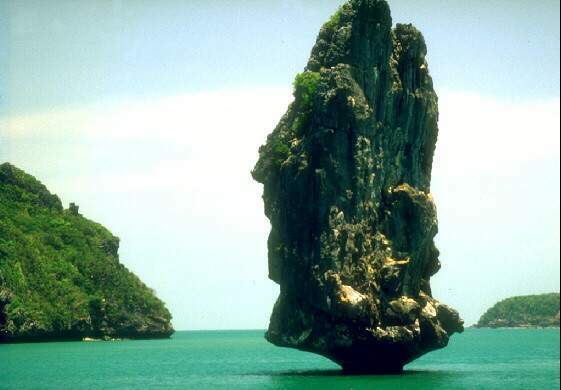

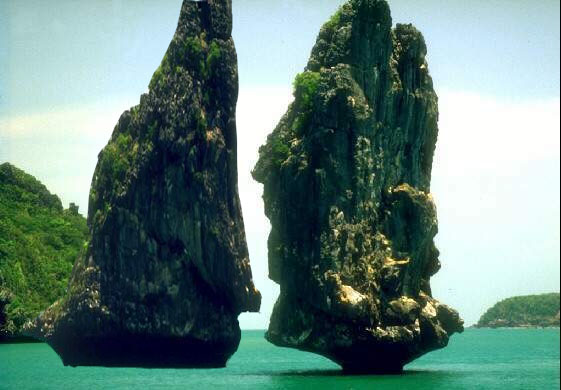

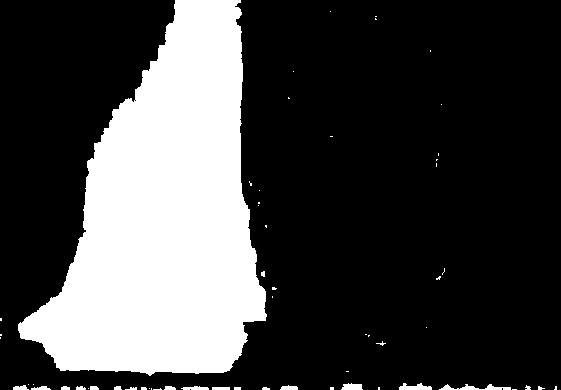

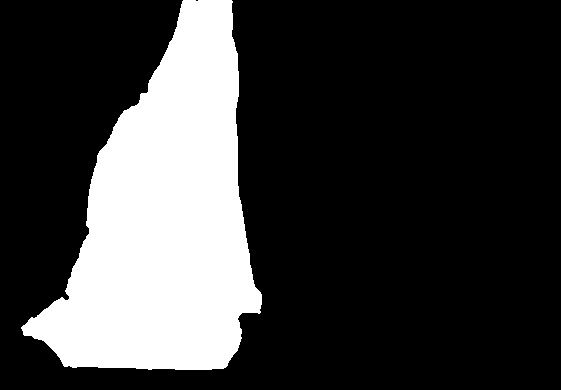

In [23]:
cv2_imshow(au)
cv2_imshow(tp)
cv2_imshow(mask)
cv2_imshow(gt)

In [9]:
train_tp.head(10)

0
0  CASIA2/Tp/Tp_D_NNN_S_N_sec00007_sec00025_10773...
1  CASIA2/Tp/Tp_D_CRN_M_N_ind00008_pla00050_10422...
2  CASIA2/Tp/Tp_D_NRN_S_N_ani10163_ani10196_12497...
3  CASIA2/Tp/Tp_S_CRN_M_N_art00024_art00024_10554...
4  CASIA2/Tp/Tp_S_CND_S_N_pla00004_pla00004_01126...
5  CASIA2/Tp/Tp_D_NRN_M_N_nat10148_nat10161_12121...
6  CASIA2/Tp/Tp_S_NND_S_N_art00038_art00038_01224...
7  CASIA2/Tp/Tp_D_NRN_M_N_cha00024_cha00085_10322...
8  CASIA2/Tp/Tp_D_NRN_S_N_sec00098_cha00042_11114...
9  CASIA2/Tp/Tp_S_NNN_S_N_arc20082_arc20082_01722...

In [0]:
len(train_tp)

3999

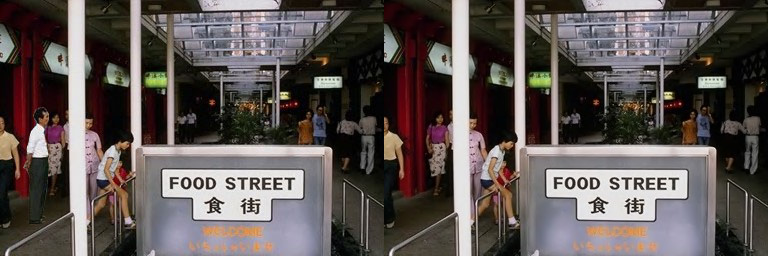

In [0]:
cv2_imshow(np.hstack([cv2.imread(train_tp['0'].iloc[0]), cv2.imread(train_au['0'].iloc[0])  ]))

# data_creation using ground truth

Authentic_patches

In [0]:
def authentic_patch(df):

  l1=[]
  stride =8
  window_shape = (128, 128, 3)
  for i in tqdm(range(len(df))):
    au=cv2.imread(df['0'].iloc[i])
    windows = view_as_windows(au, window_shape, step=stride)
    non_tampered_patches = []
    for m in range(windows.shape[0]):
        for n in range(windows.shape[1]):
            non_tampered_patches += [windows[m][n][0]]

    # for /l in tqdm(range(len(non_tampered_patches))):
    k=2
    j=False
    if len(non_tampered_patches)<4:
      j=True

    indexes = np.random.choice(len(non_tampered_patches), k, replace=j)
    print(len(indexes))
    for ind in enumerate(indexes):
      # print(len(indexes))
      # print(ind[0],ind,ind[1])
      img=non_tampered_patches[ind[1]]
      if ind[1]%2==0:
        img1=cv2.rotate(img, cv2.ROTATE_90_CLOCKWISE)
      else:
        img1=cv2.rotate(img, cv2.ROTATE_90_COUNTERCLOCKWISE)


      io.imsave('/content/drive/My Drive/SML _ PROJECT/authentic_patches/' + str(i) + '_' + str(ind[0]) + '_' + '1_.png', np.asarray(img) )
      io.imsave('/content/drive/My Drive/SML _ PROJECT/authentic_patches/' + str(i) + '_' + str(ind[0]) + '_'+'r'+'_'+'1_.png', np.asarray(img1) )



  

In [0]:
authentic_patch(train_au)


  0%|          | 1/5284 [00:01<1:54:15,  1.30s/it]

2
2



  0%|          | 3/5284 [00:02<1:16:10,  1.16it/s]

2



  0%|          | 4/5284 [00:02<1:05:09,  1.35it/s]

2



  0%|          | 5/5284 [00:03<54:21,  1.62it/s]  

2
2



  0%|          | 7/5284 [00:04<47:57,  1.83it/s]

2



  0%|          | 8/5284 [00:04<43:00,  2.04it/s]

2



  0%|          | 9/5284 [00:04<38:07,  2.31it/s]

2


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: UserWarning: /content/drive/My Drive/SML _ PROJECT/authentic_patches/9_0_1_.png is a low contrast image
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: UserWarning: /content/drive/My Drive/SML _ PROJECT/authentic_patches/9_0_r_1_.png is a low contrast image

  0%|          | 10/5284 [00:05<36:01,  2.44it/s]

2



  0%|          | 11/5284 [00:05<36:04,  2.44it/s]

2



  0%|          | 12/5284 [00:05<32:19,  2.72it/s]

2



  0%|          | 13/5284 [00:06<32:18,  2.72it/s]

2



  0%|          | 14/5284 [00:06<29:24,  2.99it/s]

2
2



  0%|          | 16/5284 [00:07<31:39,  2.77it/s]

2



  0%|          | 17/5284 [00:07<33:57,  2.59it/s]

2



  0%|          | 18/5284 [00:08<37:23,  2.35it/s]

2



  0%|          | 19/5284 [00:08<36:54,  2.38it/s]

2



  0%|          | 20/5284 [00:08<32:45,  2.68it/s]

2



  0%|          | 21/5284 [00:09<36:54,  2.38it/s]

2



  0%|          | 22/5284 [00:09<33:40,  2.60it/s]

2



  0%|          | 23/5284 [00:10<32:31,  2.70it/s]

2
2



  0%|          | 25/5284 [00:11<39:52,  2.20it/s]

2



  0%|          | 26/5284 [00:11<36:22,  2.41it/s]

2



  1%|          | 27/5284 [00:11<34:53,  2.51it/s]

2



  1%|          | 28/5284 [00:12<37:48,  2.32it/s]

2



  1%|          | 29/5284 [00:12<33:30,  2.61it/s]

2



  1%|          | 30/5284 [00:12<34:34,  2.53it/s]

2



  1%|          | 31/5284 [00:13<33:00,  2.65it/s]

2
2



  1%|          | 33/5284 [00:14<44:20,  1.97it/s]

2



  1%|          | 34/5284 [00:15<46:45,  1.87it/s]

2



  1%|          | 35/5284 [00:15<41:36,  2.10it/s]

2



  1%|          | 36/5284 [00:16<52:42,  1.66it/s]

2



  1%|          | 37/5284 [00:17<53:57,  1.62it/s]

2



  1%|          | 38/5284 [00:17<45:41,  1.91it/s]

2



  1%|          | 39/5284 [00:17<42:58,  2.03it/s]

2



  1%|          | 40/5284 [00:18<42:16,  2.07it/s]

2



  1%|          | 41/5284 [00:18<41:50,  2.09it/s]

2



  1%|          | 42/5284 [00:19<40:42,  2.15it/s]

2



  1%|          | 43/5284 [00:19<41:26,  2.11it/s]

2



  1%|          | 44/5284 [00:19<35:41,  2.45it/s]

2
2



  1%|          | 46/5284 [00:20<34:11,  2.55it/s]

2



  1%|          | 47/5284 [00:21<33:10,  2.63it/s]

2



  1%|          | 48/5284 [00:21<31:37,  2.76it/s]

2



  1%|          | 49/5284 [00:21<33:03,  2.64it/s]

2



  1%|          | 50/5284 [00:22<34:25,  2.53it/s]

2



  1%|          | 51/5284 [00:22<33:10,  2.63it/s]

2



  1%|          | 52/5284 [00:22<32:56,  2.65it/s]

2
2



  1%|          | 54/5284 [00:23<35:02,  2.49it/s]

2



  1%|          | 55/5284 [00:24<37:55,  2.30it/s]

2



  1%|          | 56/5284 [00:24<35:47,  2.43it/s]

2



  1%|          | 57/5284 [00:24<32:36,  2.67it/s]

2



  1%|          | 58/5284 [00:25<33:58,  2.56it/s]

2



  1%|          | 59/5284 [00:25<32:56,  2.64it/s]

2



  1%|          | 60/5284 [00:26<35:48,  2.43it/s]

2



  1%|          | 61/5284 [00:26<38:43,  2.25it/s]

2
2



  1%|          | 63/5284 [00:27<34:49,  2.50it/s]

2



  1%|          | 64/5284 [00:27<38:33,  2.26it/s]

2



  1%|          | 65/5284 [00:28<36:14,  2.40it/s]

2



  1%|          | 66/5284 [00:28<35:01,  2.48it/s]

2



  1%|▏         | 67/5284 [00:29<34:55,  2.49it/s]

2



  1%|▏         | 68/5284 [00:29<32:38,  2.66it/s]

2



  1%|▏         | 69/5284 [00:29<31:38,  2.75it/s]

2
2



  1%|▏         | 70/5284 [00:30<33:16,  2.61it/s]/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: UserWarning: /content/drive/My Drive/SML _ PROJECT/authentic_patches/70_1_1_.png is a low contrast image
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: UserWarning: /content/drive/My Drive/SML _ PROJECT/authentic_patches/70_1_r_1_.png is a low contrast image

  1%|▏         | 71/5284 [00:30<33:01,  2.63it/s]

2



  1%|▏         | 72/5284 [00:30<32:10,  2.70it/s]

2



  1%|▏         | 73/5284 [00:31<34:22,  2.53it/s]

2



  1%|▏         | 74/5284 [00:31<35:36,  2.44it/s]

2



  1%|▏         | 75/5284 [00:31<29:50,  2.91it/s]

2



  1%|▏         | 76/5284 [00:32<33:16,  2.61it/s]

2



  1%|▏         | 77/5284 [00:32<35:06,  2.47it/s]

2



  1%|▏         | 78/5284 [00:33<35:00,  2.48it/s]

2



  1%|▏         | 79/5284 [00:33<37:35,  2.31it/s]

2



  2%|▏         | 80/5284 [00:34<34:38,  2.50it/s]

2



  2%|▏         | 81/5284 [00:34<31:34,  2.75it/s]

2



  2%|▏         | 82/5284 [00:34<32:29,  2.67it/s]

2
2



  2%|▏         | 84/5284 [00:35<37:33,  2.31it/s]

2



  2%|▏         | 85/5284 [00:36<35:01,  2.47it/s]

2



  2%|▏         | 86/5284 [00:36<34:37,  2.50it/s]

2
2



  2%|▏         | 88/5284 [00:37<33:44,  2.57it/s]

2



  2%|▏         | 89/5284 [00:37<38:10,  2.27it/s]

2



  2%|▏         | 90/5284 [00:38<34:28,  2.51it/s]

2
2



  2%|▏         | 92/5284 [00:39<36:55,  2.34it/s]

2



  2%|▏         | 93/5284 [00:39<38:05,  2.27it/s]

2



  2%|▏         | 94/5284 [00:40<40:06,  2.16it/s]

2



  2%|▏         | 95/5284 [00:40<41:04,  2.11it/s]

2
2



  2%|▏         | 97/5284 [00:41<41:26,  2.09it/s]

2



  2%|▏         | 98/5284 [00:42<43:02,  2.01it/s]

2



  2%|▏         | 99/5284 [00:42<36:47,  2.35it/s]

2
2



  2%|▏         | 101/5284 [00:43<38:33,  2.24it/s]

2



  2%|▏         | 102/5284 [00:43<34:57,  2.47it/s]

2



  2%|▏         | 103/5284 [00:44<35:05,  2.46it/s]

2
2



  2%|▏         | 105/5284 [00:45<35:40,  2.42it/s]

2



  2%|▏         | 106/5284 [00:45<36:12,  2.38it/s]

2



  2%|▏         | 107/5284 [00:45<31:28,  2.74it/s]

2
2



  2%|▏         | 109/5284 [00:46<33:13,  2.60it/s]

2



  2%|▏         | 110/5284 [00:46<31:54,  2.70it/s]

2



  2%|▏         | 111/5284 [00:47<31:30,  2.74it/s]

2



  2%|▏         | 112/5284 [00:47<31:03,  2.78it/s]

2



  2%|▏         | 113/5284 [00:48<37:11,  2.32it/s]

2



  2%|▏         | 114/5284 [00:48<37:39,  2.29it/s]

2



  2%|▏         | 115/5284 [00:49<36:47,  2.34it/s]

2



  2%|▏         | 116/5284 [00:49<33:33,  2.57it/s]

2



  2%|▏         | 117/5284 [00:49<35:41,  2.41it/s]

2



  2%|▏         | 118/5284 [00:50<32:34,  2.64it/s]

2



  2%|▏         | 119/5284 [00:50<30:40,  2.81it/s]

2



  2%|▏         | 120/5284 [00:50<32:50,  2.62it/s]

2



  2%|▏         | 121/5284 [00:51<32:55,  2.61it/s]

2



  2%|▏         | 122/5284 [00:51<33:11,  2.59it/s]

2



  2%|▏         | 123/5284 [00:52<31:09,  2.76it/s]

2



  2%|▏         | 124/5284 [00:52<29:04,  2.96it/s]

2



  2%|▏         | 125/5284 [00:52<35:13,  2.44it/s]

2



  2%|▏         | 126/5284 [00:53<35:45,  2.40it/s]

2



  2%|▏         | 127/5284 [00:53<33:21,  2.58it/s]

2



  2%|▏         | 128/5284 [00:54<34:08,  2.52it/s]

2



  2%|▏         | 129/5284 [00:54<31:02,  2.77it/s]

2



  2%|▏         | 130/5284 [00:54<34:03,  2.52it/s]

2



  2%|▏         | 131/5284 [00:55<32:30,  2.64it/s]

2



  2%|▏         | 132/5284 [00:55<30:20,  2.83it/s]

2



  3%|▎         | 133/5284 [00:55<30:49,  2.78it/s]

2



  3%|▎         | 134/5284 [00:56<35:12,  2.44it/s]

2



  3%|▎         | 135/5284 [00:56<34:39,  2.48it/s]

2



  3%|▎         | 136/5284 [00:57<32:57,  2.60it/s]

2



  3%|▎         | 137/5284 [00:57<29:13,  2.94it/s]

2


2


  3%|▎         | 139/5284 [00:58<35:30,  2.41it/s]

2



  3%|▎         | 140/5284 [00:58<37:58,  2.26it/s]

2



  3%|▎         | 141/5284 [00:59<41:07,  2.08it/s]

2



  3%|▎         | 142/5284 [00:59<41:39,  2.06it/s]

2



  3%|▎         | 143/5284 [01:00<37:06,  2.31it/s]

2



  3%|▎         | 144/5284 [01:00<39:16,  2.18it/s]

2



  3%|▎         | 145/5284 [01:00<33:34,  2.55it/s]

2



  3%|▎         | 146/5284 [01:01<35:42,  2.40it/s]

2
2



  3%|▎         | 148/5284 [01:02<36:40,  2.33it/s]

2



  3%|▎         | 149/5284 [01:02<37:38,  2.27it/s]

2



  3%|▎         | 150/5284 [01:03<38:44,  2.21it/s]

2
2



  3%|▎         | 152/5284 [01:04<38:46,  2.21it/s]

2



  3%|▎         | 153/5284 [01:04<39:12,  2.18it/s]

2



  3%|▎         | 154/5284 [01:05<38:10,  2.24it/s]

2



  3%|▎         | 155/5284 [01:05<33:47,  2.53it/s]

2
2



  3%|▎         | 157/5284 [01:06<35:48,  2.39it/s]

2


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: UserWarning: /content/drive/My Drive/SML _ PROJECT/authentic_patches/157_0_1_.png is a low contrast image
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: UserWarning: /content/drive/My Drive/SML _ PROJECT/authentic_patches/157_0_r_1_.png is a low contrast image

  3%|▎         | 158/5284 [01:06<33:49,  2.53it/s]

2



  3%|▎         | 159/5284 [01:06<30:26,  2.81it/s]

2
2



  3%|▎         | 161/5284 [01:07<32:53,  2.60it/s]

2



  3%|▎         | 162/5284 [01:08<31:20,  2.72it/s]

2



  3%|▎         | 163/5284 [01:08<39:25,  2.16it/s]

2



  3%|▎         | 164/5284 [01:09<42:18,  2.02it/s]

2



  3%|▎         | 165/5284 [01:09<38:13,  2.23it/s]

2



  3%|▎         | 166/5284 [01:09<33:49,  2.52it/s]

2



  3%|▎         | 167/5284 [01:10<34:26,  2.48it/s]

2
2



  3%|▎         | 169/5284 [01:11<37:43,  2.26it/s]

2



  3%|▎         | 170/5284 [01:11<36:51,  2.31it/s]

2



  3%|▎         | 171/5284 [01:12<34:08,  2.50it/s]

2



  3%|▎         | 172/5284 [01:12<32:56,  2.59it/s]

2



  3%|▎         | 173/5284 [01:12<33:38,  2.53it/s]

2



  3%|▎         | 174/5284 [01:13<36:09,  2.36it/s]

2



  3%|▎         | 175/5284 [01:13<33:50,  2.52it/s]

2



  3%|▎         | 176/5284 [01:14<31:37,  2.69it/s]

2
2



  3%|▎         | 178/5284 [01:15<38:59,  2.18it/s]

2



  3%|▎         | 179/5284 [01:15<40:29,  2.10it/s]

2



  3%|▎         | 180/5284 [01:16<37:16,  2.28it/s]

2



  3%|▎         | 181/5284 [01:16<36:53,  2.31it/s]

2



  3%|▎         | 182/5284 [01:16<33:19,  2.55it/s]

2



  3%|▎         | 183/5284 [01:17<33:18,  2.55it/s]

2


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: UserWarning: /content/drive/My Drive/SML _ PROJECT/authentic_patches/183_0_1_.png is a low contrast image
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: UserWarning: /content/drive/My Drive/SML _ PROJECT/authentic_patches/183_0_r_1_.png is a low contrast image

  3%|▎         | 184/5284 [01:17<33:08,  2.57it/s]

2



  4%|▎         | 185/5284 [01:17<33:28,  2.54it/s]

2



  4%|▎         | 186/5284 [01:18<31:50,  2.67it/s]

2



  4%|▎         | 187/5284 [01:18<30:21,  2.80it/s]

2



  4%|▎         | 188/5284 [01:18<31:15,  2.72it/s]

2



  4%|▎         | 189/5284 [01:19<30:33,  2.78it/s]

2
2



  4%|▎         | 191/5284 [01:20<32:21,  2.62it/s]

2



  4%|▎         | 192/5284 [01:20<33:03,  2.57it/s]

2



  4%|▎         | 193/5284 [01:20<32:32,  2.61it/s]

2
2



  4%|▎         | 195/5284 [01:21<32:20,  2.62it/s]

2



  4%|▎         | 196/5284 [01:22<30:10,  2.81it/s]

2



  4%|▎         | 197/5284 [01:22<26:00,  3.26it/s]

2



  4%|▎         | 198/5284 [01:22<32:07,  2.64it/s]

2



  4%|▍         | 199/5284 [01:23<30:51,  2.75it/s]

2



  4%|▍         | 200/5284 [01:23<28:31,  2.97it/s]

2



  4%|▍         | 201/5284 [01:23<29:14,  2.90it/s]

2



  4%|▍         | 202/5284 [01:24<29:35,  2.86it/s]

2



  4%|▍         | 203/5284 [01:24<32:20,  2.62it/s]

2



  4%|▍         | 204/5284 [01:24<28:29,  2.97it/s]

2



  4%|▍         | 205/5284 [01:25<27:39,  3.06it/s]

2



  4%|▍         | 206/5284 [01:25<25:07,  3.37it/s]

2



  4%|▍         | 207/5284 [01:25<28:56,  2.92it/s]

2



  4%|▍         | 208/5284 [01:26<31:51,  2.66it/s]

2



  4%|▍         | 209/5284 [01:26<29:56,  2.83it/s]

2



  4%|▍         | 210/5284 [01:26<31:52,  2.65it/s]

2



  4%|▍         | 211/5284 [01:27<37:18,  2.27it/s]

2



  4%|▍         | 212/5284 [01:28<41:49,  2.02it/s]

2



  4%|▍         | 213/5284 [01:28<36:50,  2.29it/s]

2



  4%|▍         | 214/5284 [01:28<32:10,  2.63it/s]

2



  4%|▍         | 215/5284 [01:29<30:55,  2.73it/s]

2



  4%|▍         | 216/5284 [01:30<56:32,  1.49it/s]

2



  4%|▍         | 217/5284 [01:30<47:52,  1.76it/s]

2



  4%|▍         | 218/5284 [01:31<45:17,  1.86it/s]

2



  4%|▍         | 219/5284 [01:31<40:12,  2.10it/s]

2



  4%|▍         | 220/5284 [01:32<41:43,  2.02it/s]

2



  4%|▍         | 221/5284 [01:32<40:11,  2.10it/s]

2



  4%|▍         | 222/5284 [01:32<39:28,  2.14it/s]

2



  4%|▍         | 223/5284 [01:33<36:13,  2.33it/s]

2
2



  4%|▍         | 225/5284 [01:33<30:44,  2.74it/s]

2



  4%|▍         | 226/5284 [01:34<31:46,  2.65it/s]

2



  4%|▍         | 227/5284 [01:34<30:11,  2.79it/s]

2
2



  4%|▍         | 229/5284 [01:35<32:42,  2.58it/s]

2



  4%|▍         | 230/5284 [01:35<29:36,  2.85it/s]

2



  4%|▍         | 231/5284 [01:36<27:01,  3.12it/s]

2



  4%|▍         | 232/5284 [01:36<26:26,  3.18it/s]

2
2



  4%|▍         | 234/5284 [01:37<30:01,  2.80it/s]

2



  4%|▍         | 235/5284 [01:37<30:52,  2.73it/s]

2



  4%|▍         | 236/5284 [01:37<31:54,  2.64it/s]

2



  4%|▍         | 237/5284 [01:38<37:17,  2.26it/s]

2



  5%|▍         | 238/5284 [01:38<32:52,  2.56it/s]

2



  5%|▍         | 239/5284 [01:39<30:03,  2.80it/s]

2



  5%|▍         | 240/5284 [01:39<33:09,  2.54it/s]

2
2



  5%|▍         | 242/5284 [01:40<35:43,  2.35it/s]

2



  5%|▍         | 243/5284 [01:40<31:14,  2.69it/s]

2



  5%|▍         | 244/5284 [01:41<30:40,  2.74it/s]

2



  5%|▍         | 245/5284 [01:41<32:17,  2.60it/s]

2



  5%|▍         | 246/5284 [01:41<29:57,  2.80it/s]

2



  5%|▍         | 247/5284 [01:42<28:16,  2.97it/s]

2



  5%|▍         | 248/5284 [01:42<26:01,  3.22it/s]

2



  5%|▍         | 249/5284 [01:42<25:16,  3.32it/s]

2



  5%|▍         | 250/5284 [01:43<27:28,  3.05it/s]

2



  5%|▍         | 251/5284 [01:43<25:36,  3.28it/s]

2



  5%|▍         | 252/5284 [01:43<25:31,  3.28it/s]

2



  5%|▍         | 253/5284 [01:43<26:31,  3.16it/s]

2



  5%|▍         | 254/5284 [01:44<28:44,  2.92it/s]

2



  5%|▍         | 255/5284 [01:44<27:23,  3.06it/s]

2



  5%|▍         | 256/5284 [01:44<27:02,  3.10it/s]

2



  5%|▍         | 257/5284 [01:45<27:11,  3.08it/s]

2
2



  5%|▍         | 259/5284 [01:46<40:48,  2.05it/s]

2



  5%|▍         | 260/5284 [01:46<34:24,  2.43it/s]

2



  5%|▍         | 261/5284 [01:47<35:13,  2.38it/s]

2



  5%|▍         | 262/5284 [01:47<32:45,  2.56it/s]

2



  5%|▍         | 263/5284 [01:48<37:53,  2.21it/s]

2



  5%|▍         | 264/5284 [01:48<38:43,  2.16it/s]

2



  5%|▌         | 265/5284 [01:49<37:01,  2.26it/s]

2


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: UserWarning: /content/drive/My Drive/SML _ PROJECT/authentic_patches/265_1_1_.png is a low contrast image
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: UserWarning: /content/drive/My Drive/SML _ PROJECT/authentic_patches/265_1_r_1_.png is a low contrast image

  5%|▌         | 266/5284 [01:49<38:46,  2.16it/s]

2
2



  5%|▌         | 268/5284 [01:50<36:46,  2.27it/s]

2



  5%|▌         | 269/5284 [01:51<45:14,  1.85it/s]

2



  5%|▌         | 270/5284 [01:51<50:16,  1.66it/s]

2



  5%|▌         | 271/5284 [01:52<48:27,  1.72it/s]

2



  5%|▌         | 272/5284 [01:52<42:07,  1.98it/s]

2



  5%|▌         | 273/5284 [01:53<39:22,  2.12it/s]

2



  5%|▌         | 274/5284 [01:53<33:38,  2.48it/s]

2



  5%|▌         | 275/5284 [01:53<34:52,  2.39it/s]

2
2



  5%|▌         | 277/5284 [01:54<32:52,  2.54it/s]

2



  5%|▌         | 278/5284 [01:55<31:20,  2.66it/s]

2



  5%|▌         | 279/5284 [01:55<29:40,  2.81it/s]

2



  5%|▌         | 280/5284 [01:55<30:03,  2.77it/s]

2



  5%|▌         | 281/5284 [01:56<29:08,  2.86it/s]

2



  5%|▌         | 282/5284 [01:56<30:26,  2.74it/s]

2



  5%|▌         | 283/5284 [01:57<34:33,  2.41it/s]

2



  5%|▌         | 284/5284 [01:57<34:14,  2.43it/s]

2



  5%|▌         | 285/5284 [01:57<30:37,  2.72it/s]

2



  5%|▌         | 286/5284 [01:58<31:20,  2.66it/s]

2



  5%|▌         | 287/5284 [01:58<29:38,  2.81it/s]

2



  5%|▌         | 288/5284 [01:58<34:47,  2.39it/s]

2



  5%|▌         | 289/5284 [01:59<30:12,  2.76it/s]

2



  5%|▌         | 290/5284 [01:59<30:08,  2.76it/s]

2



  6%|▌         | 291/5284 [01:59<30:57,  2.69it/s]

2



  6%|▌         | 292/5284 [02:00<35:04,  2.37it/s]

2



  6%|▌         | 293/5284 [02:00<33:00,  2.52it/s]

2



  6%|▌         | 294/5284 [02:04<1:59:39,  1.44s/it]

2



  6%|▌         | 295/5284 [02:04<1:30:09,  1.08s/it]

2
2



  6%|▌         | 297/5284 [02:06<1:09:10,  1.20it/s]

2



  6%|▌         | 298/5284 [02:06<57:37,  1.44it/s]  

2



  6%|▌         | 299/5284 [02:06<48:00,  1.73it/s]

2



  6%|▌         | 300/5284 [02:07<43:57,  1.89it/s]

2



  6%|▌         | 301/5284 [02:07<40:35,  2.05it/s]

2



  6%|▌         | 302/5284 [02:07<37:21,  2.22it/s]

2



  6%|▌         | 303/5284 [02:09<1:03:16,  1.31it/s]

2



  6%|▌         | 304/5284 [02:09<56:11,  1.48it/s]  

2



  6%|▌         | 305/5284 [02:10<55:21,  1.50it/s]

2



  6%|▌         | 306/5284 [02:11<49:26,  1.68it/s]

2



  6%|▌         | 307/5284 [02:11<47:00,  1.76it/s]

2



  6%|▌         | 308/5284 [02:11<43:11,  1.92it/s]

2



  6%|▌         | 309/5284 [02:12<45:05,  1.84it/s]

2



  6%|▌         | 310/5284 [02:12<39:34,  2.09it/s]

2



  6%|▌         | 311/5284 [02:13<35:32,  2.33it/s]

2



  6%|▌         | 312/5284 [02:13<37:51,  2.19it/s]

2



  6%|▌         | 313/5284 [02:14<38:16,  2.16it/s]

2



  6%|▌         | 314/5284 [02:14<44:38,  1.86it/s]

2



  6%|▌         | 315/5284 [02:16<1:03:41,  1.30it/s]

2



  6%|▌         | 316/5284 [02:16<57:17,  1.45it/s]  

2
2



  6%|▌         | 318/5284 [02:17<44:44,  1.85it/s]

2



  6%|▌         | 319/5284 [02:18<43:28,  1.90it/s]

2



  6%|▌         | 320/5284 [02:18<38:47,  2.13it/s]

2



  6%|▌         | 321/5284 [02:18<37:01,  2.23it/s]

2



  6%|▌         | 322/5284 [02:19<38:37,  2.14it/s]

2



  6%|▌         | 323/5284 [02:19<34:55,  2.37it/s]

2



  6%|▌         | 324/5284 [02:19<31:53,  2.59it/s]

2



  6%|▌         | 325/5284 [02:20<28:30,  2.90it/s]

2
2



  6%|▌         | 327/5284 [02:20<28:37,  2.89it/s]

2



  6%|▌         | 328/5284 [02:21<31:27,  2.63it/s]

2



  6%|▌         | 329/5284 [02:21<32:38,  2.53it/s]

2



  6%|▌         | 330/5284 [02:22<34:13,  2.41it/s]

2



  6%|▋         | 331/5284 [02:22<31:58,  2.58it/s]

2



  6%|▋         | 332/5284 [02:22<27:59,  2.95it/s]

2



  6%|▋         | 333/5284 [02:23<27:17,  3.02it/s]

2



  6%|▋         | 334/5284 [02:23<34:27,  2.39it/s]

2



  6%|▋         | 335/5284 [02:24<37:12,  2.22it/s]

2



  6%|▋         | 336/5284 [02:24<33:03,  2.49it/s]

2



  6%|▋         | 337/5284 [02:25<35:45,  2.31it/s]

2
2



  6%|▋         | 339/5284 [02:25<32:36,  2.53it/s]

2



  6%|▋         | 340/5284 [02:26<33:36,  2.45it/s]

2



  6%|▋         | 341/5284 [02:26<33:28,  2.46it/s]

2



  6%|▋         | 342/5284 [02:27<33:07,  2.49it/s]

2



  6%|▋         | 343/5284 [02:27<34:35,  2.38it/s]

2



  7%|▋         | 344/5284 [02:27<32:51,  2.51it/s]

2



  7%|▋         | 345/5284 [02:28<33:58,  2.42it/s]

2



  7%|▋         | 346/5284 [02:28<35:54,  2.29it/s]

2



  7%|▋         | 347/5284 [02:29<37:47,  2.18it/s]

2



  7%|▋         | 348/5284 [02:29<35:39,  2.31it/s]

2



  7%|▋         | 349/5284 [02:29<32:03,  2.57it/s]

2
2



  7%|▋         | 351/5284 [02:30<35:39,  2.31it/s]

2



  7%|▋         | 352/5284 [02:31<40:08,  2.05it/s]

2



  7%|▋         | 353/5284 [02:32<41:13,  1.99it/s]

2



  7%|▋         | 354/5284 [02:32<38:40,  2.12it/s]

2



  7%|▋         | 355/5284 [02:32<35:23,  2.32it/s]

2



  7%|▋         | 356/5284 [02:33<34:04,  2.41it/s]

2



  7%|▋         | 357/5284 [02:33<36:14,  2.27it/s]

2
2



  7%|▋         | 359/5284 [02:34<37:24,  2.19it/s]

2



  7%|▋         | 360/5284 [02:34<31:54,  2.57it/s]

2



  7%|▋         | 361/5284 [02:35<29:26,  2.79it/s]

2



  7%|▋         | 362/5284 [02:35<32:41,  2.51it/s]

2



  7%|▋         | 363/5284 [02:36<31:43,  2.59it/s]

2



  7%|▋         | 364/5284 [02:36<29:53,  2.74it/s]

2



  7%|▋         | 365/5284 [02:36<29:14,  2.80it/s]

2



  7%|▋         | 366/5284 [02:37<33:34,  2.44it/s]

2



  7%|▋         | 367/5284 [02:37<31:40,  2.59it/s]

2



  7%|▋         | 368/5284 [02:37<30:15,  2.71it/s]

2



  7%|▋         | 369/5284 [02:38<28:39,  2.86it/s]

2
2



  7%|▋         | 371/5284 [02:39<33:22,  2.45it/s]

2



  7%|▋         | 372/5284 [02:39<33:43,  2.43it/s]

2



  7%|▋         | 373/5284 [02:39<30:16,  2.70it/s]

2



  7%|▋         | 374/5284 [02:40<29:01,  2.82it/s]

2



  7%|▋         | 375/5284 [02:40<32:44,  2.50it/s]

2


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: UserWarning: /content/drive/My Drive/SML _ PROJECT/authentic_patches/375_0_1_.png is a low contrast image
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: UserWarning: /content/drive/My Drive/SML _ PROJECT/authentic_patches/375_0_r_1_.png is a low contrast image
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: UserWarning: /content/drive/My Drive/SML _ PROJECT/authentic_patches/375_1_1_.png is a low contrast image
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: UserWarning: /content/drive/My Drive/SML _ PROJECT/authentic_patches/375_1_r_1_.png is a low contrast image

  7%|▋         | 376/5284 [02:41<32:19,  2.53it/s]

2



  7%|▋         | 377/5284 [02:41<29:47,  2.75it/s]

2



  7%|▋         | 378/5284 [02:41<27:43,  2.95it/s]

2



  7%|▋         | 379/5284 [02:41<29:01,  2.82it/s]

2



  7%|▋         | 380/5284 [02:42<32:40,  2.50it/s]

2



  7%|▋         | 381/5284 [02:43<37:26,  2.18it/s]

2


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: UserWarning: /content/drive/My Drive/SML _ PROJECT/authentic_patches/381_1_1_.png is a low contrast image
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: UserWarning: /content/drive/My Drive/SML _ PROJECT/authentic_patches/381_1_r_1_.png is a low contrast image

  7%|▋         | 382/5284 [02:43<33:23,  2.45it/s]

2
2


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: UserWarning: /content/drive/My Drive/SML _ PROJECT/authentic_patches/382_1_1_.png is a low contrast image
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: UserWarning: /content/drive/My Drive/SML _ PROJECT/authentic_patches/382_1_r_1_.png is a low contrast image

  7%|▋         | 384/5284 [02:44<35:44,  2.29it/s]

2



  7%|▋         | 385/5284 [02:44<33:45,  2.42it/s]

2



  7%|▋         | 386/5284 [02:45<31:48,  2.57it/s]

2



  7%|▋         | 387/5284 [02:45<32:28,  2.51it/s]

2



  7%|▋         | 388/5284 [02:45<29:47,  2.74it/s]

2



  7%|▋         | 389/5284 [02:46<29:39,  2.75it/s]

2



  7%|▋         | 390/5284 [02:46<28:47,  2.83it/s]

2
2



  7%|▋         | 392/5284 [02:47<29:47,  2.74it/s]

2



  7%|▋         | 393/5284 [02:47<29:31,  2.76it/s]

2


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: UserWarning: /content/drive/My Drive/SML _ PROJECT/authentic_patches/393_1_1_.png is a low contrast image
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: UserWarning: /content/drive/My Drive/SML _ PROJECT/authentic_patches/393_1_r_1_.png is a low contrast image

  7%|▋         | 394/5284 [02:51<1:54:52,  1.41s/it]

2
2



  7%|▋         | 396/5284 [02:52<1:15:41,  1.08it/s]

2



  8%|▊         | 397/5284 [02:52<1:01:41,  1.32it/s]

2



  8%|▊         | 398/5284 [02:53<55:43,  1.46it/s]  

2



  8%|▊         | 399/5284 [02:53<51:51,  1.57it/s]

2
2



  8%|▊         | 401/5284 [02:54<40:22,  2.02it/s]

2



  8%|▊         | 402/5284 [02:54<37:21,  2.18it/s]

2



  8%|▊         | 403/5284 [02:55<33:46,  2.41it/s]

2


2


  8%|▊         | 404/5284 [02:55<40:09,  2.03it/s]/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: UserWarning: /content/drive/My Drive/SML _ PROJECT/authentic_patches/404_0_1_.png is a low contrast image
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: UserWarning: /content/drive/My Drive/SML _ PROJECT/authentic_patches/404_0_r_1_.png is a low contrast image

  8%|▊         | 405/5284 [02:56<38:19,  2.12it/s]

2



  8%|▊         | 406/5284 [02:56<38:56,  2.09it/s]

2



  8%|▊         | 407/5284 [02:57<36:07,  2.25it/s]

2



  8%|▊         | 408/5284 [02:57<36:39,  2.22it/s]

2



  8%|▊         | 409/5284 [02:57<32:48,  2.48it/s]

2



  8%|▊         | 410/5284 [02:58<30:47,  2.64it/s]

2



  8%|▊         | 411/5284 [02:58<32:00,  2.54it/s]

2



  8%|▊         | 412/5284 [02:59<33:29,  2.42it/s]

2



  8%|▊         | 413/5284 [02:59<34:00,  2.39it/s]

2



  8%|▊         | 414/5284 [02:59<30:23,  2.67it/s]

2



  8%|▊         | 415/5284 [03:00<30:37,  2.65it/s]

2



  8%|▊         | 416/5284 [03:00<30:18,  2.68it/s]

2
2



  8%|▊         | 418/5284 [03:01<31:24,  2.58it/s]

2



  8%|▊         | 419/5284 [03:01<35:17,  2.30it/s]

2



  8%|▊         | 420/5284 [03:02<31:32,  2.57it/s]

2



  8%|▊         | 421/5284 [03:02<33:18,  2.43it/s]

2



  8%|▊         | 422/5284 [03:03<33:12,  2.44it/s]

2



  8%|▊         | 423/5284 [03:03<31:19,  2.59it/s]

2



  8%|▊         | 424/5284 [03:03<30:57,  2.62it/s]

2
2


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: UserWarning: /content/drive/My Drive/SML _ PROJECT/authentic_patches/424_0_1_.png is a low contrast image
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: UserWarning: /content/drive/My Drive/SML _ PROJECT/authentic_patches/424_0_r_1_.png is a low contrast image

  8%|▊         | 426/5284 [03:04<36:13,  2.24it/s]

2



  8%|▊         | 427/5284 [03:05<32:33,  2.49it/s]

2



  8%|▊         | 428/5284 [03:05<34:46,  2.33it/s]

2



  8%|▊         | 429/5284 [03:06<34:19,  2.36it/s]

2



  8%|▊         | 430/5284 [03:06<32:02,  2.53it/s]

2



  8%|▊         | 431/5284 [03:06<29:30,  2.74it/s]

2



  8%|▊         | 432/5284 [03:06<27:47,  2.91it/s]

2



  8%|▊         | 433/5284 [03:07<34:56,  2.31it/s]

2



  8%|▊         | 434/5284 [03:07<29:53,  2.70it/s]

2



  8%|▊         | 435/5284 [03:08<31:25,  2.57it/s]

2



  8%|▊         | 436/5284 [03:08<30:12,  2.67it/s]

2
2



  8%|▊         | 438/5284 [03:09<35:45,  2.26it/s]

2



  8%|▊         | 439/5284 [03:10<39:52,  2.02it/s]

2



  8%|▊         | 440/5284 [03:11<48:06,  1.68it/s]

2



  8%|▊         | 441/5284 [03:11<44:12,  1.83it/s]

2



  8%|▊         | 442/5284 [03:12<43:54,  1.84it/s]

2



  8%|▊         | 443/5284 [03:12<40:21,  2.00it/s]

2



  8%|▊         | 444/5284 [03:12<36:59,  2.18it/s]

2



  8%|▊         | 445/5284 [03:13<32:19,  2.49it/s]

2
2



  8%|▊         | 447/5284 [03:14<32:07,  2.51it/s]

2



  8%|▊         | 448/5284 [03:14<29:39,  2.72it/s]

2



  8%|▊         | 449/5284 [03:14<31:17,  2.58it/s]

2



  9%|▊         | 450/5284 [03:15<32:17,  2.50it/s]

2



  9%|▊         | 451/5284 [03:15<32:57,  2.44it/s]

2



  9%|▊         | 452/5284 [03:15<29:04,  2.77it/s]

2



  9%|▊         | 453/5284 [03:16<38:17,  2.10it/s]

2



  9%|▊         | 454/5284 [03:16<34:04,  2.36it/s]

2



  9%|▊         | 455/5284 [03:17<32:52,  2.45it/s]

2



  9%|▊         | 456/5284 [03:18<42:22,  1.90it/s]

2



  9%|▊         | 457/5284 [03:18<40:38,  1.98it/s]

2



  9%|▊         | 458/5284 [03:19<40:12,  2.00it/s]

2



  9%|▊         | 459/5284 [03:19<38:38,  2.08it/s]

2



  9%|▊         | 460/5284 [03:19<33:38,  2.39it/s]

2



  9%|▊         | 461/5284 [03:20<35:16,  2.28it/s]

2



  9%|▊         | 462/5284 [03:20<34:52,  2.30it/s]

2



  9%|▉         | 463/5284 [03:20<32:54,  2.44it/s]

2



  9%|▉         | 464/5284 [03:21<36:45,  2.19it/s]

2



  9%|▉         | 465/5284 [03:22<38:18,  2.10it/s]

2



  9%|▉         | 466/5284 [03:22<33:42,  2.38it/s]

2



  9%|▉         | 467/5284 [03:22<34:15,  2.34it/s]

2



  9%|▉         | 468/5284 [03:23<34:15,  2.34it/s]

2



  9%|▉         | 469/5284 [03:23<41:15,  1.94it/s]

2



  9%|▉         | 470/5284 [03:24<37:43,  2.13it/s]

2
2



  9%|▉         | 472/5284 [03:25<32:51,  2.44it/s]

2



  9%|▉         | 473/5284 [03:25<30:48,  2.60it/s]

2



  9%|▉         | 474/5284 [03:25<27:34,  2.91it/s]

2



  9%|▉         | 475/5284 [03:26<28:58,  2.77it/s]

2



  9%|▉         | 476/5284 [03:26<28:11,  2.84it/s]

2


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: UserWarning: /content/drive/My Drive/SML _ PROJECT/authentic_patches/476_0_1_.png is a low contrast image
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: UserWarning: /content/drive/My Drive/SML _ PROJECT/authentic_patches/476_0_r_1_.png is a low contrast image

  9%|▉         | 477/5284 [03:26<30:46,  2.60it/s]

2



  9%|▉         | 478/5284 [03:27<31:02,  2.58it/s]

2



  9%|▉         | 479/5284 [03:27<32:32,  2.46it/s]

2



  9%|▉         | 480/5284 [03:28<30:25,  2.63it/s]

2



  9%|▉         | 481/5284 [03:28<33:30,  2.39it/s]

2



  9%|▉         | 482/5284 [03:28<32:25,  2.47it/s]

2



  9%|▉         | 483/5284 [03:29<30:03,  2.66it/s]

2



  9%|▉         | 484/5284 [03:29<30:07,  2.66it/s]

2



  9%|▉         | 485/5284 [03:29<29:01,  2.75it/s]

2



  9%|▉         | 486/5284 [03:30<31:02,  2.58it/s]

2



  9%|▉         | 487/5284 [03:30<29:09,  2.74it/s]

2



  9%|▉         | 488/5284 [03:31<31:50,  2.51it/s]

2



  9%|▉         | 489/5284 [03:38<3:25:22,  2.57s/it]

2



  9%|▉         | 490/5284 [03:39<2:31:04,  1.89s/it]

2



  9%|▉         | 491/5284 [03:39<1:54:19,  1.43s/it]

2



  9%|▉         | 492/5284 [03:39<1:26:01,  1.08s/it]

2



  9%|▉         | 493/5284 [03:40<1:14:32,  1.07it/s]

2



  9%|▉         | 494/5284 [03:40<1:00:22,  1.32it/s]

2



  9%|▉         | 495/5284 [03:41<50:59,  1.57it/s]  

2



  9%|▉         | 496/5284 [03:41<40:09,  1.99it/s]

2



  9%|▉         | 497/5284 [03:41<36:27,  2.19it/s]

2



  9%|▉         | 498/5284 [03:41<35:57,  2.22it/s]

2



  9%|▉         | 499/5284 [03:42<33:36,  2.37it/s]

2



  9%|▉         | 500/5284 [03:42<34:24,  2.32it/s]

2



  9%|▉         | 501/5284 [03:43<31:57,  2.49it/s]

2



 10%|▉         | 502/5284 [03:43<30:47,  2.59it/s]

2



 10%|▉         | 503/5284 [03:43<29:08,  2.73it/s]

2
2



 10%|▉         | 505/5284 [03:44<36:58,  2.15it/s]

2



 10%|▉         | 506/5284 [03:45<33:46,  2.36it/s]

2



 10%|▉         | 507/5284 [03:45<31:28,  2.53it/s]

2
2



 10%|▉         | 509/5284 [03:46<28:21,  2.81it/s]

2



 10%|▉         | 510/5284 [03:46<26:25,  3.01it/s]

2



 10%|▉         | 511/5284 [03:46<24:32,  3.24it/s]

2



 10%|▉         | 512/5284 [03:46<23:44,  3.35it/s]

2


2


 10%|▉         | 513/5284 [03:47<26:00,  3.06it/s]/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: UserWarning: /content/drive/My Drive/SML _ PROJECT/authentic_patches/513_1_1_.png is a low contrast image
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: UserWarning: /content/drive/My Drive/SML _ PROJECT/authentic_patches/513_1_r_1_.png is a low contrast image

 10%|▉         | 514/5284 [03:47<24:53,  3.19it/s]

2



 10%|▉         | 515/5284 [03:48<26:12,  3.03it/s]

2



 10%|▉         | 516/5284 [03:48<25:11,  3.16it/s]

2


2


 10%|▉         | 518/5284 [03:49<32:17,  2.46it/s]

2



 10%|▉         | 519/5284 [03:49<32:20,  2.46it/s]

2



 10%|▉         | 520/5284 [03:50<32:37,  2.43it/s]

2
2



 10%|▉         | 522/5284 [03:51<33:12,  2.39it/s]

2



 10%|▉         | 523/5284 [03:51<31:24,  2.53it/s]

2



 10%|▉         | 524/5284 [03:51<29:40,  2.67it/s]

2



 10%|▉         | 525/5284 [03:52<28:39,  2.77it/s]

2
2



 10%|▉         | 527/5284 [03:52<29:36,  2.68it/s]

2



 10%|▉         | 528/5284 [03:53<31:09,  2.54it/s]

2



 10%|█         | 529/5284 [03:53<27:56,  2.84it/s]

2
2



 10%|█         | 531/5284 [03:54<27:11,  2.91it/s]

2



 10%|█         | 532/5284 [03:54<29:13,  2.71it/s]

2



 10%|█         | 533/5284 [03:55<31:54,  2.48it/s]

2



 10%|█         | 534/5284 [03:55<35:37,  2.22it/s]

2



 10%|█         | 535/5284 [03:55<31:14,  2.53it/s]

2



 10%|█         | 536/5284 [03:56<31:03,  2.55it/s]

2



 10%|█         | 537/5284 [03:56<31:49,  2.49it/s]

2



 10%|█         | 538/5284 [03:57<29:54,  2.65it/s]

2



 10%|█         | 539/5284 [03:57<33:48,  2.34it/s]

2



 10%|█         | 540/5284 [03:58<33:08,  2.39it/s]

2



 10%|█         | 541/5284 [03:58<33:09,  2.38it/s]

2



 10%|█         | 542/5284 [03:58<29:38,  2.67it/s]

2



 10%|█         | 543/5284 [03:59<32:20,  2.44it/s]

2



 10%|█         | 544/5284 [03:59<29:05,  2.71it/s]

2



 10%|█         | 545/5284 [03:59<30:39,  2.58it/s]

2



 10%|█         | 546/5284 [04:00<30:25,  2.60it/s]

2



 10%|█         | 547/5284 [04:00<32:58,  2.39it/s]

2



 10%|█         | 548/5284 [04:01<28:09,  2.80it/s]

2



 10%|█         | 549/5284 [04:01<25:59,  3.04it/s]

2



 10%|█         | 550/5284 [04:01<25:38,  3.08it/s]

2


2


 10%|█         | 552/5284 [04:02<31:59,  2.46it/s]

2



 10%|█         | 553/5284 [04:02<28:56,  2.72it/s]

2



 10%|█         | 554/5284 [04:03<30:08,  2.62it/s]

2



 11%|█         | 555/5284 [04:03<31:53,  2.47it/s]

2



 11%|█         | 556/5284 [04:04<33:12,  2.37it/s]

2



 11%|█         | 557/5284 [04:04<31:20,  2.51it/s]

2



 11%|█         | 558/5284 [04:04<28:21,  2.78it/s]

2



 11%|█         | 559/5284 [04:05<28:02,  2.81it/s]

2
2



 11%|█         | 561/5284 [04:05<30:15,  2.60it/s]

2



 11%|█         | 562/5284 [04:06<28:09,  2.79it/s]

2



 11%|█         | 563/5284 [04:06<27:50,  2.83it/s]

2
2



 11%|█         | 565/5284 [04:07<29:07,  2.70it/s]

2



 11%|█         | 566/5284 [04:07<28:36,  2.75it/s]

2



 11%|█         | 567/5284 [04:08<27:10,  2.89it/s]

2



 11%|█         | 568/5284 [04:08<26:09,  3.01it/s]

2



 11%|█         | 569/5284 [04:08<27:49,  2.82it/s]

2



 11%|█         | 570/5284 [04:09<30:07,  2.61it/s]

2



 11%|█         | 571/5284 [04:09<29:10,  2.69it/s]

2



 11%|█         | 572/5284 [04:10<31:18,  2.51it/s]

2
2



 11%|█         | 574/5284 [04:10<27:56,  2.81it/s]

2



 11%|█         | 575/5284 [04:11<27:45,  2.83it/s]

2



 11%|█         | 576/5284 [04:11<28:23,  2.76it/s]

2



 11%|█         | 577/5284 [04:11<28:37,  2.74it/s]

2



 11%|█         | 578/5284 [04:12<29:38,  2.65it/s]

2



 11%|█         | 579/5284 [04:12<27:57,  2.80it/s]

2



 11%|█         | 580/5284 [04:12<26:13,  2.99it/s]

2



 11%|█         | 581/5284 [04:13<24:48,  3.16it/s]

2



 11%|█         | 582/5284 [04:13<24:49,  3.16it/s]

2



 11%|█         | 583/5284 [04:13<25:07,  3.12it/s]

2



 11%|█         | 584/5284 [04:14<26:40,  2.94it/s]

2



 11%|█         | 585/5284 [04:14<26:44,  2.93it/s]

2



 11%|█         | 586/5284 [04:14<30:16,  2.59it/s]

2



 11%|█         | 587/5284 [04:15<32:02,  2.44it/s]

2



 11%|█         | 588/5284 [04:15<28:55,  2.71it/s]

2



 11%|█         | 589/5284 [04:15<26:35,  2.94it/s]

2



 11%|█         | 590/5284 [04:16<28:57,  2.70it/s]

2



 11%|█         | 591/5284 [04:16<26:11,  2.99it/s]

2



 11%|█         | 592/5284 [04:16<25:35,  3.06it/s]

2



 11%|█         | 593/5284 [04:17<25:52,  3.02it/s]

2
2



 11%|█▏        | 595/5284 [04:18<32:47,  2.38it/s]

2



 11%|█▏        | 596/5284 [04:18<29:38,  2.64it/s]

2



 11%|█▏        | 597/5284 [04:18<28:15,  2.76it/s]

2
2



 11%|█▏        | 599/5284 [04:19<32:14,  2.42it/s]

2



 11%|█▏        | 600/5284 [04:20<32:07,  2.43it/s]

2



 11%|█▏        | 601/5284 [04:20<30:49,  2.53it/s]

2
2



 11%|█▏        | 603/5284 [04:21<30:26,  2.56it/s]

2



 11%|█▏        | 604/5284 [04:21<32:15,  2.42it/s]

2



 11%|█▏        | 605/5284 [04:22<29:56,  2.61it/s]

2



 11%|█▏        | 606/5284 [04:22<31:38,  2.46it/s]

2



 11%|█▏        | 607/5284 [04:23<35:17,  2.21it/s]

2



 12%|█▏        | 608/5284 [04:23<30:55,  2.52it/s]

2



 12%|█▏        | 609/5284 [04:23<30:08,  2.59it/s]

2



 12%|█▏        | 610/5284 [04:24<27:25,  2.84it/s]

2



 12%|█▏        | 611/5284 [04:24<30:36,  2.54it/s]

2



 12%|█▏        | 612/5284 [04:25<31:39,  2.46it/s]

2



 12%|█▏        | 613/5284 [04:25<28:36,  2.72it/s]

2



 12%|█▏        | 614/5284 [04:25<33:27,  2.33it/s]

2
2



 12%|█▏        | 616/5284 [04:26<34:02,  2.29it/s]

2



 12%|█▏        | 617/5284 [04:27<31:11,  2.49it/s]

2



 12%|█▏        | 618/5284 [04:27<31:35,  2.46it/s]

2



 12%|█▏        | 619/5284 [04:27<30:32,  2.55it/s]

2
2



 12%|█▏        | 621/5284 [04:29<36:54,  2.11it/s]

2



 12%|█▏        | 622/5284 [04:29<36:38,  2.12it/s]

2



 12%|█▏        | 623/5284 [04:29<34:03,  2.28it/s]

2



 12%|█▏        | 624/5284 [04:30<32:57,  2.36it/s]

2



 12%|█▏        | 625/5284 [04:30<29:33,  2.63it/s]

2



 12%|█▏        | 626/5284 [04:30<29:36,  2.62it/s]

2



 12%|█▏        | 627/5284 [04:31<27:38,  2.81it/s]

2



 12%|█▏        | 628/5284 [04:31<29:13,  2.65it/s]

2



 12%|█▏        | 629/5284 [04:31<27:50,  2.79it/s]

2



 12%|█▏        | 630/5284 [04:32<26:08,  2.97it/s]

2



 12%|█▏        | 631/5284 [04:32<26:34,  2.92it/s]

2



 12%|█▏        | 632/5284 [04:32<24:11,  3.20it/s]

2



 12%|█▏        | 633/5284 [04:33<29:58,  2.59it/s]

2



 12%|█▏        | 634/5284 [04:33<28:54,  2.68it/s]

2



 12%|█▏        | 635/5284 [04:34<31:19,  2.47it/s]

2



 12%|█▏        | 636/5284 [04:34<28:42,  2.70it/s]

2



 12%|█▏        | 637/5284 [04:34<30:06,  2.57it/s]

2



 12%|█▏        | 638/5284 [04:35<27:47,  2.79it/s]

2



 12%|█▏        | 639/5284 [04:35<30:26,  2.54it/s]

2



 12%|█▏        | 640/5284 [04:36<30:34,  2.53it/s]

2
2



 12%|█▏        | 642/5284 [04:36<28:38,  2.70it/s]

2



 12%|█▏        | 643/5284 [04:37<27:08,  2.85it/s]

2



 12%|█▏        | 644/5284 [04:37<30:19,  2.55it/s]

2



 12%|█▏        | 645/5284 [04:37<29:50,  2.59it/s]

2



 12%|█▏        | 646/5284 [04:38<29:50,  2.59it/s]

2



 12%|█▏        | 647/5284 [04:38<29:08,  2.65it/s]

2



 12%|█▏        | 648/5284 [04:38<26:46,  2.89it/s]

2



 12%|█▏        | 649/5284 [04:39<26:43,  2.89it/s]

2
2



 12%|█▏        | 651/5284 [04:40<29:07,  2.65it/s]

2



 12%|█▏        | 652/5284 [04:40<35:29,  2.18it/s]

2



 12%|█▏        | 653/5284 [04:41<33:23,  2.31it/s]

2
2



 12%|█▏        | 655/5284 [04:42<34:54,  2.21it/s]

2



 12%|█▏        | 656/5284 [04:42<32:51,  2.35it/s]

2



 12%|█▏        | 657/5284 [04:42<32:36,  2.37it/s]

2
2



 12%|█▏        | 659/5284 [04:43<31:55,  2.41it/s]

2



 12%|█▏        | 660/5284 [04:44<38:25,  2.01it/s]

2


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: UserWarning: /content/drive/My Drive/SML _ PROJECT/authentic_patches/660_0_1_.png is a low contrast image
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: UserWarning: /content/drive/My Drive/SML _ PROJECT/authentic_patches/660_0_r_1_.png is a low contrast image
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: UserWarning: /content/drive/My Drive/SML _ PROJECT/authentic_patches/660_1_1_.png is a low contrast image
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: UserWarning: /content/drive/My Drive/SML _ PROJECT/authentic_patches/660_1_r_1_.png is a low contrast image

 13%|█▎        | 661/5284 [04:44<36:41,  2.10it/s]

2



 13%|█▎        | 662/5284 [04:45<32:54,  2.34it/s]

2



 13%|█▎        | 663/5284 [04:45<36:44,  2.10it/s]

2



 13%|█▎        | 664/5284 [04:46<33:38,  2.29it/s]

2



 13%|█▎        | 665/5284 [04:46<35:24,  2.17it/s]

2



 13%|█▎        | 666/5284 [04:47<31:59,  2.41it/s]

2
2



 13%|█▎        | 668/5284 [04:47<31:25,  2.45it/s]

2



 13%|█▎        | 669/5284 [04:48<29:14,  2.63it/s]

2


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: UserWarning: /content/drive/My Drive/SML _ PROJECT/authentic_patches/669_0_1_.png is a low contrast image
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: UserWarning: /content/drive/My Drive/SML _ PROJECT/authentic_patches/669_0_r_1_.png is a low contrast image

 13%|█▎        | 670/5284 [04:48<31:16,  2.46it/s]

2



 13%|█▎        | 671/5284 [04:49<34:25,  2.23it/s]

2



 13%|█▎        | 672/5284 [04:49<29:36,  2.60it/s]

2



 13%|█▎        | 673/5284 [04:49<28:32,  2.69it/s]

2



 13%|█▎        | 674/5284 [04:50<32:44,  2.35it/s]

2



 13%|█▎        | 675/5284 [04:50<38:00,  2.02it/s]

2



 13%|█▎        | 676/5284 [04:51<39:18,  1.95it/s]

2



 13%|█▎        | 677/5284 [04:51<33:23,  2.30it/s]

2



 13%|█▎        | 678/5284 [04:52<33:07,  2.32it/s]

2



 13%|█▎        | 679/5284 [04:52<30:48,  2.49it/s]

2



 13%|█▎        | 680/5284 [04:53<36:02,  2.13it/s]

2



 13%|█▎        | 681/5284 [04:53<36:23,  2.11it/s]

2



 13%|█▎        | 682/5284 [04:54<34:09,  2.25it/s]

2



 13%|█▎        | 683/5284 [04:54<30:22,  2.52it/s]

2
2



 13%|█▎        | 685/5284 [04:56<51:24,  1.49it/s]

2



 13%|█▎        | 686/5284 [04:56<42:14,  1.81it/s]

2



 13%|█▎        | 687/5284 [04:56<37:42,  2.03it/s]

2



 13%|█▎        | 688/5284 [04:57<40:29,  1.89it/s]

2



 13%|█▎        | 689/5284 [04:57<36:37,  2.09it/s]

2



 13%|█▎        | 690/5284 [04:58<34:41,  2.21it/s]

2



 13%|█▎        | 691/5284 [04:58<30:35,  2.50it/s]

2



 13%|█▎        | 692/5284 [04:58<34:30,  2.22it/s]

2



 13%|█▎        | 693/5284 [04:59<32:20,  2.37it/s]

2



 13%|█▎        | 694/5284 [04:59<31:12,  2.45it/s]

2



 13%|█▎        | 695/5284 [04:59<30:36,  2.50it/s]

2
2



 13%|█▎        | 697/5284 [05:00<32:32,  2.35it/s]

2



 13%|█▎        | 698/5284 [05:01<29:00,  2.63it/s]

2



 13%|█▎        | 699/5284 [05:01<26:30,  2.88it/s]

2
2



 13%|█▎        | 701/5284 [05:02<30:07,  2.54it/s]

2



 13%|█▎        | 702/5284 [05:02<26:44,  2.86it/s]

2



 13%|█▎        | 703/5284 [05:02<26:16,  2.91it/s]

2


2


 13%|█▎        | 705/5284 [05:04<33:05,  2.31it/s]

2



 13%|█▎        | 706/5284 [05:04<29:00,  2.63it/s]

2



 13%|█▎        | 707/5284 [05:04<31:12,  2.44it/s]

2



 13%|█▎        | 708/5284 [05:05<33:09,  2.30it/s]

2



 13%|█▎        | 709/5284 [05:05<36:47,  2.07it/s]

2



 13%|█▎        | 710/5284 [05:06<32:57,  2.31it/s]

2



 13%|█▎        | 711/5284 [05:06<29:26,  2.59it/s]

2



 13%|█▎        | 712/5284 [05:06<27:33,  2.76it/s]

2



 13%|█▎        | 713/5284 [05:07<32:13,  2.36it/s]

2



 14%|█▎        | 714/5284 [05:07<29:36,  2.57it/s]

2



 14%|█▎        | 715/5284 [05:07<26:51,  2.84it/s]

2



 14%|█▎        | 716/5284 [05:08<26:11,  2.91it/s]

2



 14%|█▎        | 717/5284 [05:08<28:47,  2.64it/s]

2



 14%|█▎        | 718/5284 [05:09<32:36,  2.33it/s]

2



 14%|█▎        | 719/5284 [05:09<35:52,  2.12it/s]

2



 14%|█▎        | 720/5284 [05:10<33:44,  2.25it/s]

2



 14%|█▎        | 721/5284 [05:10<32:36,  2.33it/s]

2
2



 14%|█▎        | 723/5284 [05:11<28:48,  2.64it/s]

2



 14%|█▎        | 724/5284 [05:11<34:17,  2.22it/s]

2



 14%|█▎        | 725/5284 [05:12<32:25,  2.34it/s]

2
2



 14%|█▍        | 727/5284 [05:13<33:03,  2.30it/s]

2



 14%|█▍        | 728/5284 [05:13<31:50,  2.38it/s]

2



 14%|█▍        | 729/5284 [05:13<30:54,  2.46it/s]

2



 14%|█▍        | 730/5284 [05:14<39:15,  1.93it/s]

2



 14%|█▍        | 731/5284 [05:14<34:46,  2.18it/s]

2



 14%|█▍        | 732/5284 [05:15<31:13,  2.43it/s]

2



 14%|█▍        | 733/5284 [05:15<29:17,  2.59it/s]

2



 14%|█▍        | 734/5284 [05:16<31:01,  2.44it/s]

2



 14%|█▍        | 735/5284 [05:16<28:54,  2.62it/s]

2



 14%|█▍        | 736/5284 [05:16<27:34,  2.75it/s]

2



 14%|█▍        | 737/5284 [05:17<25:43,  2.95it/s]

2



 14%|█▍        | 738/5284 [05:17<26:28,  2.86it/s]

2



 14%|█▍        | 739/5284 [05:17<29:40,  2.55it/s]

2



 14%|█▍        | 740/5284 [05:18<34:51,  2.17it/s]

2



 14%|█▍        | 741/5284 [05:19<39:03,  1.94it/s]

2



 14%|█▍        | 742/5284 [05:19<37:04,  2.04it/s]

2



 14%|█▍        | 743/5284 [05:19<35:29,  2.13it/s]

2



 14%|█▍        | 744/5284 [05:20<30:38,  2.47it/s]

2



 14%|█▍        | 745/5284 [05:20<28:19,  2.67it/s]

2



 14%|█▍        | 746/5284 [05:20<25:24,  2.98it/s]

2
2



 14%|█▍        | 748/5284 [05:21<31:11,  2.42it/s]

2



 14%|█▍        | 749/5284 [05:22<26:42,  2.83it/s]

2



 14%|█▍        | 750/5284 [05:22<24:44,  3.05it/s]

2
2



 14%|█▍        | 752/5284 [05:23<28:36,  2.64it/s]

2



 14%|█▍        | 753/5284 [05:23<27:38,  2.73it/s]

2



 14%|█▍        | 754/5284 [05:23<25:27,  2.96it/s]

2



 14%|█▍        | 755/5284 [05:24<25:40,  2.94it/s]

2



 14%|█▍        | 756/5284 [05:24<32:24,  2.33it/s]

2



 14%|█▍        | 757/5284 [05:25<31:27,  2.40it/s]

2



 14%|█▍        | 758/5284 [05:25<34:08,  2.21it/s]

2
2



 14%|█▍        | 760/5284 [05:26<32:52,  2.29it/s]

2



 14%|█▍        | 761/5284 [05:26<30:17,  2.49it/s]

2



 14%|█▍        | 762/5284 [05:27<28:01,  2.69it/s]

2



 14%|█▍        | 763/5284 [05:27<26:57,  2.80it/s]

2
2



 14%|█▍        | 765/5284 [05:28<34:33,  2.18it/s]

2



 14%|█▍        | 766/5284 [05:28<33:41,  2.24it/s]

2



 15%|█▍        | 767/5284 [05:29<31:55,  2.36it/s]

2



 15%|█▍        | 768/5284 [05:29<30:53,  2.44it/s]

2
2



 15%|█▍        | 770/5284 [05:30<31:59,  2.35it/s]

2



 15%|█▍        | 771/5284 [05:30<31:00,  2.43it/s]

2



 15%|█▍        | 772/5284 [05:31<29:46,  2.53it/s]

2



 15%|█▍        | 773/5284 [05:31<33:20,  2.25it/s]

2



 15%|█▍        | 774/5284 [05:32<39:51,  1.89it/s]

2



 15%|█▍        | 775/5284 [05:32<33:34,  2.24it/s]

2



 15%|█▍        | 776/5284 [05:33<31:23,  2.39it/s]

2
2



 15%|█▍        | 778/5284 [05:34<37:53,  1.98it/s]

2



 15%|█▍        | 779/5284 [05:34<34:48,  2.16it/s]

2



 15%|█▍        | 780/5284 [05:35<31:04,  2.42it/s]

2
2



 15%|█▍        | 782/5284 [05:36<32:06,  2.34it/s]

2



 15%|█▍        | 783/5284 [05:36<29:08,  2.57it/s]

2



 15%|█▍        | 784/5284 [05:36<28:24,  2.64it/s]

2



 15%|█▍        | 785/5284 [05:36<26:41,  2.81it/s]

2


2


 15%|█▍        | 787/5284 [05:37<26:17,  2.85it/s]

2



 15%|█▍        | 788/5284 [05:38<26:09,  2.86it/s]

2



 15%|█▍        | 789/5284 [05:38<30:11,  2.48it/s]

2
2



 15%|█▍        | 791/5284 [05:39<32:27,  2.31it/s]

2



 15%|█▍        | 792/5284 [05:39<31:22,  2.39it/s]

2



 15%|█▌        | 793/5284 [05:40<28:22,  2.64it/s]

2
2



 15%|█▌        | 795/5284 [05:41<30:00,  2.49it/s]

2



 15%|█▌        | 796/5284 [05:41<27:50,  2.69it/s]

2
2



 15%|█▌        | 798/5284 [05:41<25:04,  2.98it/s]

2



 15%|█▌        | 799/5284 [05:42<29:25,  2.54it/s]

2



 15%|█▌        | 800/5284 [05:42<27:58,  2.67it/s]

2



 15%|█▌        | 801/5284 [05:43<25:37,  2.92it/s]

2



 15%|█▌        | 802/5284 [05:43<29:30,  2.53it/s]

2



 15%|█▌        | 803/5284 [05:44<30:33,  2.44it/s]

2



 15%|█▌        | 804/5284 [05:44<28:20,  2.63it/s]

2



 15%|█▌        | 805/5284 [05:44<25:20,  2.95it/s]

2



 15%|█▌        | 806/5284 [05:44<23:55,  3.12it/s]

2



 15%|█▌        | 807/5284 [05:45<28:21,  2.63it/s]

2



 15%|█▌        | 808/5284 [05:45<27:29,  2.71it/s]

2



 15%|█▌        | 809/5284 [05:46<30:12,  2.47it/s]

2



 15%|█▌        | 810/5284 [05:46<27:14,  2.74it/s]

2
2



 15%|█▌        | 812/5284 [05:47<38:53,  1.92it/s]

2



 15%|█▌        | 813/5284 [05:48<39:41,  1.88it/s]

2



 15%|█▌        | 814/5284 [05:48<33:28,  2.23it/s]

2



 15%|█▌        | 815/5284 [05:49<31:41,  2.35it/s]

2



 15%|█▌        | 816/5284 [05:49<32:45,  2.27it/s]

2



 15%|█▌        | 817/5284 [05:49<28:46,  2.59it/s]

2



 15%|█▌        | 818/5284 [05:50<26:08,  2.85it/s]

2



 15%|█▌        | 819/5284 [05:50<25:02,  2.97it/s]

2



 16%|█▌        | 820/5284 [05:50<28:14,  2.63it/s]

2



 16%|█▌        | 821/5284 [05:51<27:39,  2.69it/s]

2



 16%|█▌        | 822/5284 [05:51<27:11,  2.73it/s]

2



 16%|█▌        | 823/5284 [05:51<25:09,  2.95it/s]

2



 16%|█▌        | 824/5284 [05:52<30:54,  2.41it/s]

2



 16%|█▌        | 825/5284 [05:52<31:29,  2.36it/s]

2



 16%|█▌        | 826/5284 [05:53<32:43,  2.27it/s]

2



 16%|█▌        | 827/5284 [05:53<34:43,  2.14it/s]

2
2



 16%|█▌        | 828/5284 [05:54<35:22,  2.10it/s]/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: UserWarning: /content/drive/My Drive/SML _ PROJECT/authentic_patches/828_1_1_.png is a low contrast image
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: UserWarning: /content/drive/My Drive/SML _ PROJECT/authentic_patches/828_1_r_1_.png is a low contrast image

 16%|█▌        | 829/5284 [05:54<35:33,  2.09it/s]

2



 16%|█▌        | 830/5284 [05:55<32:04,  2.31it/s]

2



 16%|█▌        | 831/5284 [05:55<35:29,  2.09it/s]

2



 16%|█▌        | 832/5284 [05:56<31:29,  2.36it/s]

2



 16%|█▌        | 833/5284 [05:57<52:00,  1.43it/s]

2



 16%|█▌        | 834/5284 [05:57<43:05,  1.72it/s]

2



 16%|█▌        | 835/5284 [05:58<44:58,  1.65it/s]

2



 16%|█▌        | 836/5284 [05:58<40:22,  1.84it/s]

2



 16%|█▌        | 837/5284 [05:59<49:49,  1.49it/s]

2



 16%|█▌        | 838/5284 [06:00<45:01,  1.65it/s]

2



 16%|█▌        | 839/5284 [06:00<36:23,  2.04it/s]

2
2



 16%|█▌        | 841/5284 [06:01<35:01,  2.11it/s]

2



 16%|█▌        | 842/5284 [06:01<33:29,  2.21it/s]

2



 16%|█▌        | 843/5284 [06:02<32:14,  2.30it/s]

2



 16%|█▌        | 844/5284 [06:02<32:31,  2.28it/s]

2



 16%|█▌        | 845/5284 [06:02<31:01,  2.38it/s]

2



 16%|█▌        | 846/5284 [06:03<28:27,  2.60it/s]

2



 16%|█▌        | 847/5284 [06:03<30:10,  2.45it/s]

2
2



 16%|█▌        | 849/5284 [06:04<33:09,  2.23it/s]

2



 16%|█▌        | 850/5284 [06:04<29:17,  2.52it/s]

2



 16%|█▌        | 851/5284 [06:05<27:22,  2.70it/s]

2



 16%|█▌        | 852/5284 [06:05<26:43,  2.76it/s]

2



 16%|█▌        | 853/5284 [06:06<28:27,  2.60it/s]

2



 16%|█▌        | 854/5284 [06:06<27:24,  2.69it/s]

2



 16%|█▌        | 855/5284 [06:06<30:03,  2.46it/s]

2



 16%|█▌        | 856/5284 [06:07<27:15,  2.71it/s]

2
2



 16%|█▌        | 858/5284 [06:07<27:51,  2.65it/s]

2



 16%|█▋        | 859/5284 [06:08<30:15,  2.44it/s]

2



 16%|█▋        | 860/5284 [06:09<34:47,  2.12it/s]

2



 16%|█▋        | 861/5284 [06:09<36:42,  2.01it/s]

2



 16%|█▋        | 862/5284 [06:09<31:15,  2.36it/s]

2



 16%|█▋        | 863/5284 [06:10<32:05,  2.30it/s]

2



 16%|█▋        | 864/5284 [06:10<30:19,  2.43it/s]

2



 16%|█▋        | 865/5284 [06:11<33:19,  2.21it/s]

2



 16%|█▋        | 866/5284 [06:11<29:23,  2.51it/s]

2



 16%|█▋        | 867/5284 [06:12<30:55,  2.38it/s]

2



 16%|█▋        | 868/5284 [06:12<27:48,  2.65it/s]

2



 16%|█▋        | 869/5284 [06:12<25:12,  2.92it/s]

2



 16%|█▋        | 870/5284 [06:13<27:55,  2.63it/s]

2



 16%|█▋        | 871/5284 [06:13<25:21,  2.90it/s]

2



 17%|█▋        | 872/5284 [06:13<24:48,  2.96it/s]

2



 17%|█▋        | 873/5284 [06:13<22:27,  3.27it/s]

2
2



 17%|█▋        | 875/5284 [06:14<24:15,  3.03it/s]

2



 17%|█▋        | 876/5284 [06:15<27:05,  2.71it/s]

2



 17%|█▋        | 877/5284 [06:15<24:56,  2.95it/s]

2



 17%|█▋        | 878/5284 [06:15<31:40,  2.32it/s]

2



 17%|█▋        | 879/5284 [06:16<32:00,  2.29it/s]

2



 17%|█▋        | 880/5284 [06:16<34:13,  2.15it/s]

2



 17%|█▋        | 881/5284 [06:17<33:13,  2.21it/s]

2



 17%|█▋        | 882/5284 [06:17<32:33,  2.25it/s]

2



 17%|█▋        | 883/5284 [06:18<28:48,  2.55it/s]

2



 17%|█▋        | 884/5284 [06:18<25:50,  2.84it/s]

2



 17%|█▋        | 885/5284 [06:18<27:06,  2.70it/s]

2



 17%|█▋        | 886/5284 [06:19<27:01,  2.71it/s]

2



 17%|█▋        | 887/5284 [06:19<28:04,  2.61it/s]

2



 17%|█▋        | 888/5284 [06:19<26:22,  2.78it/s]

2



 17%|█▋        | 889/5284 [06:20<29:32,  2.48it/s]

2



 17%|█▋        | 890/5284 [06:20<27:34,  2.66it/s]

2



 17%|█▋        | 891/5284 [06:20<26:45,  2.74it/s]

2



 17%|█▋        | 892/5284 [06:21<30:24,  2.41it/s]

2



 17%|█▋        | 893/5284 [06:21<31:05,  2.35it/s]

2



 17%|█▋        | 894/5284 [06:22<28:47,  2.54it/s]

2



 17%|█▋        | 895/5284 [06:22<28:41,  2.55it/s]

2



 17%|█▋        | 896/5284 [06:23<27:54,  2.62it/s]

2



 17%|█▋        | 897/5284 [06:23<35:04,  2.08it/s]

2



 17%|█▋        | 898/5284 [06:24<34:37,  2.11it/s]

2
2



 17%|█▋        | 900/5284 [06:25<31:26,  2.32it/s]

2



 17%|█▋        | 901/5284 [06:25<28:37,  2.55it/s]

2



 17%|█▋        | 902/5284 [06:25<28:51,  2.53it/s]

2



 17%|█▋        | 903/5284 [06:26<26:38,  2.74it/s]

2



 17%|█▋        | 904/5284 [06:26<28:48,  2.53it/s]

2



 17%|█▋        | 905/5284 [06:26<27:05,  2.69it/s]

2



 17%|█▋        | 906/5284 [06:26<23:25,  3.12it/s]

2



 17%|█▋        | 907/5284 [06:27<22:34,  3.23it/s]

2



 17%|█▋        | 908/5284 [06:27<24:30,  2.98it/s]

2



 17%|█▋        | 909/5284 [06:27<24:15,  3.01it/s]

2



 17%|█▋        | 910/5284 [06:28<24:06,  3.02it/s]

2



 17%|█▋        | 911/5284 [06:28<24:42,  2.95it/s]

2



 17%|█▋        | 912/5284 [06:29<30:38,  2.38it/s]

2



 17%|█▋        | 913/5284 [06:29<27:47,  2.62it/s]

2



 17%|█▋        | 914/5284 [06:29<25:05,  2.90it/s]

2



 17%|█▋        | 915/5284 [06:30<27:34,  2.64it/s]

2



 17%|█▋        | 916/5284 [06:30<31:15,  2.33it/s]

2



 17%|█▋        | 917/5284 [06:31<31:38,  2.30it/s]

2



 17%|█▋        | 918/5284 [06:31<33:02,  2.20it/s]

2



 17%|█▋        | 919/5284 [06:32<30:26,  2.39it/s]

2



 17%|█▋        | 920/5284 [06:32<34:55,  2.08it/s]

2


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: UserWarning: /content/drive/My Drive/SML _ PROJECT/authentic_patches/920_0_1_.png is a low contrast image
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: UserWarning: /content/drive/My Drive/SML _ PROJECT/authentic_patches/920_0_r_1_.png is a low contrast image

 17%|█▋        | 921/5284 [06:33<32:30,  2.24it/s]

2



 17%|█▋        | 922/5284 [06:33<29:31,  2.46it/s]

2



 17%|█▋        | 923/5284 [06:33<30:57,  2.35it/s]

2
2



 17%|█▋        | 924/5284 [06:34<26:01,  2.79it/s]

2



 18%|█▊        | 926/5284 [06:34<28:23,  2.56it/s]

2



 18%|█▊        | 927/5284 [06:35<29:04,  2.50it/s]

2



 18%|█▊        | 928/5284 [06:35<26:53,  2.70it/s]

2



 18%|█▊        | 929/5284 [06:36<28:27,  2.55it/s]

2



 18%|█▊        | 930/5284 [06:36<25:44,  2.82it/s]

2



 18%|█▊        | 931/5284 [06:36<24:02,  3.02it/s]

2



 18%|█▊        | 932/5284 [06:37<25:58,  2.79it/s]

2
2



 18%|█▊        | 934/5284 [06:38<29:57,  2.42it/s]

2



 18%|█▊        | 935/5284 [06:38<28:43,  2.52it/s]

2



 18%|█▊        | 936/5284 [06:38<25:14,  2.87it/s]

2



 18%|█▊        | 937/5284 [06:39<28:04,  2.58it/s]

2



 18%|█▊        | 938/5284 [06:39<26:40,  2.72it/s]

2



 18%|█▊        | 939/5284 [06:39<25:32,  2.84it/s]

2



 18%|█▊        | 940/5284 [06:40<24:15,  2.98it/s]

2
2



 18%|█▊        | 942/5284 [06:40<24:20,  2.97it/s]

2



 18%|█▊        | 943/5284 [06:41<23:04,  3.13it/s]

2



 18%|█▊        | 944/5284 [06:41<28:24,  2.55it/s]

2



 18%|█▊        | 945/5284 [06:41<26:08,  2.77it/s]

2



 18%|█▊        | 946/5284 [06:42<26:53,  2.69it/s]

2



 18%|█▊        | 947/5284 [06:42<31:01,  2.33it/s]

2



 18%|█▊        | 948/5284 [06:43<31:46,  2.27it/s]

2



 18%|█▊        | 949/5284 [06:43<28:17,  2.55it/s]

2



 18%|█▊        | 950/5284 [06:44<30:00,  2.41it/s]

2



 18%|█▊        | 951/5284 [06:45<47:39,  1.52it/s]

2



 18%|█▊        | 952/5284 [06:45<39:39,  1.82it/s]

2



 18%|█▊        | 953/5284 [06:45<33:42,  2.14it/s]

2
2



 18%|█▊        | 955/5284 [06:46<36:11,  1.99it/s]

2



 18%|█▊        | 956/5284 [06:47<32:25,  2.22it/s]

2



 18%|█▊        | 957/5284 [06:47<34:28,  2.09it/s]

2



 18%|█▊        | 958/5284 [06:48<29:02,  2.48it/s]

2



 18%|█▊        | 959/5284 [06:48<31:21,  2.30it/s]

2



 18%|█▊        | 960/5284 [06:48<30:13,  2.38it/s]

2



 18%|█▊        | 961/5284 [06:49<26:50,  2.68it/s]

2



 18%|█▊        | 962/5284 [06:49<25:57,  2.77it/s]

2



 18%|█▊        | 963/5284 [06:50<29:42,  2.42it/s]

2



 18%|█▊        | 964/5284 [06:50<30:05,  2.39it/s]

2



 18%|█▊        | 965/5284 [06:50<27:15,  2.64it/s]

2



 18%|█▊        | 966/5284 [06:51<27:16,  2.64it/s]

2
2



 18%|█▊        | 968/5284 [06:52<31:09,  2.31it/s]

2



 18%|█▊        | 969/5284 [06:52<26:13,  2.74it/s]

2



 18%|█▊        | 970/5284 [06:52<24:44,  2.91it/s]

2



 18%|█▊        | 971/5284 [06:52<23:33,  3.05it/s]

2



 18%|█▊        | 972/5284 [06:53<28:50,  2.49it/s]

2



 18%|█▊        | 973/5284 [06:53<29:08,  2.47it/s]

2



 18%|█▊        | 974/5284 [06:54<26:28,  2.71it/s]

2



 18%|█▊        | 975/5284 [06:54<25:54,  2.77it/s]

2



 18%|█▊        | 976/5284 [06:54<26:31,  2.71it/s]

2



 18%|█▊        | 977/5284 [06:55<26:20,  2.72it/s]

2



 19%|█▊        | 978/5284 [06:55<23:18,  3.08it/s]

2



 19%|█▊        | 979/5284 [06:55<24:12,  2.96it/s]

2
2



 19%|█▊        | 981/5284 [06:56<27:32,  2.60it/s]

2



 19%|█▊        | 982/5284 [06:57<27:09,  2.64it/s]

2



 19%|█▊        | 983/5284 [06:57<24:15,  2.96it/s]

2
2



 19%|█▊        | 985/5284 [06:58<25:04,  2.86it/s]

2



 19%|█▊        | 986/5284 [06:58<26:17,  2.73it/s]

2



 19%|█▊        | 987/5284 [06:59<29:38,  2.42it/s]

2



 19%|█▊        | 988/5284 [06:59<29:57,  2.39it/s]

2



 19%|█▊        | 989/5284 [07:00<32:14,  2.22it/s]

2



 19%|█▊        | 990/5284 [07:00<35:20,  2.02it/s]

2



 19%|█▉        | 991/5284 [07:01<33:04,  2.16it/s]

2



 19%|█▉        | 992/5284 [07:01<29:58,  2.39it/s]

2



 19%|█▉        | 993/5284 [07:01<33:52,  2.11it/s]

2



 19%|█▉        | 994/5284 [07:02<36:37,  1.95it/s]

2



 19%|█▉        | 995/5284 [07:03<35:17,  2.03it/s]

2



 19%|█▉        | 996/5284 [07:03<31:33,  2.26it/s]

2



 19%|█▉        | 997/5284 [07:03<30:28,  2.34it/s]

2



 19%|█▉        | 998/5284 [07:03<26:43,  2.67it/s]

2



 19%|█▉        | 999/5284 [07:04<29:52,  2.39it/s]

2



 19%|█▉        | 1000/5284 [07:04<27:54,  2.56it/s]

2



 19%|█▉        | 1001/5284 [07:05<26:52,  2.66it/s]

2



 19%|█▉        | 1002/5284 [07:05<25:43,  2.78it/s]

2



 19%|█▉        | 1003/5284 [07:05<26:20,  2.71it/s]

2



 19%|█▉        | 1004/5284 [07:06<23:59,  2.97it/s]

2



 19%|█▉        | 1005/5284 [07:06<23:47,  3.00it/s]

2



 19%|█▉        | 1006/5284 [07:06<26:00,  2.74it/s]

2



 19%|█▉        | 1007/5284 [07:07<22:54,  3.11it/s]

2



 19%|█▉        | 1008/5284 [07:07<23:59,  2.97it/s]

2



 19%|█▉        | 1009/5284 [07:07<25:30,  2.79it/s]

2



 19%|█▉        | 1010/5284 [07:08<26:24,  2.70it/s]

2



 19%|█▉        | 1011/5284 [07:08<24:52,  2.86it/s]

2



 19%|█▉        | 1012/5284 [07:08<23:27,  3.04it/s]

2



 19%|█▉        | 1013/5284 [07:09<25:46,  2.76it/s]

2
2



 19%|█▉        | 1015/5284 [07:10<26:41,  2.67it/s]

2



 19%|█▉        | 1016/5284 [07:10<27:56,  2.55it/s]

2



 19%|█▉        | 1017/5284 [07:10<25:27,  2.79it/s]

2



 19%|█▉        | 1018/5284 [07:11<26:38,  2.67it/s]

2



 19%|█▉        | 1019/5284 [07:11<23:51,  2.98it/s]

2



 19%|█▉        | 1020/5284 [07:11<25:05,  2.83it/s]

2



 19%|█▉        | 1021/5284 [07:12<26:49,  2.65it/s]

2



 19%|█▉        | 1022/5284 [07:12<24:00,  2.96it/s]

2
2



 19%|█▉        | 1024/5284 [07:13<25:05,  2.83it/s]

2



 19%|█▉        | 1025/5284 [07:13<26:43,  2.66it/s]

2



 19%|█▉        | 1026/5284 [07:14<24:56,  2.85it/s]

2
2


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: UserWarning: /content/drive/My Drive/SML _ PROJECT/authentic_patches/1026_1_1_.png is a low contrast image
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: UserWarning: /content/drive/My Drive/SML _ PROJECT/authentic_patches/1026_1_r_1_.png is a low contrast image

 19%|█▉        | 1028/5284 [07:14<25:29,  2.78it/s]

2



 19%|█▉        | 1029/5284 [07:15<27:06,  2.62it/s]

2



 19%|█▉        | 1030/5284 [07:15<25:04,  2.83it/s]

2



 20%|█▉        | 1031/5284 [07:16<27:03,  2.62it/s]

2



 20%|█▉        | 1032/5284 [07:16<25:04,  2.83it/s]

2



 20%|█▉        | 1033/5284 [07:16<25:24,  2.79it/s]

2



 20%|█▉        | 1034/5284 [07:16<23:45,  2.98it/s]

2



 20%|█▉        | 1035/5284 [07:17<25:22,  2.79it/s]

2



 20%|█▉        | 1036/5284 [07:17<23:09,  3.06it/s]

2



 20%|█▉        | 1037/5284 [07:17<22:21,  3.17it/s]

2



 20%|█▉        | 1038/5284 [07:18<22:55,  3.09it/s]

2



 20%|█▉        | 1039/5284 [07:18<24:55,  2.84it/s]

2



 20%|█▉        | 1040/5284 [07:18<23:49,  2.97it/s]

2



 20%|█▉        | 1041/5284 [07:19<22:32,  3.14it/s]

2



 20%|█▉        | 1042/5284 [07:19<21:31,  3.28it/s]

2



 20%|█▉        | 1043/5284 [07:19<22:52,  3.09it/s]

2
2



 20%|█▉        | 1045/5284 [07:20<28:10,  2.51it/s]

2



 20%|█▉        | 1046/5284 [07:21<26:38,  2.65it/s]

2



 20%|█▉        | 1047/5284 [07:21<27:26,  2.57it/s]

2



 20%|█▉        | 1048/5284 [07:22<29:25,  2.40it/s]

2



 20%|█▉        | 1049/5284 [07:22<28:25,  2.48it/s]

2



 20%|█▉        | 1050/5284 [07:22<26:17,  2.68it/s]

2



 20%|█▉        | 1051/5284 [07:22<23:29,  3.00it/s]

2
2



 20%|█▉        | 1053/5284 [07:23<24:46,  2.85it/s]

2



 20%|█▉        | 1054/5284 [07:24<27:32,  2.56it/s]

2



 20%|█▉        | 1055/5284 [07:24<25:10,  2.80it/s]

2



 20%|█▉        | 1056/5284 [07:24<25:04,  2.81it/s]

2



 20%|██        | 1057/5284 [07:25<26:09,  2.69it/s]

2



 20%|██        | 1058/5284 [07:25<27:17,  2.58it/s]

2



 20%|██        | 1059/5284 [07:25<25:11,  2.80it/s]

2



 20%|██        | 1060/5284 [07:26<27:13,  2.59it/s]

2



 20%|██        | 1061/5284 [07:26<30:35,  2.30it/s]

2



 20%|██        | 1062/5284 [07:27<27:02,  2.60it/s]

2



 20%|██        | 1063/5284 [07:27<28:16,  2.49it/s]

2



 20%|██        | 1064/5284 [07:28<28:16,  2.49it/s]

2



 20%|██        | 1065/5284 [07:28<29:52,  2.35it/s]

2



 20%|██        | 1066/5284 [07:28<28:35,  2.46it/s]

2



 20%|██        | 1067/5284 [07:29<26:32,  2.65it/s]

2



 20%|██        | 1068/5284 [07:29<23:59,  2.93it/s]

2



 20%|██        | 1069/5284 [07:29<22:26,  3.13it/s]

2



 20%|██        | 1070/5284 [07:30<24:28,  2.87it/s]

2



 20%|██        | 1071/5284 [07:30<23:54,  2.94it/s]

2



 20%|██        | 1072/5284 [07:30<20:47,  3.38it/s]

2



 20%|██        | 1073/5284 [07:30<20:36,  3.40it/s]

2



 20%|██        | 1074/5284 [07:31<24:17,  2.89it/s]

2



 20%|██        | 1075/5284 [07:31<24:56,  2.81it/s]

2



 20%|██        | 1076/5284 [07:32<24:36,  2.85it/s]

2



 20%|██        | 1077/5284 [07:32<25:36,  2.74it/s]

2
2



 20%|██        | 1079/5284 [07:33<24:16,  2.89it/s]

2



 20%|██        | 1080/5284 [07:33<21:43,  3.22it/s]

2



 20%|██        | 1081/5284 [07:34<27:57,  2.51it/s]

2



 20%|██        | 1082/5284 [07:34<28:02,  2.50it/s]

2



 20%|██        | 1083/5284 [07:34<29:29,  2.37it/s]

2



 21%|██        | 1084/5284 [07:35<26:43,  2.62it/s]

2



 21%|██        | 1085/5284 [07:35<23:41,  2.95it/s]

2
2



 21%|██        | 1087/5284 [07:36<29:55,  2.34it/s]

2



 21%|██        | 1088/5284 [07:37<34:23,  2.03it/s]

2



 21%|██        | 1089/5284 [07:37<32:37,  2.14it/s]

2



 21%|██        | 1090/5284 [07:37<28:36,  2.44it/s]

2
2



 21%|██        | 1092/5284 [07:38<30:05,  2.32it/s]

2



 21%|██        | 1093/5284 [07:39<26:53,  2.60it/s]

2



 21%|██        | 1094/5284 [07:39<29:31,  2.36it/s]

2
2



 21%|██        | 1096/5284 [07:40<26:07,  2.67it/s]

2



 21%|██        | 1097/5284 [07:40<27:06,  2.57it/s]

2



 21%|██        | 1098/5284 [07:40<24:42,  2.82it/s]

2



 21%|██        | 1099/5284 [07:41<27:35,  2.53it/s]

2



 21%|██        | 1100/5284 [07:41<25:18,  2.76it/s]

2



 21%|██        | 1101/5284 [07:42<25:32,  2.73it/s]

2



 21%|██        | 1102/5284 [07:42<22:53,  3.05it/s]

2



 21%|██        | 1103/5284 [07:42<22:08,  3.15it/s]

2



 21%|██        | 1104/5284 [07:43<24:09,  2.88it/s]

2



 21%|██        | 1105/5284 [07:43<22:10,  3.14it/s]

2



 21%|██        | 1106/5284 [07:43<21:37,  3.22it/s]

2



 21%|██        | 1107/5284 [07:43<22:38,  3.07it/s]

2



 21%|██        | 1108/5284 [07:44<23:48,  2.92it/s]

2



 21%|██        | 1109/5284 [07:44<21:39,  3.21it/s]

2



 21%|██        | 1110/5284 [07:44<22:35,  3.08it/s]

2



 21%|██        | 1111/5284 [07:45<21:55,  3.17it/s]

2



 21%|██        | 1112/5284 [07:45<23:54,  2.91it/s]

2



 21%|██        | 1113/5284 [07:46<25:01,  2.78it/s]

2



 21%|██        | 1114/5284 [07:46<27:00,  2.57it/s]

2



 21%|██        | 1115/5284 [07:46<27:21,  2.54it/s]

2



 21%|██        | 1116/5284 [07:47<30:18,  2.29it/s]

2



 21%|██        | 1117/5284 [07:47<26:24,  2.63it/s]

2



 21%|██        | 1118/5284 [07:47<24:07,  2.88it/s]

2



 21%|██        | 1119/5284 [07:48<23:19,  2.98it/s]

2



 21%|██        | 1120/5284 [07:48<30:13,  2.30it/s]

2



 21%|██        | 1121/5284 [07:49<31:30,  2.20it/s]

2



 21%|██        | 1122/5284 [07:49<27:25,  2.53it/s]

2



 21%|██▏       | 1123/5284 [07:50<26:09,  2.65it/s]

2



 21%|██▏       | 1124/5284 [07:50<24:14,  2.86it/s]

2
2



 21%|██▏       | 1126/5284 [07:51<25:54,  2.68it/s]

2



 21%|██▏       | 1127/5284 [07:51<26:30,  2.61it/s]

2



 21%|██▏       | 1128/5284 [07:51<24:12,  2.86it/s]

2
2



 21%|██▏       | 1130/5284 [07:52<24:55,  2.78it/s]

2



 21%|██▏       | 1131/5284 [07:52<23:26,  2.95it/s]

2



 21%|██▏       | 1132/5284 [07:53<26:26,  2.62it/s]

2



 21%|██▏       | 1133/5284 [07:53<24:38,  2.81it/s]

2



 21%|██▏       | 1134/5284 [07:54<27:08,  2.55it/s]

2



 21%|██▏       | 1135/5284 [07:54<25:08,  2.75it/s]

2



 21%|██▏       | 1136/5284 [07:54<26:04,  2.65it/s]

2



 22%|██▏       | 1137/5284 [07:55<24:20,  2.84it/s]

2



 22%|██▏       | 1138/5284 [07:55<26:35,  2.60it/s]

2



 22%|██▏       | 1139/5284 [07:55<25:19,  2.73it/s]

2



 22%|██▏       | 1140/5284 [07:56<23:41,  2.92it/s]

2



 22%|██▏       | 1141/5284 [07:56<21:34,  3.20it/s]

2



 22%|██▏       | 1142/5284 [07:56<26:09,  2.64it/s]

2



 22%|██▏       | 1143/5284 [07:57<22:37,  3.05it/s]

2



 22%|██▏       | 1144/5284 [07:57<21:08,  3.26it/s]

2



 22%|██▏       | 1145/5284 [07:57<21:19,  3.23it/s]

2


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: UserWarning: /content/drive/My Drive/SML _ PROJECT/authentic_patches/1145_1_1_.png is a low contrast image
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: UserWarning: /content/drive/My Drive/SML _ PROJECT/authentic_patches/1145_1_r_1_.png is a low contrast image

 22%|██▏       | 1146/5284 [07:58<25:06,  2.75it/s]

2



 22%|██▏       | 1147/5284 [07:58<26:30,  2.60it/s]

2



 22%|██▏       | 1148/5284 [07:58<24:03,  2.86it/s]

2



 22%|██▏       | 1149/5284 [07:59<25:45,  2.68it/s]

2



 22%|██▏       | 1150/5284 [07:59<25:53,  2.66it/s]

2



 22%|██▏       | 1151/5284 [08:00<29:01,  2.37it/s]

2



 22%|██▏       | 1152/5284 [08:00<25:32,  2.70it/s]

2



 22%|██▏       | 1153/5284 [08:00<25:58,  2.65it/s]

2



 22%|██▏       | 1154/5284 [08:01<24:14,  2.84it/s]

2
2



 22%|██▏       | 1156/5284 [08:02<30:59,  2.22it/s]

2



 22%|██▏       | 1157/5284 [08:02<25:52,  2.66it/s]

2



 22%|██▏       | 1158/5284 [08:02<25:56,  2.65it/s]

2
2



 22%|██▏       | 1160/5284 [08:03<25:32,  2.69it/s]

2



 22%|██▏       | 1161/5284 [08:04<29:05,  2.36it/s]

2



 22%|██▏       | 1162/5284 [08:04<24:46,  2.77it/s]

2



 22%|██▏       | 1163/5284 [08:04<24:56,  2.75it/s]

2


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: UserWarning: /content/drive/My Drive/SML _ PROJECT/authentic_patches/1163_1_1_.png is a low contrast image
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: UserWarning: /content/drive/My Drive/SML _ PROJECT/authentic_patches/1163_1_r_1_.png is a low contrast image

 22%|██▏       | 1164/5284 [08:05<26:08,  2.63it/s]

2



 22%|██▏       | 1165/5284 [08:05<24:45,  2.77it/s]

2



 22%|██▏       | 1166/5284 [08:05<24:19,  2.82it/s]

2



 22%|██▏       | 1167/5284 [08:06<26:39,  2.57it/s]

2



 22%|██▏       | 1168/5284 [08:06<27:26,  2.50it/s]

2



 22%|██▏       | 1169/5284 [08:07<25:08,  2.73it/s]

2



 22%|██▏       | 1170/5284 [08:07<30:50,  2.22it/s]

2



 22%|██▏       | 1171/5284 [08:07<26:50,  2.55it/s]

2



 22%|██▏       | 1172/5284 [08:08<33:27,  2.05it/s]

2



 22%|██▏       | 1173/5284 [08:08<28:46,  2.38it/s]

2



 22%|██▏       | 1174/5284 [08:09<26:13,  2.61it/s]

2


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: UserWarning: /content/drive/My Drive/SML _ PROJECT/authentic_patches/1174_1_1_.png is a low contrast image
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: UserWarning: /content/drive/My Drive/SML _ PROJECT/authentic_patches/1174_1_r_1_.png is a low contrast image

 22%|██▏       | 1175/5284 [08:09<27:28,  2.49it/s]

2



 22%|██▏       | 1176/5284 [08:10<30:07,  2.27it/s]

2



 22%|██▏       | 1177/5284 [08:10<26:29,  2.58it/s]

2



 22%|██▏       | 1178/5284 [08:10<25:13,  2.71it/s]

2



 22%|██▏       | 1179/5284 [08:11<24:46,  2.76it/s]

2
2



 22%|██▏       | 1181/5284 [08:11<24:20,  2.81it/s]

2



 22%|██▏       | 1182/5284 [08:12<23:47,  2.87it/s]

2



 22%|██▏       | 1183/5284 [08:12<24:25,  2.80it/s]

2



 22%|██▏       | 1184/5284 [08:13<28:27,  2.40it/s]

2



 22%|██▏       | 1185/5284 [08:13<28:13,  2.42it/s]

2



 22%|██▏       | 1186/5284 [08:13<25:32,  2.67it/s]

2



 22%|██▏       | 1187/5284 [08:14<23:45,  2.87it/s]

2



 22%|██▏       | 1188/5284 [08:14<25:00,  2.73it/s]

2



 23%|██▎       | 1189/5284 [08:14<26:26,  2.58it/s]

2



 23%|██▎       | 1190/5284 [08:15<26:08,  2.61it/s]

2



 23%|██▎       | 1191/5284 [08:15<26:25,  2.58it/s]

2



 23%|██▎       | 1192/5284 [08:16<24:53,  2.74it/s]

2
2



 23%|██▎       | 1194/5284 [08:16<27:58,  2.44it/s]

2


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: UserWarning: /content/drive/My Drive/SML _ PROJECT/authentic_patches/1194_1_1_.png is a low contrast image
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: UserWarning: /content/drive/My Drive/SML _ PROJECT/authentic_patches/1194_1_r_1_.png is a low contrast image

 23%|██▎       | 1195/5284 [08:17<28:28,  2.39it/s]

2



 23%|██▎       | 1196/5284 [08:17<25:53,  2.63it/s]

2



 23%|██▎       | 1197/5284 [08:18<27:21,  2.49it/s]

2



 23%|██▎       | 1198/5284 [08:18<25:16,  2.69it/s]

2



 23%|██▎       | 1199/5284 [08:18<24:32,  2.77it/s]

2



 23%|██▎       | 1200/5284 [08:19<22:35,  3.01it/s]

2


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: UserWarning: /content/drive/My Drive/SML _ PROJECT/authentic_patches/1200_1_1_.png is a low contrast image
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: UserWarning: /content/drive/My Drive/SML _ PROJECT/authentic_patches/1200_1_r_1_.png is a low contrast image

 23%|██▎       | 1201/5284 [08:19<21:08,  3.22it/s]

2



 23%|██▎       | 1202/5284 [08:19<20:15,  3.36it/s]

2



 23%|██▎       | 1203/5284 [08:19<19:22,  3.51it/s]

2



 23%|██▎       | 1204/5284 [08:20<19:53,  3.42it/s]

2



 23%|██▎       | 1205/5284 [08:20<19:11,  3.54it/s]

2



 23%|██▎       | 1206/5284 [08:20<21:22,  3.18it/s]

2



 23%|██▎       | 1207/5284 [08:21<20:53,  3.25it/s]

2



 23%|██▎       | 1208/5284 [08:21<19:46,  3.44it/s]

2



 23%|██▎       | 1209/5284 [08:21<21:30,  3.16it/s]

2



 23%|██▎       | 1210/5284 [08:22<23:09,  2.93it/s]

2



 23%|██▎       | 1211/5284 [08:22<22:07,  3.07it/s]

2



 23%|██▎       | 1212/5284 [08:22<20:17,  3.34it/s]

2



 23%|██▎       | 1213/5284 [08:23<24:05,  2.82it/s]

2
2



 23%|██▎       | 1215/5284 [08:23<26:07,  2.60it/s]

2



 23%|██▎       | 1216/5284 [08:24<26:04,  2.60it/s]

2



 23%|██▎       | 1217/5284 [08:24<25:18,  2.68it/s]

2



 23%|██▎       | 1218/5284 [08:25<27:05,  2.50it/s]

2



 23%|██▎       | 1219/5284 [08:25<29:58,  2.26it/s]

2



 23%|██▎       | 1220/5284 [08:26<29:16,  2.31it/s]

2


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: UserWarning: /content/drive/My Drive/SML _ PROJECT/authentic_patches/1220_1_1_.png is a low contrast image
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: UserWarning: /content/drive/My Drive/SML _ PROJECT/authentic_patches/1220_1_r_1_.png is a low contrast image

 23%|██▎       | 1221/5284 [08:26<28:23,  2.39it/s]

2



 23%|██▎       | 1222/5284 [08:26<26:42,  2.54it/s]

2



 23%|██▎       | 1223/5284 [08:27<26:44,  2.53it/s]

2



 23%|██▎       | 1224/5284 [08:27<25:10,  2.69it/s]

2



 23%|██▎       | 1225/5284 [08:27<23:09,  2.92it/s]

2



 23%|██▎       | 1226/5284 [08:28<25:10,  2.69it/s]

2
2



 23%|██▎       | 1228/5284 [08:29<34:52,  1.94it/s]

2



 23%|██▎       | 1229/5284 [08:29<32:10,  2.10it/s]

2



 23%|██▎       | 1230/5284 [08:30<30:40,  2.20it/s]

2
2



 23%|██▎       | 1232/5284 [08:31<32:27,  2.08it/s]

2



 23%|██▎       | 1233/5284 [08:31<32:07,  2.10it/s]

2



 23%|██▎       | 1234/5284 [08:32<29:23,  2.30it/s]

2



 23%|██▎       | 1235/5284 [08:32<30:43,  2.20it/s]

2
2



 23%|██▎       | 1237/5284 [08:33<28:03,  2.40it/s]

2



 23%|██▎       | 1238/5284 [08:33<26:42,  2.52it/s]

2



 23%|██▎       | 1239/5284 [08:34<24:02,  2.80it/s]

2
2



 23%|██▎       | 1240/5284 [08:34<24:59,  2.70it/s]/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: UserWarning: /content/drive/My Drive/SML _ PROJECT/authentic_patches/1240_0_1_.png is a low contrast image
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: UserWarning: /content/drive/My Drive/SML _ PROJECT/authentic_patches/1240_0_r_1_.png is a low contrast image
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: UserWarning: /content/drive/My Drive/SML _ PROJECT/authentic_patches/1240_1_1_.png is a low contrast image
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: UserWarning: /content/drive/My Drive/SML _ PROJECT/authentic_patches/1240_1_r_1_.png is a low contrast image

 23%|██▎       | 1241/5284 [08:34<25:17,  2.66it/s]

2



 24%|██▎       | 1242/5284 [08:35<24:33,  2.74it/s]

2



 24%|██▎       | 1243/5284 [08:35<24:44,  2.72it/s]

2


2


 24%|██▎       | 1245/5284 [08:36<27:32,  2.44it/s]

2



 24%|██▎       | 1246/5284 [08:36<24:48,  2.71it/s]

2



 24%|██▎       | 1247/5284 [08:37<24:08,  2.79it/s]

2



 24%|██▎       | 1248/5284 [08:37<25:35,  2.63it/s]

2



 24%|██▎       | 1249/5284 [08:37<25:05,  2.68it/s]

2



 24%|██▎       | 1250/5284 [08:38<26:01,  2.58it/s]

2



 24%|██▎       | 1251/5284 [08:38<22:57,  2.93it/s]

2



 24%|██▎       | 1252/5284 [08:38<21:24,  3.14it/s]

2



 24%|██▎       | 1253/5284 [08:39<25:26,  2.64it/s]

2



 24%|██▎       | 1254/5284 [08:39<22:56,  2.93it/s]

2



 24%|██▍       | 1255/5284 [08:40<25:26,  2.64it/s]

2



 24%|██▍       | 1256/5284 [08:40<25:28,  2.64it/s]

2



 24%|██▍       | 1257/5284 [08:40<26:59,  2.49it/s]

2



 24%|██▍       | 1258/5284 [08:41<26:16,  2.55it/s]

2



 24%|██▍       | 1259/5284 [08:41<25:50,  2.60it/s]

2



 24%|██▍       | 1260/5284 [08:41<23:48,  2.82it/s]

2
2



 24%|██▍       | 1262/5284 [08:42<27:14,  2.46it/s]

2


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: UserWarning: /content/drive/My Drive/SML _ PROJECT/authentic_patches/1262_1_1_.png is a low contrast image
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: UserWarning: /content/drive/My Drive/SML _ PROJECT/authentic_patches/1262_1_r_1_.png is a low contrast image

 24%|██▍       | 1263/5284 [08:43<25:48,  2.60it/s]

2



 24%|██▍       | 1264/5284 [08:43<23:06,  2.90it/s]

2
2



 24%|██▍       | 1266/5284 [08:44<24:42,  2.71it/s]

2



 24%|██▍       | 1267/5284 [08:44<23:20,  2.87it/s]

2


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: UserWarning: /content/drive/My Drive/SML _ PROJECT/authentic_patches/1267_0_1_.png is a low contrast image
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: UserWarning: /content/drive/My Drive/SML _ PROJECT/authentic_patches/1267_0_r_1_.png is a low contrast image

 24%|██▍       | 1268/5284 [08:44<23:12,  2.88it/s]

2



 24%|██▍       | 1269/5284 [08:45<23:10,  2.89it/s]

2



 24%|██▍       | 1270/5284 [08:45<25:39,  2.61it/s]

2


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: UserWarning: /content/drive/My Drive/SML _ PROJECT/authentic_patches/1270_1_1_.png is a low contrast image
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: UserWarning: /content/drive/My Drive/SML _ PROJECT/authentic_patches/1270_1_r_1_.png is a low contrast image

 24%|██▍       | 1271/5284 [08:45<23:26,  2.85it/s]

2



 24%|██▍       | 1272/5284 [08:46<22:06,  3.02it/s]

2



 24%|██▍       | 1273/5284 [08:46<24:05,  2.78it/s]

2
2



 24%|██▍       | 1275/5284 [08:47<24:49,  2.69it/s]

2



 24%|██▍       | 1276/5284 [08:47<25:15,  2.64it/s]

2



 24%|██▍       | 1277/5284 [08:48<25:02,  2.67it/s]

2



 24%|██▍       | 1278/5284 [08:48<25:32,  2.61it/s]

2



 24%|██▍       | 1279/5284 [08:48<23:13,  2.87it/s]

2



 24%|██▍       | 1280/5284 [08:49<23:28,  2.84it/s]

2



 24%|██▍       | 1281/5284 [08:49<22:01,  3.03it/s]

2



 24%|██▍       | 1282/5284 [08:49<20:54,  3.19it/s]

2



 24%|██▍       | 1283/5284 [08:50<26:43,  2.50it/s]

2



 24%|██▍       | 1284/5284 [08:50<24:27,  2.73it/s]

2



 24%|██▍       | 1285/5284 [08:50<22:22,  2.98it/s]

2



 24%|██▍       | 1286/5284 [08:51<23:13,  2.87it/s]

2



 24%|██▍       | 1287/5284 [08:51<24:02,  2.77it/s]

2



 24%|██▍       | 1288/5284 [08:52<22:59,  2.90it/s]

2



 24%|██▍       | 1289/5284 [08:52<21:36,  3.08it/s]

2



 24%|██▍       | 1290/5284 [08:52<21:22,  3.11it/s]

2



 24%|██▍       | 1291/5284 [08:53<27:59,  2.38it/s]

2



 24%|██▍       | 1292/5284 [08:53<24:07,  2.76it/s]

2



 24%|██▍       | 1293/5284 [08:53<22:27,  2.96it/s]

2



 24%|██▍       | 1294/5284 [08:54<23:37,  2.82it/s]

2



 25%|██▍       | 1295/5284 [08:54<24:35,  2.70it/s]

2



 25%|██▍       | 1296/5284 [08:54<25:12,  2.64it/s]

2



 25%|██▍       | 1297/5284 [08:55<26:28,  2.51it/s]

2



 25%|██▍       | 1298/5284 [08:55<25:07,  2.64it/s]

2
2



 25%|██▍       | 1300/5284 [08:56<28:49,  2.30it/s]

2



 25%|██▍       | 1301/5284 [08:56<25:12,  2.63it/s]

2



 25%|██▍       | 1302/5284 [08:57<23:23,  2.84it/s]

2



 25%|██▍       | 1303/5284 [08:57<23:51,  2.78it/s]

2



 25%|██▍       | 1304/5284 [08:58<26:13,  2.53it/s]

2



 25%|██▍       | 1305/5284 [08:58<23:42,  2.80it/s]

2



 25%|██▍       | 1306/5284 [08:59<30:50,  2.15it/s]

2



 25%|██▍       | 1307/5284 [08:59<30:34,  2.17it/s]

2
2



 25%|██▍       | 1309/5284 [09:00<30:50,  2.15it/s]

2



 25%|██▍       | 1310/5284 [09:00<30:09,  2.20it/s]

2



 25%|██▍       | 1311/5284 [09:01<30:51,  2.15it/s]

2



 25%|██▍       | 1312/5284 [09:01<29:59,  2.21it/s]

2



 25%|██▍       | 1313/5284 [09:02<28:34,  2.32it/s]

2



 25%|██▍       | 1314/5284 [09:02<23:47,  2.78it/s]

2



 25%|██▍       | 1315/5284 [09:02<22:10,  2.98it/s]

2
2



 25%|██▍       | 1317/5284 [09:03<28:05,  2.35it/s]

2



 25%|██▍       | 1318/5284 [09:04<25:59,  2.54it/s]

2



 25%|██▍       | 1319/5284 [09:04<24:22,  2.71it/s]

2
2



 25%|██▌       | 1321/5284 [09:05<24:09,  2.73it/s]

2



 25%|██▌       | 1322/5284 [09:05<23:49,  2.77it/s]

2



 25%|██▌       | 1323/5284 [09:05<22:38,  2.92it/s]

2
2



 25%|██▌       | 1325/5284 [09:06<27:10,  2.43it/s]

2



 25%|██▌       | 1326/5284 [09:07<25:25,  2.59it/s]

2



 25%|██▌       | 1327/5284 [09:07<26:58,  2.44it/s]

2



 25%|██▌       | 1328/5284 [09:08<29:04,  2.27it/s]

2



 25%|██▌       | 1329/5284 [09:08<26:15,  2.51it/s]

2



 25%|██▌       | 1330/5284 [09:08<23:57,  2.75it/s]

2



 25%|██▌       | 1331/5284 [09:09<23:51,  2.76it/s]

2
2



 25%|██▌       | 1333/5284 [09:09<25:25,  2.59it/s]

2



 25%|██▌       | 1334/5284 [09:10<23:36,  2.79it/s]

2



 25%|██▌       | 1335/5284 [09:10<24:39,  2.67it/s]

2



 25%|██▌       | 1336/5284 [09:10<23:41,  2.78it/s]

2



 25%|██▌       | 1337/5284 [09:11<23:39,  2.78it/s]

2



 25%|██▌       | 1338/5284 [09:11<23:02,  2.85it/s]

2
2



 25%|██▌       | 1340/5284 [09:12<25:35,  2.57it/s]

2



 25%|██▌       | 1341/5284 [09:12<24:39,  2.67it/s]

2



 25%|██▌       | 1342/5284 [09:13<24:45,  2.65it/s]

2



 25%|██▌       | 1343/5284 [09:13<26:07,  2.51it/s]

2



 25%|██▌       | 1344/5284 [09:14<24:36,  2.67it/s]

2



 25%|██▌       | 1345/5284 [09:14<22:44,  2.89it/s]

2



 25%|██▌       | 1346/5284 [09:14<21:13,  3.09it/s]

2



 25%|██▌       | 1347/5284 [09:15<26:48,  2.45it/s]

2



 26%|██▌       | 1348/5284 [09:15<30:20,  2.16it/s]

2



 26%|██▌       | 1349/5284 [09:16<28:48,  2.28it/s]

2



 26%|██▌       | 1350/5284 [09:16<31:01,  2.11it/s]

2



 26%|██▌       | 1351/5284 [09:17<29:22,  2.23it/s]

2



 26%|██▌       | 1352/5284 [09:18<43:24,  1.51it/s]

2



 26%|██▌       | 1353/5284 [09:18<41:30,  1.58it/s]

2



 26%|██▌       | 1354/5284 [09:19<33:12,  1.97it/s]

2



 26%|██▌       | 1355/5284 [09:19<33:42,  1.94it/s]

2



 26%|██▌       | 1356/5284 [09:20<35:25,  1.85it/s]

2



 26%|██▌       | 1357/5284 [09:20<34:17,  1.91it/s]

2



 26%|██▌       | 1358/5284 [09:21<33:11,  1.97it/s]

2



 26%|██▌       | 1359/5284 [09:21<32:08,  2.03it/s]

2



 26%|██▌       | 1360/5284 [09:22<31:58,  2.04it/s]

2



 26%|██▌       | 1361/5284 [09:22<27:48,  2.35it/s]

2



 26%|██▌       | 1362/5284 [09:22<24:57,  2.62it/s]

2



 26%|██▌       | 1363/5284 [09:23<26:43,  2.44it/s]

2



 26%|██▌       | 1364/5284 [09:23<25:11,  2.59it/s]

2



 26%|██▌       | 1365/5284 [09:23<24:11,  2.70it/s]

2



 26%|██▌       | 1366/5284 [09:24<26:40,  2.45it/s]

2



 26%|██▌       | 1367/5284 [09:24<27:21,  2.39it/s]

2



 26%|██▌       | 1368/5284 [09:24<23:32,  2.77it/s]

2



 26%|██▌       | 1369/5284 [09:25<22:46,  2.86it/s]

2



 26%|██▌       | 1370/5284 [09:25<22:23,  2.91it/s]

2



 26%|██▌       | 1371/5284 [09:25<23:17,  2.80it/s]

2
2



 26%|██▌       | 1373/5284 [09:26<23:11,  2.81it/s]

2



 26%|██▌       | 1374/5284 [09:27<23:01,  2.83it/s]

2



 26%|██▌       | 1375/5284 [09:27<23:06,  2.82it/s]

2



 26%|██▌       | 1376/5284 [09:27<23:07,  2.82it/s]

2



 26%|██▌       | 1377/5284 [09:28<22:52,  2.85it/s]

2



 26%|██▌       | 1378/5284 [09:28<25:12,  2.58it/s]

2



 26%|██▌       | 1379/5284 [09:28<24:48,  2.62it/s]

2
2



 26%|██▌       | 1381/5284 [09:29<25:43,  2.53it/s]

2



 26%|██▌       | 1382/5284 [09:30<23:44,  2.74it/s]

2



 26%|██▌       | 1383/5284 [09:30<22:37,  2.87it/s]

2
2



 26%|██▌       | 1385/5284 [09:31<25:37,  2.54it/s]

2



 26%|██▌       | 1386/5284 [09:31<24:29,  2.65it/s]

2



 26%|██▌       | 1387/5284 [09:32<23:57,  2.71it/s]

2



 26%|██▋       | 1388/5284 [09:32<23:38,  2.75it/s]

2



 26%|██▋       | 1389/5284 [09:32<25:20,  2.56it/s]

2



 26%|██▋       | 1390/5284 [09:33<25:53,  2.51it/s]

2



 26%|██▋       | 1391/5284 [09:33<23:47,  2.73it/s]

2



 26%|██▋       | 1392/5284 [09:33<22:22,  2.90it/s]

2



 26%|██▋       | 1393/5284 [09:34<24:15,  2.67it/s]

2



 26%|██▋       | 1394/5284 [09:34<23:00,  2.82it/s]

2



 26%|██▋       | 1395/5284 [09:34<21:42,  2.99it/s]

2



 26%|██▋       | 1396/5284 [09:35<27:14,  2.38it/s]

2
2



 26%|██▋       | 1398/5284 [09:36<24:23,  2.66it/s]

2



 26%|██▋       | 1399/5284 [09:36<23:18,  2.78it/s]

2



 26%|██▋       | 1400/5284 [09:36<22:39,  2.86it/s]

2



 27%|██▋       | 1401/5284 [09:37<24:31,  2.64it/s]

2



 27%|██▋       | 1402/5284 [09:37<27:45,  2.33it/s]

2



 27%|██▋       | 1403/5284 [09:38<27:23,  2.36it/s]

2



 27%|██▋       | 1404/5284 [09:38<25:36,  2.52it/s]

2
2



 27%|██▋       | 1406/5284 [09:39<25:26,  2.54it/s]

2



 27%|██▋       | 1407/5284 [09:39<24:00,  2.69it/s]

2



 27%|██▋       | 1408/5284 [09:39<22:04,  2.93it/s]

2



 27%|██▋       | 1409/5284 [09:40<24:50,  2.60it/s]

2



 27%|██▋       | 1410/5284 [09:40<24:14,  2.66it/s]

2



 27%|██▋       | 1411/5284 [09:41<31:39,  2.04it/s]

2



 27%|██▋       | 1412/5284 [09:42<48:02,  1.34it/s]

2
2



 27%|██▋       | 1414/5284 [09:44<54:59,  1.17it/s]

2



 27%|██▋       | 1415/5284 [09:45<49:30,  1.30it/s]

2



 27%|██▋       | 1416/5284 [09:45<42:19,  1.52it/s]

2



 27%|██▋       | 1417/5284 [09:46<38:36,  1.67it/s]

2



 27%|██▋       | 1418/5284 [09:46<35:29,  1.82it/s]

2



 27%|██▋       | 1419/5284 [09:47<36:27,  1.77it/s]

2



 27%|██▋       | 1420/5284 [09:47<34:38,  1.86it/s]

2
2



 27%|██▋       | 1422/5284 [09:48<29:53,  2.15it/s]

2



 27%|██▋       | 1423/5284 [09:48<27:09,  2.37it/s]

2



 27%|██▋       | 1424/5284 [09:49<25:45,  2.50it/s]

2
2



 27%|██▋       | 1426/5284 [09:49<25:08,  2.56it/s]

2



 27%|██▋       | 1427/5284 [09:50<23:58,  2.68it/s]

2



 27%|██▋       | 1428/5284 [09:50<22:50,  2.81it/s]

2



 27%|██▋       | 1429/5284 [09:50<22:12,  2.89it/s]

2



 27%|██▋       | 1430/5284 [09:51<22:43,  2.83it/s]

2



 27%|██▋       | 1431/5284 [09:51<25:54,  2.48it/s]

2



 27%|██▋       | 1432/5284 [09:52<23:32,  2.73it/s]

2



 27%|██▋       | 1433/5284 [09:52<22:25,  2.86it/s]

2



 27%|██▋       | 1434/5284 [09:52<23:25,  2.74it/s]

2



 27%|██▋       | 1435/5284 [09:53<21:26,  2.99it/s]

2



 27%|██▋       | 1436/5284 [09:53<23:13,  2.76it/s]

2



 27%|██▋       | 1437/5284 [09:53<22:57,  2.79it/s]

2



 27%|██▋       | 1438/5284 [09:54<26:58,  2.38it/s]

2



 27%|██▋       | 1439/5284 [09:54<25:33,  2.51it/s]

2



 27%|██▋       | 1440/5284 [09:55<24:31,  2.61it/s]

2



 27%|██▋       | 1441/5284 [09:55<22:44,  2.82it/s]

2



 27%|██▋       | 1442/5284 [09:55<24:45,  2.59it/s]

2



 27%|██▋       | 1443/5284 [09:56<27:02,  2.37it/s]

2



 27%|██▋       | 1444/5284 [09:56<25:57,  2.47it/s]

2



 27%|██▋       | 1445/5284 [09:56<23:23,  2.73it/s]

2



 27%|██▋       | 1446/5284 [09:57<21:48,  2.93it/s]

2



 27%|██▋       | 1447/5284 [09:57<23:37,  2.71it/s]

2



 27%|██▋       | 1448/5284 [09:58<24:31,  2.61it/s]

2



 27%|██▋       | 1449/5284 [09:58<23:22,  2.73it/s]

2



 27%|██▋       | 1450/5284 [09:58<21:34,  2.96it/s]

2



 27%|██▋       | 1451/5284 [09:59<23:20,  2.74it/s]

2



 27%|██▋       | 1452/5284 [09:59<22:24,  2.85it/s]

2



 27%|██▋       | 1453/5284 [10:00<27:30,  2.32it/s]

2



 28%|██▊       | 1454/5284 [10:00<23:24,  2.73it/s]

2
2



 28%|██▊       | 1456/5284 [10:01<24:15,  2.63it/s]

2



 28%|██▊       | 1457/5284 [10:01<21:46,  2.93it/s]

2



 28%|██▊       | 1458/5284 [10:01<20:47,  3.07it/s]

2
2



 28%|██▊       | 1460/5284 [10:02<23:03,  2.76it/s]

2



 28%|██▊       | 1461/5284 [10:06<1:36:54,  1.52s/it]

2



 28%|██▊       | 1462/5284 [10:07<1:17:23,  1.21s/it]

2



 28%|██▊       | 1463/5284 [10:07<1:05:01,  1.02s/it]

2



 28%|██▊       | 1464/5284 [10:08<53:09,  1.20it/s]  

2



 28%|██▊       | 1465/5284 [10:08<47:51,  1.33it/s]

2



 28%|██▊       | 1466/5284 [10:09<43:35,  1.46it/s]

2



 28%|██▊       | 1467/5284 [10:09<39:59,  1.59it/s]

2



 28%|██▊       | 1468/5284 [10:10<36:52,  1.72it/s]

2



 28%|██▊       | 1469/5284 [10:10<30:42,  2.07it/s]

2



 28%|██▊       | 1470/5284 [10:10<27:26,  2.32it/s]

2



 28%|██▊       | 1471/5284 [10:11<26:49,  2.37it/s]

2
2



 28%|██▊       | 1473/5284 [10:12<26:14,  2.42it/s]

2



 28%|██▊       | 1474/5284 [10:12<26:21,  2.41it/s]

2



 28%|██▊       | 1475/5284 [10:12<23:56,  2.65it/s]

2



 28%|██▊       | 1476/5284 [10:13<28:35,  2.22it/s]

2



 28%|██▊       | 1477/5284 [10:13<28:39,  2.21it/s]

2



 28%|██▊       | 1478/5284 [10:14<25:10,  2.52it/s]

2



 28%|██▊       | 1479/5284 [10:14<25:23,  2.50it/s]

2



 28%|██▊       | 1480/5284 [10:15<27:39,  2.29it/s]

2



 28%|██▊       | 1481/5284 [10:15<26:46,  2.37it/s]

2



 28%|██▊       | 1482/5284 [10:15<28:17,  2.24it/s]

2



 28%|██▊       | 1483/5284 [10:16<29:16,  2.16it/s]

2



 28%|██▊       | 1484/5284 [10:16<25:31,  2.48it/s]

2


2


 28%|██▊       | 1486/5284 [10:17<28:34,  2.22it/s]

2



 28%|██▊       | 1487/5284 [10:17<25:22,  2.49it/s]

2



 28%|██▊       | 1488/5284 [10:18<22:47,  2.78it/s]

2



 28%|██▊       | 1489/5284 [10:18<25:32,  2.48it/s]

2



 28%|██▊       | 1490/5284 [10:19<22:44,  2.78it/s]

2



 28%|██▊       | 1491/5284 [10:19<22:45,  2.78it/s]

2



 28%|██▊       | 1492/5284 [10:19<22:29,  2.81it/s]

2



 28%|██▊       | 1493/5284 [10:20<24:28,  2.58it/s]

2



 28%|██▊       | 1494/5284 [10:20<27:31,  2.29it/s]

2



 28%|██▊       | 1495/5284 [10:21<27:54,  2.26it/s]

2



 28%|██▊       | 1496/5284 [10:21<28:48,  2.19it/s]

2



 28%|██▊       | 1497/5284 [10:22<31:40,  1.99it/s]

2


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: UserWarning: /content/drive/My Drive/SML _ PROJECT/authentic_patches/1497_0_1_.png is a low contrast image
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: UserWarning: /content/drive/My Drive/SML _ PROJECT/authentic_patches/1497_0_r_1_.png is a low contrast image
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: UserWarning: /content/drive/My Drive/SML _ PROJECT/authentic_patches/1497_1_1_.png is a low contrast image
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: UserWarning: /content/drive/My Drive/SML _ PROJECT/authentic_patches/1497_1_r_1_.png is a low contrast image

 28%|██▊       | 1498/5284 [10:22<30:05,  2.10it/s]

2



 28%|██▊       | 1499/5284 [10:23<29:15,  2.16it/s]

2



 28%|██▊       | 1500/5284 [10:23<29:11,  2.16it/s]

2



 28%|██▊       | 1501/5284 [10:24<29:05,  2.17it/s]

2



 28%|██▊       | 1502/5284 [10:24<29:01,  2.17it/s]

2



 28%|██▊       | 1503/5284 [10:24<26:13,  2.40it/s]

2



 28%|██▊       | 1504/5284 [10:25<23:27,  2.69it/s]

2



 28%|██▊       | 1505/5284 [10:25<25:54,  2.43it/s]

2



 29%|██▊       | 1506/5284 [10:25<23:45,  2.65it/s]

2



 29%|██▊       | 1507/5284 [10:26<21:38,  2.91it/s]

2



 29%|██▊       | 1508/5284 [10:26<24:01,  2.62it/s]

2



 29%|██▊       | 1509/5284 [10:27<24:54,  2.53it/s]

2



 29%|██▊       | 1510/5284 [10:27<27:46,  2.26it/s]

2



 29%|██▊       | 1511/5284 [10:27<26:31,  2.37it/s]

2


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: UserWarning: /content/drive/My Drive/SML _ PROJECT/authentic_patches/1511_1_1_.png is a low contrast image
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: UserWarning: /content/drive/My Drive/SML _ PROJECT/authentic_patches/1511_1_r_1_.png is a low contrast image

 29%|██▊       | 1512/5284 [10:28<24:30,  2.57it/s]

2
2



 29%|██▊       | 1514/5284 [10:29<23:33,  2.67it/s]

2



 29%|██▊       | 1515/5284 [10:29<20:57,  3.00it/s]

2



 29%|██▊       | 1516/5284 [10:29<21:11,  2.96it/s]

2



 29%|██▊       | 1517/5284 [10:29<20:13,  3.10it/s]

2



 29%|██▊       | 1518/5284 [10:30<22:01,  2.85it/s]

2



 29%|██▊       | 1519/5284 [10:30<20:53,  3.00it/s]

2



 29%|██▉       | 1520/5284 [10:30<21:09,  2.96it/s]

2



 29%|██▉       | 1521/5284 [10:31<20:41,  3.03it/s]

2


2


 29%|██▉       | 1523/5284 [10:32<23:27,  2.67it/s]

2



 29%|██▉       | 1524/5284 [10:32<22:58,  2.73it/s]

2



 29%|██▉       | 1525/5284 [10:32<25:49,  2.43it/s]

2



 29%|██▉       | 1526/5284 [10:33<23:14,  2.70it/s]

2



 29%|██▉       | 1527/5284 [10:33<24:32,  2.55it/s]

2



 29%|██▉       | 1528/5284 [10:33<22:42,  2.76it/s]

2



 29%|██▉       | 1529/5284 [10:34<22:17,  2.81it/s]

2



 29%|██▉       | 1530/5284 [10:34<25:04,  2.50it/s]

2



 29%|██▉       | 1531/5284 [10:35<26:23,  2.37it/s]

2



 29%|██▉       | 1532/5284 [10:35<25:01,  2.50it/s]

2



 29%|██▉       | 1533/5284 [10:36<24:14,  2.58it/s]

2



 29%|██▉       | 1534/5284 [10:36<22:47,  2.74it/s]

2



 29%|██▉       | 1535/5284 [10:36<26:51,  2.33it/s]

2



 29%|██▉       | 1536/5284 [10:37<23:04,  2.71it/s]

2



 29%|██▉       | 1537/5284 [10:37<21:03,  2.97it/s]

2



 29%|██▉       | 1538/5284 [10:37<21:50,  2.86it/s]

2
2



 29%|██▉       | 1540/5284 [10:38<24:45,  2.52it/s]

2



 29%|██▉       | 1541/5284 [10:38<23:33,  2.65it/s]

2



 29%|██▉       | 1542/5284 [10:39<21:36,  2.89it/s]

2



 29%|██▉       | 1543/5284 [10:39<20:33,  3.03it/s]

2



 29%|██▉       | 1544/5284 [10:40<24:32,  2.54it/s]

2



 29%|██▉       | 1545/5284 [10:40<22:57,  2.71it/s]

2



 29%|██▉       | 1546/5284 [10:40<22:24,  2.78it/s]

2



 29%|██▉       | 1547/5284 [10:41<23:34,  2.64it/s]

2
2



 29%|██▉       | 1549/5284 [10:42<24:30,  2.54it/s]

2



 29%|██▉       | 1550/5284 [10:42<21:46,  2.86it/s]

2



 29%|██▉       | 1551/5284 [10:42<21:40,  2.87it/s]

2
2



 29%|██▉       | 1553/5284 [10:43<22:12,  2.80it/s]

2



 29%|██▉       | 1554/5284 [10:43<20:04,  3.10it/s]

2



 29%|██▉       | 1555/5284 [10:43<19:03,  3.26it/s]

2



 29%|██▉       | 1556/5284 [10:44<19:06,  3.25it/s]

2



 29%|██▉       | 1557/5284 [10:44<21:21,  2.91it/s]

2



 29%|██▉       | 1558/5284 [10:44<20:31,  3.03it/s]

2



 30%|██▉       | 1559/5284 [10:45<20:05,  3.09it/s]

2



 30%|██▉       | 1560/5284 [10:45<19:51,  3.13it/s]

2
2



 30%|██▉       | 1562/5284 [10:46<20:59,  2.95it/s]

2



 30%|██▉       | 1563/5284 [10:46<22:29,  2.76it/s]

2



 30%|██▉       | 1564/5284 [10:47<21:57,  2.82it/s]

2
2



 30%|██▉       | 1566/5284 [10:47<22:10,  2.80it/s]

2



 30%|██▉       | 1567/5284 [10:48<21:28,  2.89it/s]

2



 30%|██▉       | 1568/5284 [10:48<19:44,  3.14it/s]

2



 30%|██▉       | 1569/5284 [10:48<21:08,  2.93it/s]

2



 30%|██▉       | 1570/5284 [10:49<20:49,  2.97it/s]

2



 30%|██▉       | 1571/5284 [10:50<39:24,  1.57it/s]

2



 30%|██▉       | 1572/5284 [10:50<34:57,  1.77it/s]

2



 30%|██▉       | 1573/5284 [10:51<31:35,  1.96it/s]

2



 30%|██▉       | 1574/5284 [10:51<35:12,  1.76it/s]

2



 30%|██▉       | 1575/5284 [10:52<32:32,  1.90it/s]

2



 30%|██▉       | 1576/5284 [10:52<27:21,  2.26it/s]

2



 30%|██▉       | 1577/5284 [10:52<25:49,  2.39it/s]

2



 30%|██▉       | 1578/5284 [10:53<25:22,  2.43it/s]

2



 30%|██▉       | 1579/5284 [10:53<23:15,  2.66it/s]

2



 30%|██▉       | 1580/5284 [10:53<23:09,  2.67it/s]

2



 30%|██▉       | 1581/5284 [10:54<22:11,  2.78it/s]

2
2



 30%|██▉       | 1583/5284 [10:55<28:03,  2.20it/s]

2



 30%|██▉       | 1584/5284 [10:55<25:55,  2.38it/s]

2



 30%|██▉       | 1585/5284 [10:56<26:44,  2.30it/s]

2



 30%|███       | 1586/5284 [10:56<29:06,  2.12it/s]

2



 30%|███       | 1587/5284 [10:57<26:54,  2.29it/s]

2



 30%|███       | 1588/5284 [10:57<26:10,  2.35it/s]

2



 30%|███       | 1589/5284 [10:57<23:47,  2.59it/s]

2



 30%|███       | 1590/5284 [10:58<26:23,  2.33it/s]

2
2



 30%|███       | 1592/5284 [10:59<27:07,  2.27it/s]

2



 30%|███       | 1593/5284 [10:59<23:49,  2.58it/s]

2



 30%|███       | 1594/5284 [11:00<23:59,  2.56it/s]

2



 30%|███       | 1595/5284 [11:00<24:09,  2.54it/s]

2



 30%|███       | 1596/5284 [11:00<24:51,  2.47it/s]

2



 30%|███       | 1597/5284 [11:01<27:10,  2.26it/s]

2



 30%|███       | 1598/5284 [11:01<24:36,  2.50it/s]

2
2


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: UserWarning: /content/drive/My Drive/SML _ PROJECT/authentic_patches/1598_0_1_.png is a low contrast image
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: UserWarning: /content/drive/My Drive/SML _ PROJECT/authentic_patches/1598_0_r_1_.png is a low contrast image

 30%|███       | 1600/5284 [11:02<25:15,  2.43it/s]

2



 30%|███       | 1601/5284 [11:03<26:52,  2.28it/s]

2



 30%|███       | 1602/5284 [11:03<25:23,  2.42it/s]

2



 30%|███       | 1603/5284 [11:03<27:02,  2.27it/s]

2



 30%|███       | 1604/5284 [11:04<24:50,  2.47it/s]

2



 30%|███       | 1605/5284 [11:04<22:38,  2.71it/s]

2



 30%|███       | 1606/5284 [11:04<21:14,  2.88it/s]

2


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: UserWarning: /content/drive/My Drive/SML _ PROJECT/authentic_patches/1606_1_1_.png is a low contrast image
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: UserWarning: /content/drive/My Drive/SML _ PROJECT/authentic_patches/1606_1_r_1_.png is a low contrast image

 30%|███       | 1607/5284 [11:05<20:47,  2.95it/s]

2



 30%|███       | 1608/5284 [11:05<23:31,  2.60it/s]

2



 30%|███       | 1609/5284 [11:05<23:29,  2.61it/s]

2



 30%|███       | 1610/5284 [11:06<22:40,  2.70it/s]

2



 30%|███       | 1611/5284 [11:06<21:45,  2.81it/s]

2



 31%|███       | 1612/5284 [11:07<27:55,  2.19it/s]

2



 31%|███       | 1613/5284 [11:07<25:54,  2.36it/s]

2



 31%|███       | 1614/5284 [11:07<23:17,  2.63it/s]

2



 31%|███       | 1615/5284 [11:08<22:15,  2.75it/s]

2
2



 31%|███       | 1617/5284 [11:09<22:51,  2.67it/s]

2



 31%|███       | 1618/5284 [11:09<19:48,  3.09it/s]

2



 31%|███       | 1619/5284 [11:09<21:12,  2.88it/s]

2



 31%|███       | 1620/5284 [11:10<23:52,  2.56it/s]

2



 31%|███       | 1621/5284 [11:10<26:06,  2.34it/s]

2



 31%|███       | 1622/5284 [11:11<24:03,  2.54it/s]

2



 31%|███       | 1623/5284 [11:11<24:03,  2.54it/s]

2



 31%|███       | 1624/5284 [11:11<21:11,  2.88it/s]

2



 31%|███       | 1625/5284 [11:12<22:15,  2.74it/s]

2



 31%|███       | 1626/5284 [11:12<20:55,  2.91it/s]

2



 31%|███       | 1627/5284 [11:12<23:39,  2.58it/s]

2



 31%|███       | 1628/5284 [11:13<26:47,  2.27it/s]

2
2



 31%|███       | 1630/5284 [11:14<26:06,  2.33it/s]

2



 31%|███       | 1631/5284 [11:14<25:49,  2.36it/s]

2



 31%|███       | 1632/5284 [11:15<24:50,  2.45it/s]

2



 31%|███       | 1633/5284 [11:15<21:46,  2.79it/s]

2
2



 31%|███       | 1635/5284 [11:16<22:49,  2.66it/s]

2



 31%|███       | 1636/5284 [11:16<23:37,  2.57it/s]

2



 31%|███       | 1637/5284 [11:16<21:15,  2.86it/s]

2



 31%|███       | 1638/5284 [11:17<23:35,  2.58it/s]

2



 31%|███       | 1639/5284 [11:17<21:31,  2.82it/s]

2



 31%|███       | 1640/5284 [11:17<22:37,  2.68it/s]

2



 31%|███       | 1641/5284 [11:18<21:16,  2.85it/s]

2
2



 31%|███       | 1643/5284 [11:19<21:30,  2.82it/s]

2



 31%|███       | 1644/5284 [11:19<20:26,  2.97it/s]

2



 31%|███       | 1645/5284 [11:19<18:55,  3.20it/s]

2



 31%|███       | 1646/5284 [11:20<23:13,  2.61it/s]

2



 31%|███       | 1647/5284 [11:20<21:51,  2.77it/s]

2



 31%|███       | 1648/5284 [11:21<25:43,  2.36it/s]

2



 31%|███       | 1649/5284 [11:21<23:34,  2.57it/s]

2



 31%|███       | 1650/5284 [11:21<21:40,  2.79it/s]

2



 31%|███       | 1651/5284 [11:22<25:03,  2.42it/s]

2



 31%|███▏      | 1652/5284 [11:22<22:55,  2.64it/s]

2



 31%|███▏      | 1653/5284 [11:22<21:36,  2.80it/s]

2



 31%|███▏      | 1654/5284 [11:23<20:20,  2.97it/s]

2



 31%|███▏      | 1655/5284 [11:23<21:33,  2.81it/s]

2



 31%|███▏      | 1656/5284 [11:23<23:10,  2.61it/s]

2



 31%|███▏      | 1657/5284 [11:24<21:09,  2.86it/s]

2


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: UserWarning: /content/drive/My Drive/SML _ PROJECT/authentic_patches/1657_0_1_.png is a low contrast image
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: UserWarning: /content/drive/My Drive/SML _ PROJECT/authentic_patches/1657_0_r_1_.png is a low contrast image

 31%|███▏      | 1658/5284 [11:24<21:52,  2.76it/s]

2
2



 31%|███▏      | 1660/5284 [11:25<24:05,  2.51it/s]

2



 31%|███▏      | 1661/5284 [11:26<27:14,  2.22it/s]

2



 31%|███▏      | 1662/5284 [11:26<24:44,  2.44it/s]

2
2



 31%|███▏      | 1664/5284 [11:27<24:51,  2.43it/s]

2



 32%|███▏      | 1665/5284 [11:27<25:56,  2.33it/s]

2



 32%|███▏      | 1666/5284 [11:28<24:43,  2.44it/s]

2



 32%|███▏      | 1667/5284 [11:28<24:31,  2.46it/s]

2



 32%|███▏      | 1668/5284 [11:28<22:37,  2.66it/s]

2



 32%|███▏      | 1669/5284 [11:29<24:14,  2.49it/s]

2



 32%|███▏      | 1670/5284 [11:29<21:26,  2.81it/s]

2



 32%|███▏      | 1671/5284 [11:29<19:48,  3.04it/s]

2



 32%|███▏      | 1672/5284 [11:30<21:41,  2.77it/s]

2



 32%|███▏      | 1673/5284 [11:30<21:14,  2.83it/s]

2



 32%|███▏      | 1674/5284 [11:31<24:28,  2.46it/s]

2



 32%|███▏      | 1675/5284 [11:31<23:08,  2.60it/s]

2



 32%|███▏      | 1676/5284 [11:31<25:11,  2.39it/s]

2



 32%|███▏      | 1677/5284 [11:32<23:39,  2.54it/s]

2



 32%|███▏      | 1678/5284 [11:32<20:59,  2.86it/s]

2



 32%|███▏      | 1679/5284 [11:32<23:26,  2.56it/s]

2
2



 32%|███▏      | 1681/5284 [11:33<21:32,  2.79it/s]

2



 32%|███▏      | 1682/5284 [11:33<20:22,  2.95it/s]

2



 32%|███▏      | 1683/5284 [11:34<19:18,  3.11it/s]

2



 32%|███▏      | 1684/5284 [11:34<21:44,  2.76it/s]

2



 32%|███▏      | 1685/5284 [11:34<20:51,  2.88it/s]

2



 32%|███▏      | 1686/5284 [11:35<19:43,  3.04it/s]

2



 32%|███▏      | 1687/5284 [11:35<17:52,  3.35it/s]

2



 32%|███▏      | 1688/5284 [11:36<22:37,  2.65it/s]

2



 32%|███▏      | 1689/5284 [11:36<21:03,  2.84it/s]

2



 32%|███▏      | 1690/5284 [11:36<20:25,  2.93it/s]

2



 32%|███▏      | 1691/5284 [11:36<19:13,  3.12it/s]

2



 32%|███▏      | 1692/5284 [11:37<22:23,  2.67it/s]

2



 32%|███▏      | 1693/5284 [11:37<21:00,  2.85it/s]

2



 32%|███▏      | 1694/5284 [11:38<23:40,  2.53it/s]

2



 32%|███▏      | 1695/5284 [11:38<22:09,  2.70it/s]

2
2



 32%|███▏      | 1697/5284 [11:39<21:31,  2.78it/s]

2



 32%|███▏      | 1698/5284 [11:39<20:10,  2.96it/s]

2



 32%|███▏      | 1699/5284 [11:39<19:36,  3.05it/s]

2



 32%|███▏      | 1700/5284 [11:40<23:49,  2.51it/s]

2



 32%|███▏      | 1701/5284 [11:40<26:01,  2.29it/s]

2



 32%|███▏      | 1702/5284 [11:41<25:25,  2.35it/s]

2



 32%|███▏      | 1703/5284 [11:41<22:57,  2.60it/s]

2
2



 32%|███▏      | 1705/5284 [11:42<20:59,  2.84it/s]

2



 32%|███▏      | 1706/5284 [11:42<20:48,  2.87it/s]

2



 32%|███▏      | 1707/5284 [11:42<18:52,  3.16it/s]

2



 32%|███▏      | 1708/5284 [11:43<19:23,  3.07it/s]

2



 32%|███▏      | 1709/5284 [11:43<23:04,  2.58it/s]

2



 32%|███▏      | 1710/5284 [11:44<21:46,  2.74it/s]

2



 32%|███▏      | 1711/5284 [11:44<20:15,  2.94it/s]

2



 32%|███▏      | 1712/5284 [11:44<19:53,  2.99it/s]

2



 32%|███▏      | 1713/5284 [11:45<22:35,  2.64it/s]

2



 32%|███▏      | 1714/5284 [11:45<21:50,  2.72it/s]

2



 32%|███▏      | 1715/5284 [11:45<21:13,  2.80it/s]

2



 32%|███▏      | 1716/5284 [11:46<22:03,  2.70it/s]

2
2



 33%|███▎      | 1718/5284 [11:47<23:29,  2.53it/s]

2


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: UserWarning: /content/drive/My Drive/SML _ PROJECT/authentic_patches/1718_0_1_.png is a low contrast image
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: UserWarning: /content/drive/My Drive/SML _ PROJECT/authentic_patches/1718_0_r_1_.png is a low contrast image

 33%|███▎      | 1719/5284 [11:47<23:55,  2.48it/s]

2



 33%|███▎      | 1720/5284 [11:47<24:45,  2.40it/s]

2



 33%|███▎      | 1721/5284 [11:48<24:40,  2.41it/s]

2



 33%|███▎      | 1722/5284 [11:48<22:53,  2.59it/s]

2



 33%|███▎      | 1723/5284 [11:48<20:26,  2.90it/s]

2



 33%|███▎      | 1724/5284 [11:49<19:34,  3.03it/s]

2



 33%|███▎      | 1725/5284 [11:49<21:01,  2.82it/s]

2


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: UserWarning: /content/drive/My Drive/SML _ PROJECT/authentic_patches/1725_0_1_.png is a low contrast image
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: UserWarning: /content/drive/My Drive/SML _ PROJECT/authentic_patches/1725_0_r_1_.png is a low contrast image

 33%|███▎      | 1726/5284 [11:50<22:55,  2.59it/s]

2



 33%|███▎      | 1727/5284 [11:50<22:34,  2.63it/s]

2



 33%|███▎      | 1728/5284 [11:50<23:08,  2.56it/s]

2



 33%|███▎      | 1729/5284 [11:51<22:43,  2.61it/s]

2



 33%|███▎      | 1730/5284 [11:51<23:36,  2.51it/s]

2



 33%|███▎      | 1731/5284 [11:51<21:35,  2.74it/s]

2



 33%|███▎      | 1732/5284 [11:52<21:01,  2.81it/s]

2



 33%|███▎      | 1733/5284 [11:52<20:37,  2.87it/s]

2



 33%|███▎      | 1734/5284 [11:52<20:16,  2.92it/s]

2



 33%|███▎      | 1735/5284 [11:53<22:51,  2.59it/s]

2



 33%|███▎      | 1736/5284 [11:53<23:57,  2.47it/s]

2



 33%|███▎      | 1737/5284 [11:54<21:37,  2.73it/s]

2



 33%|███▎      | 1738/5284 [11:54<21:19,  2.77it/s]

2



 33%|███▎      | 1739/5284 [11:54<19:26,  3.04it/s]

2



 33%|███▎      | 1740/5284 [11:55<20:37,  2.86it/s]

2



 33%|███▎      | 1741/5284 [11:55<19:45,  2.99it/s]

2



 33%|███▎      | 1742/5284 [11:55<19:29,  3.03it/s]

2
2



 33%|███▎      | 1744/5284 [11:56<22:01,  2.68it/s]

2



 33%|███▎      | 1745/5284 [11:56<19:12,  3.07it/s]

2



 33%|███▎      | 1746/5284 [11:57<19:24,  3.04it/s]

2
2



 33%|███▎      | 1748/5284 [11:58<23:18,  2.53it/s]

2



 33%|███▎      | 1749/5284 [11:58<21:58,  2.68it/s]

2



 33%|███▎      | 1750/5284 [11:58<20:51,  2.82it/s]

2



 33%|███▎      | 1751/5284 [11:59<21:38,  2.72it/s]

2



 33%|███▎      | 1752/5284 [11:59<21:15,  2.77it/s]

2



 33%|███▎      | 1753/5284 [11:59<22:15,  2.64it/s]

2
2



 33%|███▎      | 1755/5284 [12:00<21:04,  2.79it/s]

2
2



 33%|███▎      | 1757/5284 [12:01<23:13,  2.53it/s]

2



 33%|███▎      | 1758/5284 [12:01<21:11,  2.77it/s]

2



 33%|███▎      | 1759/5284 [12:02<20:04,  2.93it/s]

2
2



 33%|███▎      | 1761/5284 [12:02<20:50,  2.82it/s]

2



 33%|███▎      | 1762/5284 [12:03<20:22,  2.88it/s]

2



 33%|███▎      | 1763/5284 [12:03<18:51,  3.11it/s]

2
2



 33%|███▎      | 1765/5284 [12:04<19:05,  3.07it/s]

2



 33%|███▎      | 1766/5284 [12:04<19:38,  2.99it/s]

2



 33%|███▎      | 1767/5284 [12:05<24:32,  2.39it/s]

2



 33%|███▎      | 1768/5284 [12:05<26:35,  2.20it/s]

2



 33%|███▎      | 1769/5284 [12:05<24:26,  2.40it/s]

2



 33%|███▎      | 1770/5284 [12:06<22:53,  2.56it/s]

2



 34%|███▎      | 1771/5284 [12:06<21:59,  2.66it/s]

2
2


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: UserWarning: /content/drive/My Drive/SML _ PROJECT/authentic_patches/1771_1_1_.png is a low contrast image
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: UserWarning: /content/drive/My Drive/SML _ PROJECT/authentic_patches/1771_1_r_1_.png is a low contrast image

 34%|███▎      | 1773/5284 [12:07<21:56,  2.67it/s]

2



 34%|███▎      | 1774/5284 [12:07<22:53,  2.56it/s]

2



 34%|███▎      | 1775/5284 [12:08<24:59,  2.34it/s]

2
2



 34%|███▎      | 1777/5284 [12:09<29:14,  2.00it/s]

2



 34%|███▎      | 1778/5284 [12:09<27:30,  2.12it/s]

2



 34%|███▎      | 1779/5284 [12:10<26:54,  2.17it/s]

2



 34%|███▎      | 1780/5284 [12:10<25:37,  2.28it/s]

2



 34%|███▎      | 1781/5284 [12:11<26:09,  2.23it/s]

2



 34%|███▎      | 1782/5284 [12:11<23:07,  2.52it/s]

2



 34%|███▎      | 1783/5284 [12:11<21:00,  2.78it/s]

2
2


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: UserWarning: /content/drive/My Drive/SML _ PROJECT/authentic_patches/1783_0_1_.png is a low contrast image
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: UserWarning: /content/drive/My Drive/SML _ PROJECT/authentic_patches/1783_0_r_1_.png is a low contrast image
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: UserWarning: /content/drive/My Drive/SML _ PROJECT/authentic_patches/1783_1_1_.png is a low contrast image
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: UserWarning: /content/drive/My Drive/SML _ PROJECT/authentic_patches/1783_1_r_1_.png is a low contrast image

 34%|███▍      | 1785/5284 [12:12<26:48,  2.18it/s]

2



 34%|███▍      | 1786/5284 [12:13<23:51,  2.44it/s]

2



 34%|███▍      | 1787/5284 [12:13<21:08,  2.76it/s]

2



 34%|███▍      | 1788/5284 [12:13<20:03,  2.90it/s]

2
2



 34%|███▍      | 1790/5284 [12:14<27:14,  2.14it/s]

2



 34%|███▍      | 1791/5284 [12:15<24:14,  2.40it/s]

2



 34%|███▍      | 1792/5284 [12:15<21:23,  2.72it/s]

2
2



 34%|███▍      | 1794/5284 [12:16<22:13,  2.62it/s]

2



 34%|███▍      | 1795/5284 [12:16<23:04,  2.52it/s]

2



 34%|███▍      | 1796/5284 [12:16<23:08,  2.51it/s]

2



 34%|███▍      | 1797/5284 [12:17<22:12,  2.62it/s]

2



 34%|███▍      | 1798/5284 [12:17<20:51,  2.79it/s]

2



 34%|███▍      | 1799/5284 [12:17<20:25,  2.84it/s]

2



 34%|███▍      | 1800/5284 [12:18<18:47,  3.09it/s]

2



 34%|███▍      | 1801/5284 [12:18<18:40,  3.11it/s]

2



 34%|███▍      | 1802/5284 [12:19<25:15,  2.30it/s]

2



 34%|███▍      | 1803/5284 [12:19<25:44,  2.25it/s]

2



 34%|███▍      | 1804/5284 [12:19<23:01,  2.52it/s]

2



 34%|███▍      | 1805/5284 [12:20<22:19,  2.60it/s]

2



 34%|███▍      | 1806/5284 [12:20<25:18,  2.29it/s]

2



 34%|███▍      | 1807/5284 [12:21<22:24,  2.59it/s]

2



 34%|███▍      | 1808/5284 [12:21<20:10,  2.87it/s]

2



 34%|███▍      | 1809/5284 [12:21<20:39,  2.80it/s]

2



 34%|███▍      | 1810/5284 [12:22<20:49,  2.78it/s]

2



 34%|███▍      | 1811/5284 [12:22<20:01,  2.89it/s]

2



 34%|███▍      | 1812/5284 [12:22<19:01,  3.04it/s]

2



 34%|███▍      | 1813/5284 [12:23<17:59,  3.22it/s]

2



 34%|███▍      | 1814/5284 [12:23<19:14,  3.01it/s]

2



 34%|███▍      | 1815/5284 [12:23<20:30,  2.82it/s]

2



 34%|███▍      | 1816/5284 [12:24<19:42,  2.93it/s]

2



 34%|███▍      | 1817/5284 [12:24<19:37,  2.94it/s]

2



 34%|███▍      | 1818/5284 [12:24<20:29,  2.82it/s]

2



 34%|███▍      | 1819/5284 [12:25<19:19,  2.99it/s]

2



 34%|███▍      | 1820/5284 [12:25<18:41,  3.09it/s]

2



 34%|███▍      | 1821/5284 [12:25<18:34,  3.11it/s]

2



 34%|███▍      | 1822/5284 [12:26<20:47,  2.77it/s]

2



 35%|███▍      | 1823/5284 [12:26<19:57,  2.89it/s]

2



 35%|███▍      | 1824/5284 [12:26<18:06,  3.18it/s]

2



 35%|███▍      | 1825/5284 [12:27<19:03,  3.03it/s]

2



 35%|███▍      | 1826/5284 [12:27<19:39,  2.93it/s]

2



 35%|███▍      | 1827/5284 [12:27<19:31,  2.95it/s]

2



 35%|███▍      | 1828/5284 [12:28<20:32,  2.80it/s]

2



 35%|███▍      | 1829/5284 [12:28<20:26,  2.82it/s]

2



 35%|███▍      | 1830/5284 [12:29<21:56,  2.62it/s]

2



 35%|███▍      | 1831/5284 [12:29<21:19,  2.70it/s]

2



 35%|███▍      | 1832/5284 [12:29<20:11,  2.85it/s]

2



 35%|███▍      | 1833/5284 [12:30<20:47,  2.77it/s]

2



 35%|███▍      | 1834/5284 [12:30<21:17,  2.70it/s]

2



 35%|███▍      | 1835/5284 [12:30<23:09,  2.48it/s]

2



 35%|███▍      | 1836/5284 [12:31<20:24,  2.82it/s]

2



 35%|███▍      | 1837/5284 [12:31<20:56,  2.74it/s]

2



 35%|███▍      | 1838/5284 [12:31<19:05,  3.01it/s]

2


2


 35%|███▍      | 1840/5284 [12:32<19:28,  2.95it/s]

2



 35%|███▍      | 1841/5284 [12:32<18:49,  3.05it/s]

2



 35%|███▍      | 1842/5284 [12:33<17:32,  3.27it/s]

2



 35%|███▍      | 1843/5284 [12:33<19:46,  2.90it/s]

2



 35%|███▍      | 1844/5284 [12:33<19:16,  2.97it/s]

2



 35%|███▍      | 1845/5284 [12:34<18:44,  3.06it/s]

2



 35%|███▍      | 1846/5284 [12:34<18:29,  3.10it/s]

2



 35%|███▍      | 1847/5284 [12:34<17:50,  3.21it/s]

2



 35%|███▍      | 1848/5284 [12:35<19:27,  2.94it/s]

2



 35%|███▍      | 1849/5284 [12:35<18:56,  3.02it/s]

2



 35%|███▌      | 1850/5284 [12:35<18:50,  3.04it/s]

2



 35%|███▌      | 1851/5284 [12:36<18:50,  3.04it/s]

2
2



 35%|███▌      | 1853/5284 [12:37<25:08,  2.27it/s]

2



 35%|███▌      | 1854/5284 [12:37<22:35,  2.53it/s]

2



 35%|███▌      | 1855/5284 [12:37<22:23,  2.55it/s]

2



 35%|███▌      | 1856/5284 [12:38<22:30,  2.54it/s]

2



 35%|███▌      | 1857/5284 [12:38<21:03,  2.71it/s]

2



 35%|███▌      | 1858/5284 [12:38<19:28,  2.93it/s]

2



 35%|███▌      | 1859/5284 [12:39<17:53,  3.19it/s]

2
2



 35%|███▌      | 1861/5284 [12:40<23:47,  2.40it/s]

2



 35%|███▌      | 1862/5284 [12:40<21:30,  2.65it/s]

2



 35%|███▌      | 1863/5284 [12:40<20:07,  2.83it/s]

2



 35%|███▌      | 1864/5284 [12:41<22:44,  2.51it/s]

2



 35%|███▌      | 1865/5284 [12:41<21:21,  2.67it/s]

2



 35%|███▌      | 1866/5284 [12:41<20:04,  2.84it/s]

2



 35%|███▌      | 1867/5284 [12:42<18:23,  3.10it/s]

2



 35%|███▌      | 1868/5284 [12:42<20:01,  2.84it/s]

2



 35%|███▌      | 1869/5284 [12:42<19:02,  2.99it/s]

2



 35%|███▌      | 1870/5284 [12:43<18:19,  3.10it/s]

2



 35%|███▌      | 1871/5284 [12:43<19:27,  2.92it/s]

2



 35%|███▌      | 1872/5284 [12:43<20:08,  2.82it/s]

2



 35%|███▌      | 1873/5284 [12:44<20:40,  2.75it/s]

2



 35%|███▌      | 1874/5284 [12:44<19:32,  2.91it/s]

2



 35%|███▌      | 1875/5284 [12:44<18:29,  3.07it/s]

2



 36%|███▌      | 1876/5284 [12:45<18:09,  3.13it/s]

2
2



 36%|███▌      | 1878/5284 [12:46<20:39,  2.75it/s]

2



 36%|███▌      | 1879/5284 [12:46<20:09,  2.82it/s]

2



 36%|███▌      | 1880/5284 [12:46<19:33,  2.90it/s]

2



 36%|███▌      | 1881/5284 [12:47<21:31,  2.63it/s]

2



 36%|███▌      | 1882/5284 [12:47<20:05,  2.82it/s]

2



 36%|███▌      | 1883/5284 [12:47<21:12,  2.67it/s]

2



 36%|███▌      | 1884/5284 [12:48<20:40,  2.74it/s]

2
2



 36%|███▌      | 1886/5284 [12:49<23:05,  2.45it/s]

2



 36%|███▌      | 1887/5284 [12:49<21:07,  2.68it/s]

2



 36%|███▌      | 1888/5284 [12:49<20:14,  2.80it/s]

2



 36%|███▌      | 1889/5284 [12:50<19:21,  2.92it/s]

2



 36%|███▌      | 1890/5284 [12:50<20:56,  2.70it/s]

2



 36%|███▌      | 1891/5284 [12:50<20:05,  2.81it/s]

2



 36%|███▌      | 1892/5284 [12:51<18:41,  3.02it/s]

2



 36%|███▌      | 1893/5284 [12:51<18:14,  3.10it/s]

2
2



 36%|███▌      | 1895/5284 [12:52<19:02,  2.97it/s]

2



 36%|███▌      | 1896/5284 [12:52<20:44,  2.72it/s]

2



 36%|███▌      | 1897/5284 [12:52<20:06,  2.81it/s]

2



 36%|███▌      | 1898/5284 [12:53<20:49,  2.71it/s]

2



 36%|███▌      | 1899/5284 [12:53<20:00,  2.82it/s]

2



 36%|███▌      | 1900/5284 [12:53<18:30,  3.05it/s]

2



 36%|███▌      | 1901/5284 [12:54<25:00,  2.25it/s]

2



 36%|███▌      | 1902/5284 [12:55<25:00,  2.25it/s]

2



 36%|███▌      | 1903/5284 [12:55<23:38,  2.38it/s]

2



 36%|███▌      | 1904/5284 [12:55<20:43,  2.72it/s]

2



 36%|███▌      | 1905/5284 [12:56<21:13,  2.65it/s]

2
2



 36%|███▌      | 1907/5284 [12:56<22:48,  2.47it/s]

2



 36%|███▌      | 1908/5284 [12:57<20:14,  2.78it/s]

2



 36%|███▌      | 1909/5284 [12:57<20:33,  2.74it/s]

2
2



 36%|███▌      | 1911/5284 [12:58<23:52,  2.35it/s]

2



 36%|███▌      | 1912/5284 [12:58<22:48,  2.46it/s]

2



 36%|███▌      | 1913/5284 [12:59<23:58,  2.34it/s]

2



 36%|███▌      | 1914/5284 [12:59<22:56,  2.45it/s]

2
2



 36%|███▋      | 1916/5284 [13:00<24:18,  2.31it/s]

2



 36%|███▋      | 1917/5284 [13:00<21:10,  2.65it/s]

2



 36%|███▋      | 1918/5284 [13:01<20:45,  2.70it/s]

2
2



 36%|███▋      | 1920/5284 [13:02<23:03,  2.43it/s]

2



 36%|███▋      | 1921/5284 [13:02<21:38,  2.59it/s]

2



 36%|███▋      | 1922/5284 [13:02<20:35,  2.72it/s]

2
2



 36%|███▋      | 1924/5284 [13:03<21:43,  2.58it/s]

2



 36%|███▋      | 1925/5284 [13:03<20:04,  2.79it/s]

2



 36%|███▋      | 1926/5284 [13:04<19:19,  2.90it/s]

2



 36%|███▋      | 1927/5284 [13:04<18:19,  3.05it/s]

2
2



 37%|███▋      | 1929/5284 [13:05<20:28,  2.73it/s]

2



 37%|███▋      | 1930/5284 [13:05<19:34,  2.86it/s]

2
2



 37%|███▋      | 1932/5284 [13:06<21:26,  2.61it/s]

2



 37%|███▋      | 1933/5284 [13:06<20:30,  2.72it/s]

2



 37%|███▋      | 1934/5284 [13:07<20:00,  2.79it/s]

2
2



 37%|███▋      | 1936/5284 [13:07<20:06,  2.78it/s]

2



 37%|███▋      | 1937/5284 [13:08<19:38,  2.84it/s]

2



 37%|███▋      | 1938/5284 [13:08<19:26,  2.87it/s]

2



 37%|███▋      | 1939/5284 [13:08<18:36,  3.00it/s]

2



 37%|███▋      | 1940/5284 [13:09<20:45,  2.69it/s]

2



 37%|███▋      | 1941/5284 [13:09<19:24,  2.87it/s]

2



 37%|███▋      | 1942/5284 [13:10<20:44,  2.69it/s]

2



 37%|███▋      | 1943/5284 [13:10<19:58,  2.79it/s]

2
2



 37%|███▋      | 1945/5284 [13:11<21:57,  2.53it/s]

2



 37%|███▋      | 1946/5284 [13:11<21:15,  2.62it/s]

2



 37%|███▋      | 1947/5284 [13:12<26:26,  2.10it/s]

2
2



 37%|███▋      | 1949/5284 [13:13<24:01,  2.31it/s]

2



 37%|███▋      | 1950/5284 [13:13<22:33,  2.46it/s]

2



 37%|███▋      | 1951/5284 [13:13<20:45,  2.68it/s]

2
2



 37%|███▋      | 1953/5284 [13:14<21:57,  2.53it/s]

2



 37%|███▋      | 1954/5284 [13:15<19:52,  2.79it/s]

2



 37%|███▋      | 1955/5284 [13:15<19:53,  2.79it/s]

2
2



 37%|███▋      | 1957/5284 [13:16<22:35,  2.45it/s]

2



 37%|███▋      | 1958/5284 [13:16<21:47,  2.54it/s]

2



 37%|███▋      | 1959/5284 [13:22<1:58:33,  2.14s/it]

2
2



 37%|███▋      | 1961/5284 [13:23<1:07:14,  1.21s/it]

2



 37%|███▋      | 1962/5284 [13:23<51:26,  1.08it/s]  

2



 37%|███▋      | 1963/5284 [13:24<40:45,  1.36it/s]

2



 37%|███▋      | 1964/5284 [13:24<38:34,  1.43it/s]

2



 37%|███▋      | 1965/5284 [13:25<33:48,  1.64it/s]

2



 37%|███▋      | 1966/5284 [13:25<28:37,  1.93it/s]

2



 37%|███▋      | 1967/5284 [13:25<26:49,  2.06it/s]

2



 37%|███▋      | 1968/5284 [13:26<23:20,  2.37it/s]

2



 37%|███▋      | 1969/5284 [13:26<23:21,  2.37it/s]

2



 37%|███▋      | 1970/5284 [13:26<23:09,  2.39it/s]

2



 37%|███▋      | 1971/5284 [13:27<21:26,  2.57it/s]

2



 37%|███▋      | 1972/5284 [13:27<19:58,  2.76it/s]

2



 37%|███▋      | 1973/5284 [13:28<29:03,  1.90it/s]

2



 37%|███▋      | 1974/5284 [13:28<25:02,  2.20it/s]

2



 37%|███▋      | 1975/5284 [13:29<22:00,  2.51it/s]

2



 37%|███▋      | 1976/5284 [13:29<22:05,  2.49it/s]

2
2



 37%|███▋      | 1978/5284 [13:30<22:07,  2.49it/s]

2



 37%|███▋      | 1979/5284 [13:30<20:38,  2.67it/s]

2



 37%|███▋      | 1980/5284 [13:30<19:26,  2.83it/s]

2



 37%|███▋      | 1981/5284 [13:31<23:27,  2.35it/s]

2



 38%|███▊      | 1982/5284 [13:31<22:05,  2.49it/s]

2



 38%|███▊      | 1983/5284 [13:32<20:34,  2.67it/s]

2



 38%|███▊      | 1984/5284 [13:32<19:23,  2.84it/s]

2
2



 38%|███▊      | 1986/5284 [13:33<22:06,  2.49it/s]

2



 38%|███▊      | 1987/5284 [13:33<19:40,  2.79it/s]

2



 38%|███▊      | 1988/5284 [13:33<18:24,  2.99it/s]

2



 38%|███▊      | 1989/5284 [13:34<17:45,  3.09it/s]

2



 38%|███▊      | 1990/5284 [13:34<19:28,  2.82it/s]

2



 38%|███▊      | 1991/5284 [13:34<18:21,  2.99it/s]

2



 38%|███▊      | 1992/5284 [13:35<18:49,  2.91it/s]

2



 38%|███▊      | 1993/5284 [13:35<17:39,  3.11it/s]

2
2



 38%|███▊      | 1995/5284 [13:36<20:17,  2.70it/s]

2



 38%|███▊      | 1996/5284 [13:36<18:47,  2.92it/s]

2



 38%|███▊      | 1997/5284 [13:37<21:30,  2.55it/s]

2



 38%|███▊      | 1998/5284 [13:37<22:10,  2.47it/s]

2



 38%|███▊      | 1999/5284 [13:38<20:42,  2.64it/s]

2



 38%|███▊      | 2000/5284 [13:38<18:31,  2.95it/s]

2



 38%|███▊      | 2001/5284 [13:38<19:06,  2.86it/s]

2



 38%|███▊      | 2002/5284 [13:38<18:05,  3.02it/s]

2



 38%|███▊      | 2003/5284 [13:39<19:30,  2.80it/s]

2



 38%|███▊      | 2004/5284 [13:39<18:39,  2.93it/s]

2



 38%|███▊      | 2005/5284 [13:40<19:43,  2.77it/s]

2



 38%|███▊      | 2006/5284 [13:40<19:11,  2.85it/s]

2



 38%|███▊      | 2007/5284 [13:40<19:45,  2.76it/s]

2



 38%|███▊      | 2008/5284 [13:41<19:56,  2.74it/s]

2



 38%|███▊      | 2009/5284 [13:41<19:50,  2.75it/s]

2



 38%|███▊      | 2010/5284 [13:41<19:02,  2.87it/s]

2



 38%|███▊      | 2011/5284 [13:42<21:16,  2.56it/s]

2



 38%|███▊      | 2012/5284 [13:42<19:58,  2.73it/s]

2



 38%|███▊      | 2013/5284 [13:42<18:25,  2.96it/s]

2



 38%|███▊      | 2014/5284 [13:43<19:11,  2.84it/s]

2
2



 38%|███▊      | 2016/5284 [13:44<19:20,  2.82it/s]

2



 38%|███▊      | 2017/5284 [13:44<21:50,  2.49it/s]

2



 38%|███▊      | 2018/5284 [13:45<23:17,  2.34it/s]

2



 38%|███▊      | 2019/5284 [13:45<23:00,  2.36it/s]

2



 38%|███▊      | 2020/5284 [13:45<20:19,  2.68it/s]

2



 38%|███▊      | 2021/5284 [13:46<21:18,  2.55it/s]

2



 38%|███▊      | 2022/5284 [13:46<20:32,  2.65it/s]

2
2



 38%|███▊      | 2024/5284 [13:47<23:17,  2.33it/s]

2



 38%|███▊      | 2025/5284 [13:47<21:29,  2.53it/s]

2



 38%|███▊      | 2026/5284 [13:48<20:48,  2.61it/s]

2



 38%|███▊      | 2027/5284 [13:48<20:11,  2.69it/s]

2
2



 38%|███▊      | 2029/5284 [13:49<21:40,  2.50it/s]

2



 38%|███▊      | 2030/5284 [13:49<21:22,  2.54it/s]

2



 38%|███▊      | 2031/5284 [13:50<22:23,  2.42it/s]

2



 38%|███▊      | 2032/5284 [13:50<22:31,  2.41it/s]

2



 38%|███▊      | 2033/5284 [13:50<20:56,  2.59it/s]

2



 38%|███▊      | 2034/5284 [13:51<22:21,  2.42it/s]

2



 39%|███▊      | 2035/5284 [13:51<22:13,  2.44it/s]

2



 39%|███▊      | 2036/5284 [13:52<22:08,  2.44it/s]

2



 39%|███▊      | 2037/5284 [13:52<20:54,  2.59it/s]

2



 39%|███▊      | 2038/5284 [13:52<19:16,  2.81it/s]

2



 39%|███▊      | 2039/5284 [13:53<18:52,  2.86it/s]

2



 39%|███▊      | 2040/5284 [13:53<20:31,  2.63it/s]

2



 39%|███▊      | 2041/5284 [13:54<21:47,  2.48it/s]

2



 39%|███▊      | 2042/5284 [13:54<19:14,  2.81it/s]

2



 39%|███▊      | 2043/5284 [13:54<17:44,  3.05it/s]

2



 39%|███▊      | 2044/5284 [13:54<17:49,  3.03it/s]

2



 39%|███▊      | 2045/5284 [13:55<19:22,  2.79it/s]

2



 39%|███▊      | 2046/5284 [13:55<19:20,  2.79it/s]

2



 39%|███▊      | 2047/5284 [13:56<18:34,  2.91it/s]

2



 39%|███▉      | 2048/5284 [13:56<17:44,  3.04it/s]

2



 39%|███▉      | 2049/5284 [13:56<18:39,  2.89it/s]

2



 39%|███▉      | 2050/5284 [13:57<18:34,  2.90it/s]

2



 39%|███▉      | 2051/5284 [13:57<19:56,  2.70it/s]

2



 39%|███▉      | 2052/5284 [13:57<19:54,  2.71it/s]

2


2


 39%|███▉      | 2054/5284 [13:58<19:26,  2.77it/s]

2



 39%|███▉      | 2055/5284 [13:58<18:32,  2.90it/s]

2



 39%|███▉      | 2056/5284 [13:59<21:34,  2.49it/s]

2
2



 39%|███▉      | 2058/5284 [14:00<21:40,  2.48it/s]

2



 39%|███▉      | 2059/5284 [14:00<20:03,  2.68it/s]

2



 39%|███▉      | 2060/5284 [14:00<18:16,  2.94it/s]

2



 39%|███▉      | 2061/5284 [14:01<17:38,  3.05it/s]

2



 39%|███▉      | 2062/5284 [14:01<17:52,  3.00it/s]

2



 39%|███▉      | 2063/5284 [14:01<17:25,  3.08it/s]

2



 39%|███▉      | 2064/5284 [14:02<19:42,  2.72it/s]

2



 39%|███▉      | 2065/5284 [14:02<18:38,  2.88it/s]

2



 39%|███▉      | 2066/5284 [14:03<20:33,  2.61it/s]

2



 39%|███▉      | 2067/5284 [14:03<21:15,  2.52it/s]

2



 39%|███▉      | 2068/5284 [14:03<18:44,  2.86it/s]

2



 39%|███▉      | 2069/5284 [14:04<18:45,  2.86it/s]

2
2



 39%|███▉      | 2071/5284 [14:04<18:42,  2.86it/s]

2



 39%|███▉      | 2072/5284 [14:05<17:41,  3.03it/s]

2



 39%|███▉      | 2073/5284 [14:05<18:57,  2.82it/s]

2



 39%|███▉      | 2074/5284 [14:05<18:51,  2.84it/s]

2
2



 39%|███▉      | 2076/5284 [14:06<18:53,  2.83it/s]

2



 39%|███▉      | 2077/5284 [14:06<18:34,  2.88it/s]

2



 39%|███▉      | 2078/5284 [14:07<19:18,  2.77it/s]

2



 39%|███▉      | 2079/5284 [14:07<21:32,  2.48it/s]

2



 39%|███▉      | 2080/5284 [14:08<19:21,  2.76it/s]

2



 39%|███▉      | 2081/5284 [14:08<18:34,  2.87it/s]

2



 39%|███▉      | 2082/5284 [14:08<19:01,  2.81it/s]

2
2



 39%|███▉      | 2084/5284 [14:09<20:13,  2.64it/s]

2



 39%|███▉      | 2085/5284 [14:09<18:30,  2.88it/s]

2



 39%|███▉      | 2086/5284 [14:10<18:42,  2.85it/s]

2



 39%|███▉      | 2087/5284 [14:10<21:16,  2.50it/s]

2



 40%|███▉      | 2088/5284 [14:11<22:16,  2.39it/s]

2



 40%|███▉      | 2089/5284 [14:11<20:08,  2.64it/s]

2



 40%|███▉      | 2090/5284 [14:11<19:49,  2.69it/s]

2
2



 40%|███▉      | 2092/5284 [14:12<25:03,  2.12it/s]

2



 40%|███▉      | 2093/5284 [14:13<21:55,  2.43it/s]

2



 40%|███▉      | 2094/5284 [14:13<19:40,  2.70it/s]

2



 40%|███▉      | 2095/5284 [14:13<18:47,  2.83it/s]

2
2



 40%|███▉      | 2097/5284 [14:14<18:43,  2.84it/s]

2



 40%|███▉      | 2098/5284 [14:14<18:20,  2.90it/s]

2



 40%|███▉      | 2099/5284 [14:15<17:59,  2.95it/s]

2



 40%|███▉      | 2100/5284 [14:15<19:04,  2.78it/s]

2



 40%|███▉      | 2101/5284 [14:15<17:24,  3.05it/s]

2



 40%|███▉      | 2102/5284 [14:16<16:06,  3.29it/s]

2



 40%|███▉      | 2103/5284 [14:16<17:57,  2.95it/s]

2



 40%|███▉      | 2104/5284 [14:16<20:14,  2.62it/s]

2



 40%|███▉      | 2105/5284 [14:17<19:20,  2.74it/s]

2



 40%|███▉      | 2106/5284 [14:17<19:32,  2.71it/s]

2



 40%|███▉      | 2107/5284 [14:18<21:05,  2.51it/s]

2



 40%|███▉      | 2108/5284 [14:18<18:55,  2.80it/s]

2
2



 40%|███▉      | 2110/5284 [14:19<20:45,  2.55it/s]

2



 40%|███▉      | 2111/5284 [14:19<20:13,  2.62it/s]

2



 40%|███▉      | 2112/5284 [14:19<18:31,  2.85it/s]

2
2



 40%|████      | 2114/5284 [14:20<19:17,  2.74it/s]

2



 40%|████      | 2115/5284 [14:21<17:43,  2.98it/s]

2



 40%|████      | 2116/5284 [14:21<17:02,  3.10it/s]

2


2


 40%|████      | 2118/5284 [14:22<19:59,  2.64it/s]

2



 40%|████      | 2119/5284 [14:22<18:47,  2.81it/s]

2



 40%|████      | 2120/5284 [14:22<19:12,  2.75it/s]

2



 40%|████      | 2121/5284 [14:23<21:23,  2.46it/s]

2



 40%|████      | 2122/5284 [14:23<22:29,  2.34it/s]

2



 40%|████      | 2123/5284 [14:24<19:50,  2.66it/s]

2



 40%|████      | 2124/5284 [14:24<19:25,  2.71it/s]

2



 40%|████      | 2125/5284 [14:24<17:40,  2.98it/s]

2
2



 40%|████      | 2127/5284 [14:25<17:44,  2.97it/s]

2



 40%|████      | 2128/5284 [14:25<18:52,  2.79it/s]

2



 40%|████      | 2129/5284 [14:26<18:41,  2.81it/s]

2



 40%|████      | 2130/5284 [14:26<20:10,  2.61it/s]

2



 40%|████      | 2131/5284 [14:26<18:10,  2.89it/s]

2



 40%|████      | 2132/5284 [14:27<17:16,  3.04it/s]

2



 40%|████      | 2133/5284 [14:27<15:46,  3.33it/s]

2



 40%|████      | 2134/5284 [14:27<18:01,  2.91it/s]

2



 40%|████      | 2135/5284 [14:28<17:28,  3.00it/s]

2



 40%|████      | 2136/5284 [14:28<17:28,  3.00it/s]

2



 40%|████      | 2137/5284 [14:28<17:48,  2.94it/s]

2



 40%|████      | 2138/5284 [14:29<17:14,  3.04it/s]

2



 40%|████      | 2139/5284 [14:29<19:17,  2.72it/s]

2



 40%|████      | 2140/5284 [14:29<19:17,  2.72it/s]

2



 41%|████      | 2141/5284 [14:30<18:54,  2.77it/s]

2



 41%|████      | 2142/5284 [14:30<18:51,  2.78it/s]

2



 41%|████      | 2143/5284 [14:31<19:42,  2.66it/s]

2



 41%|████      | 2144/5284 [14:31<18:12,  2.87it/s]

2



 41%|████      | 2145/5284 [14:31<17:45,  2.94it/s]

2



 41%|████      | 2146/5284 [14:32<18:29,  2.83it/s]

2
2



 41%|████      | 2148/5284 [14:32<18:59,  2.75it/s]

2



 41%|████      | 2149/5284 [14:33<17:27,  2.99it/s]

2



 41%|████      | 2150/5284 [14:33<20:30,  2.55it/s]

2



 41%|████      | 2151/5284 [14:34<20:28,  2.55it/s]

2
2



 41%|████      | 2153/5284 [14:34<19:11,  2.72it/s]

2



 41%|████      | 2154/5284 [14:35<17:36,  2.96it/s]

2



 41%|████      | 2155/5284 [14:35<15:47,  3.30it/s]

2
2



 41%|████      | 2157/5284 [14:36<19:36,  2.66it/s]

2



 41%|████      | 2158/5284 [14:36<18:52,  2.76it/s]

2



 41%|████      | 2159/5284 [14:36<20:19,  2.56it/s]

2
2



 41%|████      | 2161/5284 [14:38<36:27,  1.43it/s]

2



 41%|████      | 2162/5284 [14:39<29:50,  1.74it/s]

2



 41%|████      | 2163/5284 [14:39<25:30,  2.04it/s]

2



 41%|████      | 2164/5284 [14:39<23:10,  2.24it/s]

2



 41%|████      | 2165/5284 [14:40<23:13,  2.24it/s]

2



 41%|████      | 2166/5284 [14:40<21:00,  2.47it/s]

2



 41%|████      | 2167/5284 [14:40<19:47,  2.62it/s]

2



 41%|████      | 2168/5284 [14:41<19:57,  2.60it/s]

2



 41%|████      | 2169/5284 [14:41<21:31,  2.41it/s]

2



 41%|████      | 2170/5284 [14:41<20:11,  2.57it/s]

2



 41%|████      | 2171/5284 [14:42<19:52,  2.61it/s]

2



 41%|████      | 2172/5284 [14:42<19:36,  2.65it/s]

2



 41%|████      | 2173/5284 [14:43<23:23,  2.22it/s]

2



 41%|████      | 2174/5284 [14:43<22:34,  2.30it/s]

2



 41%|████      | 2175/5284 [14:44<20:36,  2.51it/s]

2



 41%|████      | 2176/5284 [14:44<18:22,  2.82it/s]

2
2



 41%|████      | 2178/5284 [14:45<18:44,  2.76it/s]

2



 41%|████      | 2179/5284 [14:45<18:42,  2.77it/s]

2



 41%|████▏     | 2180/5284 [14:45<18:34,  2.79it/s]

2
2



 41%|████▏     | 2182/5284 [14:46<19:14,  2.69it/s]

2



 41%|████▏     | 2183/5284 [14:46<17:25,  2.97it/s]

2



 41%|████▏     | 2184/5284 [14:47<17:44,  2.91it/s]

2
2



 41%|████▏     | 2186/5284 [14:47<18:07,  2.85it/s]

2



 41%|████▏     | 2187/5284 [14:48<17:53,  2.89it/s]

2



 41%|████▏     | 2188/5284 [14:48<18:31,  2.79it/s]

2



 41%|████▏     | 2189/5284 [14:49<18:36,  2.77it/s]

2
2



 41%|████▏     | 2191/5284 [14:49<18:53,  2.73it/s]

2



 41%|████▏     | 2192/5284 [14:50<24:05,  2.14it/s]

2



 42%|████▏     | 2193/5284 [14:50<21:01,  2.45it/s]

2
2



 42%|████▏     | 2195/5284 [14:51<21:19,  2.41it/s]

2



 42%|████▏     | 2196/5284 [14:51<18:57,  2.71it/s]

2



 42%|████▏     | 2197/5284 [14:52<18:22,  2.80it/s]

2



 42%|████▏     | 2198/5284 [14:52<19:13,  2.68it/s]

2



 42%|████▏     | 2199/5284 [14:52<17:55,  2.87it/s]

2



 42%|████▏     | 2200/5284 [14:53<20:59,  2.45it/s]

2



 42%|████▏     | 2201/5284 [14:53<19:17,  2.66it/s]

2



 42%|████▏     | 2202/5284 [14:54<20:07,  2.55it/s]

2



 42%|████▏     | 2203/5284 [14:54<18:49,  2.73it/s]

2



 42%|████▏     | 2204/5284 [14:54<16:53,  3.04it/s]

2



 42%|████▏     | 2205/5284 [14:55<17:12,  2.98it/s]

2



 42%|████▏     | 2206/5284 [14:55<17:15,  2.97it/s]

2



 42%|████▏     | 2207/5284 [14:55<16:09,  3.18it/s]

2



 42%|████▏     | 2208/5284 [14:55<15:42,  3.26it/s]

2



 42%|████▏     | 2209/5284 [14:56<15:18,  3.35it/s]

2
2



 42%|████▏     | 2211/5284 [14:57<19:22,  2.64it/s]

2



 42%|████▏     | 2212/5284 [14:57<19:07,  2.68it/s]

2



 42%|████▏     | 2213/5284 [14:57<19:00,  2.69it/s]

2



 42%|████▏     | 2214/5284 [14:58<21:03,  2.43it/s]

2



 42%|████▏     | 2215/5284 [14:58<19:33,  2.61it/s]

2



 42%|████▏     | 2216/5284 [14:59<17:54,  2.86it/s]

2



 42%|████▏     | 2217/5284 [14:59<17:20,  2.95it/s]

2



 42%|████▏     | 2218/5284 [14:59<17:11,  2.97it/s]

2



 42%|████▏     | 2219/5284 [15:00<19:33,  2.61it/s]

2



 42%|████▏     | 2220/5284 [15:00<18:03,  2.83it/s]

2



 42%|████▏     | 2221/5284 [15:00<18:44,  2.72it/s]

2



 42%|████▏     | 2222/5284 [15:01<20:28,  2.49it/s]

2



 42%|████▏     | 2223/5284 [15:01<21:29,  2.37it/s]

2



 42%|████▏     | 2224/5284 [15:02<20:06,  2.54it/s]

2



 42%|████▏     | 2225/5284 [15:02<23:27,  2.17it/s]

2



 42%|████▏     | 2226/5284 [15:03<21:18,  2.39it/s]

2
2



 42%|████▏     | 2228/5284 [15:04<30:13,  1.69it/s]

2



 42%|████▏     | 2229/5284 [15:05<28:13,  1.80it/s]

2



 42%|████▏     | 2230/5284 [15:05<24:21,  2.09it/s]

2



 42%|████▏     | 2231/5284 [15:05<25:32,  1.99it/s]

2



 42%|████▏     | 2232/5284 [15:06<25:37,  1.99it/s]

2



 42%|████▏     | 2233/5284 [15:06<23:38,  2.15it/s]

2



 42%|████▏     | 2234/5284 [15:07<23:59,  2.12it/s]

2



 42%|████▏     | 2235/5284 [15:07<20:15,  2.51it/s]

2



 42%|████▏     | 2236/5284 [15:07<20:06,  2.53it/s]

2



 42%|████▏     | 2237/5284 [15:08<19:16,  2.64it/s]

2



 42%|████▏     | 2238/5284 [15:08<16:45,  3.03it/s]

2



 42%|████▏     | 2239/5284 [15:08<19:00,  2.67it/s]

2
2



 42%|████▏     | 2241/5284 [15:09<20:29,  2.47it/s]

2



 42%|████▏     | 2242/5284 [15:10<18:02,  2.81it/s]

2



 42%|████▏     | 2243/5284 [15:10<18:49,  2.69it/s]

2



 42%|████▏     | 2244/5284 [15:10<18:55,  2.68it/s]

2



 42%|████▏     | 2245/5284 [15:11<18:41,  2.71it/s]

2



 43%|████▎     | 2246/5284 [15:11<19:21,  2.62it/s]

2



 43%|████▎     | 2247/5284 [15:11<19:06,  2.65it/s]

2



 43%|████▎     | 2248/5284 [15:12<19:22,  2.61it/s]

2



 43%|████▎     | 2249/5284 [15:12<20:12,  2.50it/s]

2



 43%|████▎     | 2250/5284 [15:13<18:33,  2.72it/s]

2



 43%|████▎     | 2251/5284 [15:13<19:05,  2.65it/s]

2
2



 43%|████▎     | 2253/5284 [15:14<17:45,  2.84it/s]

2



 43%|████▎     | 2254/5284 [15:14<17:18,  2.92it/s]

2



 43%|████▎     | 2255/5284 [15:14<16:19,  3.09it/s]

2



 43%|████▎     | 2256/5284 [15:15<17:26,  2.89it/s]

2



 43%|████▎     | 2257/5284 [15:15<16:47,  3.00it/s]

2



 43%|████▎     | 2258/5284 [15:15<18:28,  2.73it/s]

2



 43%|████▎     | 2259/5284 [15:16<17:47,  2.83it/s]

2



 43%|████▎     | 2260/5284 [15:16<18:34,  2.71it/s]

2



 43%|████▎     | 2261/5284 [15:17<20:26,  2.47it/s]

2



 43%|████▎     | 2262/5284 [15:17<19:06,  2.64it/s]

2



 43%|████▎     | 2263/5284 [15:17<18:30,  2.72it/s]

2



 43%|████▎     | 2264/5284 [15:18<17:27,  2.88it/s]

2



 43%|████▎     | 2265/5284 [15:18<20:55,  2.40it/s]

2



 43%|████▎     | 2266/5284 [15:18<19:12,  2.62it/s]

2



 43%|████▎     | 2267/5284 [15:19<17:31,  2.87it/s]

2



 43%|████▎     | 2268/5284 [15:19<16:32,  3.04it/s]

2


2


 43%|████▎     | 2270/5284 [15:20<20:32,  2.45it/s]

2



 43%|████▎     | 2271/5284 [15:20<18:45,  2.68it/s]

2



 43%|████▎     | 2272/5284 [15:21<18:31,  2.71it/s]

2



 43%|████▎     | 2273/5284 [15:21<20:17,  2.47it/s]

2



 43%|████▎     | 2274/5284 [15:21<17:48,  2.82it/s]

2



 43%|████▎     | 2275/5284 [15:22<17:09,  2.92it/s]

2



 43%|████▎     | 2276/5284 [15:22<15:53,  3.15it/s]

2



 43%|████▎     | 2277/5284 [15:22<14:49,  3.38it/s]

2



 43%|████▎     | 2278/5284 [15:23<17:31,  2.86it/s]

2



 43%|████▎     | 2279/5284 [15:23<17:32,  2.85it/s]

2



 43%|████▎     | 2280/5284 [15:23<17:32,  2.85it/s]

2



 43%|████▎     | 2281/5284 [15:24<19:29,  2.57it/s]

2



 43%|████▎     | 2282/5284 [15:24<18:01,  2.78it/s]

2



 43%|████▎     | 2283/5284 [15:24<17:02,  2.93it/s]

2



 43%|████▎     | 2284/5284 [15:25<15:38,  3.20it/s]

2



 43%|████▎     | 2285/5284 [15:25<17:14,  2.90it/s]

2



 43%|████▎     | 2286/5284 [15:25<16:45,  2.98it/s]

2



 43%|████▎     | 2287/5284 [15:26<19:23,  2.57it/s]

2



 43%|████▎     | 2288/5284 [15:26<17:16,  2.89it/s]

2



 43%|████▎     | 2289/5284 [15:27<17:48,  2.80it/s]

2



 43%|████▎     | 2290/5284 [15:27<17:22,  2.87it/s]

2



 43%|████▎     | 2291/5284 [15:27<18:46,  2.66it/s]

2



 43%|████▎     | 2292/5284 [15:28<18:43,  2.66it/s]

2



 43%|████▎     | 2293/5284 [15:28<16:53,  2.95it/s]

2



 43%|████▎     | 2294/5284 [15:28<17:47,  2.80it/s]

2



 43%|████▎     | 2295/5284 [15:29<19:11,  2.60it/s]

2



 43%|████▎     | 2296/5284 [15:29<17:37,  2.82it/s]

2



 43%|████▎     | 2297/5284 [15:30<19:44,  2.52it/s]

2



 43%|████▎     | 2298/5284 [15:30<18:17,  2.72it/s]

2



 44%|████▎     | 2299/5284 [15:30<16:12,  3.07it/s]

2



 44%|████▎     | 2300/5284 [15:30<16:03,  3.10it/s]

2
2



 44%|████▎     | 2302/5284 [15:31<17:14,  2.88it/s]

2



 44%|████▎     | 2303/5284 [15:32<16:18,  3.05it/s]

2



 44%|████▎     | 2304/5284 [15:32<16:12,  3.06it/s]

2



 44%|████▎     | 2305/5284 [15:32<15:06,  3.29it/s]

2



 44%|████▎     | 2306/5284 [15:32<16:24,  3.02it/s]

2



 44%|████▎     | 2307/5284 [15:33<16:15,  3.05it/s]

2



 44%|████▎     | 2308/5284 [15:33<15:58,  3.11it/s]

2



 44%|████▎     | 2309/5284 [15:34<17:17,  2.87it/s]

2



 44%|████▎     | 2310/5284 [15:34<18:47,  2.64it/s]

2



 44%|████▎     | 2311/5284 [15:34<18:01,  2.75it/s]

2



 44%|████▍     | 2312/5284 [15:35<17:35,  2.82it/s]

2



 44%|████▍     | 2313/5284 [15:35<16:30,  3.00it/s]

2
2



 44%|████▍     | 2315/5284 [15:36<19:21,  2.56it/s]

2



 44%|████▍     | 2316/5284 [15:36<17:45,  2.79it/s]

2



 44%|████▍     | 2317/5284 [15:36<17:23,  2.84it/s]

2



 44%|████▍     | 2318/5284 [15:37<20:00,  2.47it/s]

2



 44%|████▍     | 2319/5284 [15:37<19:11,  2.57it/s]

2



 44%|████▍     | 2320/5284 [15:38<20:37,  2.40it/s]

2



 44%|████▍     | 2321/5284 [15:38<18:35,  2.66it/s]

2



 44%|████▍     | 2322/5284 [15:38<18:09,  2.72it/s]

2



 44%|████▍     | 2323/5284 [15:39<19:05,  2.58it/s]

2



 44%|████▍     | 2324/5284 [15:39<17:42,  2.79it/s]

2



 44%|████▍     | 2325/5284 [15:39<16:35,  2.97it/s]

2



 44%|████▍     | 2326/5284 [15:40<15:00,  3.28it/s]

2
2



 44%|████▍     | 2328/5284 [15:40<16:41,  2.95it/s]

2



 44%|████▍     | 2329/5284 [15:41<15:54,  3.10it/s]

2



 44%|████▍     | 2330/5284 [15:41<15:42,  3.13it/s]

2



 44%|████▍     | 2331/5284 [15:41<16:46,  2.93it/s]

2



 44%|████▍     | 2332/5284 [15:42<15:46,  3.12it/s]

2



 44%|████▍     | 2333/5284 [15:42<17:03,  2.88it/s]

2



 44%|████▍     | 2334/5284 [15:42<16:58,  2.90it/s]

2



 44%|████▍     | 2335/5284 [15:43<17:27,  2.81it/s]

2



 44%|████▍     | 2336/5284 [15:43<15:46,  3.12it/s]

2



 44%|████▍     | 2337/5284 [15:43<15:59,  3.07it/s]

2



 44%|████▍     | 2338/5284 [15:44<14:32,  3.38it/s]

2
2



 44%|████▍     | 2340/5284 [15:44<16:49,  2.92it/s]

2



 44%|████▍     | 2341/5284 [15:45<16:08,  3.04it/s]

2



 44%|████▍     | 2342/5284 [15:45<18:58,  2.58it/s]

2



 44%|████▍     | 2343/5284 [15:46<19:58,  2.45it/s]

2



 44%|████▍     | 2344/5284 [15:46<18:05,  2.71it/s]

2



 44%|████▍     | 2345/5284 [15:46<16:48,  2.92it/s]

2



 44%|████▍     | 2346/5284 [15:47<15:38,  3.13it/s]

2



 44%|████▍     | 2347/5284 [15:47<17:44,  2.76it/s]

2



 44%|████▍     | 2348/5284 [15:47<18:03,  2.71it/s]

2



 44%|████▍     | 2349/5284 [15:48<17:19,  2.82it/s]

2



 44%|████▍     | 2350/5284 [15:48<17:11,  2.85it/s]

2



 44%|████▍     | 2351/5284 [15:48<18:03,  2.71it/s]

2



 45%|████▍     | 2352/5284 [15:50<34:10,  1.43it/s]

2



 45%|████▍     | 2353/5284 [15:50<29:35,  1.65it/s]

2



 45%|████▍     | 2354/5284 [15:51<25:51,  1.89it/s]

2



 45%|████▍     | 2355/5284 [15:51<24:34,  1.99it/s]

2
2



 45%|████▍     | 2357/5284 [15:53<32:24,  1.51it/s]

2



 45%|████▍     | 2358/5284 [15:53<27:55,  1.75it/s]

2



 45%|████▍     | 2359/5284 [15:54<23:19,  2.09it/s]

2
2



 45%|████▍     | 2361/5284 [15:54<19:41,  2.47it/s]

2



 45%|████▍     | 2362/5284 [15:55<18:02,  2.70it/s]

2



 45%|████▍     | 2363/5284 [15:55<17:12,  2.83it/s]

2



 45%|████▍     | 2364/5284 [15:55<17:24,  2.79it/s]

2



 45%|████▍     | 2365/5284 [15:56<18:33,  2.62it/s]

2



 45%|████▍     | 2366/5284 [15:56<17:21,  2.80it/s]

2



 45%|████▍     | 2367/5284 [15:56<16:31,  2.94it/s]

2



 45%|████▍     | 2368/5284 [15:57<16:30,  2.94it/s]

2
2



 45%|████▍     | 2370/5284 [15:57<17:00,  2.86it/s]

2



 45%|████▍     | 2371/5284 [15:58<15:05,  3.22it/s]

2



 45%|████▍     | 2372/5284 [15:58<16:49,  2.88it/s]

2



 45%|████▍     | 2373/5284 [15:59<18:51,  2.57it/s]

2



 45%|████▍     | 2374/5284 [15:59<18:21,  2.64it/s]

2



 45%|████▍     | 2375/5284 [15:59<17:11,  2.82it/s]

2



 45%|████▍     | 2376/5284 [16:00<16:46,  2.89it/s]

2



 45%|████▍     | 2377/5284 [16:00<17:16,  2.80it/s]

2



 45%|████▌     | 2378/5284 [16:00<16:29,  2.94it/s]

2



 45%|████▌     | 2379/5284 [16:01<16:26,  2.94it/s]

2



 45%|████▌     | 2380/5284 [16:01<16:37,  2.91it/s]

2



 45%|████▌     | 2381/5284 [16:01<17:26,  2.77it/s]

2



 45%|████▌     | 2382/5284 [16:02<18:23,  2.63it/s]

2



 45%|████▌     | 2383/5284 [16:02<18:37,  2.60it/s]

2



 45%|████▌     | 2384/5284 [16:02<17:06,  2.82it/s]

2



 45%|████▌     | 2385/5284 [16:03<16:24,  2.94it/s]

2
2



 45%|████▌     | 2387/5284 [16:04<20:28,  2.36it/s]

2



 45%|████▌     | 2388/5284 [16:04<18:10,  2.65it/s]

2



 45%|████▌     | 2389/5284 [16:05<20:02,  2.41it/s]

2



 45%|████▌     | 2390/5284 [16:05<19:43,  2.45it/s]

2



 45%|████▌     | 2391/5284 [16:05<17:51,  2.70it/s]

2



 45%|████▌     | 2392/5284 [16:06<17:17,  2.79it/s]

2



 45%|████▌     | 2393/5284 [16:06<17:52,  2.70it/s]

2



 45%|████▌     | 2394/5284 [16:06<18:04,  2.66it/s]

2



 45%|████▌     | 2395/5284 [16:07<16:48,  2.86it/s]

2



 45%|████▌     | 2396/5284 [16:07<15:13,  3.16it/s]

2



 45%|████▌     | 2397/5284 [16:07<15:00,  3.21it/s]

2



 45%|████▌     | 2398/5284 [16:08<15:28,  3.11it/s]

2
2



 45%|████▌     | 2400/5284 [16:08<16:34,  2.90it/s]

2



 45%|████▌     | 2401/5284 [16:09<17:35,  2.73it/s]

2



 45%|████▌     | 2402/5284 [16:09<16:09,  2.97it/s]

2
2



 45%|████▌     | 2404/5284 [16:10<15:51,  3.03it/s]

2



 46%|████▌     | 2405/5284 [16:10<15:02,  3.19it/s]

2



 46%|████▌     | 2406/5284 [16:10<14:55,  3.22it/s]

2
2



 46%|████▌     | 2408/5284 [16:11<16:23,  2.92it/s]

2



 46%|████▌     | 2409/5284 [16:11<16:42,  2.87it/s]

2



 46%|████▌     | 2410/5284 [16:12<16:03,  2.98it/s]

2



 46%|████▌     | 2411/5284 [16:12<16:16,  2.94it/s]

2



 46%|████▌     | 2412/5284 [16:12<17:45,  2.70it/s]

2



 46%|████▌     | 2413/5284 [16:13<16:46,  2.85it/s]

2



 46%|████▌     | 2414/5284 [16:13<16:12,  2.95it/s]

2



 46%|████▌     | 2415/5284 [16:13<14:43,  3.25it/s]

2



 46%|████▌     | 2416/5284 [16:14<17:45,  2.69it/s]

2



 46%|████▌     | 2417/5284 [16:14<16:51,  2.83it/s]

2



 46%|████▌     | 2418/5284 [16:15<20:02,  2.38it/s]

2



 46%|████▌     | 2419/5284 [16:15<17:26,  2.74it/s]

2



 46%|████▌     | 2420/5284 [16:15<17:53,  2.67it/s]

2



 46%|████▌     | 2421/5284 [16:16<16:54,  2.82it/s]

2



 46%|████▌     | 2422/5284 [16:16<16:07,  2.96it/s]

2



 46%|████▌     | 2423/5284 [16:17<30:44,  1.55it/s]

2



 46%|████▌     | 2424/5284 [16:18<27:57,  1.70it/s]

2



 46%|████▌     | 2425/5284 [16:19<38:44,  1.23it/s]

2



 46%|████▌     | 2426/5284 [16:20<33:04,  1.44it/s]

2



 46%|████▌     | 2427/5284 [16:20<27:51,  1.71it/s]

2
2



 46%|████▌     | 2428/5284 [16:20<27:30,  1.73it/s]/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: UserWarning: /content/drive/My Drive/SML _ PROJECT/authentic_patches/2428_0_1_.png is a low contrast image
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: UserWarning: /content/drive/My Drive/SML _ PROJECT/authentic_patches/2428_0_r_1_.png is a low contrast image

 46%|████▌     | 2429/5284 [16:21<23:42,  2.01it/s]

2



 46%|████▌     | 2430/5284 [16:21<20:30,  2.32it/s]

2



 46%|████▌     | 2431/5284 [16:21<18:51,  2.52it/s]

2



 46%|████▌     | 2432/5284 [16:22<21:42,  2.19it/s]

2



 46%|████▌     | 2433/5284 [16:22<21:52,  2.17it/s]

2



 46%|████▌     | 2434/5284 [16:23<19:30,  2.43it/s]

2



 46%|████▌     | 2435/5284 [16:23<20:53,  2.27it/s]

2



 46%|████▌     | 2436/5284 [16:24<20:32,  2.31it/s]

2



 46%|████▌     | 2437/5284 [16:24<19:44,  2.40it/s]

2



 46%|████▌     | 2438/5284 [16:24<19:04,  2.49it/s]

2



 46%|████▌     | 2439/5284 [16:25<17:26,  2.72it/s]

2



 46%|████▌     | 2440/5284 [16:25<18:55,  2.50it/s]

2



 46%|████▌     | 2441/5284 [16:26<21:05,  2.25it/s]

2



 46%|████▌     | 2442/5284 [16:26<19:48,  2.39it/s]

2



 46%|████▌     | 2443/5284 [16:26<19:39,  2.41it/s]

2



 46%|████▋     | 2444/5284 [16:27<17:43,  2.67it/s]

2
2



 46%|████▋     | 2446/5284 [16:28<18:47,  2.52it/s]

2



 46%|████▋     | 2447/5284 [16:28<17:17,  2.73it/s]

2



 46%|████▋     | 2448/5284 [16:28<16:17,  2.90it/s]

2
2



 46%|████▋     | 2450/5284 [16:29<17:22,  2.72it/s]

2



 46%|████▋     | 2451/5284 [16:29<16:35,  2.85it/s]

2



 46%|████▋     | 2452/5284 [16:30<15:21,  3.07it/s]

2



 46%|████▋     | 2453/5284 [16:30<15:22,  3.07it/s]

2



 46%|████▋     | 2454/5284 [16:30<18:36,  2.53it/s]

2



 46%|████▋     | 2455/5284 [16:31<16:32,  2.85it/s]

2



 46%|████▋     | 2456/5284 [16:31<15:15,  3.09it/s]

2



 46%|████▋     | 2457/5284 [16:31<15:50,  2.97it/s]

2



 47%|████▋     | 2458/5284 [16:32<17:00,  2.77it/s]

2



 47%|████▋     | 2459/5284 [16:32<15:33,  3.03it/s]

2



 47%|████▋     | 2460/5284 [16:32<14:58,  3.14it/s]

2



 47%|████▋     | 2461/5284 [16:33<15:49,  2.97it/s]

2
2



 47%|████▋     | 2463/5284 [16:34<19:45,  2.38it/s]

2



 47%|████▋     | 2464/5284 [16:34<18:16,  2.57it/s]

2



 47%|████▋     | 2465/5284 [16:34<18:36,  2.52it/s]

2



 47%|████▋     | 2466/5284 [16:35<16:24,  2.86it/s]

2



 47%|████▋     | 2467/5284 [16:35<16:48,  2.79it/s]

2



 47%|████▋     | 2468/5284 [16:35<15:14,  3.08it/s]

2



 47%|████▋     | 2469/5284 [16:36<15:05,  3.11it/s]

2



 47%|████▋     | 2470/5284 [16:36<16:29,  2.84it/s]

2



 47%|████▋     | 2471/5284 [16:36<17:10,  2.73it/s]

2



 47%|████▋     | 2472/5284 [16:37<15:47,  2.97it/s]

2



 47%|████▋     | 2473/5284 [16:37<14:54,  3.14it/s]

2



 47%|████▋     | 2474/5284 [16:37<14:42,  3.18it/s]

2
2



 47%|████▋     | 2476/5284 [16:38<18:12,  2.57it/s]

2



 47%|████▋     | 2477/5284 [16:39<17:07,  2.73it/s]

2



 47%|████▋     | 2478/5284 [16:39<15:26,  3.03it/s]

2
2



 47%|████▋     | 2480/5284 [16:39<15:46,  2.96it/s]

2



 47%|████▋     | 2481/5284 [16:40<13:50,  3.38it/s]

2



 47%|████▋     | 2482/5284 [16:40<13:25,  3.48it/s]

2



 47%|████▋     | 2483/5284 [16:40<13:31,  3.45it/s]

2


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: UserWarning: /content/drive/My Drive/SML _ PROJECT/authentic_patches/2483_1_1_.png is a low contrast image
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: UserWarning: /content/drive/My Drive/SML _ PROJECT/authentic_patches/2483_1_r_1_.png is a low contrast image

 47%|████▋     | 2484/5284 [16:41<18:21,  2.54it/s]

2



 47%|████▋     | 2485/5284 [16:41<17:12,  2.71it/s]

2



 47%|████▋     | 2486/5284 [16:41<15:25,  3.02it/s]

2



 47%|████▋     | 2487/5284 [16:42<14:07,  3.30it/s]

2
2



 47%|████▋     | 2489/5284 [16:42<16:28,  2.83it/s]

2



 47%|████▋     | 2490/5284 [16:43<15:52,  2.93it/s]

2



 47%|████▋     | 2491/5284 [16:43<17:13,  2.70it/s]

2



 47%|████▋     | 2492/5284 [16:44<20:31,  2.27it/s]

2



 47%|████▋     | 2493/5284 [16:44<18:24,  2.53it/s]

2



 47%|████▋     | 2494/5284 [16:45<20:22,  2.28it/s]

2



 47%|████▋     | 2495/5284 [16:45<18:42,  2.48it/s]

2



 47%|████▋     | 2496/5284 [16:45<18:31,  2.51it/s]

2



 47%|████▋     | 2497/5284 [16:46<17:11,  2.70it/s]

2



 47%|████▋     | 2498/5284 [16:46<16:03,  2.89it/s]

2



 47%|████▋     | 2499/5284 [16:46<14:43,  3.15it/s]

2



 47%|████▋     | 2500/5284 [16:47<15:36,  2.97it/s]

2
2



 47%|████▋     | 2502/5284 [16:47<16:30,  2.81it/s]

2



 47%|████▋     | 2503/5284 [16:48<15:21,  3.02it/s]

2



 47%|████▋     | 2504/5284 [16:48<14:36,  3.17it/s]

2
2



 47%|████▋     | 2506/5284 [16:49<18:07,  2.55it/s]

2



 47%|████▋     | 2507/5284 [16:49<20:31,  2.25it/s]

2



 47%|████▋     | 2508/5284 [16:50<18:00,  2.57it/s]

2



 47%|████▋     | 2509/5284 [16:50<18:14,  2.54it/s]

2



 48%|████▊     | 2510/5284 [16:51<20:43,  2.23it/s]

2



 48%|████▊     | 2511/5284 [16:51<18:19,  2.52it/s]

2



 48%|████▊     | 2512/5284 [16:51<16:13,  2.85it/s]

2



 48%|████▊     | 2513/5284 [16:52<15:28,  2.99it/s]

2
2



 48%|████▊     | 2515/5284 [16:52<16:45,  2.75it/s]

2



 48%|████▊     | 2516/5284 [16:53<17:30,  2.63it/s]

2



 48%|████▊     | 2517/5284 [16:53<16:43,  2.76it/s]

2



 48%|████▊     | 2518/5284 [16:54<24:22,  1.89it/s]

2



 48%|████▊     | 2519/5284 [16:54<21:14,  2.17it/s]

2



 48%|████▊     | 2520/5284 [16:55<18:54,  2.44it/s]

2



 48%|████▊     | 2521/5284 [16:55<17:15,  2.67it/s]

2



 48%|████▊     | 2522/5284 [16:55<17:21,  2.65it/s]

2



 48%|████▊     | 2523/5284 [16:56<16:35,  2.77it/s]

2



 48%|████▊     | 2524/5284 [16:56<14:57,  3.07it/s]

2



 48%|████▊     | 2525/5284 [16:56<14:18,  3.21it/s]

2
2



 48%|████▊     | 2527/5284 [16:57<17:37,  2.61it/s]

2



 48%|████▊     | 2528/5284 [16:57<16:03,  2.86it/s]

2



 48%|████▊     | 2529/5284 [16:58<15:27,  2.97it/s]

2



 48%|████▊     | 2530/5284 [16:58<14:46,  3.11it/s]

2
2



 48%|████▊     | 2532/5284 [16:59<17:43,  2.59it/s]

2



 48%|████▊     | 2533/5284 [16:59<16:02,  2.86it/s]

2



 48%|████▊     | 2534/5284 [16:59<16:13,  2.82it/s]

2



 48%|████▊     | 2535/5284 [17:00<15:51,  2.89it/s]

2



 48%|████▊     | 2536/5284 [17:00<16:48,  2.72it/s]

2



 48%|████▊     | 2537/5284 [17:00<15:19,  2.99it/s]

2



 48%|████▊     | 2538/5284 [17:01<14:22,  3.18it/s]

2



 48%|████▊     | 2539/5284 [17:01<14:03,  3.26it/s]

2



 48%|████▊     | 2540/5284 [17:01<13:21,  3.42it/s]

2



 48%|████▊     | 2541/5284 [17:02<13:26,  3.40it/s]

2



 48%|████▊     | 2542/5284 [17:02<14:19,  3.19it/s]

2



 48%|████▊     | 2543/5284 [17:02<15:31,  2.94it/s]

2



 48%|████▊     | 2544/5284 [17:03<15:46,  2.90it/s]

2



 48%|████▊     | 2545/5284 [17:03<15:26,  2.96it/s]

2



 48%|████▊     | 2546/5284 [17:03<15:33,  2.93it/s]

2



 48%|████▊     | 2547/5284 [17:04<15:17,  2.98it/s]

2



 48%|████▊     | 2548/5284 [17:04<16:37,  2.74it/s]

2



 48%|████▊     | 2549/5284 [17:04<15:37,  2.92it/s]

2



 48%|████▊     | 2550/5284 [17:05<15:55,  2.86it/s]

2



 48%|████▊     | 2551/5284 [17:05<15:06,  3.01it/s]

2



 48%|████▊     | 2552/5284 [17:06<16:19,  2.79it/s]

2



 48%|████▊     | 2553/5284 [17:06<18:51,  2.41it/s]

2



 48%|████▊     | 2554/5284 [17:06<16:47,  2.71it/s]

2



 48%|████▊     | 2555/5284 [17:07<16:29,  2.76it/s]

2



 48%|████▊     | 2556/5284 [17:07<17:18,  2.63it/s]

2



 48%|████▊     | 2557/5284 [17:07<15:57,  2.85it/s]

2



 48%|████▊     | 2558/5284 [17:15<1:54:40,  2.52s/it]

2



 48%|████▊     | 2559/5284 [17:20<2:27:44,  3.25s/it]

2



 48%|████▊     | 2560/5284 [17:20<1:47:34,  2.37s/it]

2



 48%|████▊     | 2561/5284 [17:21<1:20:40,  1.78s/it]

2



 48%|████▊     | 2562/5284 [17:21<59:43,  1.32s/it]  

2



 49%|████▊     | 2563/5284 [17:21<45:03,  1.01it/s]

2



 49%|████▊     | 2564/5284 [17:21<35:29,  1.28it/s]

2
2



 49%|████▊     | 2566/5284 [17:22<26:54,  1.68it/s]

2



 49%|████▊     | 2567/5284 [17:23<23:22,  1.94it/s]

2



 49%|████▊     | 2568/5284 [17:23<19:49,  2.28it/s]

2
2



 49%|████▊     | 2570/5284 [17:24<17:26,  2.59it/s]

2



 49%|████▊     | 2571/5284 [17:24<16:12,  2.79it/s]

2



 49%|████▊     | 2572/5284 [17:24<16:26,  2.75it/s]

2



 49%|████▊     | 2573/5284 [17:25<20:48,  2.17it/s]

2



 49%|████▊     | 2574/5284 [17:25<21:51,  2.07it/s]

2



 49%|████▊     | 2575/5284 [17:26<19:20,  2.33it/s]

2



 49%|████▉     | 2576/5284 [17:26<18:26,  2.45it/s]

2



 49%|████▉     | 2577/5284 [17:26<17:00,  2.65it/s]

2



 49%|████▉     | 2578/5284 [17:27<17:15,  2.61it/s]

2



 49%|████▉     | 2579/5284 [17:27<15:41,  2.87it/s]

2



 49%|████▉     | 2580/5284 [17:27<14:45,  3.05it/s]

2



 49%|████▉     | 2581/5284 [17:28<14:26,  3.12it/s]

2



 49%|████▉     | 2582/5284 [17:28<17:04,  2.64it/s]

2



 49%|████▉     | 2583/5284 [17:28<16:00,  2.81it/s]

2



 49%|████▉     | 2584/5284 [17:29<15:10,  2.97it/s]

2



 49%|████▉     | 2585/5284 [17:29<16:04,  2.80it/s]

2



 49%|████▉     | 2586/5284 [17:29<15:39,  2.87it/s]

2



 49%|████▉     | 2587/5284 [17:30<17:21,  2.59it/s]

2



 49%|████▉     | 2588/5284 [17:30<16:45,  2.68it/s]

2



 49%|████▉     | 2589/5284 [17:31<15:43,  2.86it/s]

2



 49%|████▉     | 2590/5284 [17:31<14:37,  3.07it/s]

2



 49%|████▉     | 2591/5284 [17:31<14:10,  3.17it/s]

2



 49%|████▉     | 2592/5284 [17:32<15:07,  2.97it/s]

2



 49%|████▉     | 2593/5284 [17:32<19:11,  2.34it/s]

2



 49%|████▉     | 2594/5284 [17:32<17:07,  2.62it/s]

2
2



 49%|████▉     | 2596/5284 [17:33<16:11,  2.77it/s]

2



 49%|████▉     | 2597/5284 [17:34<16:35,  2.70it/s]

2



 49%|████▉     | 2598/5284 [17:34<15:03,  2.97it/s]

2


2


 49%|████▉     | 2600/5284 [17:35<15:46,  2.84it/s]

2



 49%|████▉     | 2601/5284 [17:35<14:34,  3.07it/s]

2



 49%|████▉     | 2602/5284 [17:35<14:52,  3.00it/s]

2



 49%|████▉     | 2603/5284 [17:35<14:15,  3.13it/s]

2
2



 49%|████▉     | 2605/5284 [17:36<15:10,  2.94it/s]

2



 49%|████▉     | 2606/5284 [17:36<14:09,  3.15it/s]

2



 49%|████▉     | 2607/5284 [17:37<15:25,  2.89it/s]

2



 49%|████▉     | 2608/5284 [17:37<15:31,  2.87it/s]

2



 49%|████▉     | 2609/5284 [17:38<15:42,  2.84it/s]

2



 49%|████▉     | 2610/5284 [17:38<16:30,  2.70it/s]

2



 49%|████▉     | 2611/5284 [17:38<15:35,  2.86it/s]

2
2



 49%|████▉     | 2612/5284 [17:39<18:26,  2.42it/s]/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: UserWarning: /content/drive/My Drive/SML _ PROJECT/authentic_patches/2612_0_1_.png is a low contrast image
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: UserWarning: /content/drive/My Drive/SML _ PROJECT/authentic_patches/2612_0_r_1_.png is a low contrast image

 49%|████▉     | 2613/5284 [17:39<16:07,  2.76it/s]

2



 49%|████▉     | 2614/5284 [17:39<15:24,  2.89it/s]

2



 49%|████▉     | 2615/5284 [17:40<15:08,  2.94it/s]

2
2



 50%|████▉     | 2617/5284 [17:41<16:42,  2.66it/s]

2



 50%|████▉     | 2618/5284 [17:41<14:53,  2.98it/s]

2



 50%|████▉     | 2619/5284 [17:41<13:52,  3.20it/s]

2
2



 50%|████▉     | 2621/5284 [17:42<14:49,  2.99it/s]

2



 50%|████▉     | 2622/5284 [17:42<14:18,  3.10it/s]

2



 50%|████▉     | 2623/5284 [17:43<22:56,  1.93it/s]

2



 50%|████▉     | 2624/5284 [17:43<19:51,  2.23it/s]

2
2



 50%|████▉     | 2626/5284 [17:44<19:04,  2.32it/s]

2



 50%|████▉     | 2627/5284 [17:45<17:46,  2.49it/s]

2



 50%|████▉     | 2628/5284 [17:45<17:34,  2.52it/s]

2
2



 50%|████▉     | 2630/5284 [17:46<16:30,  2.68it/s]

2



 50%|████▉     | 2631/5284 [17:46<16:14,  2.72it/s]

2



 50%|████▉     | 2632/5284 [17:46<15:12,  2.91it/s]

2
2



 50%|████▉     | 2634/5284 [17:47<16:17,  2.71it/s]

2



 50%|████▉     | 2635/5284 [17:47<15:40,  2.82it/s]

2



 50%|████▉     | 2636/5284 [17:48<15:32,  2.84it/s]

2
2



 50%|████▉     | 2638/5284 [17:49<14:38,  3.01it/s]

2



 50%|████▉     | 2639/5284 [17:49<17:43,  2.49it/s]

2



 50%|████▉     | 2640/5284 [17:49<15:42,  2.81it/s]

2



 50%|████▉     | 2641/5284 [17:50<15:35,  2.82it/s]

2



 50%|█████     | 2642/5284 [17:50<16:33,  2.66it/s]

2



 50%|█████     | 2643/5284 [17:50<15:21,  2.87it/s]

2



 50%|█████     | 2644/5284 [17:51<14:46,  2.98it/s]

2



 50%|█████     | 2645/5284 [17:51<15:03,  2.92it/s]

2
2



 50%|█████     | 2647/5284 [17:52<14:57,  2.94it/s]

2



 50%|█████     | 2648/5284 [17:52<14:34,  3.01it/s]

2



 50%|█████     | 2649/5284 [17:52<14:07,  3.11it/s]

2
2



 50%|█████     | 2651/5284 [17:53<14:26,  3.04it/s]

2



 50%|█████     | 2652/5284 [17:53<13:13,  3.32it/s]

2



 50%|█████     | 2653/5284 [17:54<12:57,  3.38it/s]

2
2



 50%|█████     | 2655/5284 [17:54<15:45,  2.78it/s]

2



 50%|█████     | 2656/5284 [17:55<15:45,  2.78it/s]

2



 50%|█████     | 2657/5284 [17:55<15:06,  2.90it/s]

2



 50%|█████     | 2658/5284 [17:56<17:09,  2.55it/s]

2



 50%|█████     | 2659/5284 [17:56<17:35,  2.49it/s]

2



 50%|█████     | 2660/5284 [17:56<15:44,  2.78it/s]

2



 50%|█████     | 2661/5284 [17:57<15:21,  2.85it/s]

2



 50%|█████     | 2662/5284 [17:57<15:43,  2.78it/s]

2



 50%|█████     | 2663/5284 [17:57<17:00,  2.57it/s]

2



 50%|█████     | 2664/5284 [17:58<15:39,  2.79it/s]

2



 50%|█████     | 2665/5284 [17:58<14:16,  3.06it/s]

2



 50%|█████     | 2666/5284 [17:58<13:44,  3.18it/s]

2
2



 50%|█████     | 2668/5284 [17:59<14:34,  2.99it/s]

2



 51%|█████     | 2669/5284 [17:59<14:16,  3.05it/s]

2



 51%|█████     | 2670/5284 [18:00<14:22,  3.03it/s]

2



 51%|█████     | 2671/5284 [18:00<14:51,  2.93it/s]

2



 51%|█████     | 2672/5284 [18:00<14:13,  3.06it/s]

2



 51%|█████     | 2673/5284 [18:01<15:09,  2.87it/s]

2



 51%|█████     | 2674/5284 [18:01<14:01,  3.10it/s]

2
2



 51%|█████     | 2676/5284 [18:02<15:56,  2.73it/s]

2



 51%|█████     | 2677/5284 [18:02<14:48,  2.93it/s]

2



 51%|█████     | 2678/5284 [18:02<14:05,  3.08it/s]

2



 51%|█████     | 2679/5284 [18:03<14:05,  3.08it/s]

2



 51%|█████     | 2680/5284 [18:10<1:39:54,  2.30s/it]

2



 51%|█████     | 2681/5284 [18:10<1:13:40,  1.70s/it]

2



 51%|█████     | 2682/5284 [18:10<55:18,  1.28s/it]  

2



 51%|█████     | 2683/5284 [18:11<42:28,  1.02it/s]

2



 51%|█████     | 2684/5284 [18:11<34:54,  1.24it/s]

2



 51%|█████     | 2685/5284 [18:11<27:36,  1.57it/s]

2



 51%|█████     | 2686/5284 [18:11<23:38,  1.83it/s]

2



 51%|█████     | 2687/5284 [18:12<22:17,  1.94it/s]

2
2



 51%|█████     | 2689/5284 [18:13<18:33,  2.33it/s]

2



 51%|█████     | 2690/5284 [18:13<16:14,  2.66it/s]

2



 51%|█████     | 2691/5284 [18:13<14:35,  2.96it/s]

2



 51%|█████     | 2692/5284 [18:13<13:41,  3.16it/s]

2



 51%|█████     | 2693/5284 [18:21<1:44:05,  2.41s/it]

2



 51%|█████     | 2694/5284 [18:21<1:17:37,  1.80s/it]

2



 51%|█████     | 2695/5284 [18:21<57:43,  1.34s/it]  

2



 51%|█████     | 2696/5284 [18:22<44:09,  1.02s/it]

2
2



 51%|█████     | 2698/5284 [18:22<29:42,  1.45it/s]

2



 51%|█████     | 2699/5284 [18:23<26:28,  1.63it/s]

2



 51%|█████     | 2700/5284 [18:23<22:00,  1.96it/s]

2
2



 51%|█████     | 2702/5284 [18:24<18:25,  2.34it/s]

2



 51%|█████     | 2703/5284 [18:24<18:49,  2.28it/s]

2



 51%|█████     | 2704/5284 [18:25<16:13,  2.65it/s]

2


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: UserWarning: /content/drive/My Drive/SML _ PROJECT/authentic_patches/2704_0_1_.png is a low contrast image
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: UserWarning: /content/drive/My Drive/SML _ PROJECT/authentic_patches/2704_0_r_1_.png is a low contrast image
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: UserWarning: /content/drive/My Drive/SML _ PROJECT/authentic_patches/2704_1_1_.png is a low contrast image
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: UserWarning: /content/drive/My Drive/SML _ PROJECT/authentic_patches/2704_1_r_1_.png is a low contrast image

 51%|█████     | 2705/5284 [18:25<18:22,  2.34it/s]

2



 51%|█████     | 2706/5284 [18:25<17:11,  2.50it/s]

2



 51%|█████     | 2707/5284 [18:26<15:20,  2.80it/s]

2



 51%|█████     | 2708/5284 [18:26<13:59,  3.07it/s]

2



 51%|█████▏    | 2709/5284 [18:26<13:05,  3.28it/s]

2



 51%|█████▏    | 2710/5284 [18:27<14:38,  2.93it/s]

2



 51%|█████▏    | 2711/5284 [18:27<13:43,  3.13it/s]

2



 51%|█████▏    | 2712/5284 [18:27<13:20,  3.21it/s]

2



 51%|█████▏    | 2713/5284 [18:27<13:00,  3.29it/s]

2



 51%|█████▏    | 2714/5284 [18:28<14:56,  2.87it/s]

2



 51%|█████▏    | 2715/5284 [18:28<14:03,  3.05it/s]

2



 51%|█████▏    | 2716/5284 [18:29<14:56,  2.86it/s]

2



 51%|█████▏    | 2717/5284 [18:29<17:55,  2.39it/s]

2
2



 51%|█████▏    | 2719/5284 [18:30<15:58,  2.67it/s]

2



 51%|█████▏    | 2720/5284 [18:30<14:32,  2.94it/s]

2



 51%|█████▏    | 2721/5284 [18:30<14:03,  3.04it/s]

2



 52%|█████▏    | 2722/5284 [18:31<13:57,  3.06it/s]

2



 52%|█████▏    | 2723/5284 [18:31<15:55,  2.68it/s]

2



 52%|█████▏    | 2724/5284 [18:32<15:48,  2.70it/s]

2



 52%|█████▏    | 2725/5284 [18:32<14:46,  2.89it/s]

2



 52%|█████▏    | 2726/5284 [18:32<13:43,  3.10it/s]

2



 52%|█████▏    | 2727/5284 [18:33<14:28,  2.94it/s]

2



 52%|█████▏    | 2728/5284 [18:33<14:33,  2.93it/s]

2



 52%|█████▏    | 2729/5284 [18:33<13:46,  3.09it/s]

2



 52%|█████▏    | 2730/5284 [18:33<13:24,  3.17it/s]

2
2



 52%|█████▏    | 2732/5284 [18:35<26:56,  1.58it/s]

2



 52%|█████▏    | 2733/5284 [18:36<23:21,  1.82it/s]

2



 52%|█████▏    | 2734/5284 [18:36<21:49,  1.95it/s]

2
2



 52%|█████▏    | 2736/5284 [18:37<19:10,  2.21it/s]

2



 52%|█████▏    | 2737/5284 [18:37<18:58,  2.24it/s]

2



 52%|█████▏    | 2738/5284 [18:38<20:04,  2.11it/s]

2



 52%|█████▏    | 2739/5284 [18:38<18:32,  2.29it/s]

2



 52%|█████▏    | 2740/5284 [18:38<16:31,  2.57it/s]

2



 52%|█████▏    | 2741/5284 [18:39<16:43,  2.54it/s]

2



 52%|█████▏    | 2742/5284 [18:39<17:02,  2.49it/s]

2
2



 52%|█████▏    | 2744/5284 [18:40<15:48,  2.68it/s]

2



 52%|█████▏    | 2745/5284 [18:40<14:17,  2.96it/s]

2



 52%|█████▏    | 2746/5284 [18:40<13:26,  3.15it/s]

2
2



 52%|█████▏    | 2748/5284 [18:41<16:16,  2.60it/s]

2



 52%|█████▏    | 2749/5284 [18:42<14:49,  2.85it/s]

2



 52%|█████▏    | 2750/5284 [18:42<14:56,  2.83it/s]

2



 52%|█████▏    | 2751/5284 [18:48<1:31:27,  2.17s/it]

2



 52%|█████▏    | 2752/5284 [18:50<1:19:08,  1.88s/it]

2



 52%|█████▏    | 2753/5284 [18:50<59:33,  1.41s/it]  

2



 52%|█████▏    | 2754/5284 [18:50<45:11,  1.07s/it]

2
2



 52%|█████▏    | 2756/5284 [18:51<30:02,  1.40it/s]

2



 52%|█████▏    | 2757/5284 [18:51<26:31,  1.59it/s]

2



 52%|█████▏    | 2758/5284 [18:52<22:29,  1.87it/s]

2



 52%|█████▏    | 2759/5284 [18:52<20:46,  2.02it/s]

2



 52%|█████▏    | 2760/5284 [18:56<59:44,  1.42s/it]

2



 52%|█████▏    | 2761/5284 [18:56<45:03,  1.07s/it]

2



 52%|█████▏    | 2762/5284 [18:56<34:48,  1.21it/s]

2



 52%|█████▏    | 2763/5284 [18:57<31:35,  1.33it/s]

2



 52%|█████▏    | 2764/5284 [18:57<27:41,  1.52it/s]

2



 52%|█████▏    | 2765/5284 [18:58<22:35,  1.86it/s]

2



 52%|█████▏    | 2766/5284 [18:58<19:05,  2.20it/s]

2
2



 52%|█████▏    | 2768/5284 [18:59<18:41,  2.24it/s]

2



 52%|█████▏    | 2769/5284 [18:59<17:23,  2.41it/s]

2



 52%|█████▏    | 2770/5284 [18:59<15:35,  2.69it/s]

2



 52%|█████▏    | 2771/5284 [19:00<15:37,  2.68it/s]

2



 52%|█████▏    | 2772/5284 [19:00<14:51,  2.82it/s]

2



 52%|█████▏    | 2773/5284 [19:00<14:22,  2.91it/s]

2



 52%|█████▏    | 2774/5284 [19:01<14:26,  2.90it/s]

2



 53%|█████▎    | 2775/5284 [19:01<15:56,  2.62it/s]

2



 53%|█████▎    | 2776/5284 [19:01<14:33,  2.87it/s]

2



 53%|█████▎    | 2777/5284 [19:02<13:50,  3.02it/s]

2



 53%|█████▎    | 2778/5284 [19:02<14:10,  2.95it/s]

2



 53%|█████▎    | 2779/5284 [19:02<13:26,  3.11it/s]

2
2



 53%|█████▎    | 2781/5284 [19:03<17:28,  2.39it/s]

2



 53%|█████▎    | 2782/5284 [19:04<18:40,  2.23it/s]

2



 53%|█████▎    | 2783/5284 [19:04<16:26,  2.53it/s]

2
2



 53%|█████▎    | 2785/5284 [19:05<15:57,  2.61it/s]

2



 53%|█████▎    | 2786/5284 [19:05<15:04,  2.76it/s]

2



 53%|█████▎    | 2787/5284 [19:06<14:37,  2.84it/s]

2



 53%|█████▎    | 2788/5284 [19:06<16:12,  2.57it/s]

2



 53%|█████▎    | 2789/5284 [19:06<16:38,  2.50it/s]

2



 53%|█████▎    | 2790/5284 [19:07<16:15,  2.56it/s]

2



 53%|█████▎    | 2791/5284 [19:07<16:33,  2.51it/s]

2



 53%|█████▎    | 2792/5284 [19:08<16:20,  2.54it/s]

2



 53%|█████▎    | 2793/5284 [19:08<15:57,  2.60it/s]

2



 53%|█████▎    | 2794/5284 [19:10<36:07,  1.15it/s]

2



 53%|█████▎    | 2795/5284 [19:10<29:38,  1.40it/s]

2
2



 53%|█████▎    | 2797/5284 [19:11<23:36,  1.76it/s]

2



 53%|█████▎    | 2798/5284 [19:12<24:34,  1.69it/s]

2



 53%|█████▎    | 2799/5284 [19:12<21:41,  1.91it/s]

2



 53%|█████▎    | 2800/5284 [19:13<19:00,  2.18it/s]

2



 53%|█████▎    | 2801/5284 [19:13<20:36,  2.01it/s]

2



 53%|█████▎    | 2802/5284 [19:13<17:30,  2.36it/s]

2



 53%|█████▎    | 2803/5284 [19:14<15:23,  2.69it/s]

2



 53%|█████▎    | 2804/5284 [19:14<14:11,  2.91it/s]

2
2



 53%|█████▎    | 2806/5284 [19:15<15:40,  2.64it/s]

2



 53%|█████▎    | 2807/5284 [19:15<16:13,  2.54it/s]

2



 53%|█████▎    | 2808/5284 [19:16<19:40,  2.10it/s]

2
2



 53%|█████▎    | 2810/5284 [19:17<18:58,  2.17it/s]

2



 53%|█████▎    | 2811/5284 [19:17<18:15,  2.26it/s]

2



 53%|█████▎    | 2812/5284 [19:17<16:13,  2.54it/s]

2



 53%|█████▎    | 2813/5284 [19:18<15:04,  2.73it/s]

2
2



 53%|█████▎    | 2815/5284 [19:19<22:44,  1.81it/s]

2



 53%|█████▎    | 2816/5284 [19:19<19:58,  2.06it/s]

2
2



 53%|█████▎    | 2818/5284 [19:20<18:03,  2.28it/s]

2



 53%|█████▎    | 2819/5284 [19:21<15:58,  2.57it/s]

2



 53%|█████▎    | 2820/5284 [19:21<15:02,  2.73it/s]

2



 53%|█████▎    | 2821/5284 [19:21<15:38,  2.62it/s]

2



 53%|█████▎    | 2822/5284 [19:22<16:47,  2.44it/s]

2



 53%|█████▎    | 2823/5284 [19:22<15:43,  2.61it/s]

2


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: UserWarning: /content/drive/My Drive/SML _ PROJECT/authentic_patches/2823_1_1_.png is a low contrast image
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: UserWarning: /content/drive/My Drive/SML _ PROJECT/authentic_patches/2823_1_r_1_.png is a low contrast image

 53%|█████▎    | 2824/5284 [19:22<15:02,  2.73it/s]

2



 53%|█████▎    | 2825/5284 [19:23<13:46,  2.97it/s]

2



 53%|█████▎    | 2826/5284 [19:23<15:23,  2.66it/s]

2



 54%|█████▎    | 2827/5284 [19:24<15:18,  2.67it/s]

2



 54%|█████▎    | 2828/5284 [19:24<16:30,  2.48it/s]

2



 54%|█████▎    | 2829/5284 [19:24<15:54,  2.57it/s]

2
2



 54%|█████▎    | 2831/5284 [19:25<17:44,  2.30it/s]

2



 54%|█████▎    | 2832/5284 [19:26<19:13,  2.13it/s]

2



 54%|█████▎    | 2833/5284 [19:26<17:31,  2.33it/s]

2



 54%|█████▎    | 2834/5284 [19:26<15:03,  2.71it/s]

2



 54%|█████▎    | 2835/5284 [19:27<18:12,  2.24it/s]

2



 54%|█████▎    | 2836/5284 [19:27<15:21,  2.66it/s]

2



 54%|█████▎    | 2837/5284 [19:28<14:56,  2.73it/s]

2



 54%|█████▎    | 2838/5284 [19:28<16:53,  2.41it/s]

2



 54%|█████▎    | 2839/5284 [19:29<18:53,  2.16it/s]

2



 54%|█████▎    | 2840/5284 [19:29<17:47,  2.29it/s]

2



 54%|█████▍    | 2841/5284 [19:29<15:46,  2.58it/s]

2



 54%|█████▍    | 2842/5284 [19:30<15:48,  2.58it/s]

2
2



 54%|█████▍    | 2844/5284 [19:31<15:37,  2.60it/s]

2



 54%|█████▍    | 2845/5284 [19:31<14:23,  2.82it/s]

2



 54%|█████▍    | 2846/5284 [19:31<14:20,  2.83it/s]

2



 54%|█████▍    | 2847/5284 [19:45<2:53:21,  4.27s/it]

2



 54%|█████▍    | 2848/5284 [19:45<2:04:42,  3.07s/it]

2



 54%|█████▍    | 2849/5284 [19:45<1:30:40,  2.23s/it]

2



 54%|█████▍    | 2850/5284 [19:46<1:07:31,  1.66s/it]

2



 54%|█████▍    | 2851/5284 [19:46<52:16,  1.29s/it]  

2



 54%|█████▍    | 2852/5284 [19:46<41:15,  1.02s/it]

2



 54%|█████▍    | 2853/5284 [19:47<31:56,  1.27it/s]

2



 54%|█████▍    | 2854/5284 [19:47<25:52,  1.57it/s]

2



 54%|█████▍    | 2855/5284 [19:47<23:06,  1.75it/s]

2



 54%|█████▍    | 2856/5284 [19:48<20:25,  1.98it/s]

2



 54%|█████▍    | 2857/5284 [19:48<19:49,  2.04it/s]

2



 54%|█████▍    | 2858/5284 [19:48<17:31,  2.31it/s]

2



 54%|█████▍    | 2859/5284 [19:49<16:14,  2.49it/s]

2



 54%|█████▍    | 2860/5284 [19:49<16:18,  2.48it/s]

2



 54%|█████▍    | 2861/5284 [19:50<17:03,  2.37it/s]

2



 54%|█████▍    | 2862/5284 [19:50<15:19,  2.63it/s]

2



 54%|█████▍    | 2863/5284 [19:50<14:20,  2.81it/s]

2



 54%|█████▍    | 2864/5284 [19:51<15:48,  2.55it/s]

2



 54%|█████▍    | 2865/5284 [19:51<15:18,  2.63it/s]

2



 54%|█████▍    | 2866/5284 [19:51<14:17,  2.82it/s]

2



 54%|█████▍    | 2867/5284 [19:52<13:27,  2.99it/s]

2



 54%|█████▍    | 2868/5284 [19:52<15:24,  2.61it/s]

2



 54%|█████▍    | 2869/5284 [19:52<14:33,  2.77it/s]

2



 54%|█████▍    | 2870/5284 [19:53<13:25,  3.00it/s]

2



 54%|█████▍    | 2871/5284 [19:53<12:44,  3.15it/s]

2



 54%|█████▍    | 2872/5284 [19:53<14:07,  2.84it/s]

2



 54%|█████▍    | 2873/5284 [19:54<14:00,  2.87it/s]

2



 54%|█████▍    | 2874/5284 [19:54<12:56,  3.11it/s]

2



 54%|█████▍    | 2875/5284 [19:54<13:07,  3.06it/s]

2



 54%|█████▍    | 2876/5284 [19:55<13:05,  3.07it/s]

2
2



 54%|█████▍    | 2878/5284 [19:55<14:35,  2.75it/s]

2



 54%|█████▍    | 2879/5284 [19:56<13:31,  2.96it/s]

2



 55%|█████▍    | 2880/5284 [19:56<13:05,  3.06it/s]

2
2



 55%|█████▍    | 2882/5284 [19:57<14:13,  2.81it/s]

2



 55%|█████▍    | 2883/5284 [19:57<13:46,  2.91it/s]

2



 55%|█████▍    | 2884/5284 [19:58<15:05,  2.65it/s]

2



 55%|█████▍    | 2885/5284 [19:58<15:10,  2.64it/s]

2



 55%|█████▍    | 2886/5284 [19:58<13:31,  2.95it/s]

2



 55%|█████▍    | 2887/5284 [19:58<12:35,  3.17it/s]

2



 55%|█████▍    | 2888/5284 [19:59<12:28,  3.20it/s]

2



 55%|█████▍    | 2889/5284 [19:59<12:14,  3.26it/s]

2
2



 55%|█████▍    | 2891/5284 [20:00<14:14,  2.80it/s]

2



 55%|█████▍    | 2892/5284 [20:00<13:02,  3.06it/s]

2



 55%|█████▍    | 2893/5284 [20:01<13:09,  3.03it/s]

2
2



 55%|█████▍    | 2895/5284 [20:01<14:09,  2.81it/s]

2



 55%|█████▍    | 2896/5284 [20:02<13:20,  2.98it/s]

2



 55%|█████▍    | 2897/5284 [20:02<13:01,  3.06it/s]

2



 55%|█████▍    | 2898/5284 [20:02<13:50,  2.87it/s]

2



 55%|█████▍    | 2899/5284 [20:03<14:17,  2.78it/s]

2



 55%|█████▍    | 2900/5284 [20:03<13:25,  2.96it/s]

2



 55%|█████▍    | 2901/5284 [20:03<13:45,  2.89it/s]

2



 55%|█████▍    | 2902/5284 [20:04<14:25,  2.75it/s]

2



 55%|█████▍    | 2903/5284 [20:04<14:59,  2.65it/s]

2



 55%|█████▍    | 2904/5284 [20:04<14:07,  2.81it/s]

2



 55%|█████▍    | 2905/5284 [20:05<13:07,  3.02it/s]

2



 55%|█████▍    | 2906/5284 [20:05<11:57,  3.31it/s]

2
2



 55%|█████▌    | 2908/5284 [20:06<17:07,  2.31it/s]

2



 55%|█████▌    | 2909/5284 [20:06<15:18,  2.58it/s]

2



 55%|█████▌    | 2910/5284 [20:07<13:57,  2.83it/s]

2



 55%|█████▌    | 2911/5284 [20:07<15:33,  2.54it/s]

2



 55%|█████▌    | 2912/5284 [20:07<14:43,  2.69it/s]

2



 55%|█████▌    | 2913/5284 [20:08<14:58,  2.64it/s]

2



 55%|█████▌    | 2914/5284 [20:08<13:39,  2.89it/s]

2



 55%|█████▌    | 2915/5284 [20:09<13:49,  2.86it/s]

2



 55%|█████▌    | 2916/5284 [20:09<13:58,  2.83it/s]

2



 55%|█████▌    | 2917/5284 [20:09<12:57,  3.04it/s]

2



 55%|█████▌    | 2918/5284 [20:10<13:20,  2.96it/s]

2



 55%|█████▌    | 2919/5284 [20:10<12:45,  3.09it/s]

2



 55%|█████▌    | 2920/5284 [20:10<12:26,  3.17it/s]

2



 55%|█████▌    | 2921/5284 [20:10<12:03,  3.27it/s]

2



 55%|█████▌    | 2922/5284 [20:11<12:02,  3.27it/s]

2



 55%|█████▌    | 2923/5284 [20:11<11:29,  3.43it/s]

2
2



 55%|█████▌    | 2925/5284 [20:12<14:05,  2.79it/s]

2



 55%|█████▌    | 2926/5284 [20:12<13:38,  2.88it/s]

2



 55%|█████▌    | 2927/5284 [20:12<13:42,  2.87it/s]

2



 55%|█████▌    | 2928/5284 [20:13<14:52,  2.64it/s]

2



 55%|█████▌    | 2929/5284 [20:13<13:21,  2.94it/s]

2



 55%|█████▌    | 2930/5284 [20:14<15:17,  2.56it/s]

2



 55%|█████▌    | 2931/5284 [20:14<15:47,  2.48it/s]

2



 55%|█████▌    | 2932/5284 [20:15<15:51,  2.47it/s]

2



 56%|█████▌    | 2933/5284 [20:15<14:33,  2.69it/s]

2



 56%|█████▌    | 2934/5284 [20:15<13:43,  2.85it/s]

2



 56%|█████▌    | 2935/5284 [20:16<14:15,  2.75it/s]

2



 56%|█████▌    | 2936/5284 [20:16<14:22,  2.72it/s]

2
2



 56%|█████▌    | 2938/5284 [20:17<14:50,  2.64it/s]

2



 56%|█████▌    | 2939/5284 [20:17<13:59,  2.79it/s]

2



 56%|█████▌    | 2940/5284 [20:17<13:01,  3.00it/s]

2



 56%|█████▌    | 2941/5284 [20:18<13:35,  2.87it/s]

2



 56%|█████▌    | 2942/5284 [20:18<13:17,  2.94it/s]

2



 56%|█████▌    | 2943/5284 [20:18<12:24,  3.14it/s]

2



 56%|█████▌    | 2944/5284 [20:19<13:47,  2.83it/s]

2
2



 56%|█████▌    | 2946/5284 [20:19<14:04,  2.77it/s]

2



 56%|█████▌    | 2947/5284 [20:20<14:36,  2.67it/s]

2



 56%|█████▌    | 2948/5284 [20:20<14:02,  2.77it/s]

2



 56%|█████▌    | 2949/5284 [20:21<14:00,  2.78it/s]

2



 56%|█████▌    | 2950/5284 [20:21<14:13,  2.74it/s]

2



 56%|█████▌    | 2951/5284 [20:21<14:54,  2.61it/s]

2



 56%|█████▌    | 2952/5284 [20:22<14:09,  2.75it/s]

2



 56%|█████▌    | 2953/5284 [20:22<13:29,  2.88it/s]

2



 56%|█████▌    | 2954/5284 [20:22<15:08,  2.56it/s]

2



 56%|█████▌    | 2955/5284 [20:23<14:11,  2.74it/s]

2



 56%|█████▌    | 2956/5284 [20:23<13:44,  2.82it/s]

2



 56%|█████▌    | 2957/5284 [20:23<12:30,  3.10it/s]

2



 56%|█████▌    | 2958/5284 [20:24<14:03,  2.76it/s]

2



 56%|█████▌    | 2959/5284 [20:24<13:14,  2.93it/s]

2



 56%|█████▌    | 2960/5284 [20:24<13:13,  2.93it/s]

2



 56%|█████▌    | 2961/5284 [20:25<12:58,  2.98it/s]

2



 56%|█████▌    | 2962/5284 [20:25<12:00,  3.22it/s]

2



 56%|█████▌    | 2963/5284 [20:25<13:21,  2.90it/s]

2



 56%|█████▌    | 2964/5284 [20:26<13:25,  2.88it/s]

2



 56%|█████▌    | 2965/5284 [20:26<13:05,  2.95it/s]

2



 56%|█████▌    | 2966/5284 [20:26<11:54,  3.24it/s]

2



 56%|█████▌    | 2967/5284 [20:27<13:00,  2.97it/s]

2



 56%|█████▌    | 2968/5284 [20:27<13:21,  2.89it/s]

2



 56%|█████▌    | 2969/5284 [20:27<13:23,  2.88it/s]

2



 56%|█████▌    | 2970/5284 [20:28<14:46,  2.61it/s]

2



 56%|█████▌    | 2971/5284 [20:28<14:56,  2.58it/s]

2



 56%|█████▌    | 2972/5284 [20:29<17:39,  2.18it/s]

2



 56%|█████▋    | 2973/5284 [20:29<15:45,  2.44it/s]

2



 56%|█████▋    | 2974/5284 [20:30<14:40,  2.62it/s]

2
2



 56%|█████▋    | 2976/5284 [20:30<14:55,  2.58it/s]

2



 56%|█████▋    | 2977/5284 [20:31<14:35,  2.64it/s]

2



 56%|█████▋    | 2978/5284 [20:31<14:13,  2.70it/s]

2



 56%|█████▋    | 2979/5284 [20:31<14:01,  2.74it/s]

2



 56%|█████▋    | 2980/5284 [20:32<15:07,  2.54it/s]

2



 56%|█████▋    | 2981/5284 [20:32<14:48,  2.59it/s]

2



 56%|█████▋    | 2982/5284 [20:33<13:38,  2.81it/s]

2



 56%|█████▋    | 2983/5284 [20:33<13:18,  2.88it/s]

2
2



 56%|█████▋    | 2985/5284 [20:34<14:16,  2.69it/s]

2



 57%|█████▋    | 2986/5284 [20:34<14:14,  2.69it/s]

2



 57%|█████▋    | 2987/5284 [20:34<13:12,  2.90it/s]

2
2



 57%|█████▋    | 2989/5284 [20:35<15:20,  2.49it/s]

2



 57%|█████▋    | 2990/5284 [20:36<21:50,  1.75it/s]

2



 57%|█████▋    | 2991/5284 [20:37<21:21,  1.79it/s]

2



 57%|█████▋    | 2992/5284 [20:37<17:47,  2.15it/s]

2
2



 57%|█████▋    | 2994/5284 [20:38<15:55,  2.40it/s]

2



 57%|█████▋    | 2995/5284 [20:38<15:56,  2.39it/s]

2



 57%|█████▋    | 2996/5284 [20:38<14:23,  2.65it/s]

2



 57%|█████▋    | 2997/5284 [20:39<14:59,  2.54it/s]

2



 57%|█████▋    | 2998/5284 [20:39<14:06,  2.70it/s]

2



 57%|█████▋    | 2999/5284 [20:39<12:52,  2.96it/s]

2



 57%|█████▋    | 3000/5284 [20:40<11:57,  3.18it/s]

2



 57%|█████▋    | 3001/5284 [20:40<13:40,  2.78it/s]

2



 57%|█████▋    | 3002/5284 [20:41<14:01,  2.71it/s]

2



 57%|█████▋    | 3003/5284 [20:41<14:00,  2.71it/s]

2



 57%|█████▋    | 3004/5284 [20:41<13:22,  2.84it/s]

2
2



 57%|█████▋    | 3006/5284 [20:42<13:50,  2.74it/s]

2



 57%|█████▋    | 3007/5284 [20:42<13:29,  2.81it/s]

2



 57%|█████▋    | 3008/5284 [20:43<13:38,  2.78it/s]

2



 57%|█████▋    | 3009/5284 [20:43<13:30,  2.81it/s]

2



 57%|█████▋    | 3010/5284 [20:44<14:38,  2.59it/s]

2



 57%|█████▋    | 3011/5284 [20:44<13:55,  2.72it/s]

2



 57%|█████▋    | 3012/5284 [20:44<13:35,  2.79it/s]

2



 57%|█████▋    | 3013/5284 [20:45<14:43,  2.57it/s]

2
2



 57%|█████▋    | 3015/5284 [20:45<13:57,  2.71it/s]

2



 57%|█████▋    | 3016/5284 [20:46<13:01,  2.90it/s]

2



 57%|█████▋    | 3017/5284 [20:46<12:15,  3.08it/s]

2
2



 57%|█████▋    | 3019/5284 [20:47<12:52,  2.93it/s]

2



 57%|█████▋    | 3020/5284 [20:47<13:11,  2.86it/s]

2



 57%|█████▋    | 3021/5284 [20:48<14:29,  2.60it/s]

2



 57%|█████▋    | 3022/5284 [20:48<15:16,  2.47it/s]

2



 57%|█████▋    | 3023/5284 [20:49<16:51,  2.24it/s]

2



 57%|█████▋    | 3024/5284 [20:49<16:52,  2.23it/s]

2



 57%|█████▋    | 3025/5284 [20:49<15:44,  2.39it/s]

2



 57%|█████▋    | 3026/5284 [20:50<14:10,  2.65it/s]

2
2



 57%|█████▋    | 3028/5284 [20:51<18:49,  2.00it/s]

2



 57%|█████▋    | 3029/5284 [20:51<17:04,  2.20it/s]

2



 57%|█████▋    | 3030/5284 [20:52<16:25,  2.29it/s]

2
2



 57%|█████▋    | 3032/5284 [20:53<17:09,  2.19it/s]

2



 57%|█████▋    | 3033/5284 [20:53<15:42,  2.39it/s]

2



 57%|█████▋    | 3034/5284 [20:53<15:41,  2.39it/s]

2
2



 57%|█████▋    | 3036/5284 [20:54<15:02,  2.49it/s]

2



 57%|█████▋    | 3037/5284 [20:55<14:03,  2.67it/s]

2



 57%|█████▋    | 3038/5284 [20:55<13:16,  2.82it/s]

2



 58%|█████▊    | 3039/5284 [20:55<13:09,  2.84it/s]

2



 58%|█████▊    | 3040/5284 [20:56<17:01,  2.20it/s]

2



 58%|█████▊    | 3041/5284 [20:56<15:10,  2.46it/s]

2



 58%|█████▊    | 3042/5284 [20:56<14:11,  2.63it/s]

2



 58%|█████▊    | 3043/5284 [20:57<13:23,  2.79it/s]

2



 58%|█████▊    | 3044/5284 [20:57<13:44,  2.72it/s]

2



 58%|█████▊    | 3045/5284 [20:58<13:26,  2.77it/s]

2



 58%|█████▊    | 3046/5284 [20:58<12:48,  2.91it/s]

2



 58%|█████▊    | 3047/5284 [20:58<12:49,  2.91it/s]

2



 58%|█████▊    | 3048/5284 [20:59<14:11,  2.62it/s]

2



 58%|█████▊    | 3049/5284 [20:59<13:49,  2.69it/s]

2



 58%|█████▊    | 3050/5284 [20:59<13:13,  2.82it/s]

2



 58%|█████▊    | 3051/5284 [21:00<12:34,  2.96it/s]

2



 58%|█████▊    | 3052/5284 [21:00<12:07,  3.07it/s]

2



 58%|█████▊    | 3053/5284 [21:00<13:44,  2.71it/s]

2



 58%|█████▊    | 3054/5284 [21:01<14:07,  2.63it/s]

2



 58%|█████▊    | 3055/5284 [21:01<14:21,  2.59it/s]

2



 58%|█████▊    | 3056/5284 [21:02<15:35,  2.38it/s]

2
2



 58%|█████▊    | 3058/5284 [21:02<13:58,  2.66it/s]

2



 58%|█████▊    | 3059/5284 [21:03<13:22,  2.77it/s]

2



 58%|█████▊    | 3060/5284 [21:03<14:16,  2.60it/s]

2



 58%|█████▊    | 3061/5284 [21:04<14:27,  2.56it/s]

2



 58%|█████▊    | 3062/5284 [21:04<13:31,  2.74it/s]

2



 58%|█████▊    | 3063/5284 [21:04<12:51,  2.88it/s]

2



 58%|█████▊    | 3064/5284 [21:04<12:51,  2.88it/s]

2



 58%|█████▊    | 3065/5284 [21:05<12:25,  2.98it/s]

2
2



 58%|█████▊    | 3067/5284 [21:05<12:26,  2.97it/s]

2



 58%|█████▊    | 3068/5284 [21:06<11:46,  3.14it/s]

2



 58%|█████▊    | 3069/5284 [21:06<11:14,  3.29it/s]

2
2



 58%|█████▊    | 3071/5284 [21:07<12:18,  3.00it/s]

2



 58%|█████▊    | 3072/5284 [21:07<11:28,  3.21it/s]

2



 58%|█████▊    | 3073/5284 [21:07<11:20,  3.25it/s]

2



 58%|█████▊    | 3074/5284 [21:08<12:39,  2.91it/s]

2



 58%|█████▊    | 3075/5284 [21:08<13:35,  2.71it/s]

2



 58%|█████▊    | 3076/5284 [21:09<12:57,  2.84it/s]

2



 58%|█████▊    | 3077/5284 [21:09<12:51,  2.86it/s]

2
2



 58%|█████▊    | 3079/5284 [21:10<13:20,  2.75it/s]

2



 58%|█████▊    | 3080/5284 [21:10<12:06,  3.04it/s]

2



 58%|█████▊    | 3081/5284 [21:10<11:16,  3.26it/s]

2



 58%|█████▊    | 3082/5284 [21:11<12:26,  2.95it/s]

2



 58%|█████▊    | 3083/5284 [21:11<11:57,  3.07it/s]

2



 58%|█████▊    | 3084/5284 [21:11<13:16,  2.76it/s]

2



 58%|█████▊    | 3085/5284 [21:12<12:18,  2.98it/s]

2



 58%|█████▊    | 3086/5284 [21:12<11:28,  3.19it/s]

2



 58%|█████▊    | 3087/5284 [21:12<11:03,  3.31it/s]

2



 58%|█████▊    | 3088/5284 [21:12<11:29,  3.19it/s]

2



 58%|█████▊    | 3089/5284 [21:13<11:41,  3.13it/s]

2



 58%|█████▊    | 3090/5284 [21:13<11:26,  3.20it/s]

2



 58%|█████▊    | 3091/5284 [21:14<12:32,  2.92it/s]

2



 59%|█████▊    | 3092/5284 [21:14<14:27,  2.53it/s]

2



 59%|█████▊    | 3093/5284 [21:14<13:06,  2.79it/s]

2



 59%|█████▊    | 3094/5284 [21:15<12:56,  2.82it/s]

2
2



 59%|█████▊    | 3096/5284 [21:16<13:49,  2.64it/s]

2



 59%|█████▊    | 3097/5284 [21:16<12:37,  2.89it/s]

2



 59%|█████▊    | 3098/5284 [21:16<12:44,  2.86it/s]

2
2



 59%|█████▊    | 3100/5284 [21:17<14:01,  2.60it/s]

2



 59%|█████▊    | 3101/5284 [21:17<13:38,  2.67it/s]

2



 59%|█████▊    | 3102/5284 [21:18<13:17,  2.74it/s]

2



 59%|█████▊    | 3103/5284 [21:18<14:04,  2.58it/s]

2



 59%|█████▊    | 3104/5284 [21:33<2:52:31,  4.75s/it]

2



 59%|█████▉    | 3105/5284 [21:33<2:04:17,  3.42s/it]

2



 59%|█████▉    | 3106/5284 [21:34<1:30:56,  2.51s/it]

2


2


 59%|█████▉    | 3108/5284 [21:35<50:56,  1.40s/it]  

2



 59%|█████▉    | 3109/5284 [21:35<38:44,  1.07s/it]

2



 59%|█████▉    | 3110/5284 [21:35<32:01,  1.13it/s]

2



 59%|█████▉    | 3111/5284 [21:36<25:49,  1.40it/s]

2
2



 59%|█████▉    | 3113/5284 [21:36<19:45,  1.83it/s]

2



 59%|█████▉    | 3114/5284 [21:37<16:50,  2.15it/s]

2



 59%|█████▉    | 3115/5284 [21:37<16:19,  2.22it/s]

2



 59%|█████▉    | 3116/5284 [21:38<16:10,  2.23it/s]

2



 59%|█████▉    | 3117/5284 [21:38<16:07,  2.24it/s]

2



 59%|█████▉    | 3118/5284 [21:38<14:34,  2.48it/s]

2



 59%|█████▉    | 3119/5284 [21:39<13:46,  2.62it/s]

2
2



 59%|█████▉    | 3121/5284 [21:39<14:08,  2.55it/s]

2



 59%|█████▉    | 3122/5284 [21:40<14:07,  2.55it/s]

2



 59%|█████▉    | 3123/5284 [21:40<12:08,  2.97it/s]

2



 59%|█████▉    | 3124/5284 [21:40<12:56,  2.78it/s]

2



 59%|█████▉    | 3125/5284 [21:41<11:58,  3.00it/s]

2



 59%|█████▉    | 3126/5284 [21:41<11:37,  3.10it/s]

2



 59%|█████▉    | 3127/5284 [21:41<11:13,  3.20it/s]

2
2



 59%|█████▉    | 3129/5284 [21:42<13:12,  2.72it/s]

2



 59%|█████▉    | 3130/5284 [21:43<12:45,  2.81it/s]

2



 59%|█████▉    | 3131/5284 [21:43<13:34,  2.64it/s]

2



 59%|█████▉    | 3132/5284 [21:43<14:00,  2.56it/s]

2



 59%|█████▉    | 3133/5284 [21:44<12:17,  2.92it/s]

2



 59%|█████▉    | 3134/5284 [21:44<14:07,  2.54it/s]

2



 59%|█████▉    | 3135/5284 [21:44<12:05,  2.96it/s]

2



 59%|█████▉    | 3136/5284 [21:45<12:55,  2.77it/s]

2



 59%|█████▉    | 3137/5284 [21:45<12:11,  2.94it/s]

2



 59%|█████▉    | 3138/5284 [21:45<11:41,  3.06it/s]

2



 59%|█████▉    | 3139/5284 [21:46<11:09,  3.20it/s]

2



 59%|█████▉    | 3140/5284 [21:46<10:50,  3.30it/s]

2



 59%|█████▉    | 3141/5284 [21:46<10:47,  3.31it/s]

2



 59%|█████▉    | 3142/5284 [21:47<11:36,  3.07it/s]

2



 59%|█████▉    | 3143/5284 [21:47<11:11,  3.19it/s]

2



 60%|█████▉    | 3144/5284 [21:47<10:52,  3.28it/s]

2
2



 60%|█████▉    | 3146/5284 [21:48<14:09,  2.52it/s]

2



 60%|█████▉    | 3147/5284 [21:49<14:42,  2.42it/s]

2



 60%|█████▉    | 3148/5284 [21:49<13:36,  2.62it/s]

2
2



 60%|█████▉    | 3150/5284 [21:50<15:29,  2.30it/s]

2



 60%|█████▉    | 3151/5284 [21:50<14:04,  2.53it/s]

2



 60%|█████▉    | 3152/5284 [21:51<13:32,  2.63it/s]

2


2


 60%|█████▉    | 3154/5284 [21:51<14:13,  2.50it/s]

2



 60%|█████▉    | 3155/5284 [21:52<12:57,  2.74it/s]

2



 60%|█████▉    | 3156/5284 [21:52<12:49,  2.76it/s]

2



 60%|█████▉    | 3157/5284 [21:52<12:50,  2.76it/s]

2



 60%|█████▉    | 3158/5284 [21:53<12:41,  2.79it/s]

2



 60%|█████▉    | 3159/5284 [21:53<12:01,  2.94it/s]

2



 60%|█████▉    | 3160/5284 [21:53<11:25,  3.10it/s]

2



 60%|█████▉    | 3161/5284 [21:54<11:51,  2.98it/s]

2



 60%|█████▉    | 3162/5284 [21:54<16:05,  2.20it/s]

2



 60%|█████▉    | 3163/5284 [21:55<14:28,  2.44it/s]

2



 60%|█████▉    | 3164/5284 [21:55<13:40,  2.58it/s]

2



 60%|█████▉    | 3165/5284 [21:55<12:28,  2.83it/s]

2



 60%|█████▉    | 3166/5284 [21:56<14:15,  2.48it/s]

2



 60%|█████▉    | 3167/5284 [21:56<14:22,  2.46it/s]

2



 60%|█████▉    | 3168/5284 [21:57<15:01,  2.35it/s]

2



 60%|█████▉    | 3169/5284 [21:57<13:06,  2.69it/s]

2
2



 60%|██████    | 3171/5284 [21:58<12:33,  2.80it/s]

2



 60%|██████    | 3172/5284 [21:58<13:12,  2.67it/s]

2



 60%|██████    | 3173/5284 [21:59<14:54,  2.36it/s]

2



 60%|██████    | 3174/5284 [21:59<16:16,  2.16it/s]

2



 60%|██████    | 3175/5284 [21:59<14:09,  2.48it/s]

2



 60%|██████    | 3176/5284 [22:00<14:04,  2.50it/s]

2



 60%|██████    | 3177/5284 [22:00<13:09,  2.67it/s]

2
2



 60%|██████    | 3179/5284 [22:01<13:14,  2.65it/s]

2



 60%|██████    | 3180/5284 [22:01<11:59,  2.92it/s]

2



 60%|██████    | 3181/5284 [22:01<11:02,  3.18it/s]

2



 60%|██████    | 3182/5284 [22:02<10:37,  3.30it/s]

2
2



 60%|██████    | 3184/5284 [22:02<11:43,  2.98it/s]

2



 60%|██████    | 3185/5284 [22:03<10:59,  3.18it/s]

2



 60%|██████    | 3186/5284 [22:03<10:15,  3.41it/s]

2



 60%|██████    | 3187/5284 [22:04<18:44,  1.87it/s]

2



 60%|██████    | 3188/5284 [22:05<18:25,  1.90it/s]

2



 60%|██████    | 3189/5284 [22:05<16:18,  2.14it/s]

2



 60%|██████    | 3190/5284 [22:05<14:41,  2.38it/s]

2



 60%|██████    | 3191/5284 [22:06<14:29,  2.41it/s]

2



 60%|██████    | 3192/5284 [22:06<13:57,  2.50it/s]

2



 60%|██████    | 3193/5284 [22:06<12:36,  2.77it/s]

2



 60%|██████    | 3194/5284 [22:07<11:55,  2.92it/s]

2



 60%|██████    | 3195/5284 [22:07<11:21,  3.06it/s]

2
2



 61%|██████    | 3197/5284 [22:08<11:19,  3.07it/s]

2



 61%|██████    | 3198/5284 [22:08<12:26,  2.79it/s]

2



 61%|██████    | 3199/5284 [22:08<12:02,  2.88it/s]

2
2



 61%|██████    | 3201/5284 [22:09<12:07,  2.86it/s]

2



 61%|██████    | 3202/5284 [22:09<12:10,  2.85it/s]

2



 61%|██████    | 3203/5284 [22:10<11:43,  2.96it/s]

2



 61%|██████    | 3204/5284 [22:10<12:28,  2.78it/s]

2



 61%|██████    | 3205/5284 [22:11<16:22,  2.12it/s]

2



 61%|██████    | 3206/5284 [22:11<14:52,  2.33it/s]

2



 61%|██████    | 3207/5284 [22:12<14:42,  2.35it/s]

2



 61%|██████    | 3208/5284 [22:12<14:51,  2.33it/s]

2



 61%|██████    | 3209/5284 [22:12<13:26,  2.57it/s]

2



 61%|██████    | 3210/5284 [22:13<15:47,  2.19it/s]

2



 61%|██████    | 3211/5284 [22:13<14:37,  2.36it/s]

2



 61%|██████    | 3212/5284 [22:14<14:20,  2.41it/s]

2



 61%|██████    | 3213/5284 [22:14<13:44,  2.51it/s]

2



 61%|██████    | 3214/5284 [22:14<12:27,  2.77it/s]

2



 61%|██████    | 3215/5284 [22:15<12:20,  2.79it/s]

2



 61%|██████    | 3216/5284 [22:15<12:13,  2.82it/s]

2
2



 61%|██████    | 3218/5284 [22:16<12:37,  2.73it/s]

2



 61%|██████    | 3219/5284 [22:16<11:57,  2.88it/s]

2



 61%|██████    | 3220/5284 [22:16<12:02,  2.86it/s]

2



 61%|██████    | 3221/5284 [22:17<13:52,  2.48it/s]

2



 61%|██████    | 3222/5284 [22:17<14:06,  2.44it/s]

2



 61%|██████    | 3223/5284 [22:18<13:06,  2.62it/s]

2



 61%|██████    | 3224/5284 [22:18<13:02,  2.63it/s]

2
2



 61%|██████    | 3226/5284 [22:19<13:01,  2.63it/s]

2



 61%|██████    | 3227/5284 [22:19<12:36,  2.72it/s]

2



 61%|██████    | 3228/5284 [22:20<14:56,  2.29it/s]

2
2



 61%|██████    | 3230/5284 [22:21<13:01,  2.63it/s]

2



 61%|██████    | 3231/5284 [22:21<13:26,  2.55it/s]

2



 61%|██████    | 3232/5284 [22:21<12:25,  2.75it/s]

2



 61%|██████    | 3233/5284 [22:22<12:54,  2.65it/s]

2



 61%|██████    | 3234/5284 [22:22<12:26,  2.75it/s]

2



 61%|██████    | 3235/5284 [22:22<12:37,  2.70it/s]

2



 61%|██████    | 3236/5284 [22:23<12:29,  2.73it/s]

2



 61%|██████▏   | 3237/5284 [22:23<11:13,  3.04it/s]

2
2



 61%|██████▏   | 3239/5284 [22:24<11:59,  2.84it/s]

2



 61%|██████▏   | 3240/5284 [22:24<11:44,  2.90it/s]

2



 61%|██████▏   | 3241/5284 [22:24<11:43,  2.90it/s]

2
2



 61%|██████▏   | 3243/5284 [22:25<14:33,  2.34it/s]

2



 61%|██████▏   | 3244/5284 [22:26<14:37,  2.33it/s]

2



 61%|██████▏   | 3245/5284 [22:26<14:37,  2.32it/s]

2



 61%|██████▏   | 3246/5284 [22:27<14:37,  2.32it/s]

2



 61%|██████▏   | 3247/5284 [22:27<14:25,  2.35it/s]

2



 61%|██████▏   | 3248/5284 [22:28<14:46,  2.30it/s]

2



 61%|██████▏   | 3249/5284 [22:28<13:12,  2.57it/s]

2



 62%|██████▏   | 3250/5284 [22:28<12:27,  2.72it/s]

2



 62%|██████▏   | 3251/5284 [22:29<13:24,  2.53it/s]

2



 62%|██████▏   | 3252/5284 [22:29<13:03,  2.59it/s]

2



 62%|██████▏   | 3253/5284 [22:29<12:33,  2.70it/s]

2



 62%|██████▏   | 3254/5284 [22:30<11:34,  2.92it/s]

2
2



 62%|██████▏   | 3256/5284 [22:31<13:21,  2.53it/s]

2



 62%|██████▏   | 3257/5284 [22:31<12:39,  2.67it/s]

2



 62%|██████▏   | 3258/5284 [22:31<11:41,  2.89it/s]

2



 62%|██████▏   | 3259/5284 [22:32<12:21,  2.73it/s]

2



 62%|██████▏   | 3260/5284 [22:32<12:46,  2.64it/s]

2



 62%|██████▏   | 3261/5284 [22:33<19:15,  1.75it/s]

2



 62%|██████▏   | 3262/5284 [22:33<17:35,  1.92it/s]

2



 62%|██████▏   | 3263/5284 [22:34<16:48,  2.00it/s]

2



 62%|██████▏   | 3264/5284 [22:35<19:45,  1.70it/s]

2



 62%|██████▏   | 3265/5284 [22:35<18:04,  1.86it/s]

2



 62%|██████▏   | 3266/5284 [22:35<16:19,  2.06it/s]

2
2



 62%|██████▏   | 3268/5284 [22:36<15:00,  2.24it/s]

2



 62%|██████▏   | 3269/5284 [22:37<13:20,  2.52it/s]

2



 62%|██████▏   | 3270/5284 [22:37<13:12,  2.54it/s]

2



 62%|██████▏   | 3271/5284 [22:37<12:03,  2.78it/s]

2
2



 62%|██████▏   | 3273/5284 [22:38<12:28,  2.69it/s]

2



 62%|██████▏   | 3274/5284 [22:38<11:23,  2.94it/s]

2



 62%|██████▏   | 3275/5284 [22:39<11:15,  2.97it/s]

2
2



 62%|██████▏   | 3277/5284 [22:39<11:20,  2.95it/s]

2



 62%|██████▏   | 3278/5284 [22:40<13:51,  2.41it/s]

2



 62%|██████▏   | 3279/5284 [22:40<12:23,  2.70it/s]

2
2



 62%|██████▏   | 3281/5284 [22:41<12:09,  2.74it/s]

2



 62%|██████▏   | 3282/5284 [22:41<11:41,  2.86it/s]

2



 62%|██████▏   | 3283/5284 [22:42<11:39,  2.86it/s]

2
2



 62%|██████▏   | 3285/5284 [22:42<11:57,  2.79it/s]

2



 62%|██████▏   | 3286/5284 [22:43<11:27,  2.91it/s]

2



 62%|██████▏   | 3287/5284 [22:43<11:02,  3.01it/s]

2



 62%|██████▏   | 3288/5284 [22:43<10:34,  3.15it/s]

2



 62%|██████▏   | 3289/5284 [22:44<11:08,  2.98it/s]

2



 62%|██████▏   | 3290/5284 [22:44<10:26,  3.18it/s]

2



 62%|██████▏   | 3291/5284 [22:44<11:50,  2.81it/s]

2



 62%|██████▏   | 3292/5284 [22:45<13:00,  2.55it/s]

2



 62%|██████▏   | 3293/5284 [22:45<13:41,  2.42it/s]

2



 62%|██████▏   | 3294/5284 [22:46<13:08,  2.52it/s]

2



 62%|██████▏   | 3295/5284 [22:46<12:26,  2.66it/s]

2



 62%|██████▏   | 3296/5284 [22:46<11:31,  2.88it/s]

2



 62%|██████▏   | 3297/5284 [22:47<10:34,  3.13it/s]

2



 62%|██████▏   | 3298/5284 [22:47<11:36,  2.85it/s]

2



 62%|██████▏   | 3299/5284 [22:47<10:39,  3.10it/s]

2



 62%|██████▏   | 3300/5284 [22:47<10:34,  3.12it/s]

2



 62%|██████▏   | 3301/5284 [22:48<10:19,  3.20it/s]

2



 62%|██████▏   | 3302/5284 [22:48<11:51,  2.78it/s]

2



 63%|██████▎   | 3303/5284 [22:49<11:37,  2.84it/s]

2



 63%|██████▎   | 3304/5284 [22:49<11:11,  2.95it/s]

2



 63%|██████▎   | 3305/5284 [22:49<10:54,  3.02it/s]

2



 63%|██████▎   | 3306/5284 [22:50<12:02,  2.74it/s]

2



 63%|██████▎   | 3307/5284 [22:50<11:13,  2.93it/s]

2



 63%|██████▎   | 3308/5284 [22:50<10:34,  3.11it/s]

2



 63%|██████▎   | 3309/5284 [22:51<10:31,  3.13it/s]

2



 63%|██████▎   | 3310/5284 [22:51<11:53,  2.77it/s]

2



 63%|██████▎   | 3311/5284 [22:51<11:33,  2.85it/s]

2



 63%|██████▎   | 3312/5284 [22:52<11:02,  2.98it/s]

2



 63%|██████▎   | 3313/5284 [22:52<10:37,  3.09it/s]

2



 63%|██████▎   | 3314/5284 [22:52<09:49,  3.34it/s]

2



 63%|██████▎   | 3315/5284 [22:53<11:11,  2.93it/s]

2



 63%|██████▎   | 3316/5284 [22:53<10:27,  3.14it/s]

2



 63%|██████▎   | 3317/5284 [22:53<09:58,  3.29it/s]

2



 63%|██████▎   | 3318/5284 [22:53<09:57,  3.29it/s]

2
2



 63%|██████▎   | 3320/5284 [22:54<10:26,  3.14it/s]

2



 63%|██████▎   | 3321/5284 [22:54<10:18,  3.17it/s]

2



 63%|██████▎   | 3322/5284 [22:55<10:40,  3.06it/s]

2



 63%|██████▎   | 3323/5284 [22:55<11:52,  2.75it/s]

2



 63%|██████▎   | 3324/5284 [22:56<11:09,  2.93it/s]

2



 63%|██████▎   | 3325/5284 [22:56<11:04,  2.95it/s]

2



 63%|██████▎   | 3326/5284 [22:56<11:04,  2.95it/s]

2



 63%|██████▎   | 3327/5284 [22:56<10:13,  3.19it/s]

2



 63%|██████▎   | 3328/5284 [22:57<13:09,  2.48it/s]

2



 63%|██████▎   | 3329/5284 [22:57<11:49,  2.76it/s]

2



 63%|██████▎   | 3330/5284 [22:58<11:12,  2.91it/s]

2



 63%|██████▎   | 3331/5284 [22:58<11:25,  2.85it/s]

2



 63%|██████▎   | 3332/5284 [22:58<12:09,  2.68it/s]

2



 63%|██████▎   | 3333/5284 [22:59<11:40,  2.79it/s]

2



 63%|██████▎   | 3334/5284 [22:59<10:53,  2.98it/s]

2



 63%|██████▎   | 3335/5284 [22:59<10:02,  3.23it/s]

2


2


 63%|██████▎   | 3337/5284 [23:00<11:21,  2.86it/s]

2



 63%|██████▎   | 3338/5284 [23:00<10:43,  3.02it/s]

2



 63%|██████▎   | 3339/5284 [23:01<10:38,  3.05it/s]

2
2



 63%|██████▎   | 3341/5284 [23:02<11:46,  2.75it/s]

2



 63%|██████▎   | 3342/5284 [23:02<14:05,  2.30it/s]

2



 63%|██████▎   | 3343/5284 [23:03<13:32,  2.39it/s]

2



 63%|██████▎   | 3344/5284 [23:03<12:15,  2.64it/s]

2



 63%|██████▎   | 3345/5284 [23:03<12:17,  2.63it/s]

2



 63%|██████▎   | 3346/5284 [23:04<13:06,  2.47it/s]

2



 63%|██████▎   | 3347/5284 [23:04<12:16,  2.63it/s]

2



 63%|██████▎   | 3348/5284 [23:04<11:49,  2.73it/s]

2



 63%|██████▎   | 3349/5284 [23:05<12:05,  2.67it/s]

2



 63%|██████▎   | 3350/5284 [23:05<11:47,  2.73it/s]

2



 63%|██████▎   | 3351/5284 [23:05<10:31,  3.06it/s]

2



 63%|██████▎   | 3352/5284 [23:06<10:02,  3.20it/s]

2
2



 63%|██████▎   | 3354/5284 [23:06<12:12,  2.64it/s]

2



 63%|██████▎   | 3355/5284 [23:07<11:15,  2.86it/s]

2



 64%|██████▎   | 3356/5284 [23:07<10:25,  3.08it/s]

2
2



 64%|██████▎   | 3358/5284 [23:08<11:20,  2.83it/s]

2



 64%|██████▎   | 3359/5284 [23:08<10:20,  3.10it/s]

2



 64%|██████▎   | 3360/5284 [23:09<11:32,  2.78it/s]

2



 64%|██████▎   | 3361/5284 [23:09<11:04,  2.89it/s]

2



 64%|██████▎   | 3362/5284 [23:09<11:41,  2.74it/s]

2



 64%|██████▎   | 3363/5284 [23:10<11:40,  2.74it/s]

2



 64%|██████▎   | 3364/5284 [23:10<10:49,  2.95it/s]

2



 64%|██████▎   | 3365/5284 [23:10<11:45,  2.72it/s]

2
2



 64%|██████▎   | 3367/5284 [23:11<11:57,  2.67it/s]

2



 64%|██████▎   | 3368/5284 [23:11<11:55,  2.68it/s]

2



 64%|██████▍   | 3369/5284 [23:12<11:31,  2.77it/s]

2



 64%|██████▍   | 3370/5284 [23:12<12:26,  2.56it/s]

2



 64%|██████▍   | 3371/5284 [23:13<11:41,  2.73it/s]

2



 64%|██████▍   | 3372/5284 [23:13<11:20,  2.81it/s]

2



 64%|██████▍   | 3373/5284 [23:13<10:59,  2.90it/s]

2



 64%|██████▍   | 3374/5284 [23:14<12:14,  2.60it/s]

2



 64%|██████▍   | 3375/5284 [23:14<11:59,  2.65it/s]

2



 64%|██████▍   | 3376/5284 [23:14<11:59,  2.65it/s]

2



 64%|██████▍   | 3377/5284 [23:15<14:57,  2.12it/s]

2



 64%|██████▍   | 3378/5284 [23:15<12:58,  2.45it/s]

2



 64%|██████▍   | 3379/5284 [23:16<12:30,  2.54it/s]

2



 64%|██████▍   | 3380/5284 [23:16<12:39,  2.51it/s]

2



 64%|██████▍   | 3381/5284 [23:16<11:39,  2.72it/s]

2



 64%|██████▍   | 3382/5284 [23:17<10:52,  2.91it/s]

2
2



 64%|██████▍   | 3384/5284 [23:17<10:59,  2.88it/s]

2



 64%|██████▍   | 3385/5284 [23:18<10:27,  3.03it/s]

2



 64%|██████▍   | 3386/5284 [23:18<10:34,  2.99it/s]

2



 64%|██████▍   | 3387/5284 [23:19<11:11,  2.82it/s]

2



 64%|██████▍   | 3388/5284 [23:19<12:23,  2.55it/s]

2



 64%|██████▍   | 3389/5284 [23:19<12:16,  2.57it/s]

2



 64%|██████▍   | 3390/5284 [23:20<11:03,  2.85it/s]

2



 64%|██████▍   | 3391/5284 [23:20<11:33,  2.73it/s]

2
2



 64%|██████▍   | 3393/5284 [23:21<11:49,  2.67it/s]

2



 64%|██████▍   | 3394/5284 [23:21<11:43,  2.69it/s]

2



 64%|██████▍   | 3395/5284 [23:21<10:36,  2.97it/s]

2



 64%|██████▍   | 3396/5284 [23:22<11:26,  2.75it/s]

2



 64%|██████▍   | 3397/5284 [23:22<13:20,  2.36it/s]

2



 64%|██████▍   | 3398/5284 [23:23<12:24,  2.53it/s]

2



 64%|██████▍   | 3399/5284 [23:23<12:08,  2.59it/s]

2
2



 64%|██████▍   | 3401/5284 [23:24<16:53,  1.86it/s]

2



 64%|██████▍   | 3402/5284 [23:25<15:19,  2.05it/s]

2



 64%|██████▍   | 3403/5284 [23:25<13:00,  2.41it/s]

2
2



 64%|██████▍   | 3405/5284 [23:26<11:52,  2.64it/s]

2



 64%|██████▍   | 3406/5284 [23:26<11:20,  2.76it/s]

2



 64%|██████▍   | 3407/5284 [23:26<10:57,  2.86it/s]

2



 64%|██████▍   | 3408/5284 [23:27<11:11,  2.79it/s]

2
2



 65%|██████▍   | 3410/5284 [23:28<11:29,  2.72it/s]

2



 65%|██████▍   | 3411/5284 [23:28<11:46,  2.65it/s]

2



 65%|██████▍   | 3412/5284 [23:28<12:00,  2.60it/s]

2



 65%|██████▍   | 3413/5284 [23:29<11:50,  2.63it/s]

2



 65%|██████▍   | 3414/5284 [23:29<11:26,  2.73it/s]

2



 65%|██████▍   | 3415/5284 [23:29<11:41,  2.66it/s]

2



 65%|██████▍   | 3416/5284 [23:30<11:08,  2.80it/s]

2



 65%|██████▍   | 3417/5284 [23:30<12:24,  2.51it/s]

2



 65%|██████▍   | 3418/5284 [23:31<12:49,  2.43it/s]

2



 65%|██████▍   | 3419/5284 [23:31<14:37,  2.12it/s]

2



 65%|██████▍   | 3420/5284 [23:32<14:04,  2.21it/s]

2



 65%|██████▍   | 3421/5284 [23:32<14:08,  2.20it/s]

2



 65%|██████▍   | 3422/5284 [23:33<15:01,  2.07it/s]

2



 65%|██████▍   | 3423/5284 [23:33<12:59,  2.39it/s]

2



 65%|██████▍   | 3424/5284 [23:33<12:41,  2.44it/s]

2



 65%|██████▍   | 3425/5284 [23:34<11:14,  2.76it/s]

2



 65%|██████▍   | 3426/5284 [23:34<11:23,  2.72it/s]

2



 65%|██████▍   | 3427/5284 [23:34<11:11,  2.77it/s]

2



 65%|██████▍   | 3428/5284 [23:35<10:38,  2.91it/s]

2



 65%|██████▍   | 3429/5284 [23:35<10:57,  2.82it/s]

2
2



 65%|██████▍   | 3431/5284 [23:36<11:01,  2.80it/s]

2



 65%|██████▍   | 3432/5284 [23:36<11:18,  2.73it/s]

2



 65%|██████▍   | 3433/5284 [23:36<10:21,  2.98it/s]

2
2



 65%|██████▌   | 3435/5284 [23:37<10:53,  2.83it/s]

2



 65%|██████▌   | 3436/5284 [23:38<11:06,  2.77it/s]

2



 65%|██████▌   | 3437/5284 [23:38<10:56,  2.81it/s]

2
2



 65%|██████▌   | 3439/5284 [23:39<11:08,  2.76it/s]

2



 65%|██████▌   | 3440/5284 [23:39<10:39,  2.88it/s]

2



 65%|██████▌   | 3441/5284 [23:39<10:44,  2.86it/s]

2



 65%|██████▌   | 3442/5284 [23:40<10:46,  2.85it/s]

2
2



 65%|██████▌   | 3444/5284 [23:41<11:15,  2.73it/s]

2



 65%|██████▌   | 3445/5284 [23:41<10:27,  2.93it/s]

2



 65%|██████▌   | 3446/5284 [23:41<10:20,  2.96it/s]

2
2



 65%|██████▌   | 3448/5284 [23:42<11:10,  2.74it/s]

2



 65%|██████▌   | 3449/5284 [23:42<11:08,  2.74it/s]

2



 65%|██████▌   | 3450/5284 [23:43<10:52,  2.81it/s]

2



 65%|██████▌   | 3451/5284 [23:43<10:26,  2.92it/s]

2



 65%|██████▌   | 3452/5284 [23:44<11:42,  2.61it/s]

2



 65%|██████▌   | 3453/5284 [23:44<11:06,  2.75it/s]

2



 65%|██████▌   | 3454/5284 [23:44<12:04,  2.53it/s]

2



 65%|██████▌   | 3455/5284 [23:45<11:57,  2.55it/s]

2



 65%|██████▌   | 3456/5284 [23:45<11:22,  2.68it/s]

2



 65%|██████▌   | 3457/5284 [23:45<10:59,  2.77it/s]

2



 65%|██████▌   | 3458/5284 [23:46<10:34,  2.88it/s]

2



 65%|██████▌   | 3459/5284 [23:46<09:51,  3.09it/s]

2
2



 65%|██████▌   | 3461/5284 [23:47<10:55,  2.78it/s]

2



 66%|██████▌   | 3462/5284 [23:47<13:28,  2.25it/s]

2



 66%|██████▌   | 3463/5284 [23:48<12:34,  2.41it/s]

2
2



 66%|██████▌   | 3465/5284 [23:49<12:10,  2.49it/s]

2



 66%|██████▌   | 3466/5284 [23:49<10:48,  2.80it/s]

2



 66%|██████▌   | 3467/5284 [23:49<10:37,  2.85it/s]

2



 66%|██████▌   | 3468/5284 [23:50<10:37,  2.85it/s]

2
2



 66%|██████▌   | 3470/5284 [23:50<12:22,  2.44it/s]

2



 66%|██████▌   | 3471/5284 [23:51<13:00,  2.32it/s]

2



 66%|██████▌   | 3472/5284 [23:51<11:56,  2.53it/s]

2



 66%|██████▌   | 3473/5284 [23:52<12:17,  2.45it/s]

2



 66%|██████▌   | 3474/5284 [23:52<11:02,  2.73it/s]

2



 66%|██████▌   | 3475/5284 [23:52<10:27,  2.88it/s]

2



 66%|██████▌   | 3476/5284 [23:53<10:14,  2.94it/s]

2



 66%|██████▌   | 3477/5284 [23:53<11:28,  2.63it/s]

2



 66%|██████▌   | 3478/5284 [23:53<11:09,  2.70it/s]

2



 66%|██████▌   | 3479/5284 [23:54<10:24,  2.89it/s]

2



 66%|██████▌   | 3480/5284 [23:54<11:20,  2.65it/s]

2



 66%|██████▌   | 3481/5284 [23:54<10:41,  2.81it/s]

2
2



 66%|██████▌   | 3483/5284 [23:56<13:22,  2.24it/s]

2



 66%|██████▌   | 3484/5284 [23:56<11:53,  2.52it/s]

2



 66%|██████▌   | 3485/5284 [23:56<10:58,  2.73it/s]

2
2



 66%|██████▌   | 3487/5284 [23:57<11:27,  2.62it/s]

2



 66%|██████▌   | 3488/5284 [23:57<11:37,  2.58it/s]

2



 66%|██████▌   | 3489/5284 [23:58<11:40,  2.56it/s]

2
2



 66%|██████▌   | 3491/5284 [23:59<13:14,  2.26it/s]

2



 66%|██████▌   | 3492/5284 [23:59<11:39,  2.56it/s]

2



 66%|██████▌   | 3493/5284 [23:59<11:07,  2.68it/s]

2



 66%|██████▌   | 3494/5284 [24:00<11:12,  2.66it/s]

2



 66%|██████▌   | 3495/5284 [24:00<10:06,  2.95it/s]

2



 66%|██████▌   | 3496/5284 [24:00<09:58,  2.99it/s]

2



 66%|██████▌   | 3497/5284 [24:01<09:42,  3.07it/s]

2
2



 66%|██████▌   | 3499/5284 [24:02<11:26,  2.60it/s]

2



 66%|██████▌   | 3500/5284 [24:02<10:13,  2.91it/s]

2



 66%|██████▋   | 3501/5284 [24:02<09:11,  3.23it/s]

2



 66%|██████▋   | 3502/5284 [24:02<10:52,  2.73it/s]

2



 66%|██████▋   | 3503/5284 [24:03<11:15,  2.63it/s]

2



 66%|██████▋   | 3504/5284 [24:03<10:50,  2.74it/s]

2



 66%|██████▋   | 3505/5284 [24:03<09:40,  3.07it/s]

2



 66%|██████▋   | 3506/5284 [24:04<09:10,  3.23it/s]

2



 66%|██████▋   | 3507/5284 [24:04<10:18,  2.87it/s]

2



 66%|██████▋   | 3508/5284 [24:04<09:51,  3.00it/s]

2



 66%|██████▋   | 3509/5284 [24:05<09:52,  2.99it/s]

2



 66%|██████▋   | 3510/5284 [24:05<10:12,  2.89it/s]

2
2



 66%|██████▋   | 3512/5284 [24:06<10:09,  2.91it/s]

2



 66%|██████▋   | 3513/5284 [24:06<10:28,  2.82it/s]

2



 67%|██████▋   | 3514/5284 [24:07<10:16,  2.87it/s]

2



 67%|██████▋   | 3515/5284 [24:07<12:10,  2.42it/s]

2



 67%|██████▋   | 3516/5284 [24:08<11:52,  2.48it/s]

2



 67%|██████▋   | 3517/5284 [24:08<12:42,  2.32it/s]

2



 67%|██████▋   | 3518/5284 [24:08<11:20,  2.59it/s]

2



 67%|██████▋   | 3519/5284 [24:09<11:39,  2.52it/s]

2



 67%|██████▋   | 3520/5284 [24:09<11:27,  2.56it/s]

2



 67%|██████▋   | 3521/5284 [24:09<11:18,  2.60it/s]

2



 67%|██████▋   | 3522/5284 [24:10<10:03,  2.92it/s]

2



 67%|██████▋   | 3523/5284 [24:10<09:28,  3.10it/s]

2
2



 67%|██████▋   | 3525/5284 [24:11<10:50,  2.70it/s]

2



 67%|██████▋   | 3526/5284 [24:11<12:07,  2.42it/s]

2



 67%|██████▋   | 3527/5284 [24:12<11:28,  2.55it/s]

2



 67%|██████▋   | 3528/5284 [24:12<12:55,  2.26it/s]

2



 67%|██████▋   | 3529/5284 [24:13<11:18,  2.59it/s]

2



 67%|██████▋   | 3530/5284 [24:13<10:15,  2.85it/s]

2



 67%|██████▋   | 3531/5284 [24:13<09:48,  2.98it/s]

2
2



 67%|██████▋   | 3533/5284 [24:14<10:34,  2.76it/s]

2



 67%|██████▋   | 3534/5284 [24:14<09:56,  2.93it/s]

2



 67%|██████▋   | 3535/5284 [24:15<09:44,  2.99it/s]

2



 67%|██████▋   | 3536/5284 [24:15<09:33,  3.05it/s]

2



 67%|██████▋   | 3537/5284 [24:15<10:49,  2.69it/s]

2



 67%|██████▋   | 3538/5284 [24:16<10:13,  2.85it/s]

2



 67%|██████▋   | 3539/5284 [24:16<11:09,  2.61it/s]

2



 67%|██████▋   | 3540/5284 [24:16<11:20,  2.56it/s]

2



 67%|██████▋   | 3541/5284 [24:17<11:06,  2.62it/s]

2



 67%|██████▋   | 3542/5284 [24:17<09:58,  2.91it/s]

2



 67%|██████▋   | 3543/5284 [24:18<11:43,  2.47it/s]

2



 67%|██████▋   | 3544/5284 [24:18<10:25,  2.78it/s]

2



 67%|██████▋   | 3545/5284 [24:18<12:35,  2.30it/s]

2



 67%|██████▋   | 3546/5284 [24:19<11:09,  2.60it/s]

2



 67%|██████▋   | 3547/5284 [24:19<10:47,  2.68it/s]

2



 67%|██████▋   | 3548/5284 [24:20<11:06,  2.60it/s]

2



 67%|██████▋   | 3549/5284 [24:20<11:53,  2.43it/s]

2



 67%|██████▋   | 3550/5284 [24:20<10:30,  2.75it/s]

2



 67%|██████▋   | 3551/5284 [24:21<10:48,  2.67it/s]

2



 67%|██████▋   | 3552/5284 [24:21<10:41,  2.70it/s]

2



 67%|██████▋   | 3553/5284 [24:21<11:30,  2.51it/s]

2



 67%|██████▋   | 3554/5284 [24:22<11:48,  2.44it/s]

2



 67%|██████▋   | 3555/5284 [24:22<10:46,  2.68it/s]

2



 67%|██████▋   | 3556/5284 [24:23<11:15,  2.56it/s]

2



 67%|██████▋   | 3557/5284 [24:23<10:49,  2.66it/s]

2



 67%|██████▋   | 3558/5284 [24:23<11:46,  2.44it/s]

2



 67%|██████▋   | 3559/5284 [24:24<10:27,  2.75it/s]

2



 67%|██████▋   | 3560/5284 [24:24<09:24,  3.05it/s]

2



 67%|██████▋   | 3561/5284 [24:24<09:26,  3.04it/s]

2
2



 67%|██████▋   | 3563/5284 [24:25<12:27,  2.30it/s]

2



 67%|██████▋   | 3564/5284 [24:26<11:34,  2.48it/s]

2



 67%|██████▋   | 3565/5284 [24:26<10:18,  2.78it/s]

2
2



 68%|██████▊   | 3567/5284 [24:27<11:56,  2.40it/s]

2



 68%|██████▊   | 3568/5284 [24:27<10:42,  2.67it/s]

2



 68%|██████▊   | 3569/5284 [24:27<09:47,  2.92it/s]

2
2



 68%|██████▊   | 3571/5284 [24:28<11:35,  2.46it/s]

2



 68%|██████▊   | 3572/5284 [24:29<11:27,  2.49it/s]

2



 68%|██████▊   | 3573/5284 [24:29<12:19,  2.31it/s]

2



 68%|██████▊   | 3574/5284 [24:30<11:13,  2.54it/s]

2



 68%|██████▊   | 3575/5284 [24:30<11:58,  2.38it/s]

2



 68%|██████▊   | 3576/5284 [24:30<11:07,  2.56it/s]

2



 68%|██████▊   | 3577/5284 [24:31<11:29,  2.48it/s]

2



 68%|██████▊   | 3578/5284 [24:31<11:20,  2.51it/s]

2
2



 68%|██████▊   | 3580/5284 [24:32<11:55,  2.38it/s]

2



 68%|██████▊   | 3581/5284 [24:33<11:06,  2.56it/s]

2



 68%|██████▊   | 3582/5284 [24:33<10:19,  2.75it/s]

2
2



 68%|██████▊   | 3584/5284 [24:34<11:48,  2.40it/s]

2



 68%|██████▊   | 3585/5284 [24:34<11:03,  2.56it/s]

2



 68%|██████▊   | 3586/5284 [24:34<10:28,  2.70it/s]

2



 68%|██████▊   | 3587/5284 [24:35<10:35,  2.67it/s]

2



 68%|██████▊   | 3588/5284 [24:35<12:45,  2.21it/s]

2



 68%|██████▊   | 3589/5284 [24:36<12:01,  2.35it/s]

2



 68%|██████▊   | 3590/5284 [24:36<11:08,  2.53it/s]

2



 68%|██████▊   | 3591/5284 [24:36<10:34,  2.67it/s]

2
2



 68%|██████▊   | 3593/5284 [24:37<12:03,  2.34it/s]

2



 68%|██████▊   | 3594/5284 [24:38<10:54,  2.58it/s]

2



 68%|██████▊   | 3595/5284 [24:38<11:55,  2.36it/s]

2



 68%|██████▊   | 3596/5284 [24:39<12:22,  2.27it/s]

2



 68%|██████▊   | 3597/5284 [24:39<11:15,  2.50it/s]

2



 68%|██████▊   | 3598/5284 [24:39<10:28,  2.68it/s]

2



 68%|██████▊   | 3599/5284 [24:40<10:11,  2.76it/s]

2
2



 68%|██████▊   | 3601/5284 [24:41<11:17,  2.48it/s]

2



 68%|██████▊   | 3602/5284 [24:41<11:05,  2.53it/s]

2



 68%|██████▊   | 3603/5284 [24:41<10:11,  2.75it/s]

2



 68%|██████▊   | 3604/5284 [24:42<10:36,  2.64it/s]

2



 68%|██████▊   | 3605/5284 [24:42<10:43,  2.61it/s]

2



 68%|██████▊   | 3606/5284 [24:42<09:51,  2.84it/s]

2



 68%|██████▊   | 3607/5284 [24:43<09:22,  2.98it/s]

2
2



 68%|██████▊   | 3609/5284 [24:43<09:21,  2.99it/s]

2



 68%|██████▊   | 3610/5284 [24:44<09:51,  2.83it/s]

2



 68%|██████▊   | 3611/5284 [24:44<09:12,  3.03it/s]

2



 68%|██████▊   | 3612/5284 [24:44<08:38,  3.23it/s]

2



 68%|██████▊   | 3613/5284 [24:45<10:49,  2.57it/s]

2



 68%|██████▊   | 3614/5284 [24:45<10:23,  2.68it/s]

2



 68%|██████▊   | 3615/5284 [24:45<09:48,  2.84it/s]

2



 68%|██████▊   | 3616/5284 [24:46<09:01,  3.08it/s]

2
2



 68%|██████▊   | 3618/5284 [24:47<09:51,  2.82it/s]

2



 68%|██████▊   | 3619/5284 [24:47<09:12,  3.02it/s]

2



 69%|██████▊   | 3620/5284 [24:47<08:57,  3.09it/s]

2



 69%|██████▊   | 3621/5284 [24:47<09:33,  2.90it/s]

2



 69%|██████▊   | 3622/5284 [24:48<09:30,  2.91it/s]

2



 69%|██████▊   | 3623/5284 [24:48<08:43,  3.17it/s]

2



 69%|██████▊   | 3624/5284 [24:48<08:27,  3.27it/s]

2



 69%|██████▊   | 3625/5284 [24:49<09:48,  2.82it/s]

2



 69%|██████▊   | 3626/5284 [24:49<08:55,  3.10it/s]

2



 69%|██████▊   | 3627/5284 [24:49<08:16,  3.34it/s]

2



 69%|██████▊   | 3628/5284 [24:50<08:15,  3.34it/s]

2
2



 69%|██████▊   | 3630/5284 [24:50<08:39,  3.18it/s]

2



 69%|██████▊   | 3631/5284 [24:51<08:28,  3.25it/s]

2



 69%|██████▊   | 3632/5284 [24:51<08:03,  3.42it/s]

2
2



 69%|██████▉   | 3634/5284 [24:52<08:29,  3.24it/s]

2



 69%|██████▉   | 3635/5284 [24:52<07:57,  3.45it/s]

2



 69%|██████▉   | 3636/5284 [24:52<08:27,  3.25it/s]

2



 69%|██████▉   | 3637/5284 [24:52<08:21,  3.29it/s]

2



 69%|██████▉   | 3638/5284 [24:53<08:49,  3.11it/s]

2



 69%|██████▉   | 3639/5284 [24:53<08:10,  3.35it/s]

2



 69%|██████▉   | 3640/5284 [24:53<07:38,  3.58it/s]

2



 69%|██████▉   | 3641/5284 [24:54<08:20,  3.28it/s]

2


2


 69%|██████▉   | 3643/5284 [24:54<09:00,  3.04it/s]

2



 69%|██████▉   | 3644/5284 [24:55<08:37,  3.17it/s]

2



 69%|██████▉   | 3645/5284 [24:55<08:04,  3.39it/s]

2
2



 69%|██████▉   | 3647/5284 [24:56<08:37,  3.16it/s]

2



 69%|██████▉   | 3648/5284 [24:56<09:23,  2.90it/s]

2



 69%|██████▉   | 3649/5284 [24:56<08:35,  3.17it/s]

2



 69%|██████▉   | 3650/5284 [24:57<08:37,  3.16it/s]

2



 69%|██████▉   | 3651/5284 [24:57<09:27,  2.88it/s]

2



 69%|██████▉   | 3652/5284 [24:57<08:47,  3.10it/s]

2



 69%|██████▉   | 3653/5284 [24:58<09:23,  2.90it/s]

2



 69%|██████▉   | 3654/5284 [24:58<09:37,  2.82it/s]

2
2



 69%|██████▉   | 3656/5284 [24:59<09:35,  2.83it/s]

2



 69%|██████▉   | 3657/5284 [24:59<09:06,  2.98it/s]

2



 69%|██████▉   | 3658/5284 [24:59<08:44,  3.10it/s]

2



 69%|██████▉   | 3659/5284 [25:00<09:10,  2.95it/s]

2



 69%|██████▉   | 3660/5284 [25:00<09:30,  2.85it/s]

2



 69%|██████▉   | 3661/5284 [25:00<08:37,  3.14it/s]

2



 69%|██████▉   | 3662/5284 [25:01<08:02,  3.36it/s]

2



 69%|██████▉   | 3663/5284 [25:01<09:03,  2.98it/s]

2



 69%|██████▉   | 3664/5284 [25:02<12:21,  2.19it/s]

2



 69%|██████▉   | 3665/5284 [25:02<11:04,  2.44it/s]

2



 69%|██████▉   | 3666/5284 [25:02<10:57,  2.46it/s]

2
2



 69%|██████▉   | 3668/5284 [25:03<10:54,  2.47it/s]

2



 69%|██████▉   | 3669/5284 [25:04<10:07,  2.66it/s]

2



 69%|██████▉   | 3670/5284 [25:04<09:38,  2.79it/s]

2



 69%|██████▉   | 3671/5284 [25:04<10:07,  2.65it/s]

2



 69%|██████▉   | 3672/5284 [25:05<15:35,  1.72it/s]

2



 70%|██████▉   | 3673/5284 [25:06<13:25,  2.00it/s]

2



 70%|██████▉   | 3674/5284 [25:06<12:04,  2.22it/s]

2



 70%|██████▉   | 3675/5284 [25:06<10:58,  2.44it/s]

2
2



 70%|██████▉   | 3677/5284 [25:07<10:41,  2.51it/s]

2



 70%|██████▉   | 3678/5284 [25:08<10:37,  2.52it/s]

2



 70%|██████▉   | 3679/5284 [25:08<10:00,  2.67it/s]

2
2



 70%|██████▉   | 3681/5284 [25:09<10:12,  2.62it/s]

2



 70%|██████▉   | 3682/5284 [25:09<09:26,  2.83it/s]

2



 70%|██████▉   | 3683/5284 [25:09<08:56,  2.99it/s]

2



 70%|██████▉   | 3684/5284 [25:10<09:19,  2.86it/s]

2



 70%|██████▉   | 3685/5284 [25:10<09:58,  2.67it/s]

2



 70%|██████▉   | 3686/5284 [25:10<10:00,  2.66it/s]

2



 70%|██████▉   | 3687/5284 [25:11<10:06,  2.63it/s]

2



 70%|██████▉   | 3688/5284 [25:11<08:57,  2.97it/s]

2



 70%|██████▉   | 3689/5284 [25:12<10:16,  2.59it/s]

2



 70%|██████▉   | 3690/5284 [25:12<10:54,  2.43it/s]

2



 70%|██████▉   | 3691/5284 [25:12<10:08,  2.62it/s]

2



 70%|██████▉   | 3692/5284 [25:13<09:32,  2.78it/s]

2


2


 70%|██████▉   | 3694/5284 [25:13<09:26,  2.81it/s]

2



 70%|██████▉   | 3695/5284 [25:14<10:18,  2.57it/s]

2



 70%|██████▉   | 3696/5284 [25:14<10:03,  2.63it/s]

2



 70%|██████▉   | 3697/5284 [25:15<10:25,  2.54it/s]

2



 70%|██████▉   | 3698/5284 [25:16<17:42,  1.49it/s]

2



 70%|███████   | 3699/5284 [25:16<16:23,  1.61it/s]

2



 70%|███████   | 3700/5284 [25:17<13:49,  1.91it/s]

2



 70%|███████   | 3701/5284 [25:17<13:04,  2.02it/s]

2



 70%|███████   | 3702/5284 [25:17<11:27,  2.30it/s]

2



 70%|███████   | 3703/5284 [25:18<11:30,  2.29it/s]

2



 70%|███████   | 3704/5284 [25:18<10:13,  2.58it/s]

2



 70%|███████   | 3705/5284 [25:19<10:43,  2.45it/s]

2



 70%|███████   | 3706/5284 [25:19<10:41,  2.46it/s]

2



 70%|███████   | 3707/5284 [25:20<11:01,  2.38it/s]

2



 70%|███████   | 3708/5284 [25:20<11:34,  2.27it/s]

2



 70%|███████   | 3709/5284 [25:20<11:28,  2.29it/s]

2
2



 70%|███████   | 3711/5284 [25:21<10:31,  2.49it/s]

2



 70%|███████   | 3712/5284 [25:21<09:39,  2.71it/s]

2



 70%|███████   | 3713/5284 [25:22<10:21,  2.53it/s]

2
2



 70%|███████   | 3715/5284 [25:23<10:12,  2.56it/s]

2



 70%|███████   | 3716/5284 [25:23<09:40,  2.70it/s]

2



 70%|███████   | 3717/5284 [25:23<08:43,  2.99it/s]

2



 70%|███████   | 3718/5284 [25:24<10:04,  2.59it/s]

2



 70%|███████   | 3719/5284 [25:24<10:11,  2.56it/s]

2



 70%|███████   | 3720/5284 [25:25<09:24,  2.77it/s]

2



 70%|███████   | 3721/5284 [25:25<09:06,  2.86it/s]

2



 70%|███████   | 3722/5284 [25:25<09:30,  2.74it/s]

2



 70%|███████   | 3723/5284 [25:26<09:15,  2.81it/s]

2



 70%|███████   | 3724/5284 [25:26<08:37,  3.02it/s]

2



 70%|███████   | 3725/5284 [25:26<08:32,  3.04it/s]

2



 71%|███████   | 3726/5284 [25:27<09:27,  2.74it/s]

2



 71%|███████   | 3727/5284 [25:27<09:05,  2.86it/s]

2



 71%|███████   | 3728/5284 [25:27<09:37,  2.70it/s]

2



 71%|███████   | 3729/5284 [25:28<09:06,  2.85it/s]

2



 71%|███████   | 3730/5284 [25:28<08:43,  2.97it/s]

2



 71%|███████   | 3731/5284 [25:28<09:53,  2.62it/s]

2



 71%|███████   | 3732/5284 [25:29<09:05,  2.85it/s]

2



 71%|███████   | 3733/5284 [25:29<09:03,  2.86it/s]

2



 71%|███████   | 3734/5284 [25:30<09:40,  2.67it/s]

2



 71%|███████   | 3735/5284 [25:30<10:50,  2.38it/s]

2



 71%|███████   | 3736/5284 [25:30<09:33,  2.70it/s]

2



 71%|███████   | 3737/5284 [25:31<09:20,  2.76it/s]

2



 71%|███████   | 3738/5284 [25:31<10:19,  2.49it/s]

2


2


 71%|███████   | 3740/5284 [25:32<10:11,  2.53it/s]

2



 71%|███████   | 3741/5284 [25:32<10:17,  2.50it/s]

2



 71%|███████   | 3742/5284 [25:33<10:02,  2.56it/s]

2



 71%|███████   | 3743/5284 [25:33<09:09,  2.80it/s]

2



 71%|███████   | 3744/5284 [25:33<09:45,  2.63it/s]

2



 71%|███████   | 3745/5284 [25:34<08:40,  2.96it/s]

2



 71%|███████   | 3746/5284 [25:34<08:44,  2.93it/s]

2



 71%|███████   | 3747/5284 [25:34<09:02,  2.83it/s]

2
2



 71%|███████   | 3749/5284 [25:35<10:03,  2.54it/s]

2



 71%|███████   | 3750/5284 [25:36<09:16,  2.76it/s]

2



 71%|███████   | 3751/5284 [25:36<08:32,  2.99it/s]

2



 71%|███████   | 3752/5284 [25:36<09:54,  2.58it/s]

2



 71%|███████   | 3753/5284 [25:37<09:00,  2.83it/s]

2



 71%|███████   | 3754/5284 [25:37<08:36,  2.96it/s]

2



 71%|███████   | 3755/5284 [25:37<08:54,  2.86it/s]

2
2



 71%|███████   | 3757/5284 [25:38<09:17,  2.74it/s]

2



 71%|███████   | 3758/5284 [25:39<09:29,  2.68it/s]

2



 71%|███████   | 3759/5284 [25:39<08:22,  3.04it/s]

2



 71%|███████   | 3760/5284 [25:39<07:48,  3.26it/s]

2
2



 71%|███████   | 3762/5284 [25:40<09:02,  2.80it/s]

2



 71%|███████   | 3763/5284 [25:40<09:47,  2.59it/s]

2



 71%|███████   | 3764/5284 [25:41<08:59,  2.82it/s]

2
2



 71%|███████▏  | 3766/5284 [25:42<10:36,  2.38it/s]

2



 71%|███████▏  | 3767/5284 [25:42<09:37,  2.63it/s]

2



 71%|███████▏  | 3768/5284 [25:42<09:25,  2.68it/s]

2
2



 71%|███████▏  | 3770/5284 [25:43<09:23,  2.69it/s]

2



 71%|███████▏  | 3771/5284 [25:43<09:00,  2.80it/s]

2



 71%|███████▏  | 3772/5284 [25:44<08:52,  2.84it/s]

2



 71%|███████▏  | 3773/5284 [25:44<09:11,  2.74it/s]

2



 71%|███████▏  | 3774/5284 [25:44<08:33,  2.94it/s]

2



 71%|███████▏  | 3775/5284 [25:45<07:45,  3.24it/s]

2



 71%|███████▏  | 3776/5284 [25:45<07:45,  3.24it/s]

2



 71%|███████▏  | 3777/5284 [25:45<08:40,  2.89it/s]

2
2



 72%|███████▏  | 3779/5284 [25:46<08:44,  2.87it/s]

2



 72%|███████▏  | 3780/5284 [25:46<08:45,  2.86it/s]

2



 72%|███████▏  | 3781/5284 [25:47<08:11,  3.06it/s]

2



 72%|███████▏  | 3782/5284 [25:47<09:47,  2.56it/s]

2



 72%|███████▏  | 3783/5284 [25:47<08:50,  2.83it/s]

2



 72%|███████▏  | 3784/5284 [25:48<08:12,  3.05it/s]

2



 72%|███████▏  | 3785/5284 [25:48<09:18,  2.68it/s]

2



 72%|███████▏  | 3786/5284 [25:49<09:13,  2.70it/s]

2



 72%|███████▏  | 3787/5284 [25:49<08:57,  2.79it/s]

2



 72%|███████▏  | 3788/5284 [25:49<08:40,  2.88it/s]

2



 72%|███████▏  | 3789/5284 [25:50<09:11,  2.71it/s]

2



 72%|███████▏  | 3790/5284 [25:50<09:35,  2.60it/s]

2



 72%|███████▏  | 3791/5284 [25:50<09:27,  2.63it/s]

2



 72%|███████▏  | 3792/5284 [25:51<08:38,  2.88it/s]

2



 72%|███████▏  | 3793/5284 [25:51<08:56,  2.78it/s]

2



 72%|███████▏  | 3794/5284 [25:51<08:44,  2.84it/s]

2
2



 72%|███████▏  | 3796/5284 [25:52<08:42,  2.85it/s]

2



 72%|███████▏  | 3797/5284 [25:52<08:20,  2.97it/s]

2



 72%|███████▏  | 3798/5284 [25:53<08:12,  3.02it/s]

2
2



 72%|███████▏  | 3800/5284 [25:53<08:34,  2.88it/s]

2



 72%|███████▏  | 3801/5284 [25:54<08:16,  2.98it/s]

2



 72%|███████▏  | 3802/5284 [25:54<08:16,  2.98it/s]

2



 72%|███████▏  | 3803/5284 [25:55<09:10,  2.69it/s]

2



 72%|███████▏  | 3804/5284 [25:55<09:06,  2.71it/s]

2



 72%|███████▏  | 3805/5284 [25:55<08:34,  2.87it/s]

2



 72%|███████▏  | 3806/5284 [25:56<07:59,  3.08it/s]

2



 72%|███████▏  | 3807/5284 [25:56<07:51,  3.14it/s]

2



 72%|███████▏  | 3808/5284 [25:56<08:24,  2.93it/s]

2



 72%|███████▏  | 3809/5284 [25:57<08:18,  2.96it/s]

2



 72%|███████▏  | 3810/5284 [25:57<09:14,  2.66it/s]

2



 72%|███████▏  | 3811/5284 [25:57<09:00,  2.73it/s]

2
2



 72%|███████▏  | 3813/5284 [25:58<10:04,  2.43it/s]

2



 72%|███████▏  | 3814/5284 [25:59<10:05,  2.43it/s]

2



 72%|███████▏  | 3815/5284 [25:59<09:08,  2.68it/s]

2
2



 72%|███████▏  | 3817/5284 [26:00<09:16,  2.64it/s]

2



 72%|███████▏  | 3818/5284 [26:00<11:02,  2.21it/s]

2



 72%|███████▏  | 3819/5284 [26:01<10:17,  2.37it/s]

2



 72%|███████▏  | 3820/5284 [26:01<09:45,  2.50it/s]

2



 72%|███████▏  | 3821/5284 [26:02<10:49,  2.25it/s]

2



 72%|███████▏  | 3822/5284 [26:02<10:07,  2.41it/s]

2



 72%|███████▏  | 3823/5284 [26:02<09:16,  2.63it/s]

2



 72%|███████▏  | 3824/5284 [26:03<09:16,  2.62it/s]

2
2



 72%|███████▏  | 3826/5284 [26:04<09:34,  2.54it/s]

2



 72%|███████▏  | 3827/5284 [26:04<11:32,  2.10it/s]

2



 72%|███████▏  | 3828/5284 [26:05<10:22,  2.34it/s]

2
2



 72%|███████▏  | 3830/5284 [26:05<10:09,  2.39it/s]

2



 73%|███████▎  | 3831/5284 [26:06<09:41,  2.50it/s]

2



 73%|███████▎  | 3832/5284 [26:06<10:22,  2.33it/s]

2
2



 73%|███████▎  | 3834/5284 [26:07<10:05,  2.39it/s]

2



 73%|███████▎  | 3835/5284 [26:07<09:52,  2.45it/s]

2



 73%|███████▎  | 3836/5284 [26:08<10:06,  2.39it/s]

2



 73%|███████▎  | 3837/5284 [26:08<09:23,  2.57it/s]

2
2



 73%|███████▎  | 3839/5284 [26:09<09:10,  2.62it/s]

2



 73%|███████▎  | 3840/5284 [26:09<08:56,  2.69it/s]

2



 73%|███████▎  | 3841/5284 [26:10<08:27,  2.84it/s]

2


2


 73%|███████▎  | 3843/5284 [26:11<09:38,  2.49it/s]

2



 73%|███████▎  | 3844/5284 [26:11<10:10,  2.36it/s]

2



 73%|███████▎  | 3845/5284 [26:11<09:36,  2.50it/s]

2
2



 73%|███████▎  | 3847/5284 [26:12<08:42,  2.75it/s]

2



 73%|███████▎  | 3848/5284 [26:12<08:13,  2.91it/s]

2



 73%|███████▎  | 3849/5284 [26:13<08:28,  2.82it/s]

2



 73%|███████▎  | 3850/5284 [26:13<10:30,  2.27it/s]

2
2



 73%|███████▎  | 3852/5284 [26:14<10:34,  2.26it/s]

2



 73%|███████▎  | 3853/5284 [26:15<09:38,  2.47it/s]

2



 73%|███████▎  | 3854/5284 [26:15<09:12,  2.59it/s]

2



 73%|███████▎  | 3855/5284 [26:15<09:40,  2.46it/s]

2



 73%|███████▎  | 3856/5284 [26:16<09:13,  2.58it/s]

2



 73%|███████▎  | 3857/5284 [26:16<09:26,  2.52it/s]

2



 73%|███████▎  | 3858/5284 [26:16<08:57,  2.65it/s]

2



 73%|███████▎  | 3859/5284 [26:17<09:07,  2.60it/s]

2



 73%|███████▎  | 3860/5284 [26:17<10:23,  2.28it/s]

2



 73%|███████▎  | 3861/5284 [26:18<10:00,  2.37it/s]

2



 73%|███████▎  | 3862/5284 [26:18<10:11,  2.32it/s]

2



 73%|███████▎  | 3863/5284 [26:19<09:39,  2.45it/s]

2



 73%|███████▎  | 3864/5284 [26:19<08:52,  2.67it/s]

2



 73%|███████▎  | 3865/5284 [26:19<08:54,  2.66it/s]

2



 73%|███████▎  | 3866/5284 [26:20<08:38,  2.74it/s]

2



 73%|███████▎  | 3867/5284 [26:20<08:12,  2.88it/s]

2
2



 73%|███████▎  | 3869/5284 [26:21<08:31,  2.77it/s]

2



 73%|███████▎  | 3870/5284 [26:21<07:45,  3.04it/s]

2



 73%|███████▎  | 3871/5284 [26:21<07:22,  3.20it/s]

2
2



 73%|███████▎  | 3873/5284 [26:22<09:49,  2.39it/s]

2



 73%|███████▎  | 3874/5284 [26:23<08:47,  2.68it/s]

2



 73%|███████▎  | 3875/5284 [26:23<09:11,  2.56it/s]

2



 73%|███████▎  | 3876/5284 [26:23<09:03,  2.59it/s]

2



 73%|███████▎  | 3877/5284 [26:24<09:25,  2.49it/s]

2



 73%|███████▎  | 3878/5284 [26:24<08:24,  2.79it/s]

2



 73%|███████▎  | 3879/5284 [26:24<07:59,  2.93it/s]

2



 73%|███████▎  | 3880/5284 [26:25<07:35,  3.08it/s]

2
2



 73%|███████▎  | 3882/5284 [26:26<10:15,  2.28it/s]

2



 73%|███████▎  | 3883/5284 [26:26<09:15,  2.52it/s]

2



 74%|███████▎  | 3884/5284 [26:26<08:24,  2.77it/s]

2
2



 74%|███████▎  | 3886/5284 [26:27<09:16,  2.51it/s]

2



 74%|███████▎  | 3887/5284 [26:28<09:00,  2.58it/s]

2
2



 74%|███████▎  | 3889/5284 [26:28<09:31,  2.44it/s]

2



 74%|███████▎  | 3890/5284 [26:29<08:26,  2.75it/s]

2



 74%|███████▎  | 3891/5284 [26:29<08:26,  2.75it/s]

2



 74%|███████▎  | 3892/5284 [26:30<08:56,  2.59it/s]

2



 74%|███████▎  | 3893/5284 [26:30<08:41,  2.67it/s]

2



 74%|███████▎  | 3894/5284 [26:30<08:03,  2.87it/s]

2



 74%|███████▎  | 3895/5284 [26:31<08:01,  2.89it/s]

2
2



 74%|███████▍  | 3897/5284 [26:31<08:32,  2.70it/s]

2



 74%|███████▍  | 3898/5284 [26:32<09:13,  2.50it/s]

2



 74%|███████▍  | 3899/5284 [26:32<08:52,  2.60it/s]

2
2



 74%|███████▍  | 3901/5284 [26:33<09:38,  2.39it/s]

2



 74%|███████▍  | 3902/5284 [26:34<09:52,  2.33it/s]

2



 74%|███████▍  | 3903/5284 [26:34<09:04,  2.53it/s]

2
2



 74%|███████▍  | 3905/5284 [26:35<09:34,  2.40it/s]

2



 74%|███████▍  | 3906/5284 [26:35<09:07,  2.52it/s]

2



 74%|███████▍  | 3907/5284 [26:35<08:45,  2.62it/s]

2



 74%|███████▍  | 3908/5284 [26:36<09:11,  2.50it/s]

2



 74%|███████▍  | 3909/5284 [26:36<09:42,  2.36it/s]

2



 74%|███████▍  | 3910/5284 [26:37<08:58,  2.55it/s]

2



 74%|███████▍  | 3911/5284 [26:37<08:41,  2.63it/s]

2
2



 74%|███████▍  | 3913/5284 [26:38<10:55,  2.09it/s]

2



 74%|███████▍  | 3914/5284 [26:38<09:46,  2.34it/s]

2



 74%|███████▍  | 3915/5284 [26:39<09:27,  2.41it/s]

2



 74%|███████▍  | 3916/5284 [26:39<09:34,  2.38it/s]

2



 74%|███████▍  | 3917/5284 [26:40<08:50,  2.58it/s]

2



 74%|███████▍  | 3918/5284 [26:40<08:30,  2.67it/s]

2



 74%|███████▍  | 3919/5284 [26:40<08:06,  2.81it/s]

2
2



 74%|███████▍  | 3921/5284 [26:41<07:57,  2.86it/s]

2



 74%|███████▍  | 3922/5284 [26:41<07:19,  3.10it/s]

2



 74%|███████▍  | 3923/5284 [26:42<07:22,  3.07it/s]

2



 74%|███████▍  | 3924/5284 [26:42<06:57,  3.26it/s]

2



 74%|███████▍  | 3925/5284 [26:42<08:44,  2.59it/s]

2



 74%|███████▍  | 3926/5284 [26:43<08:53,  2.55it/s]

2



 74%|███████▍  | 3927/5284 [26:43<08:41,  2.60it/s]

2



 74%|███████▍  | 3928/5284 [26:44<08:33,  2.64it/s]

2
2



 74%|███████▍  | 3930/5284 [26:44<08:42,  2.59it/s]

2



 74%|███████▍  | 3931/5284 [26:45<08:37,  2.61it/s]

2



 74%|███████▍  | 3932/5284 [26:45<08:19,  2.71it/s]

2
2



 74%|███████▍  | 3934/5284 [26:46<08:06,  2.77it/s]

2



 74%|███████▍  | 3935/5284 [26:46<07:45,  2.90it/s]

2



 74%|███████▍  | 3936/5284 [26:46<07:30,  2.99it/s]

2



 75%|███████▍  | 3937/5284 [26:47<08:32,  2.63it/s]

2



 75%|███████▍  | 3938/5284 [26:47<07:34,  2.96it/s]

2



 75%|███████▍  | 3939/5284 [26:48<08:04,  2.77it/s]

2



 75%|███████▍  | 3940/5284 [26:48<08:00,  2.80it/s]

2



 75%|███████▍  | 3941/5284 [26:48<08:56,  2.50it/s]

2
2



 75%|███████▍  | 3943/5284 [26:49<09:06,  2.45it/s]

2



 75%|███████▍  | 3944/5284 [26:50<08:46,  2.55it/s]

2



 75%|███████▍  | 3945/5284 [26:50<07:55,  2.82it/s]

2



 75%|███████▍  | 3946/5284 [26:50<08:03,  2.77it/s]

2



 75%|███████▍  | 3947/5284 [26:51<07:35,  2.94it/s]

2



 75%|███████▍  | 3948/5284 [26:51<08:00,  2.78it/s]

2



 75%|███████▍  | 3949/5284 [26:51<07:31,  2.96it/s]

2
2



 75%|███████▍  | 3951/5284 [26:52<08:00,  2.78it/s]

2



 75%|███████▍  | 3952/5284 [26:52<07:51,  2.83it/s]

2



 75%|███████▍  | 3953/5284 [26:53<08:43,  2.54it/s]

2



 75%|███████▍  | 3954/5284 [26:53<09:40,  2.29it/s]

2



 75%|███████▍  | 3955/5284 [26:54<08:53,  2.49it/s]

2



 75%|███████▍  | 3956/5284 [26:54<08:18,  2.66it/s]

2



 75%|███████▍  | 3957/5284 [26:54<08:07,  2.72it/s]

2



 75%|███████▍  | 3958/5284 [26:55<08:25,  2.62it/s]

2



 75%|███████▍  | 3959/5284 [26:55<09:27,  2.34it/s]

2



 75%|███████▍  | 3960/5284 [26:56<09:33,  2.31it/s]

2



 75%|███████▍  | 3961/5284 [26:56<08:48,  2.50it/s]

2
2



 75%|███████▌  | 3963/5284 [26:57<08:22,  2.63it/s]

2



 75%|███████▌  | 3964/5284 [26:57<08:06,  2.71it/s]

2



 75%|███████▌  | 3965/5284 [26:57<07:35,  2.90it/s]

2
2



 75%|███████▌  | 3967/5284 [26:58<07:37,  2.88it/s]

2



 75%|███████▌  | 3968/5284 [26:59<07:57,  2.76it/s]

2



 75%|███████▌  | 3969/5284 [27:00<14:13,  1.54it/s]

2



 75%|███████▌  | 3970/5284 [27:00<13:00,  1.68it/s]

2



 75%|███████▌  | 3971/5284 [27:01<11:17,  1.94it/s]

2



 75%|███████▌  | 3972/5284 [27:01<10:22,  2.11it/s]

2



 75%|███████▌  | 3973/5284 [27:01<08:56,  2.44it/s]

2



 75%|███████▌  | 3974/5284 [27:02<08:09,  2.68it/s]

2



 75%|███████▌  | 3975/5284 [27:02<08:52,  2.46it/s]

2



 75%|███████▌  | 3976/5284 [27:02<07:45,  2.81it/s]

2



 75%|███████▌  | 3977/5284 [27:03<07:46,  2.80it/s]

2



 75%|███████▌  | 3978/5284 [27:03<07:35,  2.87it/s]

2
2



 75%|███████▌  | 3980/5284 [27:04<08:29,  2.56it/s]

2



 75%|███████▌  | 3981/5284 [27:04<08:51,  2.45it/s]

2



 75%|███████▌  | 3982/5284 [27:05<08:12,  2.64it/s]

2
2



 75%|███████▌  | 3984/5284 [27:06<08:50,  2.45it/s]

2



 75%|███████▌  | 3985/5284 [27:06<08:51,  2.44it/s]

2



 75%|███████▌  | 3986/5284 [27:06<07:59,  2.71it/s]

2



 75%|███████▌  | 3987/5284 [27:07<08:19,  2.60it/s]

2



 75%|███████▌  | 3988/5284 [27:07<07:43,  2.80it/s]

2



 75%|███████▌  | 3989/5284 [27:07<07:40,  2.81it/s]

2



 76%|███████▌  | 3990/5284 [27:08<08:21,  2.58it/s]

2



 76%|███████▌  | 3991/5284 [27:08<08:40,  2.48it/s]

2



 76%|███████▌  | 3992/5284 [27:09<08:51,  2.43it/s]

2



 76%|███████▌  | 3993/5284 [27:09<08:26,  2.55it/s]

2



 76%|███████▌  | 3994/5284 [27:09<07:37,  2.82it/s]

2
2



 76%|███████▌  | 3996/5284 [27:10<07:53,  2.72it/s]

2



 76%|███████▌  | 3997/5284 [27:10<07:34,  2.83it/s]

2



 76%|███████▌  | 3998/5284 [27:11<07:16,  2.95it/s]

2



 76%|███████▌  | 3999/5284 [27:11<08:23,  2.55it/s]

2



 76%|███████▌  | 4000/5284 [27:12<08:28,  2.53it/s]

2



 76%|███████▌  | 4001/5284 [27:12<07:43,  2.77it/s]

2



 76%|███████▌  | 4002/5284 [27:12<07:53,  2.71it/s]

2



 76%|███████▌  | 4003/5284 [27:13<08:32,  2.50it/s]

2



 76%|███████▌  | 4004/5284 [27:13<08:39,  2.46it/s]

2



 76%|███████▌  | 4005/5284 [27:14<08:12,  2.60it/s]

2



 76%|███████▌  | 4006/5284 [27:14<07:41,  2.77it/s]

2



 76%|███████▌  | 4007/5284 [27:14<07:19,  2.91it/s]

2



 76%|███████▌  | 4008/5284 [27:15<08:10,  2.60it/s]

2



 76%|███████▌  | 4009/5284 [27:15<08:39,  2.46it/s]

2



 76%|███████▌  | 4010/5284 [27:15<08:17,  2.56it/s]

2



 76%|███████▌  | 4011/5284 [27:16<07:19,  2.90it/s]

2
2



 76%|███████▌  | 4013/5284 [27:16<07:27,  2.84it/s]

2



 76%|███████▌  | 4014/5284 [27:17<07:00,  3.02it/s]

2



 76%|███████▌  | 4015/5284 [27:17<07:20,  2.88it/s]

2



 76%|███████▌  | 4016/5284 [27:18<08:58,  2.36it/s]

2



 76%|███████▌  | 4017/5284 [27:18<08:20,  2.53it/s]

2



 76%|███████▌  | 4018/5284 [27:18<07:43,  2.73it/s]

2



 76%|███████▌  | 4019/5284 [27:19<07:12,  2.93it/s]

2



 76%|███████▌  | 4020/5284 [27:19<06:50,  3.08it/s]

2



 76%|███████▌  | 4021/5284 [27:19<07:44,  2.72it/s]

2



 76%|███████▌  | 4022/5284 [27:20<07:08,  2.95it/s]

2



 76%|███████▌  | 4023/5284 [27:20<07:23,  2.85it/s]

2



 76%|███████▌  | 4024/5284 [27:20<06:34,  3.19it/s]

2



 76%|███████▌  | 4025/5284 [27:21<06:27,  3.25it/s]

2



 76%|███████▌  | 4026/5284 [27:21<06:34,  3.19it/s]

2



 76%|███████▌  | 4027/5284 [27:21<07:08,  2.93it/s]

2



 76%|███████▌  | 4028/5284 [27:22<07:01,  2.98it/s]

2
2



 76%|███████▋  | 4030/5284 [27:22<08:14,  2.54it/s]

2



 76%|███████▋  | 4031/5284 [27:23<07:44,  2.70it/s]

2



 76%|███████▋  | 4032/5284 [27:23<07:19,  2.85it/s]

2



 76%|███████▋  | 4033/5284 [27:23<07:35,  2.75it/s]

2



 76%|███████▋  | 4034/5284 [27:24<07:26,  2.80it/s]

2



 76%|███████▋  | 4035/5284 [27:24<06:45,  3.08it/s]

2



 76%|███████▋  | 4036/5284 [27:24<06:33,  3.17it/s]

2



 76%|███████▋  | 4037/5284 [27:25<06:32,  3.18it/s]

2



 76%|███████▋  | 4038/5284 [27:25<06:34,  3.16it/s]

2



 76%|███████▋  | 4039/5284 [27:25<06:46,  3.06it/s]

2



 76%|███████▋  | 4040/5284 [27:26<07:28,  2.78it/s]

2



 76%|███████▋  | 4041/5284 [27:26<07:12,  2.87it/s]

2
2



 77%|███████▋  | 4043/5284 [27:27<07:38,  2.71it/s]

2



 77%|███████▋  | 4044/5284 [27:27<07:32,  2.74it/s]

2



 77%|███████▋  | 4045/5284 [27:28<07:04,  2.92it/s]

2
2


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: UserWarning: /content/drive/My Drive/SML _ PROJECT/authentic_patches/4045_1_1_.png is a low contrast image
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: UserWarning: /content/drive/My Drive/SML _ PROJECT/authentic_patches/4045_1_r_1_.png is a low contrast image

 77%|███████▋  | 4047/5284 [27:28<08:00,  2.58it/s]

2



 77%|███████▋  | 4048/5284 [27:29<08:13,  2.50it/s]

2



 77%|███████▋  | 4049/5284 [27:29<08:11,  2.51it/s]

2



 77%|███████▋  | 4050/5284 [27:30<08:22,  2.46it/s]

2



 77%|███████▋  | 4051/5284 [27:30<08:25,  2.44it/s]

2



 77%|███████▋  | 4052/5284 [27:31<08:02,  2.55it/s]

2



 77%|███████▋  | 4053/5284 [27:31<07:25,  2.76it/s]

2



 77%|███████▋  | 4054/5284 [27:31<08:34,  2.39it/s]

2



 77%|███████▋  | 4055/5284 [27:32<08:05,  2.53it/s]

2



 77%|███████▋  | 4056/5284 [27:32<07:19,  2.80it/s]

2



 77%|███████▋  | 4057/5284 [27:32<06:47,  3.01it/s]

2



 77%|███████▋  | 4058/5284 [27:33<07:46,  2.63it/s]

2



 77%|███████▋  | 4059/5284 [27:33<07:20,  2.78it/s]

2



 77%|███████▋  | 4060/5284 [27:33<06:41,  3.05it/s]

2



 77%|███████▋  | 4061/5284 [27:34<06:43,  3.03it/s]

2



 77%|███████▋  | 4062/5284 [27:34<07:01,  2.90it/s]

2



 77%|███████▋  | 4063/5284 [27:34<07:00,  2.91it/s]

2



 77%|███████▋  | 4064/5284 [27:35<06:55,  2.94it/s]

2



 77%|███████▋  | 4065/5284 [27:35<06:50,  2.97it/s]

2
2



 77%|███████▋  | 4067/5284 [27:36<07:57,  2.55it/s]

2



 77%|███████▋  | 4068/5284 [27:36<06:53,  2.94it/s]

2



 77%|███████▋  | 4069/5284 [27:36<06:34,  3.08it/s]

2



 77%|███████▋  | 4070/5284 [27:37<06:14,  3.24it/s]

2



 77%|███████▋  | 4071/5284 [27:37<07:08,  2.83it/s]

2



 77%|███████▋  | 4072/5284 [27:38<07:09,  2.82it/s]

2



 77%|███████▋  | 4073/5284 [27:38<06:53,  2.93it/s]

2



 77%|███████▋  | 4074/5284 [27:38<06:27,  3.12it/s]

2
2



 77%|███████▋  | 4076/5284 [27:39<06:34,  3.06it/s]

2



 77%|███████▋  | 4077/5284 [27:39<06:19,  3.18it/s]

2



 77%|███████▋  | 4078/5284 [27:40<06:57,  2.89it/s]

2
2



 77%|███████▋  | 4080/5284 [27:40<07:48,  2.57it/s]

2



 77%|███████▋  | 4081/5284 [27:41<07:15,  2.76it/s]

2



 77%|███████▋  | 4082/5284 [27:41<06:59,  2.87it/s]

2
2



 77%|███████▋  | 4084/5284 [27:42<07:33,  2.65it/s]

2



 77%|███████▋  | 4085/5284 [27:42<07:15,  2.75it/s]

2



 77%|███████▋  | 4086/5284 [27:42<06:56,  2.87it/s]

2



 77%|███████▋  | 4087/5284 [27:43<07:20,  2.71it/s]

2
2



 77%|███████▋  | 4089/5284 [27:44<07:56,  2.51it/s]

2



 77%|███████▋  | 4090/5284 [27:44<08:13,  2.42it/s]

2



 77%|███████▋  | 4091/5284 [27:45<08:13,  2.42it/s]

2



 77%|███████▋  | 4092/5284 [27:45<08:01,  2.48it/s]

2



 77%|███████▋  | 4093/5284 [27:45<07:20,  2.70it/s]

2



 77%|███████▋  | 4094/5284 [27:46<07:13,  2.74it/s]

2
2



 78%|███████▊  | 4096/5284 [27:47<07:52,  2.51it/s]

2



 78%|███████▊  | 4097/5284 [27:47<07:18,  2.71it/s]

2



 78%|███████▊  | 4098/5284 [27:47<06:34,  3.01it/s]

2



 78%|███████▊  | 4099/5284 [27:47<06:21,  3.10it/s]

2



 78%|███████▊  | 4100/5284 [27:48<07:45,  2.55it/s]

2



 78%|███████▊  | 4101/5284 [27:48<07:46,  2.53it/s]

2



 78%|███████▊  | 4102/5284 [27:49<07:05,  2.78it/s]

2



 78%|███████▊  | 4103/5284 [27:49<06:49,  2.88it/s]

2



 78%|███████▊  | 4104/5284 [27:49<07:27,  2.64it/s]

2



 78%|███████▊  | 4105/5284 [27:50<06:55,  2.84it/s]

2



 78%|███████▊  | 4106/5284 [27:50<06:50,  2.87it/s]

2



 78%|███████▊  | 4107/5284 [27:50<07:12,  2.72it/s]

2



 78%|███████▊  | 4108/5284 [27:51<06:40,  2.94it/s]

2



 78%|███████▊  | 4109/5284 [27:51<06:11,  3.16it/s]

2



 78%|███████▊  | 4110/5284 [27:51<06:12,  3.15it/s]

2



 78%|███████▊  | 4111/5284 [27:52<06:03,  3.23it/s]

2



 78%|███████▊  | 4112/5284 [27:52<06:58,  2.80it/s]

2



 78%|███████▊  | 4113/5284 [27:52<06:45,  2.89it/s]

2



 78%|███████▊  | 4114/5284 [27:53<06:45,  2.89it/s]

2



 78%|███████▊  | 4115/5284 [27:53<06:47,  2.87it/s]

2



 78%|███████▊  | 4116/5284 [27:54<07:26,  2.62it/s]

2



 78%|███████▊  | 4117/5284 [27:54<07:00,  2.78it/s]

2



 78%|███████▊  | 4118/5284 [27:54<06:56,  2.80it/s]

2



 78%|███████▊  | 4119/5284 [27:55<06:40,  2.91it/s]

2



 78%|███████▊  | 4120/5284 [27:55<06:52,  2.82it/s]

2
2



 78%|███████▊  | 4122/5284 [27:56<07:05,  2.73it/s]

2



 78%|███████▊  | 4123/5284 [27:56<06:21,  3.04it/s]

2



 78%|███████▊  | 4124/5284 [27:56<06:51,  2.82it/s]

2
2



 78%|███████▊  | 4126/5284 [27:57<07:33,  2.55it/s]

2



 78%|███████▊  | 4127/5284 [27:58<07:55,  2.43it/s]

2



 78%|███████▊  | 4128/5284 [27:58<07:11,  2.68it/s]

2
2



 78%|███████▊  | 4130/5284 [27:59<08:24,  2.29it/s]

2



 78%|███████▊  | 4131/5284 [27:59<07:38,  2.51it/s]

2



 78%|███████▊  | 4132/5284 [28:00<07:20,  2.62it/s]

2



 78%|███████▊  | 4133/5284 [28:00<07:20,  2.62it/s]

2



 78%|███████▊  | 4134/5284 [28:00<06:50,  2.80it/s]

2



 78%|███████▊  | 4135/5284 [28:01<06:14,  3.07it/s]

2



 78%|███████▊  | 4136/5284 [28:01<06:30,  2.94it/s]

2



 78%|███████▊  | 4137/5284 [28:02<07:54,  2.42it/s]

2



 78%|███████▊  | 4138/5284 [28:02<07:26,  2.57it/s]

2



 78%|███████▊  | 4139/5284 [28:02<07:12,  2.65it/s]

2



 78%|███████▊  | 4140/5284 [28:03<06:59,  2.73it/s]

2



 78%|███████▊  | 4141/5284 [28:03<08:18,  2.29it/s]

2



 78%|███████▊  | 4142/5284 [28:03<07:31,  2.53it/s]

2



 78%|███████▊  | 4143/5284 [28:04<08:06,  2.35it/s]

2



 78%|███████▊  | 4144/5284 [28:04<07:13,  2.63it/s]

2



 78%|███████▊  | 4145/5284 [28:05<06:49,  2.78it/s]

2



 78%|███████▊  | 4146/5284 [28:05<06:24,  2.96it/s]

2



 78%|███████▊  | 4147/5284 [28:05<06:19,  2.99it/s]

2



 79%|███████▊  | 4148/5284 [28:05<06:01,  3.14it/s]

2
2



 79%|███████▊  | 4150/5284 [28:06<06:15,  3.02it/s]

2



 79%|███████▊  | 4151/5284 [28:06<06:06,  3.09it/s]

2



 79%|███████▊  | 4152/5284 [28:07<06:04,  3.10it/s]

2



 79%|███████▊  | 4153/5284 [28:07<05:26,  3.47it/s]

2
2



 79%|███████▊  | 4155/5284 [28:08<06:36,  2.85it/s]

2



 79%|███████▊  | 4156/5284 [28:08<06:40,  2.82it/s]

2



 79%|███████▊  | 4157/5284 [28:09<06:20,  2.96it/s]

2
2



 79%|███████▊  | 4159/5284 [28:09<06:08,  3.05it/s]

2



 79%|███████▊  | 4160/5284 [28:10<06:27,  2.90it/s]

2



 79%|███████▊  | 4161/5284 [28:10<06:21,  2.94it/s]

2



 79%|███████▉  | 4162/5284 [28:10<06:39,  2.81it/s]

2



 79%|███████▉  | 4163/5284 [28:11<06:07,  3.05it/s]

2



 79%|███████▉  | 4164/5284 [28:11<08:07,  2.30it/s]

2



 79%|███████▉  | 4165/5284 [28:12<07:49,  2.39it/s]

2
2



 79%|███████▉  | 4167/5284 [28:12<07:24,  2.51it/s]

2



 79%|███████▉  | 4168/5284 [28:13<06:48,  2.73it/s]

2



 79%|███████▉  | 4169/5284 [28:13<06:44,  2.76it/s]

2



 79%|███████▉  | 4170/5284 [28:13<07:01,  2.64it/s]

2



 79%|███████▉  | 4171/5284 [28:14<06:05,  3.04it/s]

2



 79%|███████▉  | 4172/5284 [28:14<06:20,  2.92it/s]

2



 79%|███████▉  | 4173/5284 [28:14<06:05,  3.04it/s]

2
2



 79%|███████▉  | 4175/5284 [28:15<07:07,  2.59it/s]

2



 79%|███████▉  | 4176/5284 [28:16<07:19,  2.52it/s]

2



 79%|███████▉  | 4177/5284 [28:16<06:59,  2.64it/s]

2
2



 79%|███████▉  | 4179/5284 [28:17<07:00,  2.63it/s]

2



 79%|███████▉  | 4180/5284 [28:17<06:36,  2.78it/s]

2



 79%|███████▉  | 4181/5284 [28:18<06:47,  2.71it/s]

2



 79%|███████▉  | 4182/5284 [28:18<07:17,  2.52it/s]

2
2



 79%|███████▉  | 4184/5284 [28:19<08:03,  2.28it/s]

2



 79%|███████▉  | 4185/5284 [28:19<07:20,  2.50it/s]

2



 79%|███████▉  | 4186/5284 [28:20<07:00,  2.61it/s]

2
2



 79%|███████▉  | 4188/5284 [28:20<06:44,  2.71it/s]

2



 79%|███████▉  | 4189/5284 [28:21<06:44,  2.71it/s]

2



 79%|███████▉  | 4190/5284 [28:21<06:24,  2.85it/s]

2



 79%|███████▉  | 4191/5284 [28:21<06:11,  2.94it/s]

2



 79%|███████▉  | 4192/5284 [28:22<06:32,  2.79it/s]

2



 79%|███████▉  | 4193/5284 [28:22<06:20,  2.87it/s]

2



 79%|███████▉  | 4194/5284 [28:22<06:18,  2.88it/s]

2
2



 79%|███████▉  | 4196/5284 [28:23<06:36,  2.74it/s]

2



 79%|███████▉  | 4197/5284 [28:24<06:16,  2.89it/s]

2



 79%|███████▉  | 4198/5284 [28:24<05:51,  3.09it/s]

2



 79%|███████▉  | 4199/5284 [28:24<06:01,  3.00it/s]

2



 79%|███████▉  | 4200/5284 [28:25<06:42,  2.69it/s]

2



 80%|███████▉  | 4201/5284 [28:25<06:19,  2.85it/s]

2



 80%|███████▉  | 4202/5284 [28:25<05:47,  3.11it/s]

2



 80%|███████▉  | 4203/5284 [28:26<05:51,  3.08it/s]

2



 80%|███████▉  | 4204/5284 [28:26<06:20,  2.84it/s]

2



 80%|███████▉  | 4205/5284 [28:26<05:50,  3.08it/s]

2



 80%|███████▉  | 4206/5284 [28:26<05:39,  3.17it/s]

2



 80%|███████▉  | 4207/5284 [28:27<05:56,  3.02it/s]

2
2



 80%|███████▉  | 4209/5284 [28:28<07:25,  2.41it/s]

2



 80%|███████▉  | 4210/5284 [28:28<07:01,  2.55it/s]

2



 80%|███████▉  | 4211/5284 [28:28<05:55,  3.02it/s]

2



 80%|███████▉  | 4212/5284 [28:29<05:40,  3.15it/s]

2
2



 80%|███████▉  | 4214/5284 [28:30<06:38,  2.68it/s]

2



 80%|███████▉  | 4215/5284 [28:30<05:59,  2.97it/s]

2



 80%|███████▉  | 4216/5284 [28:30<05:36,  3.17it/s]

2



 80%|███████▉  | 4217/5284 [28:30<06:09,  2.89it/s]

2



 80%|███████▉  | 4218/5284 [28:31<06:18,  2.82it/s]

2



 80%|███████▉  | 4219/5284 [28:31<06:12,  2.86it/s]

2



 80%|███████▉  | 4220/5284 [28:32<06:46,  2.62it/s]

2
2



 80%|███████▉  | 4222/5284 [28:32<06:44,  2.63it/s]

2



 80%|███████▉  | 4223/5284 [28:33<07:24,  2.39it/s]

2



 80%|███████▉  | 4224/5284 [28:33<07:12,  2.45it/s]

2



 80%|███████▉  | 4225/5284 [28:34<07:22,  2.39it/s]

2



 80%|███████▉  | 4226/5284 [28:34<07:21,  2.39it/s]

2



 80%|███████▉  | 4227/5284 [28:34<06:34,  2.68it/s]

2



 80%|████████  | 4228/5284 [28:35<07:13,  2.43it/s]

2



 80%|████████  | 4229/5284 [28:35<06:38,  2.65it/s]

2



 80%|████████  | 4230/5284 [28:36<06:53,  2.55it/s]

2



 80%|████████  | 4231/5284 [28:36<06:25,  2.73it/s]

2



 80%|████████  | 4232/5284 [28:36<06:15,  2.80it/s]

2



 80%|████████  | 4233/5284 [28:37<05:51,  2.99it/s]

2
2



 80%|████████  | 4235/5284 [28:37<06:13,  2.81it/s]

2



 80%|████████  | 4236/5284 [28:38<06:49,  2.56it/s]

2



 80%|████████  | 4237/5284 [28:38<07:11,  2.43it/s]

2



 80%|████████  | 4238/5284 [28:39<07:07,  2.45it/s]

2



 80%|████████  | 4239/5284 [28:39<06:31,  2.67it/s]

2



 80%|████████  | 4240/5284 [28:39<06:39,  2.61it/s]

2



 80%|████████  | 4241/5284 [28:40<06:16,  2.77it/s]

2



 80%|████████  | 4242/5284 [28:40<06:52,  2.53it/s]

2



 80%|████████  | 4243/5284 [28:41<06:45,  2.57it/s]

2



 80%|████████  | 4244/5284 [28:41<07:09,  2.42it/s]

2



 80%|████████  | 4245/5284 [28:41<06:37,  2.62it/s]

2



 80%|████████  | 4246/5284 [28:42<07:02,  2.46it/s]

2



 80%|████████  | 4247/5284 [28:42<06:46,  2.55it/s]

2



 80%|████████  | 4248/5284 [28:43<06:19,  2.73it/s]

2



 80%|████████  | 4249/5284 [28:43<07:46,  2.22it/s]

2



 80%|████████  | 4250/5284 [28:43<07:00,  2.46it/s]

2
2



 80%|████████  | 4252/5284 [28:44<07:05,  2.43it/s]

2



 80%|████████  | 4253/5284 [28:45<06:35,  2.61it/s]

2



 81%|████████  | 4254/5284 [28:45<06:38,  2.59it/s]

2



 81%|████████  | 4255/5284 [28:45<07:00,  2.45it/s]

2



 81%|████████  | 4256/5284 [28:46<06:34,  2.60it/s]

2



 81%|████████  | 4257/5284 [28:46<05:52,  2.92it/s]

2



 81%|████████  | 4258/5284 [28:46<05:39,  3.02it/s]

2
2



 81%|████████  | 4260/5284 [28:47<06:18,  2.70it/s]

2



 81%|████████  | 4261/5284 [28:48<06:48,  2.51it/s]

2



 81%|████████  | 4262/5284 [28:48<06:23,  2.67it/s]

2



 81%|████████  | 4263/5284 [28:48<06:40,  2.55it/s]

2



 81%|████████  | 4264/5284 [28:49<06:13,  2.73it/s]

2



 81%|████████  | 4265/5284 [28:49<06:04,  2.80it/s]

2


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: UserWarning: /content/drive/My Drive/SML _ PROJECT/authentic_patches/4265_0_1_.png is a low contrast image
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: UserWarning: /content/drive/My Drive/SML _ PROJECT/authentic_patches/4265_0_r_1_.png is a low contrast image

 81%|████████  | 4266/5284 [28:49<06:08,  2.76it/s]

2



 81%|████████  | 4267/5284 [28:50<06:48,  2.49it/s]

2



 81%|████████  | 4268/5284 [28:50<06:07,  2.77it/s]

2



 81%|████████  | 4269/5284 [28:51<06:23,  2.65it/s]

2



 81%|████████  | 4270/5284 [28:51<05:51,  2.89it/s]

2



 81%|████████  | 4271/5284 [28:51<05:26,  3.10it/s]

2



 81%|████████  | 4272/5284 [28:52<06:01,  2.80it/s]

2



 81%|████████  | 4273/5284 [28:52<05:42,  2.95it/s]

2



 81%|████████  | 4274/5284 [28:52<05:52,  2.86it/s]

2



 81%|████████  | 4275/5284 [28:53<05:55,  2.84it/s]

2



 81%|████████  | 4276/5284 [28:53<06:03,  2.77it/s]

2



 81%|████████  | 4277/5284 [28:53<05:38,  2.98it/s]

2



 81%|████████  | 4278/5284 [28:54<05:47,  2.89it/s]

2



 81%|████████  | 4279/5284 [28:54<05:26,  3.08it/s]

2



 81%|████████  | 4280/5284 [28:54<06:13,  2.69it/s]

2



 81%|████████  | 4281/5284 [28:55<06:24,  2.61it/s]

2



 81%|████████  | 4282/5284 [28:55<07:07,  2.34it/s]

2



 81%|████████  | 4283/5284 [28:56<06:52,  2.42it/s]

2



 81%|████████  | 4284/5284 [28:56<06:54,  2.41it/s]

2



 81%|████████  | 4285/5284 [28:56<06:26,  2.58it/s]

2



 81%|████████  | 4286/5284 [28:57<06:35,  2.52it/s]

2



 81%|████████  | 4287/5284 [28:57<06:12,  2.67it/s]

2



 81%|████████  | 4288/5284 [28:58<06:24,  2.59it/s]

2



 81%|████████  | 4289/5284 [28:58<06:42,  2.47it/s]

2



 81%|████████  | 4290/5284 [28:58<06:39,  2.49it/s]

2



 81%|████████  | 4291/5284 [28:59<06:10,  2.68it/s]

2



 81%|████████  | 4292/5284 [28:59<06:33,  2.52it/s]

2



 81%|████████  | 4293/5284 [29:00<06:01,  2.74it/s]

2



 81%|████████▏ | 4294/5284 [29:00<05:33,  2.97it/s]

2



 81%|████████▏ | 4295/5284 [29:00<05:46,  2.85it/s]

2



 81%|████████▏ | 4296/5284 [29:00<05:31,  2.98it/s]

2
2



 81%|████████▏ | 4298/5284 [29:01<06:09,  2.67it/s]

2



 81%|████████▏ | 4299/5284 [29:02<05:58,  2.75it/s]

2



 81%|████████▏ | 4300/5284 [29:02<05:48,  2.82it/s]

2


2


 81%|████████▏ | 4302/5284 [29:03<06:42,  2.44it/s]

2



 81%|████████▏ | 4303/5284 [29:03<06:09,  2.66it/s]

2



 81%|████████▏ | 4304/5284 [29:04<06:05,  2.68it/s]

2
2



 81%|████████▏ | 4306/5284 [29:04<06:03,  2.69it/s]

2



 82%|████████▏ | 4307/5284 [29:05<05:38,  2.89it/s]

2



 82%|████████▏ | 4308/5284 [29:05<05:21,  3.03it/s]

2
2



 82%|████████▏ | 4310/5284 [29:06<05:54,  2.75it/s]

2



 82%|████████▏ | 4311/5284 [29:06<06:29,  2.50it/s]

2



 82%|████████▏ | 4312/5284 [29:07<05:57,  2.72it/s]

2



 82%|████████▏ | 4313/5284 [29:07<05:29,  2.95it/s]

2
2



 82%|████████▏ | 4315/5284 [29:08<05:55,  2.73it/s]

2



 82%|████████▏ | 4316/5284 [29:08<06:00,  2.69it/s]

2



 82%|████████▏ | 4317/5284 [29:08<06:01,  2.68it/s]

2



 82%|████████▏ | 4318/5284 [29:09<06:37,  2.43it/s]

2



 82%|████████▏ | 4319/5284 [29:09<06:40,  2.41it/s]

2



 82%|████████▏ | 4320/5284 [29:10<06:05,  2.64it/s]

2



 82%|████████▏ | 4321/5284 [29:10<06:09,  2.61it/s]

2
2



 82%|████████▏ | 4323/5284 [29:11<05:57,  2.69it/s]

2



 82%|████████▏ | 4324/5284 [29:11<05:35,  2.86it/s]

2



 82%|████████▏ | 4325/5284 [29:11<05:23,  2.97it/s]

2
2



 82%|████████▏ | 4326/5284 [29:12<06:29,  2.46it/s]/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: UserWarning: /content/drive/My Drive/SML _ PROJECT/authentic_patches/4326_0_1_.png is a low contrast image
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: UserWarning: /content/drive/My Drive/SML _ PROJECT/authentic_patches/4326_0_r_1_.png is a low contrast image

 82%|████████▏ | 4327/5284 [29:12<06:34,  2.43it/s]

2



 82%|████████▏ | 4328/5284 [29:13<05:48,  2.74it/s]

2



 82%|████████▏ | 4329/5284 [29:13<05:41,  2.80it/s]

2



 82%|████████▏ | 4330/5284 [29:13<05:19,  2.99it/s]

2



 82%|████████▏ | 4331/5284 [29:14<05:38,  2.82it/s]

2



 82%|████████▏ | 4332/5284 [29:14<05:58,  2.66it/s]

2



 82%|████████▏ | 4333/5284 [29:14<05:50,  2.71it/s]

2



 82%|████████▏ | 4334/5284 [29:15<05:23,  2.94it/s]

2



 82%|████████▏ | 4335/5284 [29:15<05:50,  2.71it/s]

2



 82%|████████▏ | 4336/5284 [29:16<06:05,  2.59it/s]

2



 82%|████████▏ | 4337/5284 [29:16<06:28,  2.44it/s]

2



 82%|████████▏ | 4338/5284 [29:16<06:31,  2.42it/s]

2



 82%|████████▏ | 4339/5284 [29:17<06:48,  2.31it/s]

2



 82%|████████▏ | 4340/5284 [29:18<08:59,  1.75it/s]

2



 82%|████████▏ | 4341/5284 [29:18<08:04,  1.95it/s]

2



 82%|████████▏ | 4342/5284 [29:19<07:11,  2.18it/s]

2
2



 82%|████████▏ | 4344/5284 [29:19<06:31,  2.40it/s]

2



 82%|████████▏ | 4345/5284 [29:20<06:42,  2.33it/s]

2



 82%|████████▏ | 4346/5284 [29:20<06:07,  2.56it/s]

2



 82%|████████▏ | 4347/5284 [29:20<05:34,  2.80it/s]

2
2



 82%|████████▏ | 4349/5284 [29:22<06:42,  2.32it/s]

2



 82%|████████▏ | 4350/5284 [29:22<06:04,  2.56it/s]

2



 82%|████████▏ | 4351/5284 [29:22<05:37,  2.76it/s]

2
2



 82%|████████▏ | 4353/5284 [29:23<06:18,  2.46it/s]

2



 82%|████████▏ | 4354/5284 [29:23<05:40,  2.73it/s]

2



 82%|████████▏ | 4355/5284 [29:24<05:13,  2.96it/s]

2



 82%|████████▏ | 4356/5284 [29:24<05:31,  2.80it/s]

2



 82%|████████▏ | 4357/5284 [29:24<05:38,  2.74it/s]

2



 82%|████████▏ | 4358/5284 [29:25<05:08,  3.00it/s]

2



 82%|████████▏ | 4359/5284 [29:25<05:08,  3.00it/s]

2



 83%|████████▎ | 4360/5284 [29:25<05:11,  2.97it/s]

2
2



 83%|████████▎ | 4362/5284 [29:26<05:13,  2.94it/s]

2



 83%|████████▎ | 4363/5284 [29:27<08:14,  1.86it/s]

2



 83%|████████▎ | 4364/5284 [29:27<06:58,  2.20it/s]

2
2



 83%|████████▎ | 4366/5284 [29:28<06:42,  2.28it/s]

2



 83%|████████▎ | 4367/5284 [29:28<05:54,  2.59it/s]

2



 83%|████████▎ | 4368/5284 [29:29<05:30,  2.77it/s]

2



 83%|████████▎ | 4369/5284 [29:29<05:58,  2.55it/s]

2



 83%|████████▎ | 4370/5284 [29:30<05:47,  2.63it/s]

2



 83%|████████▎ | 4371/5284 [29:30<05:23,  2.83it/s]

2



 83%|████████▎ | 4372/5284 [29:30<04:56,  3.07it/s]

2



 83%|████████▎ | 4373/5284 [29:30<04:58,  3.05it/s]

2



 83%|████████▎ | 4374/5284 [29:31<04:44,  3.20it/s]

2



 83%|████████▎ | 4375/5284 [29:31<04:21,  3.48it/s]

2



 83%|████████▎ | 4376/5284 [29:31<04:13,  3.58it/s]

2



 83%|████████▎ | 4377/5284 [29:31<04:08,  3.65it/s]

2
2



 83%|████████▎ | 4379/5284 [29:32<05:24,  2.79it/s]

2



 83%|████████▎ | 4380/5284 [29:33<05:04,  2.97it/s]

2



 83%|████████▎ | 4381/5284 [29:33<05:07,  2.94it/s]

2
2


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: UserWarning: /content/drive/My Drive/SML _ PROJECT/authentic_patches/4381_1_1_.png is a low contrast image
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: UserWarning: /content/drive/My Drive/SML _ PROJECT/authentic_patches/4381_1_r_1_.png is a low contrast image

 83%|████████▎ | 4383/5284 [29:34<06:27,  2.33it/s]

2



 83%|████████▎ | 4384/5284 [29:34<06:12,  2.42it/s]

2



 83%|████████▎ | 4385/5284 [29:35<05:55,  2.53it/s]

2
2



 83%|████████▎ | 4387/5284 [29:36<07:14,  2.07it/s]

2



 83%|████████▎ | 4388/5284 [29:36<06:21,  2.35it/s]

2



 83%|████████▎ | 4389/5284 [29:37<06:26,  2.32it/s]

2



 83%|████████▎ | 4390/5284 [29:37<06:13,  2.39it/s]

2



 83%|████████▎ | 4391/5284 [29:38<06:08,  2.42it/s]

2



 83%|████████▎ | 4392/5284 [29:38<05:40,  2.62it/s]

2



 83%|████████▎ | 4393/5284 [29:38<06:09,  2.41it/s]

2



 83%|████████▎ | 4394/5284 [29:39<06:06,  2.43it/s]

2



 83%|████████▎ | 4395/5284 [29:39<06:03,  2.45it/s]

2



 83%|████████▎ | 4396/5284 [29:39<05:37,  2.63it/s]

2



 83%|████████▎ | 4397/5284 [29:40<05:22,  2.75it/s]

2



 83%|████████▎ | 4398/5284 [29:40<06:25,  2.30it/s]

2
2



 83%|████████▎ | 4400/5284 [29:41<05:52,  2.51it/s]

2



 83%|████████▎ | 4401/5284 [29:41<05:42,  2.58it/s]

2



 83%|████████▎ | 4402/5284 [29:42<05:50,  2.52it/s]

2



 83%|████████▎ | 4403/5284 [29:42<06:16,  2.34it/s]

2



 83%|████████▎ | 4404/5284 [29:43<07:29,  1.96it/s]

2



 83%|████████▎ | 4405/5284 [29:43<06:49,  2.14it/s]

2



 83%|████████▎ | 4406/5284 [29:44<06:34,  2.23it/s]

2
2



 83%|████████▎ | 4408/5284 [29:45<05:52,  2.49it/s]

2



 83%|████████▎ | 4409/5284 [29:45<06:30,  2.24it/s]

2



 83%|████████▎ | 4410/5284 [29:46<06:09,  2.36it/s]

2



 83%|████████▎ | 4411/5284 [29:46<05:42,  2.55it/s]

2
2



 84%|████████▎ | 4413/5284 [29:47<06:22,  2.28it/s]

2



 84%|████████▎ | 4414/5284 [29:47<05:46,  2.51it/s]

2



 84%|████████▎ | 4415/5284 [29:48<06:19,  2.29it/s]

2
2



 84%|████████▎ | 4417/5284 [29:48<05:41,  2.54it/s]

2



 84%|████████▎ | 4418/5284 [29:49<05:06,  2.83it/s]

2



 84%|████████▎ | 4419/5284 [29:49<05:06,  2.82it/s]

2



 84%|████████▎ | 4420/5284 [29:49<04:45,  3.02it/s]

2



 84%|████████▎ | 4421/5284 [29:50<05:27,  2.63it/s]

2
2



 84%|████████▎ | 4423/5284 [29:51<06:43,  2.14it/s]

2



 84%|████████▎ | 4424/5284 [29:51<06:14,  2.30it/s]

2



 84%|████████▎ | 4425/5284 [29:52<08:06,  1.76it/s]

2



 84%|████████▍ | 4426/5284 [29:52<06:44,  2.12it/s]

2



 84%|████████▍ | 4427/5284 [29:53<06:13,  2.30it/s]

2



 84%|████████▍ | 4428/5284 [29:53<06:27,  2.21it/s]

2



 84%|████████▍ | 4429/5284 [29:54<06:11,  2.30it/s]

2



 84%|████████▍ | 4430/5284 [29:54<05:59,  2.37it/s]

2



 84%|████████▍ | 4431/5284 [29:54<05:41,  2.50it/s]

2



 84%|████████▍ | 4432/5284 [29:55<05:18,  2.68it/s]

2
2



 84%|████████▍ | 4434/5284 [29:56<05:58,  2.37it/s]

2



 84%|████████▍ | 4435/5284 [29:56<05:59,  2.36it/s]

2



 84%|████████▍ | 4436/5284 [29:56<05:52,  2.41it/s]

2
2



 84%|████████▍ | 4438/5284 [29:57<06:14,  2.26it/s]

2



 84%|████████▍ | 4439/5284 [29:58<05:29,  2.57it/s]

2



 84%|████████▍ | 4440/5284 [29:58<05:23,  2.61it/s]

2
2



 84%|████████▍ | 4442/5284 [29:59<05:44,  2.44it/s]

2



 84%|████████▍ | 4443/5284 [29:59<05:15,  2.67it/s]

2



 84%|████████▍ | 4444/5284 [29:59<04:49,  2.90it/s]

2
2



 84%|████████▍ | 4446/5284 [30:00<05:10,  2.70it/s]

2



 84%|████████▍ | 4447/5284 [30:01<04:53,  2.85it/s]

2



 84%|████████▍ | 4448/5284 [30:01<04:37,  3.01it/s]

2
2



 84%|████████▍ | 4450/5284 [30:02<04:56,  2.81it/s]

2



 84%|████████▍ | 4451/5284 [30:02<04:40,  2.97it/s]

2



 84%|████████▍ | 4452/5284 [30:02<04:20,  3.19it/s]

2



 84%|████████▍ | 4453/5284 [30:03<04:38,  2.99it/s]

2
2



 84%|████████▍ | 4455/5284 [30:03<05:17,  2.61it/s]

2



 84%|████████▍ | 4456/5284 [30:04<05:01,  2.74it/s]

2



 84%|████████▍ | 4457/5284 [30:04<05:09,  2.68it/s]

2
2



 84%|████████▍ | 4459/5284 [30:05<05:26,  2.53it/s]

2



 84%|████████▍ | 4460/5284 [30:05<04:55,  2.79it/s]

2



 84%|████████▍ | 4461/5284 [30:06<05:16,  2.60it/s]

2
2



 84%|████████▍ | 4463/5284 [30:07<05:20,  2.56it/s]

2



 84%|████████▍ | 4464/5284 [30:07<05:04,  2.69it/s]

2



 85%|████████▍ | 4465/5284 [30:07<05:14,  2.60it/s]

2
2



 85%|████████▍ | 4467/5284 [30:08<05:21,  2.54it/s]

2



 85%|████████▍ | 4468/5284 [30:09<05:33,  2.44it/s]

2



 85%|████████▍ | 4469/5284 [30:09<05:10,  2.63it/s]

2



 85%|████████▍ | 4470/5284 [30:09<05:21,  2.53it/s]

2



 85%|████████▍ | 4471/5284 [30:10<04:52,  2.78it/s]

2



 85%|████████▍ | 4472/5284 [30:10<04:11,  3.22it/s]

2



 85%|████████▍ | 4473/5284 [30:10<04:22,  3.09it/s]

2



 85%|████████▍ | 4474/5284 [30:11<05:00,  2.70it/s]

2



 85%|████████▍ | 4475/5284 [30:11<04:55,  2.73it/s]

2



 85%|████████▍ | 4476/5284 [30:11<05:07,  2.62it/s]

2



 85%|████████▍ | 4477/5284 [30:12<04:45,  2.83it/s]

2
2



 85%|████████▍ | 4479/5284 [30:13<05:40,  2.36it/s]

2



 85%|████████▍ | 4480/5284 [30:13<05:13,  2.57it/s]

2



 85%|████████▍ | 4481/5284 [30:13<04:40,  2.86it/s]

2
2



 85%|████████▍ | 4483/5284 [30:14<04:54,  2.72it/s]

2



 85%|████████▍ | 4484/5284 [30:15<05:07,  2.60it/s]

2



 85%|████████▍ | 4485/5284 [30:15<04:45,  2.80it/s]

2



 85%|████████▍ | 4486/5284 [30:15<04:40,  2.85it/s]

2
2



 85%|████████▍ | 4488/5284 [30:16<05:20,  2.48it/s]

2



 85%|████████▍ | 4489/5284 [30:16<05:20,  2.48it/s]

2



 85%|████████▍ | 4490/5284 [30:17<05:10,  2.55it/s]

2


2


 85%|████████▌ | 4492/5284 [30:18<05:26,  2.42it/s]

2



 85%|████████▌ | 4493/5284 [30:18<04:56,  2.67it/s]

2



 85%|████████▌ | 4494/5284 [30:18<04:32,  2.90it/s]

2



 85%|████████▌ | 4495/5284 [30:19<04:57,  2.65it/s]

2



 85%|████████▌ | 4496/5284 [30:19<04:53,  2.68it/s]

2



 85%|████████▌ | 4497/5284 [30:19<04:32,  2.89it/s]

2



 85%|████████▌ | 4498/5284 [30:20<04:41,  2.79it/s]

2
2



 85%|████████▌ | 4500/5284 [30:21<04:58,  2.63it/s]

2



 85%|████████▌ | 4501/5284 [30:21<04:38,  2.81it/s]

2



 85%|████████▌ | 4502/5284 [30:21<04:21,  2.99it/s]

2



 85%|████████▌ | 4503/5284 [30:22<04:28,  2.90it/s]

2



 85%|████████▌ | 4504/5284 [30:22<05:13,  2.49it/s]

2



 85%|████████▌ | 4505/5284 [30:22<05:09,  2.52it/s]

2



 85%|████████▌ | 4506/5284 [30:23<04:43,  2.74it/s]

2



 85%|████████▌ | 4507/5284 [30:23<05:27,  2.37it/s]

2



 85%|████████▌ | 4508/5284 [30:24<04:56,  2.62it/s]

2



 85%|████████▌ | 4509/5284 [30:24<04:52,  2.65it/s]

2



 85%|████████▌ | 4510/5284 [30:24<05:18,  2.43it/s]

2



 85%|████████▌ | 4511/5284 [30:25<05:01,  2.57it/s]

2



 85%|████████▌ | 4512/5284 [30:25<04:53,  2.63it/s]

2



 85%|████████▌ | 4513/5284 [30:26<05:07,  2.51it/s]

2



 85%|████████▌ | 4514/5284 [30:26<04:59,  2.57it/s]

2



 85%|████████▌ | 4515/5284 [30:26<05:03,  2.53it/s]

2
2



 85%|████████▌ | 4517/5284 [30:27<05:20,  2.39it/s]

2



 86%|████████▌ | 4518/5284 [30:28<05:17,  2.41it/s]

2



 86%|████████▌ | 4519/5284 [30:28<04:50,  2.64it/s]

2



 86%|████████▌ | 4520/5284 [30:28<04:39,  2.73it/s]

2



 86%|████████▌ | 4521/5284 [30:29<05:07,  2.48it/s]

2



 86%|████████▌ | 4522/5284 [30:30<06:27,  1.97it/s]

2



 86%|████████▌ | 4523/5284 [30:30<05:47,  2.19it/s]

2



 86%|████████▌ | 4524/5284 [30:30<05:16,  2.40it/s]

2



 86%|████████▌ | 4525/5284 [30:31<05:37,  2.25it/s]

2



 86%|████████▌ | 4526/5284 [30:31<05:25,  2.33it/s]

2



 86%|████████▌ | 4527/5284 [30:32<05:49,  2.17it/s]

2



 86%|████████▌ | 4528/5284 [30:32<05:14,  2.40it/s]

2
2



 86%|████████▌ | 4530/5284 [30:33<05:09,  2.44it/s]

2



 86%|████████▌ | 4531/5284 [30:33<04:34,  2.75it/s]

2



 86%|████████▌ | 4532/5284 [30:33<04:22,  2.86it/s]

2
2



 86%|████████▌ | 4534/5284 [30:34<04:14,  2.95it/s]

2



 86%|████████▌ | 4535/5284 [30:34<04:01,  3.11it/s]

2



 86%|████████▌ | 4536/5284 [30:35<03:57,  3.14it/s]

2
2



 86%|████████▌ | 4538/5284 [30:35<04:11,  2.97it/s]

2



 86%|████████▌ | 4539/5284 [30:36<04:04,  3.05it/s]

2



 86%|████████▌ | 4540/5284 [30:36<03:56,  3.14it/s]

2



 86%|████████▌ | 4541/5284 [30:36<03:46,  3.28it/s]

2



 86%|████████▌ | 4542/5284 [30:37<04:34,  2.70it/s]

2



 86%|████████▌ | 4543/5284 [30:37<04:29,  2.75it/s]

2



 86%|████████▌ | 4544/5284 [30:38<04:31,  2.73it/s]

2



 86%|████████▌ | 4545/5284 [30:38<04:20,  2.84it/s]

2



 86%|████████▌ | 4546/5284 [30:38<04:47,  2.57it/s]

2



 86%|████████▌ | 4547/5284 [30:39<04:25,  2.78it/s]

2



 86%|████████▌ | 4548/5284 [30:39<04:25,  2.77it/s]

2



 86%|████████▌ | 4549/5284 [30:39<04:20,  2.82it/s]

2
2



 86%|████████▌ | 4551/5284 [30:40<04:18,  2.84it/s]

2



 86%|████████▌ | 4552/5284 [30:40<04:03,  3.01it/s]

2



 86%|████████▌ | 4553/5284 [30:41<05:51,  2.08it/s]

2



 86%|████████▌ | 4554/5284 [30:41<05:01,  2.42it/s]

2



 86%|████████▌ | 4555/5284 [30:42<05:27,  2.23it/s]

2



 86%|████████▌ | 4556/5284 [30:42<05:23,  2.25it/s]

2



 86%|████████▌ | 4557/5284 [30:43<05:32,  2.19it/s]

2



 86%|████████▋ | 4558/5284 [30:43<05:01,  2.41it/s]

2



 86%|████████▋ | 4559/5284 [30:44<05:20,  2.26it/s]

2



 86%|████████▋ | 4560/5284 [30:44<05:27,  2.21it/s]

2



 86%|████████▋ | 4561/5284 [30:45<05:11,  2.32it/s]

2



 86%|████████▋ | 4562/5284 [30:45<04:37,  2.61it/s]

2
2



 86%|████████▋ | 4564/5284 [30:46<04:36,  2.61it/s]

2



 86%|████████▋ | 4565/5284 [30:46<04:13,  2.84it/s]

2



 86%|████████▋ | 4566/5284 [30:46<04:03,  2.95it/s]

2



 86%|████████▋ | 4567/5284 [30:47<04:25,  2.71it/s]

2



 86%|████████▋ | 4568/5284 [30:47<04:14,  2.81it/s]

2



 86%|████████▋ | 4569/5284 [30:47<04:14,  2.80it/s]

2



 86%|████████▋ | 4570/5284 [30:48<04:13,  2.82it/s]

2



 87%|████████▋ | 4571/5284 [30:48<04:07,  2.88it/s]

2



 87%|████████▋ | 4572/5284 [30:48<04:22,  2.71it/s]

2



 87%|████████▋ | 4573/5284 [30:49<04:58,  2.38it/s]

2



 87%|████████▋ | 4574/5284 [30:49<05:16,  2.24it/s]

2



 87%|████████▋ | 4575/5284 [30:50<05:09,  2.29it/s]

2



 87%|████████▋ | 4576/5284 [30:50<05:15,  2.24it/s]

2



 87%|████████▋ | 4577/5284 [30:51<05:05,  2.31it/s]

2



 87%|████████▋ | 4578/5284 [30:51<04:29,  2.62it/s]

2



 87%|████████▋ | 4579/5284 [30:51<04:08,  2.83it/s]

2
2



 87%|████████▋ | 4581/5284 [30:52<04:30,  2.60it/s]

2



 87%|████████▋ | 4582/5284 [30:52<04:05,  2.86it/s]

2



 87%|████████▋ | 4583/5284 [30:53<03:46,  3.09it/s]

2
2



 87%|████████▋ | 4585/5284 [30:53<04:05,  2.85it/s]

2



 87%|████████▋ | 4586/5284 [30:54<04:17,  2.71it/s]

2



 87%|████████▋ | 4587/5284 [30:54<04:06,  2.82it/s]

2



 87%|████████▋ | 4588/5284 [30:55<03:51,  3.00it/s]

2
2



 87%|████████▋ | 4590/5284 [30:55<04:32,  2.55it/s]

2



 87%|████████▋ | 4591/5284 [30:56<04:10,  2.77it/s]

2



 87%|████████▋ | 4592/5284 [30:56<03:52,  2.97it/s]

2



 87%|████████▋ | 4593/5284 [30:57<05:39,  2.04it/s]

2



 87%|████████▋ | 4594/5284 [30:57<05:15,  2.19it/s]

2



 87%|████████▋ | 4595/5284 [30:58<04:45,  2.41it/s]

2



 87%|████████▋ | 4596/5284 [30:58<04:34,  2.51it/s]

2
2



 87%|████████▋ | 4598/5284 [30:59<04:27,  2.56it/s]

2



 87%|████████▋ | 4599/5284 [30:59<04:04,  2.81it/s]

2



 87%|████████▋ | 4600/5284 [30:59<03:47,  3.01it/s]

2



 87%|████████▋ | 4601/5284 [31:00<03:59,  2.85it/s]

2



 87%|████████▋ | 4602/5284 [31:00<03:49,  2.98it/s]

2



 87%|████████▋ | 4603/5284 [31:00<03:47,  3.00it/s]

2



 87%|████████▋ | 4604/5284 [31:01<03:42,  3.06it/s]

2
2



 87%|████████▋ | 4606/5284 [31:01<03:54,  2.90it/s]

2



 87%|████████▋ | 4607/5284 [31:02<03:39,  3.08it/s]

2



 87%|████████▋ | 4608/5284 [31:02<03:46,  2.99it/s]

2



 87%|████████▋ | 4609/5284 [31:02<04:14,  2.65it/s]

2



 87%|████████▋ | 4610/5284 [31:03<04:21,  2.58it/s]

2



 87%|████████▋ | 4611/5284 [31:03<04:00,  2.79it/s]

2



 87%|████████▋ | 4612/5284 [31:03<03:56,  2.84it/s]

2



 87%|████████▋ | 4613/5284 [31:04<03:54,  2.87it/s]

2
2



 87%|████████▋ | 4615/5284 [31:05<03:56,  2.83it/s]

2



 87%|████████▋ | 4616/5284 [31:05<03:31,  3.17it/s]

2



 87%|████████▋ | 4617/5284 [31:05<03:33,  3.13it/s]

2



 87%|████████▋ | 4618/5284 [31:06<03:58,  2.79it/s]

2



 87%|████████▋ | 4619/5284 [31:06<03:47,  2.92it/s]

2



 87%|████████▋ | 4620/5284 [31:06<03:41,  3.00it/s]

2



 87%|████████▋ | 4621/5284 [31:06<03:30,  3.15it/s]

2



 87%|████████▋ | 4622/5284 [31:07<03:53,  2.83it/s]

2



 87%|████████▋ | 4623/5284 [31:07<03:50,  2.87it/s]

2



 88%|████████▊ | 4624/5284 [31:08<03:50,  2.87it/s]

2



 88%|████████▊ | 4625/5284 [31:08<03:32,  3.10it/s]

2



 88%|████████▊ | 4626/5284 [31:08<03:59,  2.74it/s]

2



 88%|████████▊ | 4627/5284 [31:09<03:37,  3.02it/s]

2



 88%|████████▊ | 4628/5284 [31:09<03:33,  3.08it/s]

2



 88%|████████▊ | 4629/5284 [31:09<03:24,  3.21it/s]

2



 88%|████████▊ | 4630/5284 [31:10<03:25,  3.18it/s]

2
2



 88%|████████▊ | 4632/5284 [31:10<03:41,  2.95it/s]

2



 88%|████████▊ | 4633/5284 [31:11<04:17,  2.53it/s]

2



 88%|████████▊ | 4634/5284 [31:11<04:02,  2.69it/s]

2



 88%|████████▊ | 4635/5284 [31:12<04:17,  2.52it/s]

2



 88%|████████▊ | 4636/5284 [31:12<03:54,  2.76it/s]

2



 88%|████████▊ | 4637/5284 [31:12<03:52,  2.79it/s]

2



 88%|████████▊ | 4638/5284 [31:13<03:46,  2.85it/s]

2
2



 88%|████████▊ | 4640/5284 [31:13<04:18,  2.49it/s]

2



 88%|████████▊ | 4641/5284 [31:14<04:03,  2.64it/s]

2



 88%|████████▊ | 4642/5284 [31:14<03:41,  2.89it/s]

2



 88%|████████▊ | 4643/5284 [31:15<04:30,  2.37it/s]

2



 88%|████████▊ | 4644/5284 [31:15<04:10,  2.55it/s]

2



 88%|████████▊ | 4645/5284 [31:15<04:09,  2.56it/s]

2



 88%|████████▊ | 4646/5284 [31:16<03:53,  2.73it/s]

2



 88%|████████▊ | 4647/5284 [31:16<03:21,  3.15it/s]

2



 88%|████████▊ | 4648/5284 [31:16<03:47,  2.79it/s]

2



 88%|████████▊ | 4649/5284 [31:17<03:35,  2.94it/s]

2



 88%|████████▊ | 4650/5284 [31:17<04:49,  2.19it/s]

2



 88%|████████▊ | 4651/5284 [31:18<04:19,  2.44it/s]

2
2



 88%|████████▊ | 4653/5284 [31:18<04:10,  2.52it/s]

2



 88%|████████▊ | 4654/5284 [31:19<03:36,  2.91it/s]

2



 88%|████████▊ | 4655/5284 [31:19<03:20,  3.14it/s]

2



 88%|████████▊ | 4656/5284 [31:19<03:39,  2.86it/s]

2



 88%|████████▊ | 4657/5284 [31:20<03:33,  2.94it/s]

2



 88%|████████▊ | 4658/5284 [31:20<03:24,  3.06it/s]

2



 88%|████████▊ | 4659/5284 [31:20<03:52,  2.69it/s]

2



 88%|████████▊ | 4660/5284 [31:21<03:51,  2.70it/s]

2



 88%|████████▊ | 4661/5284 [31:21<04:03,  2.55it/s]

2



 88%|████████▊ | 4662/5284 [31:22<03:39,  2.84it/s]

2



 88%|████████▊ | 4663/5284 [31:22<03:41,  2.81it/s]

2



 88%|████████▊ | 4664/5284 [31:22<03:24,  3.03it/s]

2


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: UserWarning: /content/drive/My Drive/SML _ PROJECT/authentic_patches/4664_0_1_.png is a low contrast image
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: UserWarning: /content/drive/My Drive/SML _ PROJECT/authentic_patches/4664_0_r_1_.png is a low contrast image
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: UserWarning: /content/drive/My Drive/SML _ PROJECT/authentic_patches/4664_1_1_.png is a low contrast image
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: UserWarning: /content/drive/My Drive/SML _ PROJECT/authentic_patches/4664_1_r_1_.png is a low contrast image

 88%|████████▊ | 4665/5284 [31:23<03:42,  2.78it/s]

2



 88%|████████▊ | 4666/5284 [31:23<04:01,  2.56it/s]

2



 88%|████████▊ | 4667/5284 [31:23<03:53,  2.65it/s]

2



 88%|████████▊ | 4668/5284 [31:24<03:42,  2.76it/s]

2



 88%|████████▊ | 4669/5284 [31:24<03:57,  2.59it/s]

2



 88%|████████▊ | 4670/5284 [31:24<03:31,  2.90it/s]

2



 88%|████████▊ | 4671/5284 [31:25<03:21,  3.04it/s]

2



 88%|████████▊ | 4672/5284 [31:25<03:43,  2.74it/s]

2



 88%|████████▊ | 4673/5284 [31:26<04:24,  2.31it/s]

2



 88%|████████▊ | 4674/5284 [31:26<03:59,  2.54it/s]

2



 88%|████████▊ | 4675/5284 [31:27<04:12,  2.41it/s]

2



 88%|████████▊ | 4676/5284 [31:27<04:21,  2.33it/s]

2
2



 89%|████████▊ | 4678/5284 [31:28<04:16,  2.36it/s]

2



 89%|████████▊ | 4679/5284 [31:28<04:08,  2.43it/s]

2



 89%|████████▊ | 4680/5284 [31:29<03:46,  2.67it/s]

2


2


 89%|████████▊ | 4682/5284 [31:29<03:55,  2.55it/s]

2



 89%|████████▊ | 4683/5284 [31:30<03:35,  2.79it/s]

2



 89%|████████▊ | 4684/5284 [31:30<04:21,  2.29it/s]

2



 89%|████████▊ | 4685/5284 [31:31<03:54,  2.56it/s]

2
2



 89%|████████▊ | 4687/5284 [31:31<04:03,  2.45it/s]

2



 89%|████████▊ | 4688/5284 [31:32<03:45,  2.65it/s]

2



 89%|████████▊ | 4689/5284 [31:32<03:23,  2.92it/s]

2



 89%|████████▉ | 4690/5284 [31:32<03:48,  2.60it/s]

2



 89%|████████▉ | 4691/5284 [31:33<03:30,  2.81it/s]

2



 89%|████████▉ | 4692/5284 [31:33<03:43,  2.65it/s]

2



 89%|████████▉ | 4693/5284 [31:34<03:43,  2.65it/s]

2



 89%|████████▉ | 4694/5284 [31:34<03:50,  2.56it/s]

2



 89%|████████▉ | 4695/5284 [31:35<04:09,  2.36it/s]

2



 89%|████████▉ | 4696/5284 [31:35<03:46,  2.60it/s]

2



 89%|████████▉ | 4697/5284 [31:35<03:57,  2.47it/s]

2



 89%|████████▉ | 4698/5284 [31:36<03:51,  2.54it/s]

2
2



 89%|████████▉ | 4700/5284 [31:36<03:59,  2.43it/s]

2



 89%|████████▉ | 4701/5284 [31:37<03:49,  2.54it/s]

2



 89%|████████▉ | 4702/5284 [31:37<04:00,  2.42it/s]

2
2



 89%|████████▉ | 4704/5284 [31:38<04:09,  2.33it/s]

2



 89%|████████▉ | 4705/5284 [31:38<03:33,  2.72it/s]

2



 89%|████████▉ | 4706/5284 [31:39<03:37,  2.65it/s]

2



 89%|████████▉ | 4707/5284 [31:39<04:05,  2.35it/s]

2



 89%|████████▉ | 4708/5284 [31:40<03:51,  2.48it/s]

2



 89%|████████▉ | 4709/5284 [31:40<03:33,  2.69it/s]

2



 89%|████████▉ | 4710/5284 [31:40<03:43,  2.56it/s]

2



 89%|████████▉ | 4711/5284 [31:41<03:44,  2.55it/s]

2



 89%|████████▉ | 4712/5284 [31:41<03:54,  2.44it/s]

2



 89%|████████▉ | 4713/5284 [31:42<03:28,  2.74it/s]

2



 89%|████████▉ | 4714/5284 [31:42<03:28,  2.74it/s]

2



 89%|████████▉ | 4715/5284 [31:42<03:23,  2.80it/s]

2
2



 89%|████████▉ | 4717/5284 [31:43<03:40,  2.57it/s]

2



 89%|████████▉ | 4718/5284 [31:43<03:32,  2.66it/s]

2



 89%|████████▉ | 4719/5284 [31:44<03:24,  2.77it/s]

2



 89%|████████▉ | 4720/5284 [31:44<03:34,  2.63it/s]

2



 89%|████████▉ | 4721/5284 [31:45<03:19,  2.82it/s]

2



 89%|████████▉ | 4722/5284 [31:45<03:41,  2.53it/s]

2



 89%|████████▉ | 4723/5284 [31:45<03:25,  2.73it/s]

2
2



 89%|████████▉ | 4725/5284 [31:46<03:54,  2.39it/s]

2



 89%|████████▉ | 4726/5284 [31:50<13:41,  1.47s/it]

2



 89%|████████▉ | 4727/5284 [31:51<10:30,  1.13s/it]

2
2



 89%|████████▉ | 4729/5284 [31:51<07:21,  1.26it/s]

2



 90%|████████▉ | 4730/5284 [31:52<05:48,  1.59it/s]

2



 90%|████████▉ | 4731/5284 [31:52<04:55,  1.87it/s]

2
2



 90%|████████▉ | 4733/5284 [31:53<04:13,  2.17it/s]

2



 90%|████████▉ | 4734/5284 [31:53<03:39,  2.50it/s]

2



 90%|████████▉ | 4735/5284 [31:53<03:36,  2.53it/s]

2



 90%|████████▉ | 4736/5284 [31:54<03:17,  2.78it/s]

2



 90%|████████▉ | 4737/5284 [31:54<03:30,  2.60it/s]

2



 90%|████████▉ | 4738/5284 [31:55<03:27,  2.63it/s]

2



 90%|████████▉ | 4739/5284 [31:55<03:20,  2.72it/s]

2



 90%|████████▉ | 4740/5284 [31:55<03:38,  2.48it/s]

2
2



 90%|████████▉ | 4742/5284 [31:56<03:35,  2.51it/s]

2



 90%|████████▉ | 4743/5284 [31:57<03:53,  2.32it/s]

2



 90%|████████▉ | 4744/5284 [31:57<03:40,  2.45it/s]

2



 90%|████████▉ | 4745/5284 [31:57<03:18,  2.72it/s]

2



 90%|████████▉ | 4746/5284 [31:58<03:17,  2.72it/s]

2



 90%|████████▉ | 4747/5284 [31:58<03:13,  2.78it/s]

2



 90%|████████▉ | 4748/5284 [31:58<03:08,  2.85it/s]

2
2



 90%|████████▉ | 4750/5284 [31:59<03:46,  2.36it/s]

2



 90%|████████▉ | 4751/5284 [32:00<03:27,  2.56it/s]

2



 90%|████████▉ | 4752/5284 [32:00<03:42,  2.39it/s]

2



 90%|████████▉ | 4753/5284 [32:01<03:40,  2.41it/s]

2



 90%|████████▉ | 4754/5284 [32:01<03:53,  2.27it/s]

2



 90%|████████▉ | 4755/5284 [32:01<03:34,  2.47it/s]

2



 90%|█████████ | 4756/5284 [32:02<03:18,  2.66it/s]

2



 90%|█████████ | 4757/5284 [32:02<03:14,  2.71it/s]

2
2



 90%|█████████ | 4759/5284 [32:03<03:24,  2.57it/s]

2



 90%|█████████ | 4760/5284 [32:03<03:12,  2.73it/s]

2



 90%|█████████ | 4761/5284 [32:03<03:03,  2.84it/s]

2
2



 90%|█████████ | 4763/5284 [32:04<03:07,  2.77it/s]

2



 90%|█████████ | 4764/5284 [32:05<03:10,  2.73it/s]

2



 90%|█████████ | 4765/5284 [32:05<03:09,  2.74it/s]

2



 90%|█████████ | 4766/5284 [32:05<03:13,  2.68it/s]

2



 90%|█████████ | 4767/5284 [32:06<02:58,  2.90it/s]

2



 90%|█████████ | 4768/5284 [32:06<02:57,  2.91it/s]

2



 90%|█████████ | 4769/5284 [32:06<03:04,  2.79it/s]

2



 90%|█████████ | 4770/5284 [32:07<02:53,  2.96it/s]

2



 90%|█████████ | 4771/5284 [32:07<03:31,  2.43it/s]

2



 90%|█████████ | 4772/5284 [32:08<03:21,  2.54it/s]

2



 90%|█████████ | 4773/5284 [32:08<03:32,  2.40it/s]

2



 90%|█████████ | 4774/5284 [32:08<03:19,  2.56it/s]

2
2



 90%|█████████ | 4776/5284 [32:09<03:27,  2.44it/s]

2



 90%|█████████ | 4777/5284 [32:10<03:18,  2.56it/s]

2



 90%|█████████ | 4778/5284 [32:10<03:10,  2.65it/s]

2
2



 90%|█████████ | 4780/5284 [32:11<03:14,  2.59it/s]

2



 90%|█████████ | 4781/5284 [32:11<03:05,  2.71it/s]

2



 90%|█████████ | 4782/5284 [32:12<03:19,  2.52it/s]

2



 91%|█████████ | 4783/5284 [32:12<03:13,  2.58it/s]

2



 91%|█████████ | 4784/5284 [32:12<03:16,  2.54it/s]

2



 91%|█████████ | 4785/5284 [32:13<03:03,  2.72it/s]

2



 91%|█████████ | 4786/5284 [32:13<03:04,  2.70it/s]

2



 91%|█████████ | 4787/5284 [32:13<02:59,  2.77it/s]

2



 91%|█████████ | 4788/5284 [32:14<03:02,  2.72it/s]

2



 91%|█████████ | 4789/5284 [32:14<03:03,  2.70it/s]

2



 91%|█████████ | 4790/5284 [32:15<02:55,  2.81it/s]

2



 91%|█████████ | 4791/5284 [32:15<02:56,  2.79it/s]

2



 91%|█████████ | 4792/5284 [32:15<03:18,  2.48it/s]

2



 91%|█████████ | 4793/5284 [32:16<03:01,  2.70it/s]

2



 91%|█████████ | 4794/5284 [32:16<03:02,  2.68it/s]

2



 91%|█████████ | 4795/5284 [32:16<02:53,  2.81it/s]

2
2



 91%|█████████ | 4797/5284 [32:17<03:14,  2.50it/s]

2



 91%|█████████ | 4798/5284 [32:18<03:22,  2.40it/s]

2



 91%|█████████ | 4799/5284 [32:18<03:57,  2.04it/s]

2
2



 91%|█████████ | 4801/5284 [32:19<03:32,  2.27it/s]

2



 91%|█████████ | 4802/5284 [32:20<03:16,  2.45it/s]

2



 91%|█████████ | 4803/5284 [32:20<03:05,  2.59it/s]

2



 91%|█████████ | 4804/5284 [32:20<03:10,  2.52it/s]

2



 91%|█████████ | 4805/5284 [32:21<03:24,  2.34it/s]

2



 91%|█████████ | 4806/5284 [32:21<03:10,  2.51it/s]

2



 91%|█████████ | 4807/5284 [32:22<03:11,  2.50it/s]

2



 91%|█████████ | 4808/5284 [32:22<03:15,  2.43it/s]

2
2



 91%|█████████ | 4810/5284 [32:23<03:19,  2.37it/s]

2



 91%|█████████ | 4811/5284 [32:23<03:04,  2.57it/s]

2



 91%|█████████ | 4812/5284 [32:24<02:56,  2.68it/s]

2



 91%|█████████ | 4813/5284 [32:24<03:04,  2.55it/s]

2



 91%|█████████ | 4814/5284 [32:24<02:57,  2.65it/s]

2



 91%|█████████ | 4815/5284 [32:25<02:48,  2.79it/s]

2



 91%|█████████ | 4816/5284 [32:25<02:48,  2.78it/s]

2



 91%|█████████ | 4817/5284 [32:25<03:05,  2.51it/s]

2
2



 91%|█████████ | 4819/5284 [32:26<03:14,  2.39it/s]

2



 91%|█████████ | 4820/5284 [32:27<03:06,  2.49it/s]

2



 91%|█████████ | 4821/5284 [32:27<03:20,  2.31it/s]

2



 91%|█████████▏| 4822/5284 [32:28<03:12,  2.39it/s]

2



 91%|█████████▏| 4823/5284 [32:28<02:45,  2.79it/s]

2



 91%|█████████▏| 4824/5284 [32:28<02:48,  2.73it/s]

2



 91%|█████████▏| 4825/5284 [32:29<03:04,  2.49it/s]

2


2


 91%|█████████▏| 4827/5284 [32:30<03:07,  2.44it/s]

2



 91%|█████████▏| 4828/5284 [32:30<02:55,  2.59it/s]

2



 91%|█████████▏| 4829/5284 [32:30<02:59,  2.54it/s]

2
2



 91%|█████████▏| 4831/5284 [32:32<03:44,  2.02it/s]

2



 91%|█████████▏| 4832/5284 [32:32<03:56,  1.91it/s]

2



 91%|█████████▏| 4833/5284 [32:32<03:26,  2.19it/s]

2



 91%|█████████▏| 4834/5284 [32:33<03:17,  2.28it/s]

2
2



 92%|█████████▏| 4836/5284 [32:34<03:09,  2.36it/s]

2



 92%|█████████▏| 4837/5284 [32:34<03:02,  2.46it/s]

2



 92%|█████████▏| 4838/5284 [32:34<02:55,  2.54it/s]

2
2



 92%|█████████▏| 4840/5284 [32:36<03:22,  2.19it/s]

2



 92%|█████████▏| 4841/5284 [32:36<03:44,  1.97it/s]

2



 92%|█████████▏| 4842/5284 [32:37<03:26,  2.14it/s]

2



 92%|█████████▏| 4843/5284 [32:37<03:33,  2.07it/s]

2



 92%|█████████▏| 4844/5284 [32:37<03:26,  2.13it/s]

2



 92%|█████████▏| 4845/5284 [32:38<03:08,  2.33it/s]

2



 92%|█████████▏| 4846/5284 [32:38<02:50,  2.57it/s]

2



 92%|█████████▏| 4847/5284 [32:39<03:13,  2.26it/s]

2



 92%|█████████▏| 4848/5284 [32:39<03:09,  2.30it/s]

2



 92%|█████████▏| 4849/5284 [32:39<03:01,  2.40it/s]

2



 92%|█████████▏| 4850/5284 [32:40<03:01,  2.39it/s]

2



 92%|█████████▏| 4851/5284 [32:40<02:59,  2.41it/s]

2



 92%|█████████▏| 4852/5284 [32:41<02:44,  2.62it/s]

2



 92%|█████████▏| 4853/5284 [32:41<02:42,  2.66it/s]

2



 92%|█████████▏| 4854/5284 [32:41<02:32,  2.82it/s]

2



 92%|█████████▏| 4855/5284 [32:42<02:50,  2.51it/s]

2



 92%|█████████▏| 4856/5284 [32:42<03:02,  2.34it/s]

2



 92%|█████████▏| 4857/5284 [32:43<02:52,  2.48it/s]

2



 92%|█████████▏| 4858/5284 [32:43<02:35,  2.74it/s]

2



 92%|█████████▏| 4859/5284 [32:43<02:36,  2.72it/s]

2
2



 92%|█████████▏| 4860/5284 [32:44<02:45,  2.57it/s]/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: UserWarning: /content/drive/My Drive/SML _ PROJECT/authentic_patches/4860_0_1_.png is a low contrast image
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: UserWarning: /content/drive/My Drive/SML _ PROJECT/authentic_patches/4860_0_r_1_.png is a low contrast image

 92%|█████████▏| 4861/5284 [32:44<02:35,  2.72it/s]

2



 92%|█████████▏| 4862/5284 [32:44<02:25,  2.91it/s]

2



 92%|█████████▏| 4863/5284 [32:45<02:38,  2.66it/s]

2
2



 92%|█████████▏| 4865/5284 [32:46<02:38,  2.64it/s]

2



 92%|█████████▏| 4866/5284 [32:46<02:44,  2.54it/s]

2



 92%|█████████▏| 4867/5284 [32:46<02:32,  2.73it/s]

2



 92%|█████████▏| 4868/5284 [32:47<02:36,  2.65it/s]

2



 92%|█████████▏| 4869/5284 [32:47<02:34,  2.69it/s]

2



 92%|█████████▏| 4870/5284 [32:47<02:20,  2.96it/s]

2



 92%|█████████▏| 4871/5284 [32:48<02:37,  2.62it/s]

2



 92%|█████████▏| 4872/5284 [32:48<02:43,  2.53it/s]

2



 92%|█████████▏| 4873/5284 [32:48<02:31,  2.71it/s]

2



 92%|█████████▏| 4874/5284 [32:49<02:29,  2.74it/s]

2



 92%|█████████▏| 4875/5284 [32:49<02:20,  2.91it/s]

2



 92%|█████████▏| 4876/5284 [32:49<02:18,  2.95it/s]

2
2



 92%|█████████▏| 4878/5284 [32:50<02:34,  2.63it/s]

2



 92%|█████████▏| 4879/5284 [32:51<03:03,  2.21it/s]

2



 92%|█████████▏| 4880/5284 [32:51<02:46,  2.43it/s]

2
2



 92%|█████████▏| 4882/5284 [32:52<02:33,  2.63it/s]

2



 92%|█████████▏| 4883/5284 [32:52<02:21,  2.84it/s]

2



 92%|█████████▏| 4884/5284 [32:53<02:13,  3.00it/s]

2



 92%|█████████▏| 4885/5284 [32:53<02:09,  3.09it/s]

2



 92%|█████████▏| 4886/5284 [32:53<02:33,  2.59it/s]

2



 92%|█████████▏| 4887/5284 [32:54<02:34,  2.57it/s]

2



 93%|█████████▎| 4888/5284 [32:54<02:25,  2.72it/s]

2



 93%|█████████▎| 4889/5284 [32:54<02:19,  2.83it/s]

2



 93%|█████████▎| 4890/5284 [32:55<02:29,  2.64it/s]

2



 93%|█████████▎| 4891/5284 [32:55<02:33,  2.57it/s]

2



 93%|█████████▎| 4892/5284 [32:56<02:18,  2.84it/s]

2



 93%|█████████▎| 4893/5284 [32:56<02:16,  2.87it/s]

2



 93%|█████████▎| 4894/5284 [32:56<02:22,  2.73it/s]

2



 93%|█████████▎| 4895/5284 [32:57<02:25,  2.67it/s]

2



 93%|█████████▎| 4896/5284 [32:57<02:27,  2.62it/s]

2



 93%|█████████▎| 4897/5284 [32:58<02:31,  2.56it/s]

2



 93%|█████████▎| 4898/5284 [32:58<02:34,  2.49it/s]

2



 93%|█████████▎| 4899/5284 [32:58<02:44,  2.34it/s]

2



 93%|█████████▎| 4900/5284 [32:59<02:39,  2.41it/s]

2



 93%|█████████▎| 4901/5284 [32:59<02:55,  2.18it/s]

2



 93%|█████████▎| 4902/5284 [33:00<02:45,  2.31it/s]

2



 93%|█████████▎| 4903/5284 [33:00<02:58,  2.13it/s]

2



 93%|█████████▎| 4904/5284 [33:01<02:44,  2.31it/s]

2



 93%|█████████▎| 4905/5284 [33:01<02:46,  2.28it/s]

2



 93%|█████████▎| 4906/5284 [33:02<02:42,  2.33it/s]

2
2



 93%|█████████▎| 4908/5284 [33:02<02:31,  2.47it/s]

2



 93%|█████████▎| 4909/5284 [33:03<02:44,  2.28it/s]

2



 93%|█████████▎| 4910/5284 [33:03<02:37,  2.37it/s]

2
2



 93%|█████████▎| 4912/5284 [33:04<02:43,  2.28it/s]

2



 93%|█████████▎| 4913/5284 [33:04<02:27,  2.52it/s]

2



 93%|█████████▎| 4914/5284 [33:05<02:19,  2.65it/s]

2



 93%|█████████▎| 4915/5284 [33:05<02:51,  2.15it/s]

2



 93%|█████████▎| 4916/5284 [33:06<02:29,  2.47it/s]

2



 93%|█████████▎| 4917/5284 [33:06<02:25,  2.51it/s]

2



 93%|█████████▎| 4918/5284 [33:06<02:21,  2.59it/s]

2



 93%|█████████▎| 4919/5284 [33:07<02:23,  2.54it/s]

2
2



 93%|█████████▎| 4921/5284 [33:08<02:28,  2.45it/s]

2



 93%|█████████▎| 4922/5284 [33:08<02:19,  2.59it/s]

2



 93%|█████████▎| 4923/5284 [33:09<02:20,  2.56it/s]

2
2



 93%|█████████▎| 4925/5284 [33:09<02:21,  2.54it/s]

2



 93%|█████████▎| 4926/5284 [33:10<02:09,  2.77it/s]

2



 93%|█████████▎| 4927/5284 [33:10<01:58,  3.02it/s]

2



 93%|█████████▎| 4928/5284 [33:10<02:08,  2.76it/s]

2



 93%|█████████▎| 4929/5284 [33:11<01:55,  3.08it/s]

2



 93%|█████████▎| 4930/5284 [33:11<02:21,  2.50it/s]

2



 93%|█████████▎| 4931/5284 [33:11<02:14,  2.63it/s]

2



 93%|█████████▎| 4932/5284 [33:12<02:12,  2.65it/s]

2



 93%|█████████▎| 4933/5284 [33:12<02:26,  2.40it/s]

2



 93%|█████████▎| 4934/5284 [33:13<02:11,  2.66it/s]

2



 93%|█████████▎| 4935/5284 [33:13<02:25,  2.40it/s]

2



 93%|█████████▎| 4936/5284 [33:13<02:15,  2.57it/s]

2
2



 93%|█████████▎| 4938/5284 [33:14<02:18,  2.49it/s]

2



 93%|█████████▎| 4939/5284 [33:15<02:10,  2.65it/s]

2



 93%|█████████▎| 4940/5284 [33:15<02:11,  2.62it/s]

2
2



 94%|█████████▎| 4941/5284 [33:16<02:37,  2.17it/s]/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: UserWarning: /content/drive/My Drive/SML _ PROJECT/authentic_patches/4941_1_1_.png is a low contrast image
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: UserWarning: /content/drive/My Drive/SML _ PROJECT/authentic_patches/4941_1_r_1_.png is a low contrast image

 94%|█████████▎| 4942/5284 [33:16<02:21,  2.42it/s]

2



 94%|█████████▎| 4943/5284 [33:16<02:15,  2.52it/s]

2



 94%|█████████▎| 4944/5284 [33:17<02:02,  2.77it/s]

2
2



 94%|█████████▎| 4946/5284 [33:17<02:09,  2.61it/s]

2



 94%|█████████▎| 4947/5284 [33:18<02:04,  2.71it/s]

2



 94%|█████████▎| 4948/5284 [33:18<01:58,  2.84it/s]

2



 94%|█████████▎| 4949/5284 [33:18<01:56,  2.87it/s]

2
2



 94%|█████████▎| 4951/5284 [33:19<01:55,  2.89it/s]

2



 94%|█████████▎| 4952/5284 [33:19<01:47,  3.10it/s]

2



 94%|█████████▎| 4953/5284 [33:20<01:45,  3.15it/s]

2
2



 94%|█████████▍| 4955/5284 [33:21<02:10,  2.51it/s]

2



 94%|█████████▍| 4956/5284 [33:21<02:18,  2.37it/s]

2



 94%|█████████▍| 4957/5284 [33:21<02:07,  2.56it/s]

2
2



 94%|█████████▍| 4959/5284 [33:22<02:23,  2.26it/s]

2



 94%|█████████▍| 4960/5284 [33:23<02:10,  2.48it/s]

2



 94%|█████████▍| 4961/5284 [33:23<02:10,  2.48it/s]

2
2



 94%|█████████▍| 4963/5284 [33:24<02:22,  2.25it/s]

2



 94%|█████████▍| 4964/5284 [33:25<02:32,  2.10it/s]

2



 94%|█████████▍| 4965/5284 [33:25<02:13,  2.40it/s]

2
2



 94%|█████████▍| 4967/5284 [33:26<02:05,  2.52it/s]

2



 94%|█████████▍| 4968/5284 [33:26<02:09,  2.44it/s]

2



 94%|█████████▍| 4969/5284 [33:27<02:09,  2.44it/s]

2



 94%|█████████▍| 4970/5284 [33:27<02:03,  2.55it/s]

2
2



 94%|█████████▍| 4972/5284 [33:28<02:26,  2.12it/s]

2



 94%|█████████▍| 4973/5284 [33:28<02:15,  2.30it/s]

2



 94%|█████████▍| 4974/5284 [33:29<02:04,  2.49it/s]

2



 94%|█████████▍| 4975/5284 [33:29<02:04,  2.49it/s]

2



 94%|█████████▍| 4976/5284 [33:29<01:53,  2.71it/s]

2



 94%|█████████▍| 4977/5284 [33:30<02:16,  2.26it/s]

2



 94%|█████████▍| 4978/5284 [33:30<02:08,  2.38it/s]

2



 94%|█████████▍| 4979/5284 [33:31<02:13,  2.28it/s]

2



 94%|█████████▍| 4980/5284 [33:31<02:08,  2.37it/s]

2



 94%|█████████▍| 4981/5284 [33:32<01:56,  2.59it/s]

2



 94%|█████████▍| 4982/5284 [33:32<01:41,  2.98it/s]

2



 94%|█████████▍| 4983/5284 [33:32<01:45,  2.86it/s]

2



 94%|█████████▍| 4984/5284 [33:33<01:48,  2.77it/s]

2



 94%|█████████▍| 4985/5284 [33:33<01:46,  2.80it/s]

2



 94%|█████████▍| 4986/5284 [33:33<01:45,  2.81it/s]

2



 94%|█████████▍| 4987/5284 [33:34<01:46,  2.80it/s]

2
2



 94%|█████████▍| 4989/5284 [33:35<01:54,  2.58it/s]

2



 94%|█████████▍| 4990/5284 [33:35<01:46,  2.75it/s]

2



 94%|█████████▍| 4991/5284 [33:35<01:39,  2.95it/s]

2
2



 94%|█████████▍| 4993/5284 [33:36<01:43,  2.80it/s]

2



 95%|█████████▍| 4994/5284 [33:36<01:35,  3.03it/s]

2



 95%|█████████▍| 4995/5284 [33:37<01:39,  2.90it/s]

2
2



 95%|█████████▍| 4997/5284 [33:38<02:05,  2.29it/s]

2



 95%|█████████▍| 4998/5284 [33:38<01:53,  2.51it/s]

2



 95%|█████████▍| 4999/5284 [33:38<01:56,  2.44it/s]

2



 95%|█████████▍| 5000/5284 [33:39<01:45,  2.68it/s]

2



 95%|█████████▍| 5001/5284 [33:39<01:52,  2.51it/s]

2



 95%|█████████▍| 5002/5284 [33:39<01:38,  2.86it/s]

2



 95%|█████████▍| 5003/5284 [33:40<01:38,  2.84it/s]

2



 95%|█████████▍| 5004/5284 [33:40<01:37,  2.88it/s]

2
2



 95%|█████████▍| 5006/5284 [33:41<01:40,  2.78it/s]

2



 95%|█████████▍| 5007/5284 [33:41<01:46,  2.61it/s]

2



 95%|█████████▍| 5008/5284 [33:42<01:44,  2.64it/s]

2



 95%|█████████▍| 5009/5284 [33:42<01:49,  2.50it/s]

2



 95%|█████████▍| 5010/5284 [33:42<01:45,  2.59it/s]

2



 95%|█████████▍| 5011/5284 [33:43<01:39,  2.74it/s]

2



 95%|█████████▍| 5012/5284 [33:43<01:42,  2.65it/s]

2



 95%|█████████▍| 5013/5284 [33:44<01:49,  2.47it/s]

2



 95%|█████████▍| 5014/5284 [33:44<01:42,  2.62it/s]

2



 95%|█████████▍| 5015/5284 [33:44<01:39,  2.71it/s]

2



 95%|█████████▍| 5016/5284 [33:45<01:34,  2.82it/s]

2



 95%|█████████▍| 5017/5284 [33:45<01:44,  2.56it/s]

2
2



 95%|█████████▍| 5019/5284 [33:46<01:42,  2.60it/s]

2



 95%|█████████▌| 5020/5284 [33:46<01:30,  2.93it/s]

2



 95%|█████████▌| 5021/5284 [33:46<01:25,  3.07it/s]

2
2



 95%|█████████▌| 5023/5284 [33:48<03:09,  1.38it/s]

2



 95%|█████████▌| 5024/5284 [33:49<02:33,  1.69it/s]

2



 95%|█████████▌| 5025/5284 [33:49<02:10,  1.98it/s]

2
2



 95%|█████████▌| 5027/5284 [33:50<01:56,  2.20it/s]

2



 95%|█████████▌| 5028/5284 [33:50<01:45,  2.44it/s]

2



 95%|█████████▌| 5029/5284 [33:51<01:59,  2.14it/s]

2



 95%|█████████▌| 5030/5284 [33:51<01:52,  2.25it/s]

2



 95%|█████████▌| 5031/5284 [33:52<01:50,  2.29it/s]

2



 95%|█████████▌| 5032/5284 [33:52<01:38,  2.56it/s]

2



 95%|█████████▌| 5033/5284 [33:52<01:41,  2.48it/s]

2



 95%|█████████▌| 5034/5284 [33:53<01:43,  2.42it/s]

2



 95%|█████████▌| 5035/5284 [33:53<01:54,  2.17it/s]

2



 95%|█████████▌| 5036/5284 [33:54<01:43,  2.41it/s]

2



 95%|█████████▌| 5037/5284 [33:54<01:39,  2.48it/s]

2



 95%|█████████▌| 5038/5284 [33:54<01:38,  2.50it/s]

2



 95%|█████████▌| 5039/5284 [33:56<03:05,  1.32it/s]

2



 95%|█████████▌| 5040/5284 [33:56<02:37,  1.55it/s]

2



 95%|█████████▌| 5041/5284 [33:57<02:15,  1.80it/s]

2



 95%|█████████▌| 5042/5284 [33:57<02:04,  1.94it/s]

2



 95%|█████████▌| 5043/5284 [33:58<02:06,  1.90it/s]

2



 95%|█████████▌| 5044/5284 [33:58<02:00,  1.99it/s]

2



 95%|█████████▌| 5045/5284 [33:58<01:44,  2.28it/s]

2



 95%|█████████▌| 5046/5284 [33:59<01:39,  2.39it/s]

2



 96%|█████████▌| 5047/5284 [33:59<01:44,  2.27it/s]

2



 96%|█████████▌| 5048/5284 [34:00<01:36,  2.45it/s]

2



 96%|█████████▌| 5049/5284 [34:00<01:36,  2.44it/s]

2



 96%|█████████▌| 5050/5284 [34:00<01:31,  2.55it/s]

2



 96%|█████████▌| 5051/5284 [34:01<01:28,  2.64it/s]

2
2



 96%|█████████▌| 5053/5284 [34:01<01:25,  2.70it/s]

2



 96%|█████████▌| 5054/5284 [34:02<01:26,  2.66it/s]

2



 96%|█████████▌| 5055/5284 [34:02<01:23,  2.74it/s]

2
2



 96%|█████████▌| 5057/5284 [34:03<01:47,  2.12it/s]

2



 96%|█████████▌| 5058/5284 [34:04<01:47,  2.11it/s]

2



 96%|█████████▌| 5059/5284 [34:04<01:31,  2.47it/s]

2
2



 96%|█████████▌| 5061/5284 [34:05<01:30,  2.47it/s]

2



 96%|█████████▌| 5062/5284 [34:06<01:41,  2.20it/s]

2



 96%|█████████▌| 5063/5284 [34:06<01:29,  2.47it/s]

2
2



 96%|█████████▌| 5065/5284 [34:07<01:30,  2.42it/s]

2



 96%|█████████▌| 5066/5284 [34:07<01:27,  2.49it/s]

2



 96%|█████████▌| 5067/5284 [34:07<01:23,  2.61it/s]

2



 96%|█████████▌| 5068/5284 [34:08<01:27,  2.47it/s]

2



 96%|█████████▌| 5069/5284 [34:08<01:23,  2.58it/s]

2



 96%|█████████▌| 5070/5284 [34:08<01:16,  2.78it/s]

2



 96%|█████████▌| 5071/5284 [34:09<01:20,  2.66it/s]

2



 96%|█████████▌| 5072/5284 [34:09<01:16,  2.76it/s]

2



 96%|█████████▌| 5073/5284 [34:10<01:17,  2.73it/s]

2



 96%|█████████▌| 5074/5284 [34:10<01:20,  2.61it/s]

2



 96%|█████████▌| 5075/5284 [34:10<01:19,  2.63it/s]

2



 96%|█████████▌| 5076/5284 [34:11<01:17,  2.69it/s]

2
2



 96%|█████████▌| 5078/5284 [34:12<01:40,  2.05it/s]

2



 96%|█████████▌| 5079/5284 [34:13<01:44,  1.96it/s]

2



 96%|█████████▌| 5080/5284 [34:13<01:30,  2.24it/s]

2
2



 96%|█████████▌| 5082/5284 [34:14<01:26,  2.33it/s]

2



 96%|█████████▌| 5083/5284 [34:14<01:16,  2.64it/s]

2



 96%|█████████▌| 5084/5284 [34:14<01:15,  2.64it/s]

2
2



 96%|█████████▋| 5086/5284 [34:15<01:21,  2.44it/s]

2



 96%|█████████▋| 5087/5284 [34:16<01:18,  2.51it/s]

2



 96%|█████████▋| 5088/5284 [34:16<01:11,  2.76it/s]

2



 96%|█████████▋| 5089/5284 [34:16<01:15,  2.58it/s]

2



 96%|█████████▋| 5090/5284 [34:17<01:14,  2.61it/s]

2



 96%|█████████▋| 5091/5284 [34:17<01:08,  2.82it/s]

2



 96%|█████████▋| 5092/5284 [34:17<01:12,  2.64it/s]

2



 96%|█████████▋| 5093/5284 [34:18<01:18,  2.45it/s]

2



 96%|█████████▋| 5094/5284 [34:18<01:13,  2.57it/s]

2



 96%|█████████▋| 5095/5284 [34:19<01:11,  2.65it/s]

2



 96%|█████████▋| 5096/5284 [34:19<01:07,  2.79it/s]

2



 96%|█████████▋| 5097/5284 [34:19<01:05,  2.87it/s]

2



 96%|█████████▋| 5098/5284 [34:20<01:15,  2.45it/s]

2



 96%|█████████▋| 5099/5284 [34:20<01:12,  2.54it/s]

2



 97%|█████████▋| 5100/5284 [34:20<01:04,  2.84it/s]

2



 97%|█████████▋| 5101/5284 [34:21<01:04,  2.83it/s]

2



 97%|█████████▋| 5102/5284 [34:21<01:10,  2.57it/s]

2



 97%|█████████▋| 5103/5284 [34:22<01:14,  2.42it/s]

2



 97%|█████████▋| 5104/5284 [34:22<01:13,  2.46it/s]

2



 97%|█████████▋| 5105/5284 [34:22<01:09,  2.56it/s]

2
2



 97%|█████████▋| 5107/5284 [34:23<01:10,  2.51it/s]

2



 97%|█████████▋| 5108/5284 [34:24<01:06,  2.66it/s]

2



 97%|█████████▋| 5109/5284 [34:24<01:00,  2.87it/s]

2
2



 97%|█████████▋| 5111/5284 [34:25<01:08,  2.51it/s]

2



 97%|█████████▋| 5112/5284 [34:25<01:02,  2.76it/s]

2



 97%|█████████▋| 5113/5284 [34:25<00:57,  2.96it/s]

2



 97%|█████████▋| 5114/5284 [34:26<01:02,  2.71it/s]

2



 97%|█████████▋| 5115/5284 [34:26<00:59,  2.84it/s]

2



 97%|█████████▋| 5116/5284 [34:26<00:56,  2.96it/s]

2



 97%|█████████▋| 5117/5284 [34:27<01:03,  2.61it/s]

2



 97%|█████████▋| 5118/5284 [34:27<01:07,  2.45it/s]

2



 97%|█████████▋| 5119/5284 [34:28<01:08,  2.40it/s]

2



 97%|█████████▋| 5120/5284 [34:28<01:07,  2.43it/s]

2



 97%|█████████▋| 5121/5284 [34:29<01:03,  2.55it/s]

2



 97%|█████████▋| 5122/5284 [34:29<01:01,  2.65it/s]

2
2



 97%|█████████▋| 5124/5284 [34:30<01:21,  1.97it/s]

2



 97%|█████████▋| 5125/5284 [34:30<01:15,  2.11it/s]

2



 97%|█████████▋| 5126/5284 [34:31<01:16,  2.05it/s]

2



 97%|█████████▋| 5127/5284 [34:31<01:14,  2.11it/s]

2



 97%|█████████▋| 5128/5284 [34:32<01:13,  2.13it/s]

2



 97%|█████████▋| 5129/5284 [34:32<01:13,  2.11it/s]

2



 97%|█████████▋| 5130/5284 [34:33<01:06,  2.33it/s]

2
2



 97%|█████████▋| 5132/5284 [34:34<01:02,  2.42it/s]

2



 97%|█████████▋| 5133/5284 [34:34<00:58,  2.59it/s]

2



 97%|█████████▋| 5134/5284 [34:34<00:54,  2.75it/s]

2



 97%|█████████▋| 5135/5284 [34:35<01:00,  2.47it/s]

2



 97%|█████████▋| 5136/5284 [34:35<00:57,  2.56it/s]

2



 97%|█████████▋| 5137/5284 [34:35<00:51,  2.83it/s]

2



 97%|█████████▋| 5138/5284 [34:36<00:53,  2.73it/s]

2



 97%|█████████▋| 5139/5284 [34:36<00:55,  2.61it/s]

2



 97%|█████████▋| 5140/5284 [34:36<00:52,  2.73it/s]

2



 97%|█████████▋| 5141/5284 [34:37<00:51,  2.77it/s]

2



 97%|█████████▋| 5142/5284 [34:37<00:49,  2.89it/s]

2



 97%|█████████▋| 5143/5284 [34:37<00:47,  3.00it/s]

2



 97%|█████████▋| 5144/5284 [34:38<00:52,  2.69it/s]

2



 97%|█████████▋| 5145/5284 [34:38<00:51,  2.69it/s]

2



 97%|█████████▋| 5146/5284 [34:39<00:53,  2.59it/s]

2



 97%|█████████▋| 5147/5284 [34:39<00:50,  2.71it/s]

2



 97%|█████████▋| 5148/5284 [34:39<00:56,  2.42it/s]

2



 97%|█████████▋| 5149/5284 [34:40<00:53,  2.51it/s]

2



 97%|█████████▋| 5150/5284 [34:40<00:51,  2.62it/s]

2



 97%|█████████▋| 5151/5284 [34:41<00:49,  2.69it/s]

2
2



 98%|█████████▊| 5153/5284 [34:41<00:51,  2.53it/s]

2



 98%|█████████▊| 5154/5284 [34:42<00:47,  2.76it/s]

2



 98%|█████████▊| 5155/5284 [34:42<00:49,  2.61it/s]

2
2



 98%|█████████▊| 5157/5284 [34:43<00:49,  2.56it/s]

2



 98%|█████████▊| 5158/5284 [34:43<00:47,  2.66it/s]

2



 98%|█████████▊| 5159/5284 [34:44<00:44,  2.84it/s]

2



 98%|█████████▊| 5160/5284 [34:44<00:44,  2.81it/s]

2



 98%|█████████▊| 5161/5284 [34:44<00:49,  2.49it/s]

2



 98%|█████████▊| 5162/5284 [34:45<00:44,  2.76it/s]

2



 98%|█████████▊| 5163/5284 [34:45<00:42,  2.84it/s]

2



 98%|█████████▊| 5164/5284 [34:45<00:40,  2.98it/s]

2



 98%|█████████▊| 5165/5284 [34:46<00:41,  2.90it/s]

2



 98%|█████████▊| 5166/5284 [34:46<00:39,  2.96it/s]

2



 98%|█████████▊| 5167/5284 [34:46<00:39,  2.99it/s]

2



 98%|█████████▊| 5168/5284 [34:47<00:44,  2.61it/s]

2



 98%|█████████▊| 5169/5284 [34:47<00:47,  2.41it/s]

2



 98%|█████████▊| 5170/5284 [34:48<00:43,  2.61it/s]

2



 98%|█████████▊| 5171/5284 [34:48<00:46,  2.45it/s]

2



 98%|█████████▊| 5172/5284 [34:48<00:44,  2.53it/s]

2
2



 98%|█████████▊| 5174/5284 [34:49<00:44,  2.50it/s]

2



 98%|█████████▊| 5175/5284 [34:50<00:41,  2.60it/s]

2



 98%|█████████▊| 5176/5284 [34:50<00:42,  2.57it/s]

2
2



 98%|█████████▊| 5178/5284 [34:51<00:41,  2.54it/s]

2



 98%|█████████▊| 5179/5284 [34:51<00:39,  2.63it/s]

2



 98%|█████████▊| 5180/5284 [34:52<00:39,  2.65it/s]

2
2



 98%|█████████▊| 5182/5284 [34:53<00:41,  2.48it/s]

2



 98%|█████████▊| 5183/5284 [34:53<00:38,  2.60it/s]

2



 98%|█████████▊| 5184/5284 [34:53<00:35,  2.85it/s]

2
2



 98%|█████████▊| 5186/5284 [34:54<00:35,  2.74it/s]

2



 98%|█████████▊| 5187/5284 [34:54<00:33,  2.93it/s]

2



 98%|█████████▊| 5188/5284 [34:55<00:32,  2.92it/s]

2



 98%|█████████▊| 5189/5284 [34:55<00:32,  2.89it/s]

2
2



 98%|█████████▊| 5191/5284 [34:56<00:32,  2.87it/s]

2



 98%|█████████▊| 5192/5284 [34:56<00:32,  2.83it/s]

2



 98%|█████████▊| 5193/5284 [34:56<00:36,  2.52it/s]

2
2



 98%|█████████▊| 5195/5284 [34:57<00:37,  2.40it/s]

2



 98%|█████████▊| 5196/5284 [34:58<00:33,  2.59it/s]

2



 98%|█████████▊| 5197/5284 [34:58<00:32,  2.70it/s]

2



 98%|█████████▊| 5198/5284 [34:59<00:40,  2.12it/s]

2



 98%|█████████▊| 5199/5284 [34:59<00:36,  2.32it/s]

2



 98%|█████████▊| 5200/5284 [34:59<00:34,  2.45it/s]

2



 98%|█████████▊| 5201/5284 [35:00<00:30,  2.75it/s]

2
2



 98%|█████████▊| 5203/5284 [35:00<00:30,  2.66it/s]

2



 98%|█████████▊| 5204/5284 [35:01<00:39,  2.03it/s]

2



 99%|█████████▊| 5205/5284 [35:02<00:34,  2.31it/s]

2



 99%|█████████▊| 5206/5284 [35:02<00:31,  2.51it/s]

2



 99%|█████████▊| 5207/5284 [35:02<00:27,  2.76it/s]

2



 99%|█████████▊| 5208/5284 [35:03<00:30,  2.47it/s]

2



 99%|█████████▊| 5209/5284 [35:03<00:27,  2.74it/s]

2



 99%|█████████▊| 5210/5284 [35:03<00:26,  2.81it/s]

2
2



 99%|█████████▊| 5212/5284 [35:04<00:28,  2.57it/s]

2



 99%|█████████▊| 5213/5284 [35:04<00:26,  2.66it/s]

2



 99%|█████████▊| 5214/5284 [35:05<00:23,  2.92it/s]

2
2



 99%|█████████▊| 5216/5284 [35:05<00:23,  2.86it/s]

2



 99%|█████████▊| 5217/5284 [35:06<00:22,  2.97it/s]

2



 99%|█████████▉| 5218/5284 [35:06<00:21,  3.09it/s]

2
2



 99%|█████████▉| 5220/5284 [35:07<00:22,  2.83it/s]

2



 99%|█████████▉| 5221/5284 [35:07<00:20,  3.06it/s]

2



 99%|█████████▉| 5222/5284 [35:07<00:20,  3.09it/s]

2
2



 99%|█████████▉| 5224/5284 [35:08<00:22,  2.71it/s]

2



 99%|█████████▉| 5225/5284 [35:09<00:19,  3.02it/s]

2



 99%|█████████▉| 5226/5284 [35:09<00:25,  2.26it/s]

2



 99%|█████████▉| 5227/5284 [35:10<00:23,  2.45it/s]

2
2



 99%|█████████▉| 5229/5284 [35:10<00:22,  2.48it/s]

2



 99%|█████████▉| 5230/5284 [35:11<00:19,  2.71it/s]

2



 99%|█████████▉| 5231/5284 [35:11<00:19,  2.75it/s]

2
2



 99%|█████████▉| 5233/5284 [35:12<00:18,  2.80it/s]

2



 99%|█████████▉| 5234/5284 [35:12<00:16,  2.94it/s]

2



 99%|█████████▉| 5235/5284 [35:12<00:16,  2.96it/s]

2



 99%|█████████▉| 5236/5284 [35:13<00:17,  2.82it/s]

2



 99%|█████████▉| 5237/5284 [35:13<00:16,  2.86it/s]

2



 99%|█████████▉| 5238/5284 [35:13<00:14,  3.09it/s]

2



 99%|█████████▉| 5239/5284 [35:14<00:14,  3.19it/s]

2



 99%|█████████▉| 5240/5284 [35:14<00:16,  2.74it/s]

2
2



 99%|█████████▉| 5242/5284 [35:15<00:15,  2.70it/s]

2



 99%|█████████▉| 5243/5284 [35:15<00:14,  2.92it/s]

2



 99%|█████████▉| 5244/5284 [35:16<00:13,  2.96it/s]

2



 99%|█████████▉| 5245/5284 [35:16<00:14,  2.72it/s]

2



 99%|█████████▉| 5246/5284 [35:16<00:13,  2.88it/s]

2



 99%|█████████▉| 5247/5284 [35:17<00:12,  2.98it/s]

2



 99%|█████████▉| 5248/5284 [35:17<00:11,  3.00it/s]

2
2



 99%|█████████▉| 5250/5284 [35:18<00:11,  3.04it/s]

2



 99%|█████████▉| 5251/5284 [35:18<00:11,  2.88it/s]

2



 99%|█████████▉| 5252/5284 [35:18<00:10,  3.04it/s]

2



 99%|█████████▉| 5253/5284 [35:19<00:10,  2.97it/s]

2



 99%|█████████▉| 5254/5284 [35:19<00:10,  2.78it/s]

2



 99%|█████████▉| 5255/5284 [35:20<00:13,  2.09it/s]

2



 99%|█████████▉| 5256/5284 [35:20<00:11,  2.40it/s]

2



 99%|█████████▉| 5257/5284 [35:20<00:11,  2.41it/s]

2
2



100%|█████████▉| 5259/5284 [35:21<00:09,  2.53it/s]

2



100%|█████████▉| 5260/5284 [35:22<00:09,  2.48it/s]

2



100%|█████████▉| 5261/5284 [35:22<00:08,  2.79it/s]

2



100%|█████████▉| 5262/5284 [35:22<00:08,  2.52it/s]

2



100%|█████████▉| 5263/5284 [35:23<00:07,  2.80it/s]

2



100%|█████████▉| 5264/5284 [35:23<00:06,  3.00it/s]

2



100%|█████████▉| 5265/5284 [35:23<00:06,  2.92it/s]

2
2



100%|█████████▉| 5267/5284 [35:24<00:06,  2.61it/s]

2



100%|█████████▉| 5268/5284 [35:25<00:05,  2.76it/s]

2



100%|█████████▉| 5269/5284 [35:25<00:05,  2.54it/s]

2



100%|█████████▉| 5270/5284 [35:25<00:05,  2.42it/s]

2



100%|█████████▉| 5271/5284 [35:26<00:05,  2.59it/s]

2



100%|█████████▉| 5272/5284 [35:26<00:04,  2.88it/s]

2



100%|█████████▉| 5273/5284 [35:26<00:03,  2.95it/s]

2



100%|█████████▉| 5274/5284 [35:27<00:03,  3.14it/s]

2
2



100%|█████████▉| 5276/5284 [35:28<00:02,  2.73it/s]

2



100%|█████████▉| 5277/5284 [35:28<00:02,  2.96it/s]

2



100%|█████████▉| 5278/5284 [35:28<00:02,  2.79it/s]

2



100%|█████████▉| 5279/5284 [35:29<00:02,  2.03it/s]

2



100%|█████████▉| 5280/5284 [35:29<00:01,  2.35it/s]

2



100%|█████████▉| 5281/5284 [35:30<00:01,  2.64it/s]

2



100%|█████████▉| 5282/5284 [35:30<00:00,  2.88it/s]

2
2



100%|██████████| 5284/5284 [35:31<00:00,  2.48it/s]

2


tampered patches

In [0]:
def patch_cal(df , gt):
  tampered=[]
  masks=[]
  stride =8
  window_shape = (128, 128, 3)
  for i in tqdm(range(2650, (len(df)))):
    mask=cv2.imread(gt['0'].iloc[i])   #read images
    tp=cv2.imread(df['0'].iloc[i])
    if mask.shape[2] == 4 or mask.shape[2]==1 or mask.shape[2]==2:
        mask = cv2.cvtColor(mask, cv2.COLOR_BGRA2BGR)
    tp,mask=shape_checker(tp,mask)
    if mask.shape[0]==tp.shape[0] and mask.shape[1]==tp.shape[1]:
      tp_patches = view_as_windows(tp, window_shape, step=stride)
      mask_patches=view_as_windows(mask, window_shape, step=stride)
      tampered_patches = []
      masked_patches=[]
        # find tampered patches
      for m in range(mask_patches.shape[0]):
          for n in range(mask_patches.shape[1]):
              im = tp_patches[m][n][0]
              ma = mask_patches[m][n][0]
              num_zeros = (ma == 0).sum()
              num_ones = (ma == 255).sum()
              total = num_ones + num_zeros
          
              if num_zeros <= 0.90 * total:
                  tampered_patches += [im]
                  masked_patches += [ma]

              if len(tampered_patches)==0:
                if num_zeros <= 1* total:
                  tampered_patches += [im]
                  masked_patches += [ma]
      # for l in tqdm(range(len(tampered_patches))):
      k=2
      j=False
      if len(tampered_patches)<4:
        j=True

      indexes = np.random.choice(len(tampered_patches), k, replace=j)

      for ind in enumerate(indexes):
        img=tampered_patches[ind[1]]
        if ind[1]%2==0:
          img1=cv2.rotate(img, cv2.ROTATE_90_CLOCKWISE)
        else:
          img1=cv2.rotate(img, cv2.ROTATE_90_COUNTERCLOCKWISE)


        io.imsave('/content/drive/My Drive/SML _ PROJECT/tampered_patches/' + str(i) + '_' + str(ind[0]) + '_' + '0_.png', np.asarray(img) )
        io.imsave('/content/drive/My Drive/SML _ PROJECT/tampered_patches/' + str(i) + '_' + str(ind[0]+1) + '_'+'r'+'_' + '0_.png', np.asarray(img1) )
    else:print(i) 

        
            

In [0]:
patch_cal(train_tp,gt_train)



  0%|          | 0/3999 [00:00<?, ?it/s]

  0%|          | 1/3999 [00:00<10:48,  6.17it/s]

  0%|          | 2/3999 [00:01<33:43,  1.98it/s]

  0%|          | 3/3999 [00:02<51:45,  1.29it/s]

  0%|          | 4/3999 [00:04<1:03:56,  1.04it/s]

  0%|          | 5/3999 [00:05<1:09:44,  1.05s/it]

  0%|          | 6/3999 [00:06<1:18:19,  1.18s/it]

  0%|          | 7/3999 [00:08<1:32:37,  1.39s/it]

  0%|          | 8/3999 [00:10<1:28:38,  1.33s/it]

  0%|          | 9/3999 [00:11<1:31:12,  1.37s/it]/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:50: UserWarning: /content/drive/My Drive/SML _ PROJECT/tampered_patches/9_0_0_.png is a low contrast image
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:51: UserWarning: /content/drive/My Drive/SML _ PROJECT/tampered_patches/9_1_r_0_.png is a low contrast image
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:50: UserWarning: /content/drive/My Drive/SML _ PROJECT/tampered_patches/9_1_0_.png is a low contr

1407




 35%|███▌      | 1409/3999 [41:18<1:00:45,  1.41s/it]

 35%|███▌      | 1410/3999 [41:19<1:03:04,  1.46s/it]

 35%|███▌      | 1411/3999 [41:21<1:08:00,  1.58s/it]

 35%|███▌      | 1412/3999 [41:22<1:05:16,  1.51s/it]

 35%|███▌      | 1413/3999 [41:24<1:02:50,  1.46s/it]

 35%|███▌      | 1414/3999 [41:25<1:03:41,  1.48s/it]

 35%|███▌      | 1415/3999 [41:29<1:30:05,  2.09s/it]/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:50: UserWarning: /content/drive/My Drive/SML _ PROJECT/tampered_patches/1415_0_0_.png is a low contrast image
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:51: UserWarning: /content/drive/My Drive/SML _ PROJECT/tampered_patches/1415_1_r_0_.png is a low contrast image
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:50: UserWarning: /content/drive/My Drive/SML _ PROJECT/tampered_patches/1415_1_0_.png is a low contrast image
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:51: UserWarning: /content/drive/My Driv

2650




 66%|██████▋   | 2652/3999 [1:16:29<35:03,  1.56s/it]

 66%|██████▋   | 2653/3999 [1:16:32<41:56,  1.87s/it]

 66%|██████▋   | 2654/3999 [1:16:33<38:48,  1.73s/it]

 66%|██████▋   | 2655/3999 [1:16:34<34:43,  1.55s/it]

 66%|██████▋   | 2656/3999 [1:16:36<33:10,  1.48s/it]

 66%|██████▋   | 2657/3999 [1:16:37<33:15,  1.49s/it]

 66%|██████▋   | 2658/3999 [1:16:39<33:11,  1.48s/it]

 66%|██████▋   | 2659/3999 [1:16:40<31:29,  1.41s/it]

 67%|██████▋   | 2660/3999 [1:16:41<29:20,  1.31s/it]

 67%|██████▋   | 2661/3999 [1:16:42<30:01,  1.35s/it]

 67%|██████▋   | 2662/3999 [1:16:44<30:57,  1.39s/it]

 67%|██████▋   | 2663/3999 [1:16:45<30:36,  1.37s/it]

 67%|██████▋   | 2664/3999 [1:16:47<31:22,  1.41s/it]

 67%|██████▋   | 2665/3999 [1:16:50<40:57,  1.84s/it]

 67%|██████▋   | 2666/3999 [1:16:51<37:12,  1.67s/it]

 67%|██████▋   | 2667/3999 [1:16:52<34:23,  1.55s/it]

 67%|██████▋   | 2668/3999 [1:16:53<31:27,  1.42s/it]/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:50: 

2895




 72%|███████▏  | 2897/3999 [1:24:40<31:17,  1.70s/it]

 72%|███████▏  | 2898/3999 [1:24:41<28:09,  1.53s/it]

 72%|███████▏  | 2899/3999 [1:24:42<26:27,  1.44s/it]

 73%|███████▎  | 2900/3999 [1:24:43<24:24,  1.33s/it]

 73%|███████▎  | 2901/3999 [1:24:45<26:29,  1.45s/it]

 73%|███████▎  | 2902/3999 [1:24:46<27:22,  1.50s/it]

 73%|███████▎  | 2903/3999 [1:24:48<27:10,  1.49s/it]

 73%|███████▎  | 2904/3999 [1:24:51<37:21,  2.05s/it]

 73%|███████▎  | 2905/3999 [1:24:53<35:47,  1.96s/it]

 73%|███████▎  | 2906/3999 [1:24:55<38:19,  2.10s/it]

 73%|███████▎  | 2907/3999 [1:24:57<33:30,  1.84s/it]

 73%|███████▎  | 2908/3999 [1:24:58<30:27,  1.68s/it]

 73%|███████▎  | 2909/3999 [1:24:59<29:11,  1.61s/it]

 73%|███████▎  | 2910/3999 [1:25:01<27:27,  1.51s/it]

 73%|███████▎  | 2911/3999 [1:25:02<26:15,  1.45s/it]

 73%|███████▎  | 2912/3999 [1:25:04<27:32,  1.52s/it]

 73%|███████▎  | 2913/3999 [1:25:05<25:29,  1.41s/it]

 73%|███████▎  | 2914/3999 [1:25:08<33:15,  1.84s/it]

 73%|███

3455




 86%|████████▋ | 3457/3999 [1:40:39<14:18,  1.58s/it]

 86%|████████▋ | 3458/3999 [1:40:40<14:11,  1.57s/it]

 86%|████████▋ | 3459/3999 [1:40:41<13:38,  1.52s/it]

 87%|████████▋ | 3460/3999 [1:40:44<15:17,  1.70s/it]

 87%|████████▋ | 3461/3999 [1:40:45<13:50,  1.54s/it]

 87%|████████▋ | 3462/3999 [1:40:46<13:36,  1.52s/it]

 87%|████████▋ | 3463/3999 [1:40:47<12:25,  1.39s/it]

 87%|████████▋ | 3464/3999 [1:40:49<12:49,  1.44s/it]

 87%|████████▋ | 3465/3999 [1:40:50<13:07,  1.47s/it]

 87%|████████▋ | 3466/3999 [1:40:52<14:07,  1.59s/it]

 87%|████████▋ | 3467/3999 [1:40:54<14:53,  1.68s/it]

 87%|████████▋ | 3468/3999 [1:40:56<14:12,  1.60s/it]

 87%|████████▋ | 3469/3999 [1:40:58<15:32,  1.76s/it]

 87%|████████▋ | 3470/3999 [1:40:59<13:50,  1.57s/it]

 87%|████████▋ | 3471/3999 [1:41:00<13:25,  1.53s/it]

 87%|████████▋ | 3472/3999 [1:41:04<18:01,  2.05s/it]

 87%|████████▋ | 3473/3999 [1:41:06<17:37,  2.01s/it]

 87%|████████▋ | 3474/3999 [1:41:07<15:39,  1.79s/it]

 87%|███

3856




 96%|█████████▋| 3858/3999 [1:51:39<03:42,  1.58s/it]

 96%|█████████▋| 3859/3999 [1:51:40<03:35,  1.54s/it]

 97%|█████████▋| 3860/3999 [1:51:42<03:40,  1.58s/it]

 97%|█████████▋| 3861/3999 [1:51:43<03:24,  1.49s/it]/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:50: UserWarning: /content/drive/My Drive/SML _ PROJECT/tampered_patches/3861_0_0_.png is a low contrast image
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:51: UserWarning: /content/drive/My Drive/SML _ PROJECT/tampered_patches/3861_1_r_0_.png is a low contrast image


 97%|█████████▋| 3862/3999 [1:51:44<03:08,  1.38s/it]

 97%|█████████▋| 3863/3999 [1:51:47<04:13,  1.86s/it]

 97%|█████████▋| 3864/3999 [1:51:49<03:50,  1.71s/it]

 97%|█████████▋| 3865/3999 [1:51:50<03:35,  1.61s/it]

 97%|█████████▋| 3866/3999 [1:51:51<03:20,  1.50s/it]

 97%|█████████▋| 3867/3999 [1:51:53<03:40,  1.67s/it]

 97%|█████████▋| 3868/3999 [1:51:55<03:37,  1.66s/it]

 97%|█████████▋| 3869/3999 [1:51:56<03:16,  1.51s

3958




 99%|█████████▉| 3960/3999 [1:54:17<00:49,  1.28s/it]

 99%|█████████▉| 3961/3999 [1:54:18<00:47,  1.25s/it]

 99%|█████████▉| 3962/3999 [1:54:19<00:43,  1.19s/it]

 99%|█████████▉| 3963/3999 [1:54:21<00:51,  1.43s/it]

 99%|█████████▉| 3964/3999 [1:54:23<00:48,  1.39s/it]

 99%|█████████▉| 3965/3999 [1:54:24<00:46,  1.37s/it]

 99%|█████████▉| 3966/3999 [1:54:25<00:43,  1.33s/it]

 99%|█████████▉| 3967/3999 [1:54:28<00:51,  1.62s/it]

 99%|█████████▉| 3968/3999 [1:54:29<00:47,  1.54s/it]

 99%|█████████▉| 3969/3999 [1:54:32<00:56,  1.90s/it]

 99%|█████████▉| 3970/3999 [1:54:35<01:09,  2.40s/it]

 99%|█████████▉| 3971/3999 [1:54:37<01:02,  2.22s/it]

 99%|█████████▉| 3972/3999 [1:54:39<00:57,  2.12s/it]

 99%|█████████▉| 3973/3999 [1:54:40<00:49,  1.90s/it]

 99%|█████████▉| 3974/3999 [1:54:42<00:42,  1.72s/it]

 99%|█████████▉| 3975/3999 [1:54:43<00:37,  1.55s/it]

 99%|█████████▉| 3976/3999 [1:54:44<00:35,  1.55s/it]

 99%|█████████▉| 3977/3999 [1:54:46<00:32,  1.47s/it]

 99%|███

3977




 99%|█████████▉| 3979/3999 [1:54:50<00:37,  1.90s/it]

100%|█████████▉| 3980/3999 [1:54:52<00:35,  1.85s/it]

100%|█████████▉| 3981/3999 [1:54:53<00:28,  1.59s/it]

100%|█████████▉| 3982/3999 [1:54:54<00:25,  1.53s/it]

100%|█████████▉| 3983/3999 [1:54:56<00:23,  1.44s/it]

100%|█████████▉| 3984/3999 [1:54:57<00:20,  1.39s/it]

100%|█████████▉| 3985/3999 [1:54:58<00:19,  1.41s/it]

100%|█████████▉| 3986/3999 [1:55:01<00:22,  1.72s/it]

100%|█████████▉| 3987/3999 [1:55:02<00:19,  1.60s/it]

100%|█████████▉| 3988/3999 [1:55:05<00:21,  1.99s/it]

100%|█████████▉| 3989/3999 [1:55:06<00:17,  1.75s/it]

100%|█████████▉| 3990/3999 [1:55:08<00:14,  1.61s/it]

100%|█████████▉| 3991/3999 [1:55:09<00:12,  1.57s/it]

100%|█████████▉| 3992/3999 [1:55:12<00:14,  2.02s/it]

100%|█████████▉| 3993/3999 [1:55:13<00:10,  1.77s/it]

100%|█████████▉| 3994/3999 [1:55:15<00:08,  1.69s/it]

100%|█████████▉| 3995/3999 [1:55:16<00:06,  1.53s/it]

100%|█████████▉| 3996/3999 [1:55:17<00:04,  1.47s/it]

100%|███

# data creation without using ground truth


MASK GENERATOR

In [0]:
def shape_checker(image1,image2):
   
    if image1.shape == image2.shape:
        return image1, image2
    elif image1.shape[0] == image2.shape[1] and image1.shape[1] == image2.shape[0]:
        image2 = np.reshape(image2, (image1.shape[0], image1.shape[1], image2.shape[2]))
        return image1, image2
    else:
        return image1, image2

tampered mask creator

In [0]:
def mask_creator(dataframe1 , dataframe2):   #authentic #tampered
  mask=[]
  au_path=[]
  tp_path=[]
  
  for i in tqdm(range(len(dataframe2))):
    au=cv2.imread(dataframe1['0'].iloc[i])
    tp=cv2.imread(dataframe2['0'].iloc[i])
    au , tp =check_and_reshape(au,tp)
    if tp.shape == au.shape:
      # convert images to grayscale
      gray_au_image = cv2.cvtColor(au, cv2.COLOR_BGR2GRAY)
      gray_sp_image = cv2.cvtColor(tp, cv2.COLOR_BGR2GRAY)
      # get the difference of the 2 grayscale images
      diff=gray_au_image-gray_sp_image
      diff = cv2.medianBlur(diff, 1)
      # make background black and tampered area white
      msk = np.ones_like(diff)
      msk[diff < 0.98] = 1
      msk[diff >= 0.98] = 0
      msk = (msk * 255).astype("uint8")
      mask.append(msk)
      au_path.append(dataframe1['0'].iloc[i])
      tp_path.append(dataframe2['0'].iloc[i])
    
      
  return mask , au_path , tp_path 


tampered test and train list 

In [0]:
# mask_train, au_train_path , tp_train_path ,ijn=mask_creator(train_au,train_tp)

In [0]:
# mask_test, au_test_path , tp_test_path ,ijnt=mask_creator(test_au,test_tp)

 DATA FRAME

In [0]:
# train_data_frame=pd.DataFrame({'authentic_path':au_train_path , 'tampered_path':tp_train_path , 'mask':mask_train})

In [0]:
# test_data_frame=pd.DataFrame({'authentic_path':au_test_path , 'tampered_path':tp_test_path , 'mask':mask_test})

Load file :mask_patch_train/test_tp.sav**

In [0]:
train_mask_df=pickle.load(open('mask_patch_train_tp.sav','rb'))
# test_mask_df=pickle.load(open('mask_patch_test_tp.sav','rb'))


In [0]:
# train_mask_df.head(5)

In [0]:
# test_mask_df.head(5)

TAMPERED PATCH - using mask 

In [0]:
def patch_cal(train_data_frame):
  tampered=[]
  masks=[]
  stride =8
  window_shape = (128, 128, 3)
  for i in tqdm(range (len(train_data_frame))):
    t=cv2.imread(train_data_frame['tampered_path'].iloc[i])
    m=train_data_frame['mask'].iloc[i]
    m = cv2.cvtColor(m, cv2.COLOR_GRAY2BGR)
    t , m =check_and_reshape(t,m)

    tp_patches = view_as_windows(t, window_shape, step=stride)
    mask_patches=view_as_windows(m, window_shape, step=stride)

    tampered_patches = []
    masked_patches=[]
      # find tampered patches
    for m in range(tp_patches.shape[0]):
        for n in range(tp_patches.shape[1]):
            im = tp_patches[m][n][0]
            ma = mask_patches[m][n][0]
            num_zeros = (ma == 0).sum()
            num_ones = (ma == 255).sum()
            total = num_ones + num_zeros
        
            if num_zeros <= 0.90 * total:
                tampered_patches += [im]
                masked_patches += [ma]
    tampered.append(tampered_patches)
    masks.append(masked_patches)
  return tampered , masks

uneven shapes

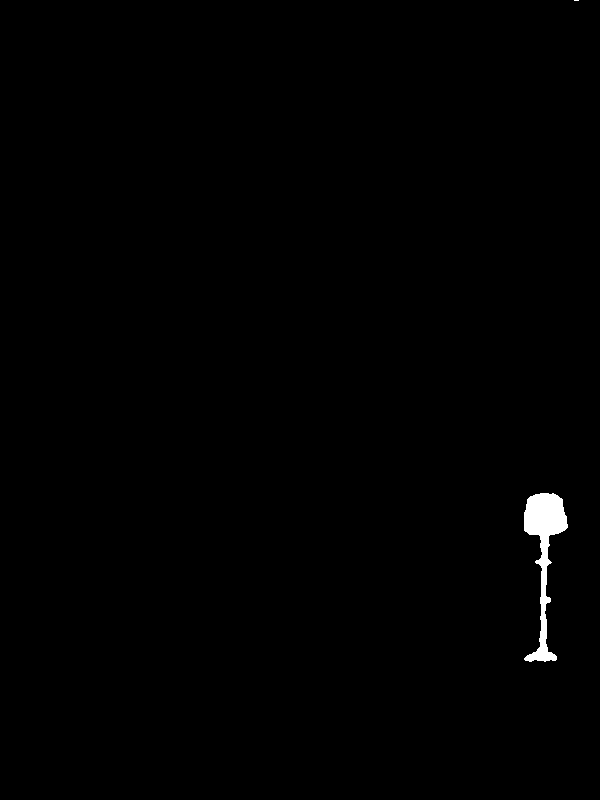

(800, 600, 3)


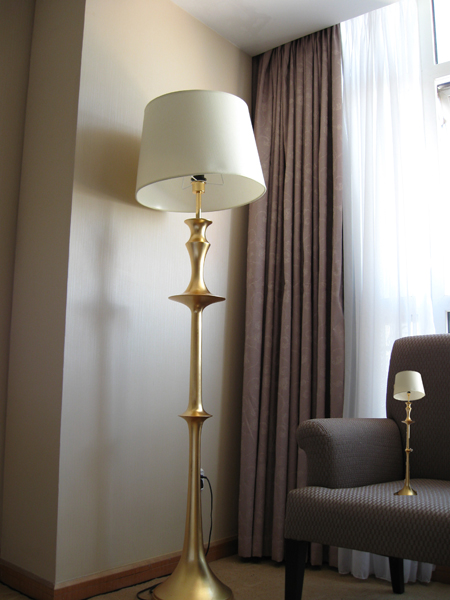

(600, 450, 3)


In [0]:
img=cv2.imread(gt_train['0'].iloc[2650])
img1=cv2.imread(train_tp['0'].iloc[2650])

cv2_imshow(img)
print(img.shape)
cv2_imshow(img1)
print(img1.shape) 

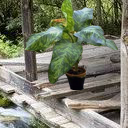

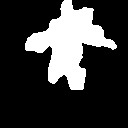

In [0]:
# cv2_imshow(tampered_patches[61])
# cv2_imshow(masked_patches[61])

Tampered patch list

In [0]:
# tampered_patch_list , mask_patch_list =patch_cal(train_data_frame)

In [0]:
# tampered_patch_test , mask_patch_test =patch_cal(test_data_frame)

pick random 10

In [0]:
import random
def chosen_ones(l1): #m1):
    l3=[]
    # m3=[]
    for i in tqdm(range(len(l1))):  #,m1)):
        k=len(l1[i])
        l2=[]
        # m2=[]
        for j in range(10):
            num=random.randrange(0, k, 4)
            l2.append(l1[i][num])
            # m2.append(m1[i][num])

        l3.append(l2)
        # m3.append(m2)
    return l3 #, m3

Authentic patch extractor

In [0]:
def authentic_patch(df):

  l1=[]
  stride =8
  window_shape = (128, 128, 3)
  for i in tqdm(range(len(df))):
    au=cv2.imread(df['0'].iloc[i])
    non_tampered_windows = view_as_windows(au, window_shape, step=stride)
    non_tampered_patches = []
    for m in range(non_tampered_windows.shape[0]):
        for n in range(non_tampered_windows.shape[1]):
            non_tampered_patches += [non_tampered_windows[m][n][0]]
    l1.append(non_tampered_patches)
  return l1

## **load patches - files details**

tampered - patches_train/test.sav
tampered_mask- patches_mask_train.sav
authentic- au_patches_train/test.sav

original data in files test/train_au and test/train_tp

In [0]:
tp_train=pickle.load(open('patches_train.sav','rb'))
tp_test=pickle.load(open('patches_test.sav','rb'))

In [0]:
tp_mask_train=pickle.load(open('patches_mask_train.sav','rb'))
tp_mask_test=pickle.load(open('patches_mask_test.sav','rb'))

In [0]:
au_train=pickle.load(open('au_patches_train.sav','rb'))
au_test=pickle.load(open('au_patches_test.sav','rb'))

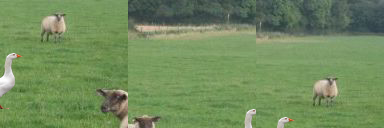

In [0]:
cv2_imshow(np.hstack([tp_train[45][2],tp_train[45][5],tp_train[45][9]]))

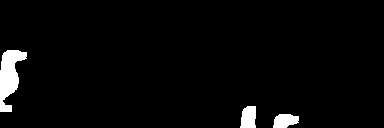

In [0]:
cv2_imshow(np.hstack([tp_mask_train[45][2],tp_mask_train[45][5],tp_mask_train[45][9]]))

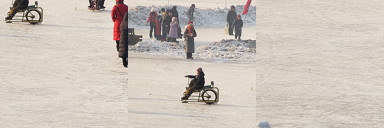

In [0]:
cv2_imshow(np.hstack([au_train[45][2],au_train[45][5],au_train[45][9]]))

patches creation for loading into cnn - WITHOUT GROUND TRUTH METHOD

In [0]:
# for i in tqdm(range(len(au_train))):
#   image = au_train[i]
#   inds = np.random.choice(10, 7, replace=False)
#   for ind in enumerate(inds):
#     io.imsave('/content/drive/My Drive/SML _ PROJECT/Authentic_patch/' + str(ind[0]) + '_' + str(i) + '_' + '1_.png', np.asarray(image[ind[1]]) )



In [0]:
# for i in tqdm(range(len(tp_train))):
#   image = tp_train[i]
#   inds = np.random.choice(10, 7, replace=False)
#   for ind in enumerate(inds):
#     io.imsave('/content/drive/My Drive/SML _ PROJECT/tampered_patch/' + str(ind[0]) + '_' + str(i) + '_' + '0_.png', np.asarray(image[ind[1]]) )



In [0]:
# for i in tqdm(range(len(tp_test))):
#   image = tp_test[i]
#   inds = np.random.choice(10, 7, replace=False)
#   for ind in enumerate(inds):
#     io.imsave('/content/drive/My Drive/SML _ PROJECT/tampered_test_patch/' + str(ind[0]) + '_' + str(i) + '_' + '0.png', np.asarray(image[ind[1]]) )


In [0]:
# for i in tqdm(range(len(au_test))):
#   image = au_test[i]
#   inds = np.random.choice(10, 7, replace=False)
#   for ind in enumerate(inds):
#     io.imsave('/content/drive/My Drive/SML _ PROJECT/Authentic_test_patch/' + str(ind[0]) + '_' + str(i) + '_' + '0.png', np.asarray(image[ind[1]]) )


In [0]:
# def feature_patch(df):

#   l1=[]
#   stride =128
#   window_shape = (128, 128, 3)
#   for i in tqdm(range(len(df))):
#     au=cv2.imread(df['0'].iloc[i])
#     non_tampered_windows = view_as_windows(au, window_shape, step=stride)
#     non_tampered_patches = []
#     for m in range(non_tampered_windows.shape[0]):
#         for n in range(non_tampered_windows.shape[1]):
#             non_tampered_patches += [non_tampered_windows[m][n][0]]
#     l1.append(non_tampered_patches)
#   return l1

In [0]:
# au_f=feature_patch(train_au)

In [0]:
# for i in tqdm(range(len(au_f))):
#   image = au_f[i]
#   # inds = np.random.choice(10, 7, replace=False)
#   for ind in range(len(image)):
#     io.imsave('/content/drive/My Drive/SML _ PROJECT/features/au/' + str(i) + '_' + str(ind) + '_' + '1_.png', np.asarray(image[ind]) )


In [0]:
# tp_f=feature_patch(train_tp)

In [0]:
# for i in tqdm(range(len(tp_f))):
#   image = tp_f[i]
#   # inds = np.random.choice(10, 7, replace=False)
#   for ind in range(len(image)):
#     io.imsave('/content/drive/My Drive/SML _ PROJECT/features/tp/' + str(i) + '_' + str(ind) + '_' + '0_.png', np.asarray(image[ind]) )

# Analysis on Filters

In [0]:
img=cv2.imread(train_tp['0'].iloc[1890])
img_au=cv2.imread(gt_train['0'].iloc[1890]) #aajaaaa

In [0]:
img= cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# img_au= cv2.cvtColor(img_au, cv2.COLOR_BGR2GRAY)

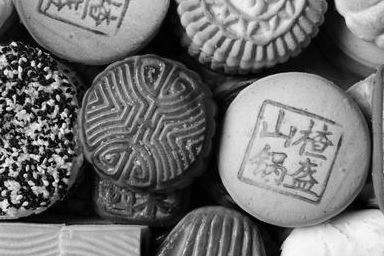

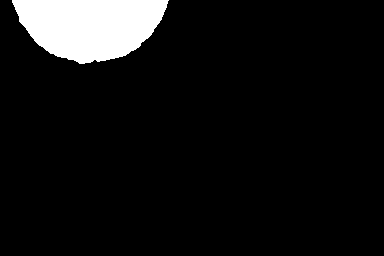

In [0]:
cv2_imshow(img)
cv2_imshow(img_au)#theek????

In [0]:
kernel_horizontal = np.array([np.array([1, 1,1]),np.array([0, 0, 0]), np.array([-1, -1,-1])]) 
print(kernel_horizontal, 'is a kernel for detecting horizontal edges') 
  

[[ 1  1  1]
 [ 0  0  0]
 [-1 -1 -1]] is a kernel for detecting horizontal edges


In [0]:
from scipy import ndimage
cimg=ndimage.convolve(img, kernel_horizontal, mode='constant', cval=0.0)

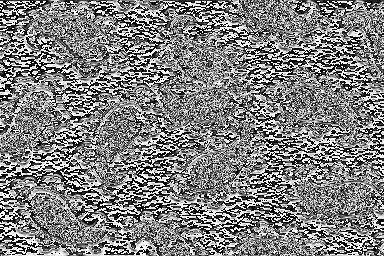

In [0]:
cv2_imshow(cimg)  

In [0]:
#https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.ndimage.filters.convolve.html

In [0]:
yeh tere kernels 10 jo ki usme theee

In [0]:
k1 =np.array([[0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, -1, 1, 0], [0, 0, 0, 0, 0],
                                      [0, 0, 0, 0, 0]])

k2=np.array([[0, 0, 0, 0, 0], [0, 0, 0, 1, 0], [0, 0, -1, 0, 0], [0, 0, 0, 0, 0],
                                      [0, 0, 0, 0, 0]])

k3=np.array([[0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 1, -2, 1, 0], [0, 0, 0, 0, 0],
                                      [0, 0, 0, 0, 0]])

k4=np.array([[0, 0, 0, 0, 0], [0, 1, 0, 0, 0], [0, 0, -2, 0, 0], [0, 0, 0, 1, 0],
                                      [0, 0, 0, 0, 0]])

k5=np.array([[0, 0, 0, 0, 0], [0, 0, 1, 0, 0], [0, 1, -3, 1, 0], [0, 0, 0, 0, 0],
                                      [0, 0, 0, 0, 0]])

k6=np.array([[0, 0, 0, 0, 0], [0, 1, 0, 1, 0], [0, 0, -3, 0, 0], [0, 1, 0, 0, 0],
                                      [0, 0, 0, 0, 0]])

k7=np.array([[0, 0, 0, 0, 0], [0, -1, 2, -1, 0], [0, 2, -4, 2, 0], [0, -1, 2, -1, 0],
                                       [0, 0, 0, 0, 0]])

k8=np.array([[0, 0, 0, 0, 0], [0, -1, 2, -1, 0], [0, 2, -4, 2, 0], [0, 0, 0, 0, 0],
                                        [0, 0, 0, 0, 0]])

k9=np.array([[-1, 2, -2, 2, -1], [2, -6, 8, -6, 2], [-2, 8, -12, 8, -2],
                                        [0, 0, 0, 0, 0], [0, 0, 0, 0, 0]])

k10=np.array([[-1, 2, -2, 2, -1], [2, -6, 8, -6, 2], [-2, 8, -12, 8, -2],
                                       [2, -6, 8, -6, 2], [-1, 2, -2, 2, -1]])

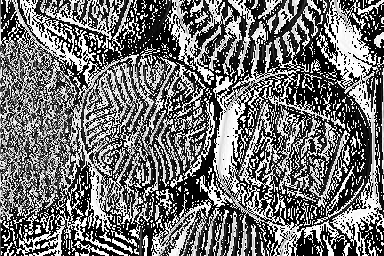

In [0]:
cimg=ndimage.convolve(img ,k1, mode='constant', cval=0.0)   
cv2_imshow(cimg)

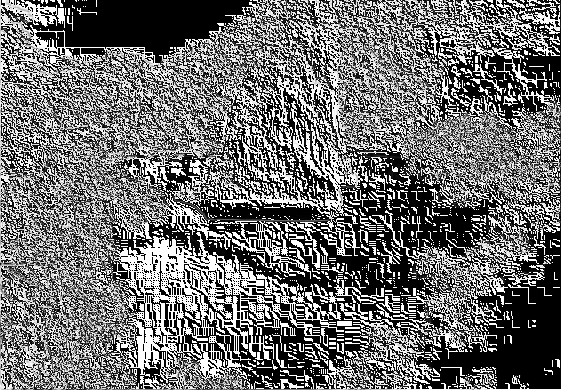

In [0]:
cimg=ndimage.convolve(img,k2, mode='constant', cval=0.0)
cv2_imshow(cimg)

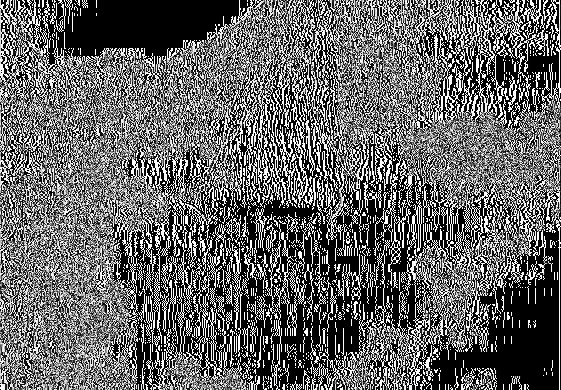

In [0]:
cimg=ndimage.convolve(img,k3, mode='constant', cval=0.0)
cv2_imshow(cimg)

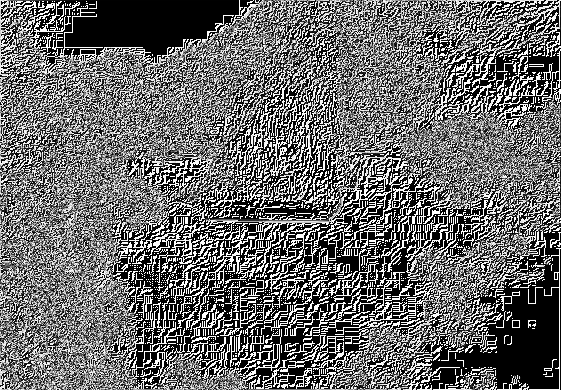

In [0]:
cimg=ndimage.convolve(img,k4, mode='constant', cval=0.0)
cv2_imshow(cimg)

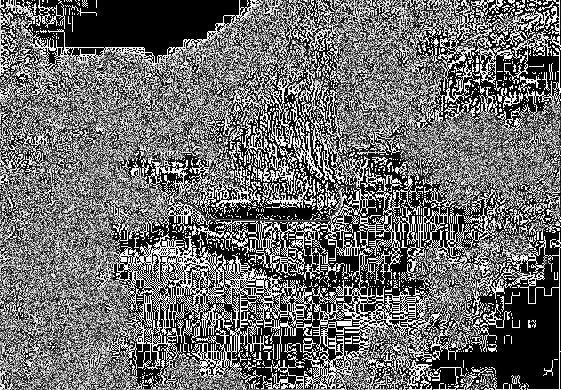

In [0]:
cimg=ndimage.convolve(img,k5,  mode='constant', cval=0.0)
cv2_imshow(cimg)

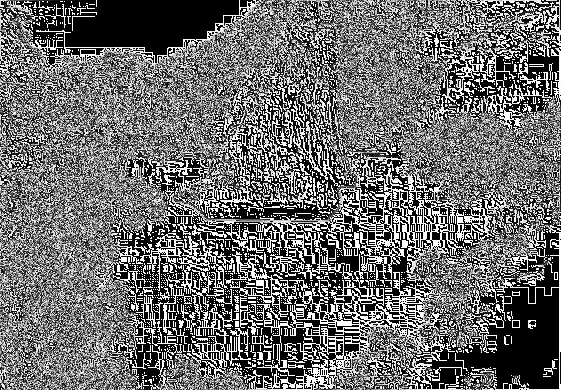

In [0]:
cimg=ndimage.convolve(img,k6,  mode='constant', cval=0.0)
cv2_imshow(cimg)

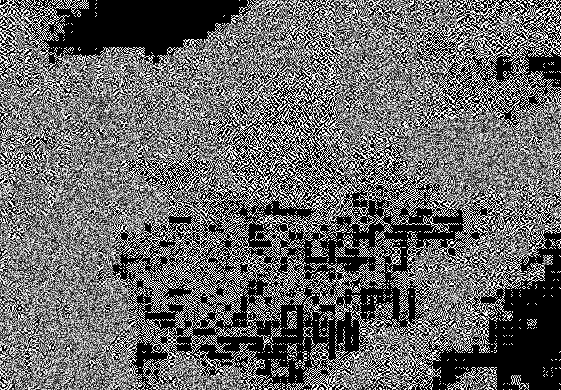

In [0]:
cimg=ndimage.convolve(img,k7,  mode='constant', cval=0.0)
cv2_imshow(cimg)

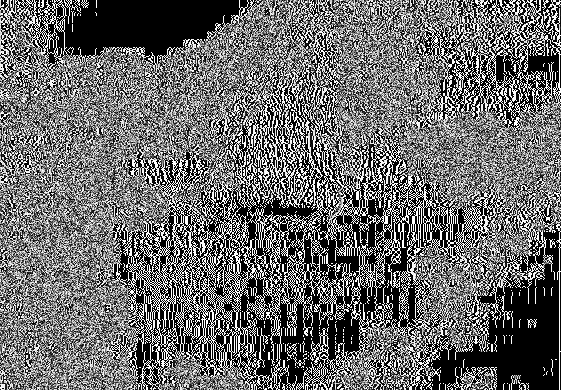

In [0]:
cimg=ndimage.convolve(img,k8, mode='constant', cval=0.0)
cv2_imshow(cimg)

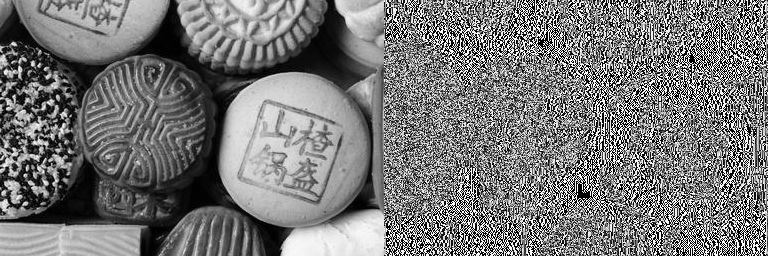

In [0]:
cimg=ndimage.convolve(img,k9, mode='constant', cval=0.0)
cv2_imshow(np.hstack([img,cimg]))

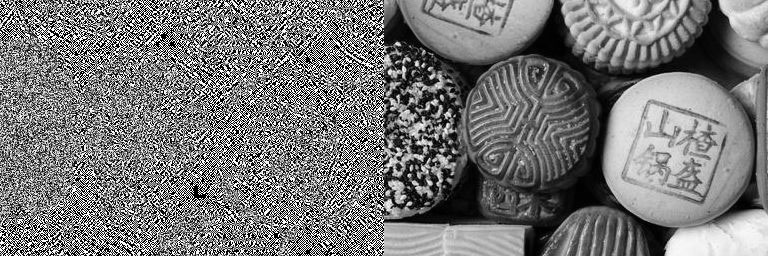

In [0]:
cimg=ndimage.convolve(img,k10, mode='constant', cval=0.0)
cv2_imshow(np.hstack([cimg,img]))